# Deeplearning with a grid search on the PIMA indians diabetes data set

In [1]:
import sys
import pandas
import numpy
import sklearn
import keras

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pandas.__version__))
print('Numpy: {}'.format(numpy.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Keras: {}'.format(keras.__version__))

Using TensorFlow backend.


Python: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
Pandas: 0.25.1
Numpy: 1.16.5
Sklearn: 0.23.1
Keras: 2.3.1


In [2]:
import pandas as pd
import numpy as np

# import the uci pima indians diabetes dataset
names = ['n_pregnant', 'glucose_concentration', 'blood_pressuer (mm Hg)', 'skin_thickness (mm)', 'serum_insulin (mu U/ml)',
        'BMI', 'pedigree_function', 'age', 'class']
df = pd.read_csv("diabetes.csv", names = names)

In [3]:
# Describe the dataset
df.describe()

n_pregnant glucose_concentration blood_pressuer (mm Hg)  \
count         769                   769                    769   
unique         18                   137                     48   
top             1                   100                     70   
freq          135                    17                     57   

       skin_thickness (mm) serum_insulin (mu U/ml)  BMI pedigree_function  \
count                  769                     769  769               769   
unique                  52                     187  249               518   
top                      0                       0   32             0.258   
freq                   227                     374   13                 6   

        age class  
count   769   769  
unique   53     3  
top      22     0  
freq     72   500

In [4]:
df[df['glucose_concentration'] == 0]

Empty DataFrame
Columns: [n_pregnant, glucose_concentration, blood_pressuer (mm Hg), skin_thickness (mm), serum_insulin (mu U/ml), BMI, pedigree_function, age, class]
Index: []

In [5]:
# Preprocess the data, mark zero values as NaN and drop
columns = ['glucose_concentration', 'blood_pressuer (mm Hg)', 'skin_thickness (mm)', 'serum_insulin (mu U/ml)', 'BMI']

for col in columns:
    df[col].replace(0, np.NaN, inplace=True)
    
df.describe()

n_pregnant glucose_concentration blood_pressuer (mm Hg)  \
count         769                   769                    769   
unique         18                   137                     48   
top             1                   100                     70   
freq          135                    17                     57   

       skin_thickness (mm) serum_insulin (mu U/ml)  BMI pedigree_function  \
count                  769                     769  769               769   
unique                  52                     187  249               518   
top                      0                       0   32             0.258   
freq                   227                     374   13                 6   

        age class  
count   769   769  
unique   53     3  
top      22     0  
freq     72   500

In [6]:
# Drop rows with missing values
df.dropna(inplace=True)

# summarize the number of rows and columns in df
df.describe()

n_pregnant glucose_concentration blood_pressuer (mm Hg)  \
count         769                   769                    769   
unique         18                   137                     48   
top             1                   100                     70   
freq          135                    17                     57   

       skin_thickness (mm) serum_insulin (mu U/ml)  BMI pedigree_function  \
count                  769                     769  769               769   
unique                  52                     187  249               518   
top                      0                       0   32             0.258   
freq                   227                     374   13                 6   

        age class  
count   769   769  
unique   53     3  
top      22     0  
freq     72   500

In [7]:
# Convert dataframe to numpy array
dataset = df.values
print(dataset.shape)

(769, 9)


In [8]:
# split into input (X) and an output (Y)
X = dataset[1:,0:8]
Y = dataset[1:, 8].astype(int)

In [9]:
print(X.shape)
print(Y.shape)
print(Y[:5])

(768, 8)
(768,)
[1 0 1 0 1]


In [10]:
# Normalize the data using sklearn StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)

In [11]:
print(scaler)

StandardScaler()


In [12]:
# Transform and display the training data
X_standardized = scaler.transform(X)

data = pd.DataFrame(X_standardized)
data.describe()

0             1             2             3             4  \
count  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02   
mean   2.544261e-17  3.614007e-18 -1.327244e-17  7.994184e-17 -3.556183e-17   
std    1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00   
min   -1.141852e+00 -3.783654e+00 -3.572597e+00 -1.288212e+00 -6.928906e-01   
25%   -8.448851e-01 -6.852363e-01 -3.673367e-01 -1.288212e+00 -6.928906e-01   
50%   -2.509521e-01 -1.218877e-01  1.496408e-01  1.545332e-01 -4.280622e-01   
75%    6.399473e-01  6.057709e-01  5.632228e-01  7.190857e-01  4.120079e-01   
max    3.906578e+00  2.444478e+00  2.734528e+00  4.921866e+00  6.652839e+00   

                  5             6             7  
count  7.680000e+02  7.680000e+02  7.680000e+02  
mean   2.295979e-16  2.462585e-16  1.857600e-16  
std    1.000652e+00  1.000652e+00  1.000652e+00  
min   -4.060474e+00 -1.189553e+00 -1.041549e+00  
25%   -5.955785e-01 -6.889685e-01 -7.862862e-01  
50%    9.419788e-04 -3.001282e-01 -3.608474e-01  
75%    5.847705e-01  4.662269e-01  6.602056e-01  
max    4.455807e+00  5.883565e+00  4.063716e+00

In [13]:
# import necessary sklearn and keras packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [20]:
# Start defining the model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(32, input_dim = 32, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, input_dim = 32, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, input_dim = 4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

model = create_model()
print(model.summary())

Model: "sequential_508"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2536 (Dense)           (None, 32)                288       
_________________________________________________________________
dense_2537 (Dense)           (None, 32)                1056      
_________________________________________________________________
dense_2538 (Dense)           (None, 4)                 132       
_________________________________________________________________
dense_2539 (Dense)           (None, 2)                 10        
_________________________________________________________________
dense_2540 (Dense)           (None, 1)                 3         
Total params: 1,489
Trainable params: 1,489
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
# Do a grid search for the optimal batch size and number of epochs
# import necessary packages
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

# Define a random seed
seed = 6
np.random.seed(seed)

# Start defining the model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(32, input_dim = 32, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, input_dim = 32, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, input_dim = 4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, verbose = 1)

# define the grid search parameters
batch_size = [10, 20, 40]
epochs = [10, 50, 100]

# make a dictionary of the grid search parameters
param_grid = dict(batch_size=batch_size, epochs=epochs)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), verbose = 10)
grid_results = grid.fit(X_standardized, Y)

# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/10
614/614 [==============================] - 1s 923us/step - loss: 0.6727 - accuracy: 0.6515
Epoch 2/10
614/614 [==============================] - 0s 149us/step - loss: 0.6524 - accuracy: 0.6515
Epoch 3/10
614/614 [==============================] - 0s 149us/step - loss: 0.6484 - accuracy: 0.6515
Epoch 4/10
614/614 [==============================] - 0s 150us/step - loss: 0.6470 - accuracy: 0.6515
Epoch 5/10
614/614 [==============================] - 0s 169us/step - loss: 0.6468 - accuracy: 0.6515
Epoch 6/10
614/614 [==============================] - 0s 169us/step - loss: 0.6471 - accuracy: 0.6515
Epoch 7/10
614/614 [==============================] - 0s 169us/step - loss: 0.6468 - accuracy: 0.6515
Epoch 8/10
614/614 [==============================] - 0s 156us/step - loss: 0.6481 - accuracy: 0.6515
Epoch 9/10
614/614 [==============================] - 0s 137us/step - loss: 0.6471 - accuracy: 0.6515
Epoch 10/10
154/154 [==============================] - 0s 464us/step
[CV] ........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


Epoch 1/10
614/614 [==============================] - 1s 931us/step - loss: 0.5809 - accuracy: 0.6678
Epoch 2/10
614/614 [==============================] - 0s 143us/step - loss: 0.5071 - accuracy: 0.7459
Epoch 3/10
614/614 [==============================] - 0s 127us/step - loss: 0.4948 - accuracy: 0.7801
Epoch 4/10
614/614 [==============================] - 0s 143us/step - loss: 0.4768 - accuracy: 0.7932
Epoch 5/10
614/614 [==============================] - 0s 143us/step - loss: 0.4835 - accuracy: 0.7736
Epoch 6/10
614/614 [==============================] - 0s 138us/step - loss: 0.4630 - accuracy: 0.7997
Epoch 7/10
614/614 [==============================] - 0s 149us/step - loss: 0.4552 - accuracy: 0.7932
Epoch 8/10
614/614 [==============================] - 0s 150us/step - loss: 0.4525 - accuracy: 0.7980
Epoch 9/10
614/614 [==============================] - 0s 136us/step - loss: 0.4761 - accuracy: 0.7915
Epoch 10/10
154/154 [==============================] - 0s 370us/step
[CV] ........

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.3s remaining:    0.0s


Epoch 1/10
614/614 [==============================] - 1s 856us/step - loss: 0.5726 - accuracy: 0.6564
Epoch 2/10
614/614 [==============================] - 0s 150us/step - loss: 0.4938 - accuracy: 0.7573
Epoch 3/10
614/614 [==============================] - 0s 139us/step - loss: 0.4879 - accuracy: 0.7622
Epoch 4/10
614/614 [==============================] - 0s 136us/step - loss: 0.4772 - accuracy: 0.7866
Epoch 5/10
614/614 [==============================] - 0s 143us/step - loss: 0.4657 - accuracy: 0.7834
Epoch 6/10
614/614 [==============================] - 0s 143us/step - loss: 0.4618 - accuracy: 0.7948
Epoch 7/10
614/614 [==============================] - 0s 169us/step - loss: 0.4590 - accuracy: 0.7866
Epoch 8/10
614/614 [==============================] - 0s 130us/step - loss: 0.4579 - accuracy: 0.7883
Epoch 9/10
614/614 [==============================] - 0s 135us/step - loss: 0.4442 - accuracy: 0.7980
Epoch 10/10
154/154 [==============================] - 0s 393us/step
[CV] ........

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.9s remaining:    0.0s


Epoch 1/10
615/615 [==============================] - 0s 762us/step - loss: 0.6820 - accuracy: 0.5821
Epoch 2/10
615/615 [==============================] - 0s 137us/step - loss: 0.6648 - accuracy: 0.6276
Epoch 3/10
615/615 [==============================] - 0s 135us/step - loss: 0.6611 - accuracy: 0.6276
Epoch 4/10
615/615 [==============================] - 0s 143us/step - loss: 0.6605 - accuracy: 0.6276
Epoch 5/10
615/615 [==============================] - 0s 139us/step - loss: 0.6604 - accuracy: 0.6276
Epoch 6/10
615/615 [==============================] - 0s 140us/step - loss: 0.6605 - accuracy: 0.6276
Epoch 7/10
615/615 [==============================] - 0s 147us/step - loss: 0.6609 - accuracy: 0.6276
Epoch 8/10
615/615 [==============================] - 0s 138us/step - loss: 0.6613 - accuracy: 0.6276
Epoch 9/10
615/615 [==============================] - 0s 149us/step - loss: 0.6606 - accuracy: 0.6276
Epoch 10/10
153/153 [==============================] - 0s 576us/step
[CV] ........

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   10.3s remaining:    0.0s


Epoch 1/10
615/615 [==============================] - 1s 820us/step - loss: 0.6679 - accuracy: 0.6488
Epoch 2/10
615/615 [==============================] - 0s 137us/step - loss: 0.6488 - accuracy: 0.6520
Epoch 3/10
615/615 [==============================] - 0s 156us/step - loss: 0.6467 - accuracy: 0.6520
Epoch 4/10
615/615 [==============================] - 0s 156us/step - loss: 0.6480 - accuracy: 0.6520
Epoch 5/10
615/615 [==============================] - 0s 143us/step - loss: 0.6464 - accuracy: 0.6520
Epoch 6/10
615/615 [==============================] - 0s 156us/step - loss: 0.6468 - accuracy: 0.6520
Epoch 7/10
615/615 [==============================] - 0s 143us/step - loss: 0.6466 - accuracy: 0.6520
Epoch 8/10
615/615 [==============================] - 0s 140us/step - loss: 0.6473 - accuracy: 0.6520
Epoch 9/10
615/615 [==============================] - 0s 156us/step - loss: 0.6472 - accuracy: 0.6520
Epoch 10/10
153/153 [==============================] - 0s 401us/step
[CV] ........

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.7s remaining:    0.0s


Epoch 1/50
614/614 [==============================] - 1s 961us/step - loss: 0.5813 - accuracy: 0.6515
Epoch 2/50
614/614 [==============================] - 0s 182us/step - loss: 0.5234 - accuracy: 0.7410
Epoch 3/50
614/614 [==============================] - 0s 196us/step - loss: 0.5016 - accuracy: 0.7655
Epoch 4/50
614/614 [==============================] - 0s 182us/step - loss: 0.4867 - accuracy: 0.7801
Epoch 5/50
614/614 [==============================] - 0s 195us/step - loss: 0.4770 - accuracy: 0.7720
Epoch 6/50
614/614 [==============================] - 0s 195us/step - loss: 0.4654 - accuracy: 0.7720
Epoch 7/50
614/614 [==============================] - 0s 182us/step - loss: 0.4577 - accuracy: 0.7883
Epoch 8/50
614/614 [==============================] - 0s 169us/step - loss: 0.4689 - accuracy: 0.7818
Epoch 9/50
614/614 [==============================] - 0s 156us/step - loss: 0.4415 - accuracy: 0.7899
Epoch 10/50
614/614 [==============================] - 0s 156us/step - loss: 0.430

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   22.0s remaining:    0.0s


Epoch 1/50
614/614 [==============================] - 1s 1ms/step - loss: 0.5785 - accuracy: 0.6629
Epoch 2/50
614/614 [==============================] - 0s 145us/step - loss: 0.5011 - accuracy: 0.7101
Epoch 3/50
614/614 [==============================] - 0s 150us/step - loss: 0.4873 - accuracy: 0.7638
Epoch 4/50
614/614 [==============================] - 0s 150us/step - loss: 0.4828 - accuracy: 0.7769
Epoch 5/50
614/614 [==============================] - 0s 197us/step - loss: 0.4688 - accuracy: 0.8013
Epoch 6/50
614/614 [==============================] - 0s 204us/step - loss: 0.4675 - accuracy: 0.8078
Epoch 7/50
614/614 [==============================] - 0s 143us/step - loss: 0.4522 - accuracy: 0.7980
Epoch 8/50
614/614 [==============================] - 0s 134us/step - loss: 0.4604 - accuracy: 0.7932
Epoch 9/50
614/614 [==============================] - 0s 150us/step - loss: 0.4519 - accuracy: 0.7964
Epoch 10/50
614/614 [==============================] - 0s 169us/step - loss: 0.4429 

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   29.0s remaining:    0.0s


Epoch 1/50
614/614 [==============================] - 1s 848us/step - loss: 0.6679 - accuracy: 0.6466
Epoch 2/50
614/614 [==============================] - 0s 169us/step - loss: 0.6491 - accuracy: 0.6564
Epoch 3/50
614/614 [==============================] - 0s 154us/step - loss: 0.6446 - accuracy: 0.6564
Epoch 4/50
614/614 [==============================] - 0s 156us/step - loss: 0.6437 - accuracy: 0.6564
Epoch 5/50
614/614 [==============================] - 0s 156us/step - loss: 0.6442 - accuracy: 0.6564
Epoch 6/50
614/614 [==============================] - 0s 156us/step - loss: 0.6437 - accuracy: 0.6564
Epoch 7/50
614/614 [==============================] - 0s 156us/step - loss: 0.6439 - accuracy: 0.6564
Epoch 8/50
614/614 [==============================] - 0s 172us/step - loss: 0.6442 - accuracy: 0.6564
Epoch 9/50
614/614 [==============================] - 0s 169us/step - loss: 0.6436 - accuracy: 0.6564
Epoch 10/50
614/614 [==============================] - 0s 221us/step - loss: 0.644

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   35.5s remaining:    0.0s


Epoch 1/50
615/615 [==============================] - 1s 904us/step - loss: 0.6048 - accuracy: 0.6195
Epoch 2/50
615/615 [==============================] - 0s 143us/step - loss: 0.5328 - accuracy: 0.7642
Epoch 3/50
615/615 [==============================] - 0s 169us/step - loss: 0.5157 - accuracy: 0.7512
Epoch 4/50
615/615 [==============================] - 0s 147us/step - loss: 0.5087 - accuracy: 0.7545
Epoch 5/50
615/615 [==============================] - 0s 148us/step - loss: 0.4941 - accuracy: 0.7577
Epoch 6/50
615/615 [==============================] - 0s 150us/step - loss: 0.4951 - accuracy: 0.7659
Epoch 7/50
615/615 [==============================] - 0s 163us/step - loss: 0.4855 - accuracy: 0.7480
Epoch 8/50
615/615 [==============================] - 0s 171us/step - loss: 0.4785 - accuracy: 0.7756
Epoch 9/50
615/615 [==============================] - 0s 141us/step - loss: 0.4831 - accuracy: 0.7593
Epoch 10/50
615/615 [==============================] - 0s 169us/step - loss: 0.478

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   41.9s remaining:    0.0s


Epoch 1/50
615/615 [==============================] - 1s 835us/step - loss: 0.6634 - accuracy: 0.6488
Epoch 2/50
615/615 [==============================] - 0s 141us/step - loss: 0.6482 - accuracy: 0.6520
Epoch 3/50
615/615 [==============================] - 0s 156us/step - loss: 0.6469 - accuracy: 0.6520
Epoch 4/50
615/615 [==============================] - 0s 156us/step - loss: 0.6467 - accuracy: 0.6520
Epoch 5/50
615/615 [==============================] - 0s 150us/step - loss: 0.6470 - accuracy: 0.6520
Epoch 6/50
615/615 [==============================] - 0s 156us/step - loss: 0.6465 - accuracy: 0.6520
Epoch 7/50
615/615 [==============================] - 0s 156us/step - loss: 0.6484 - accuracy: 0.6520
Epoch 8/50
615/615 [==============================] - 0s 156us/step - loss: 0.6468 - accuracy: 0.6520
Epoch 9/50
615/615 [==============================] - 0s 182us/step - loss: 0.6473 - accuracy: 0.6520
Epoch 10/50
615/615 [==============================] - 0s 169us/step - loss: 0.647

614/614 [==============================] - 0s 136us/step - loss: 0.3630 - accuracy: 0.8339
Epoch 29/100
614/614 [==============================] - 0s 136us/step - loss: 0.3500 - accuracy: 0.8453
Epoch 30/100
614/614 [==============================] - 0s 124us/step - loss: 0.3559 - accuracy: 0.8388
Epoch 31/100
614/614 [==============================] - 0s 143us/step - loss: 0.3614 - accuracy: 0.8371
Epoch 32/100
614/614 [==============================] - 0s 141us/step - loss: 0.3578 - accuracy: 0.8355
Epoch 33/100
614/614 [==============================] - 0s 150us/step - loss: 0.3382 - accuracy: 0.8502
Epoch 34/100
614/614 [==============================] - 0s 136us/step - loss: 0.3330 - accuracy: 0.8502
Epoch 35/100
614/614 [==============================] - 0s 162us/step - loss: 0.3437 - accuracy: 0.8518
Epoch 36/100
614/614 [==============================] - 0s 137us/step - loss: 0.3178 - accuracy: 0.8648
Epoch 37/100
614/614 [==============================] - 0s 130us/step - loss:

614/614 [==============================] - 0s 156us/step - loss: 0.4801 - accuracy: 0.7769
Epoch 6/100
614/614 [==============================] - 0s 136us/step - loss: 0.4629 - accuracy: 0.8094
Epoch 7/100
614/614 [==============================] - 0s 130us/step - loss: 0.4702 - accuracy: 0.7850
Epoch 8/100
614/614 [==============================] - 0s 156us/step - loss: 0.4588 - accuracy: 0.7997
Epoch 9/100
614/614 [==============================] - 0s 142us/step - loss: 0.4478 - accuracy: 0.7915
Epoch 10/100
614/614 [==============================] - 0s 149us/step - loss: 0.4578 - accuracy: 0.7866
Epoch 11/100
614/614 [==============================] - 0s 156us/step - loss: 0.4557 - accuracy: 0.7883
Epoch 12/100
614/614 [==============================] - 0s 156us/step - loss: 0.4405 - accuracy: 0.8143
Epoch 13/100
614/614 [==============================] - 0s 156us/step - loss: 0.4295 - accuracy: 0.7980
Epoch 14/100
614/614 [==============================] - 0s 156us/step - loss: 0.4

614/614 [==============================] - 0s 156us/step - loss: 0.2093 - accuracy: 0.9169
Epoch 84/100
614/614 [==============================] - 0s 149us/step - loss: 0.1785 - accuracy: 0.9381
Epoch 85/100
614/614 [==============================] - 0s 150us/step - loss: 0.1514 - accuracy: 0.9479
Epoch 86/100
614/614 [==============================] - 0s 169us/step - loss: 0.1471 - accuracy: 0.9479
Epoch 87/100
614/614 [==============================] - 0s 156us/step - loss: 0.1592 - accuracy: 0.9430
Epoch 88/100
614/614 [==============================] - 0s 156us/step - loss: 0.1681 - accuracy: 0.9381
Epoch 89/100
614/614 [==============================] - 0s 143us/step - loss: 0.2143 - accuracy: 0.9251
Epoch 90/100
614/614 [==============================] - 0s 156us/step - loss: 0.1559 - accuracy: 0.9495
Epoch 91/100
614/614 [==============================] - 0s 151us/step - loss: 0.1502 - accuracy: 0.9544
Epoch 92/100
614/614 [==============================] - 0s 135us/step - loss:

614/614 [==============================] - 0s 143us/step - loss: 0.6441 - accuracy: 0.6564
Epoch 61/100
614/614 [==============================] - 0s 143us/step - loss: 0.6438 - accuracy: 0.6564
Epoch 62/100
614/614 [==============================] - 0s 148us/step - loss: 0.6439 - accuracy: 0.6564
Epoch 63/100
614/614 [==============================] - 0s 163us/step - loss: 0.6441 - accuracy: 0.6564
Epoch 64/100
614/614 [==============================] - 0s 137us/step - loss: 0.6439 - accuracy: 0.6564
Epoch 65/100
614/614 [==============================] - 0s 143us/step - loss: 0.6438 - accuracy: 0.6564
Epoch 66/100
614/614 [==============================] - 0s 143us/step - loss: 0.6439 - accuracy: 0.6564
Epoch 67/100
614/614 [==============================] - 0s 135us/step - loss: 0.6436 - accuracy: 0.6564
Epoch 68/100
614/614 [==============================] - 0s 149us/step - loss: 0.6438 - accuracy: 0.6564
Epoch 69/100
614/614 [==============================] - 0s 136us/step - loss:

615/615 [==============================] - 0s 143us/step - loss: 0.3793 - accuracy: 0.8390
Epoch 38/100
615/615 [==============================] - 0s 143us/step - loss: 0.3770 - accuracy: 0.8309
Epoch 39/100
615/615 [==============================] - 0s 130us/step - loss: 0.3622 - accuracy: 0.8390
Epoch 40/100
615/615 [==============================] - 0s 145us/step - loss: 0.3441 - accuracy: 0.8504
Epoch 41/100
615/615 [==============================] - 0s 149us/step - loss: 0.3641 - accuracy: 0.8455
Epoch 42/100
615/615 [==============================] - 0s 150us/step - loss: 0.3490 - accuracy: 0.8455
Epoch 43/100
615/615 [==============================] - 0s 143us/step - loss: 0.3260 - accuracy: 0.8667
Epoch 44/100
615/615 [==============================] - 0s 140us/step - loss: 0.3384 - accuracy: 0.8488
Epoch 45/100
615/615 [==============================] - 0s 136us/step - loss: 0.3503 - accuracy: 0.8439
Epoch 46/100
615/615 [==============================] - 0s 143us/step - loss:

615/615 [==============================] - 0s 150us/step - loss: 0.4374 - accuracy: 0.8114
Epoch 15/100
615/615 [==============================] - 0s 156us/step - loss: 0.4348 - accuracy: 0.8033
Epoch 16/100
615/615 [==============================] - 0s 143us/step - loss: 0.4286 - accuracy: 0.8049
Epoch 17/100
615/615 [==============================] - 0s 143us/step - loss: 0.4233 - accuracy: 0.8146
Epoch 18/100
615/615 [==============================] - 0s 157us/step - loss: 0.4293 - accuracy: 0.8065
Epoch 19/100
615/615 [==============================] - 0s 156us/step - loss: 0.4233 - accuracy: 0.8114
Epoch 20/100
615/615 [==============================] - 0s 143us/step - loss: 0.4290 - accuracy: 0.8000
Epoch 21/100
615/615 [==============================] - 0s 148us/step - loss: 0.4251 - accuracy: 0.8065
Epoch 22/100
615/615 [==============================] - 0s 156us/step - loss: 0.4134 - accuracy: 0.8179
Epoch 23/100
615/615 [==============================] - 0s 169us/step - loss:

615/615 [==============================] - 0s 150us/step - loss: 0.1529 - accuracy: 0.9593
Epoch 93/100
615/615 [==============================] - 0s 135us/step - loss: 0.1869 - accuracy: 0.9301
Epoch 94/100
615/615 [==============================] - 0s 137us/step - loss: 0.2509 - accuracy: 0.9073
Epoch 95/100
615/615 [==============================] - 0s 148us/step - loss: 0.2046 - accuracy: 0.9268
Epoch 96/100
615/615 [==============================] - 0s 150us/step - loss: 0.1875 - accuracy: 0.9317
Epoch 97/100
615/615 [==============================] - 0s 149us/step - loss: 0.1740 - accuracy: 0.9480
Epoch 98/100
615/615 [==============================] - 0s 149us/step - loss: 0.1842 - accuracy: 0.9398
Epoch 99/100
615/615 [==============================] - 0s 149us/step - loss: 0.2918 - accuracy: 0.9252
Epoch 100/100
153/153 [==============================] - 0s 379us/step
[CV] ........... batch_size=10, epochs=100, score=0.725, total=  11.0s
[CV] batch_size=20, epochs=10 .........

614/614 [==============================] - 0s 78us/step - loss: 0.4288 - accuracy: 0.8013
Epoch 12/50
614/614 [==============================] - 0s 87us/step - loss: 0.4312 - accuracy: 0.8094
Epoch 13/50
614/614 [==============================] - 0s 68us/step - loss: 0.4237 - accuracy: 0.8176
Epoch 14/50
614/614 [==============================] - 0s 78us/step - loss: 0.4157 - accuracy: 0.8143
Epoch 15/50
614/614 [==============================] - 0s 91us/step - loss: 0.4291 - accuracy: 0.8078
Epoch 16/50
614/614 [==============================] - 0s 78us/step - loss: 0.4182 - accuracy: 0.8143
Epoch 17/50
614/614 [==============================] - 0s 78us/step - loss: 0.4022 - accuracy: 0.8160
Epoch 18/50
614/614 [==============================] - 0s 78us/step - loss: 0.3945 - accuracy: 0.8241
Epoch 19/50
614/614 [==============================] - 0s 78us/step - loss: 0.3960 - accuracy: 0.8160
Epoch 20/50
614/614 [==============================] - 0s 78us/step - loss: 0.3932 - accuracy:

614/614 [==============================] - 0s 104us/step - loss: 0.3495 - accuracy: 0.8534
Epoch 40/50
614/614 [==============================] - 0s 91us/step - loss: 0.3566 - accuracy: 0.8550
Epoch 41/50
614/614 [==============================] - 0s 95us/step - loss: 0.3297 - accuracy: 0.8664
Epoch 42/50
614/614 [==============================] - 0s 91us/step - loss: 0.3249 - accuracy: 0.8795
Epoch 43/50
614/614 [==============================] - 0s 91us/step - loss: 0.3325 - accuracy: 0.8583
Epoch 44/50
614/614 [==============================] - 0s 91us/step - loss: 0.3208 - accuracy: 0.8664
Epoch 45/50
614/614 [==============================] - 0s 78us/step - loss: 0.3342 - accuracy: 0.8616
Epoch 46/50
614/614 [==============================] - 0s 91us/step - loss: 0.3815 - accuracy: 0.8404
Epoch 47/50
614/614 [==============================] - 0s 100us/step - loss: 0.3473 - accuracy: 0.8567
Epoch 48/50
614/614 [==============================] - 0s 91us/step - loss: 0.3230 - accurac

615/615 [==============================] - 0s 78us/step - loss: 0.4713 - accuracy: 0.7772
Epoch 16/50
615/615 [==============================] - 0s 65us/step - loss: 0.4651 - accuracy: 0.7870
Epoch 17/50
615/615 [==============================] - 0s 65us/step - loss: 0.4528 - accuracy: 0.7967
Epoch 18/50
615/615 [==============================] - 0s 65us/step - loss: 0.4378 - accuracy: 0.8033
Epoch 19/50
615/615 [==============================] - 0s 78us/step - loss: 0.4535 - accuracy: 0.7919
Epoch 20/50
615/615 [==============================] - 0s 78us/step - loss: 0.4389 - accuracy: 0.7984
Epoch 21/50
615/615 [==============================] - 0s 65us/step - loss: 0.4272 - accuracy: 0.8114
Epoch 22/50
615/615 [==============================] - 0s 78us/step - loss: 0.4305 - accuracy: 0.8000
Epoch 23/50
615/615 [==============================] - 0s 65us/step - loss: 0.4237 - accuracy: 0.8163
Epoch 24/50
615/615 [==============================] - 0s 78us/step - loss: 0.4217 - accuracy:

615/615 [==============================] - 0s 78us/step - loss: 0.3256 - accuracy: 0.8585
Epoch 44/50
615/615 [==============================] - 0s 78us/step - loss: 0.3122 - accuracy: 0.8650
Epoch 45/50
615/615 [==============================] - 0s 78us/step - loss: 0.2888 - accuracy: 0.8846
Epoch 46/50
615/615 [==============================] - 0s 79us/step - loss: 0.2873 - accuracy: 0.8797
Epoch 47/50
615/615 [==============================] - 0s 69us/step - loss: 0.2895 - accuracy: 0.8846
Epoch 48/50
615/615 [==============================] - 0s 68us/step - loss: 0.2841 - accuracy: 0.8764
Epoch 49/50
615/615 [==============================] - 0s 78us/step - loss: 0.3059 - accuracy: 0.8699
Epoch 50/50
153/153 [==============================] - 0s 399us/step
[CV] ............ batch_size=20, epochs=50, score=0.765, total=   4.0s
[CV] batch_size=20, epochs=100 .......................................
Epoch 1/100
614/614 [==============================] - 1s 815us/step - loss: 0.6763 - a

614/614 [==============================] - 0s 78us/step - loss: 0.6466 - accuracy: 0.6515
Epoch 71/100
614/614 [==============================] - 0s 65us/step - loss: 0.6470 - accuracy: 0.6515
Epoch 72/100
614/614 [==============================] - 0s 65us/step - loss: 0.6467 - accuracy: 0.6515
Epoch 73/100
614/614 [==============================] - 0s 65us/step - loss: 0.6470 - accuracy: 0.6515
Epoch 74/100
614/614 [==============================] - 0s 65us/step - loss: 0.6469 - accuracy: 0.6515
Epoch 75/100
614/614 [==============================] - 0s 78us/step - loss: 0.6469 - accuracy: 0.6515
Epoch 76/100
614/614 [==============================] - 0s 58us/step - loss: 0.6468 - accuracy: 0.6515
Epoch 77/100
614/614 [==============================] - 0s 68us/step - loss: 0.6467 - accuracy: 0.6515
Epoch 78/100
614/614 [==============================] - 0s 78us/step - loss: 0.6472 - accuracy: 0.6515
Epoch 79/100
614/614 [==============================] - 0s 78us/step - loss: 0.6467 - 

614/614 [==============================] - 0s 65us/step - loss: 0.2878 - accuracy: 0.8730
Epoch 48/100
614/614 [==============================] - 0s 65us/step - loss: 0.2911 - accuracy: 0.8762
Epoch 49/100
614/614 [==============================] - 0s 65us/step - loss: 0.2770 - accuracy: 0.8697
Epoch 50/100
614/614 [==============================] - 0s 62us/step - loss: 0.2730 - accuracy: 0.8844
Epoch 51/100
614/614 [==============================] - 0s 68us/step - loss: 0.2766 - accuracy: 0.8746
Epoch 52/100
614/614 [==============================] - 0s 78us/step - loss: 0.2863 - accuracy: 0.8746
Epoch 53/100
614/614 [==============================] - 0s 78us/step - loss: 0.2741 - accuracy: 0.8779
Epoch 54/100
614/614 [==============================] - 0s 78us/step - loss: 0.2547 - accuracy: 0.8909
Epoch 55/100
614/614 [==============================] - 0s 78us/step - loss: 0.2515 - accuracy: 0.8974
Epoch 56/100
614/614 [==============================] - 0s 91us/step - loss: 0.2498 - 

614/614 [==============================] - 0s 78us/step - loss: 0.4206 - accuracy: 0.7980
Epoch 25/100
614/614 [==============================] - 0s 65us/step - loss: 0.4080 - accuracy: 0.8111
Epoch 26/100
614/614 [==============================] - 0s 78us/step - loss: 0.4094 - accuracy: 0.8094
Epoch 27/100
614/614 [==============================] - 0s 78us/step - loss: 0.4065 - accuracy: 0.8127
Epoch 28/100
614/614 [==============================] - 0s 84us/step - loss: 0.4056 - accuracy: 0.8111
Epoch 29/100
614/614 [==============================] - 0s 68us/step - loss: 0.4070 - accuracy: 0.8192
Epoch 30/100
614/614 [==============================] - 0s 78us/step - loss: 0.4030 - accuracy: 0.8208
Epoch 31/100
614/614 [==============================] - 0s 78us/step - loss: 0.4046 - accuracy: 0.8241
Epoch 32/100
614/614 [==============================] - 0s 78us/step - loss: 0.3892 - accuracy: 0.8176
Epoch 33/100
614/614 [==============================] - 0s 65us/step - loss: 0.3912 - 

Epoch 1/100
615/615 [==============================] - 1s 873us/step - loss: 0.6172 - accuracy: 0.6276
Epoch 2/100
615/615 [==============================] - 0s 65us/step - loss: 0.5356 - accuracy: 0.6797
Epoch 3/100
615/615 [==============================] - 0s 78us/step - loss: 0.5257 - accuracy: 0.7350
Epoch 4/100
615/615 [==============================] - 0s 78us/step - loss: 0.5152 - accuracy: 0.7317
Epoch 5/100
615/615 [==============================] - 0s 78us/step - loss: 0.5102 - accuracy: 0.7366
Epoch 6/100
615/615 [==============================] - 0s 65us/step - loss: 0.4953 - accuracy: 0.7431
Epoch 7/100
615/615 [==============================] - 0s 78us/step - loss: 0.4957 - accuracy: 0.7577
Epoch 8/100
615/615 [==============================] - 0s 65us/step - loss: 0.4899 - accuracy: 0.7496
Epoch 9/100
615/615 [==============================] - 0s 78us/step - loss: 0.4915 - accuracy: 0.7593
Epoch 10/100
615/615 [==============================] - 0s 78us/step - loss: 0.49

615/615 [==============================] - 0s 78us/step - loss: 0.2254 - accuracy: 0.9236
Epoch 81/100
615/615 [==============================] - 0s 78us/step - loss: 0.1968 - accuracy: 0.9252
Epoch 82/100
615/615 [==============================] - 0s 78us/step - loss: 0.1996 - accuracy: 0.9203
Epoch 83/100
615/615 [==============================] - 0s 78us/step - loss: 0.2054 - accuracy: 0.9203
Epoch 84/100
615/615 [==============================] - 0s 78us/step - loss: 0.1890 - accuracy: 0.9333
Epoch 85/100
615/615 [==============================] - 0s 78us/step - loss: 0.2481 - accuracy: 0.8959
Epoch 86/100
615/615 [==============================] - 0s 78us/step - loss: 0.2085 - accuracy: 0.9138
Epoch 87/100
615/615 [==============================] - 0s 82us/step - loss: 0.2005 - accuracy: 0.9285
Epoch 88/100
615/615 [==============================] - 0s 68us/step - loss: 0.2277 - accuracy: 0.9089
Epoch 89/100
615/615 [==============================] - 0s 69us/step - loss: 0.2328 - 

615/615 [==============================] - 0s 78us/step - loss: 0.3102 - accuracy: 0.8732
Epoch 58/100
615/615 [==============================] - 0s 78us/step - loss: 0.2916 - accuracy: 0.8813
Epoch 59/100
615/615 [==============================] - 0s 78us/step - loss: 0.2812 - accuracy: 0.8943
Epoch 60/100
615/615 [==============================] - 0s 65us/step - loss: 0.2887 - accuracy: 0.8992
Epoch 61/100
615/615 [==============================] - 0s 65us/step - loss: 0.2633 - accuracy: 0.8976
Epoch 62/100
615/615 [==============================] - 0s 78us/step - loss: 0.2478 - accuracy: 0.9073
Epoch 63/100
615/615 [==============================] - 0s 65us/step - loss: 0.2451 - accuracy: 0.8959
Epoch 64/100
615/615 [==============================] - 0s 65us/step - loss: 0.2764 - accuracy: 0.9057
Epoch 65/100
615/615 [==============================] - 0s 65us/step - loss: 0.2685 - accuracy: 0.9008
Epoch 66/100
615/615 [==============================] - 0s 78us/step - loss: 0.2473 - 

154/154 [==============================] - 0s 369us/step
[CV] ............ batch_size=40, epochs=10, score=0.630, total=   2.9s
[CV] batch_size=40, epochs=10 ........................................
Epoch 1/10
615/615 [==============================] - 0s 696us/step - loss: 0.6529 - accuracy: 0.6260
Epoch 2/10
615/615 [==============================] - 0s 39us/step - loss: 0.5576 - accuracy: 0.6276
Epoch 3/10
615/615 [==============================] - 0s 52us/step - loss: 0.5282 - accuracy: 0.6423
Epoch 4/10
615/615 [==============================] - 0s 52us/step - loss: 0.5174 - accuracy: 0.7398
Epoch 5/10
615/615 [==============================] - 0s 39us/step - loss: 0.5106 - accuracy: 0.7545
Epoch 6/10
615/615 [==============================] - 0s 39us/step - loss: 0.5033 - accuracy: 0.7610
Epoch 7/10
615/615 [==============================] - 0s 39us/step - loss: 0.4989 - accuracy: 0.7593
Epoch 8/10
615/615 [==============================] - 0s 39us/step - loss: 0.4924 - accuracy:

614/614 [==============================] - 0s 52us/step - loss: 0.6567 - accuracy: 0.6678
Epoch 4/50
614/614 [==============================] - 0s 39us/step - loss: 0.6472 - accuracy: 0.6678
Epoch 5/50
614/614 [==============================] - 0s 39us/step - loss: 0.6423 - accuracy: 0.6678
Epoch 6/50
614/614 [==============================] - 0s 39us/step - loss: 0.6391 - accuracy: 0.6678
Epoch 7/50
614/614 [==============================] - 0s 39us/step - loss: 0.6372 - accuracy: 0.6678
Epoch 8/50
614/614 [==============================] - 0s 39us/step - loss: 0.6363 - accuracy: 0.6678
Epoch 9/50
614/614 [==============================] - 0s 52us/step - loss: 0.6360 - accuracy: 0.6678
Epoch 10/50
614/614 [==============================] - 0s 39us/step - loss: 0.6359 - accuracy: 0.6678
Epoch 11/50
614/614 [==============================] - 0s 39us/step - loss: 0.6358 - accuracy: 0.6678
Epoch 12/50
614/614 [==============================] - 0s 52us/step - loss: 0.6357 - accuracy: 0.667

614/614 [==============================] - 0s 39us/step - loss: 0.6435 - accuracy: 0.6564
Epoch 32/50
614/614 [==============================] - 0s 39us/step - loss: 0.6435 - accuracy: 0.6564
Epoch 33/50
614/614 [==============================] - 0s 52us/step - loss: 0.6435 - accuracy: 0.6564
Epoch 34/50
614/614 [==============================] - 0s 52us/step - loss: 0.6437 - accuracy: 0.6564
Epoch 35/50
614/614 [==============================] - 0s 39us/step - loss: 0.6435 - accuracy: 0.6564
Epoch 36/50
614/614 [==============================] - 0s 52us/step - loss: 0.6436 - accuracy: 0.6564
Epoch 37/50
614/614 [==============================] - 0s 39us/step - loss: 0.6435 - accuracy: 0.6564
Epoch 38/50
614/614 [==============================] - 0s 39us/step - loss: 0.6435 - accuracy: 0.6564
Epoch 39/50
614/614 [==============================] - 0s 39us/step - loss: 0.6435 - accuracy: 0.6564
Epoch 40/50
614/614 [==============================] - 0s 39us/step - loss: 0.6436 - accuracy:

615/615 [==============================] - 0s 39us/step - loss: 0.6463 - accuracy: 0.6520
Epoch 8/50
615/615 [==============================] - 0s 39us/step - loss: 0.6463 - accuracy: 0.6520
Epoch 9/50
615/615 [==============================] - 0s 39us/step - loss: 0.6463 - accuracy: 0.6520
Epoch 10/50
615/615 [==============================] - 0s 52us/step - loss: 0.6464 - accuracy: 0.6520
Epoch 11/50
615/615 [==============================] - 0s 52us/step - loss: 0.6463 - accuracy: 0.6520
Epoch 12/50
615/615 [==============================] - 0s 39us/step - loss: 0.6462 - accuracy: 0.6520
Epoch 13/50
615/615 [==============================] - 0s 39us/step - loss: 0.6462 - accuracy: 0.6520
Epoch 14/50
615/615 [==============================] - 0s 52us/step - loss: 0.6462 - accuracy: 0.6520
Epoch 15/50
615/615 [==============================] - 0s 52us/step - loss: 0.6464 - accuracy: 0.6520
Epoch 16/50
615/615 [==============================] - 0s 39us/step - loss: 0.6462 - accuracy: 0

614/614 [==============================] - 0s 39us/step - loss: 0.6467 - accuracy: 0.6515
Epoch 36/100
614/614 [==============================] - 0s 39us/step - loss: 0.6466 - accuracy: 0.6515
Epoch 37/100
614/614 [==============================] - 0s 39us/step - loss: 0.6469 - accuracy: 0.6515
Epoch 38/100
614/614 [==============================] - 0s 39us/step - loss: 0.6466 - accuracy: 0.6515
Epoch 39/100
614/614 [==============================] - 0s 52us/step - loss: 0.6465 - accuracy: 0.6515
Epoch 40/100
614/614 [==============================] - 0s 39us/step - loss: 0.6470 - accuracy: 0.6515
Epoch 41/100
614/614 [==============================] - 0s 39us/step - loss: 0.6466 - accuracy: 0.6515
Epoch 42/100
614/614 [==============================] - 0s 39us/step - loss: 0.6469 - accuracy: 0.6515
Epoch 43/100
614/614 [==============================] - 0s 39us/step - loss: 0.6472 - accuracy: 0.6515
Epoch 44/100
614/614 [==============================] - 0s 39us/step - loss: 0.6468 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4470 - accuracy: 0.8029
Epoch 13/100
614/614 [==============================] - 0s 39us/step - loss: 0.4465 - accuracy: 0.7948
Epoch 14/100
614/614 [==============================] - 0s 52us/step - loss: 0.4409 - accuracy: 0.7997
Epoch 15/100
614/614 [==============================] - 0s 39us/step - loss: 0.4392 - accuracy: 0.8111
Epoch 16/100
614/614 [==============================] - 0s 39us/step - loss: 0.4406 - accuracy: 0.8078
Epoch 17/100
614/614 [==============================] - 0s 39us/step - loss: 0.4371 - accuracy: 0.8111
Epoch 18/100
614/614 [==============================] - 0s 39us/step - loss: 0.4266 - accuracy: 0.8143
Epoch 19/100
614/614 [==============================] - 0s 52us/step - loss: 0.4256 - accuracy: 0.8225
Epoch 20/100
614/614 [==============================] - 0s 39us/step - loss: 0.4221 - accuracy: 0.8241
Epoch 21/100
614/614 [==============================] - 0s 39us/step - loss: 0.4181 - 

614/614 [==============================] - 0s 52us/step - loss: 0.2653 - accuracy: 0.8860
Epoch 92/100
614/614 [==============================] - 0s 52us/step - loss: 0.2650 - accuracy: 0.8893
Epoch 93/100
614/614 [==============================] - ETA: 0s - loss: 0.3133 - accuracy: 0.85 - 0s 52us/step - loss: 0.2550 - accuracy: 0.8958
Epoch 94/100
614/614 [==============================] - 0s 52us/step - loss: 0.2510 - accuracy: 0.8974
Epoch 95/100
614/614 [==============================] - 0s 52us/step - loss: 0.2519 - accuracy: 0.8974
Epoch 96/100
614/614 [==============================] - 0s 52us/step - loss: 0.2564 - accuracy: 0.9007
Epoch 97/100
614/614 [==============================] - 0s 52us/step - loss: 0.2521 - accuracy: 0.8909
Epoch 98/100
614/614 [==============================] - 0s 52us/step - loss: 0.2763 - accuracy: 0.8779
Epoch 99/100
614/614 [==============================] - 0s 65us/step - loss: 0.2731 - accuracy: 0.8811
Epoch 100/100
154/154 [=====================

614/614 [==============================] - 0s 52us/step - loss: 0.3314 - accuracy: 0.8583
Epoch 69/100
614/614 [==============================] - 0s 52us/step - loss: 0.3433 - accuracy: 0.8518
Epoch 70/100
614/614 [==============================] - 0s 52us/step - loss: 0.3349 - accuracy: 0.8534
Epoch 71/100
614/614 [==============================] - 0s 52us/step - loss: 0.3285 - accuracy: 0.8534
Epoch 72/100
614/614 [==============================] - 0s 52us/step - loss: 0.3149 - accuracy: 0.8730
Epoch 73/100
614/614 [==============================] - 0s 39us/step - loss: 0.3265 - accuracy: 0.8648
Epoch 74/100
614/614 [==============================] - 0s 52us/step - loss: 0.3062 - accuracy: 0.8746
Epoch 75/100
614/614 [==============================] - 0s 39us/step - loss: 0.3071 - accuracy: 0.8746
Epoch 76/100
614/614 [==============================] - 0s 39us/step - loss: 0.3012 - accuracy: 0.8779
Epoch 77/100
614/614 [==============================] - 0s 52us/step - loss: 0.3073 - 

615/615 [==============================] - 0s 39us/step - loss: 0.3997 - accuracy: 0.8065
Epoch 46/100
615/615 [==============================] - 0s 39us/step - loss: 0.4157 - accuracy: 0.7902
Epoch 47/100
615/615 [==============================] - 0s 52us/step - loss: 0.3817 - accuracy: 0.8098
Epoch 48/100
615/615 [==============================] - 0s 39us/step - loss: 0.3674 - accuracy: 0.8260
Epoch 49/100
615/615 [==============================] - 0s 39us/step - loss: 0.3692 - accuracy: 0.8211
Epoch 50/100
615/615 [==============================] - 0s 39us/step - loss: 0.3712 - accuracy: 0.8244
Epoch 51/100
615/615 [==============================] - 0s 39us/step - loss: 0.3611 - accuracy: 0.8260
Epoch 52/100
615/615 [==============================] - 0s 39us/step - loss: 0.3612 - accuracy: 0.8276
Epoch 53/100
615/615 [==============================] - 0s 52us/step - loss: 0.3587 - accuracy: 0.8276
Epoch 54/100
615/615 [==============================] - 0s 39us/step - loss: 0.3502 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4441 - accuracy: 0.8098
Epoch 23/100
615/615 [==============================] - 0s 39us/step - loss: 0.4465 - accuracy: 0.8049
Epoch 24/100
615/615 [==============================] - 0s 52us/step - loss: 0.4271 - accuracy: 0.8130
Epoch 25/100
615/615 [==============================] - 0s 39us/step - loss: 0.4197 - accuracy: 0.8179
Epoch 26/100
615/615 [==============================] - 0s 39us/step - loss: 0.4198 - accuracy: 0.8098
Epoch 27/100
615/615 [==============================] - 0s 52us/step - loss: 0.4234 - accuracy: 0.8260
Epoch 28/100
615/615 [==============================] - 0s 52us/step - loss: 0.4158 - accuracy: 0.8276
Epoch 29/100
615/615 [==============================] - 0s 52us/step - loss: 0.4066 - accuracy: 0.8341
Epoch 30/100
615/615 [==============================] - 0s 52us/step - loss: 0.4059 - accuracy: 0.8309
Epoch 31/100
615/615 [==============================] - 0s 52us/step - loss: 0.4063 - 

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  3.6min finished


Epoch 1/100
768/768 [==============================] - 0s 609us/step - loss: 0.6383 - accuracy: 0.6510
Epoch 2/100
768/768 [==============================] - 0s 42us/step - loss: 0.5173 - accuracy: 0.6510
Epoch 3/100
768/768 [==============================] - 0s 52us/step - loss: 0.5086 - accuracy: 0.6693
Epoch 4/100
768/768 [==============================] - 0s 52us/step - loss: 0.5036 - accuracy: 0.7747
Epoch 5/100
768/768 [==============================] - 0s 52us/step - loss: 0.4905 - accuracy: 0.7721
Epoch 6/100
768/768 [==============================] - 0s 52us/step - loss: 0.4806 - accuracy: 0.7878
Epoch 7/100
768/768 [==============================] - 0s 52us/step - loss: 0.4775 - accuracy: 0.7682
Epoch 8/100
768/768 [==============================] - 0s 42us/step - loss: 0.4658 - accuracy: 0.8008
Epoch 9/100
768/768 [==============================] - 0s 52us/step - loss: 0.4614 - accuracy: 0.7878
Epoch 10/100
768/768 [==============================] - 0s 52us/step - loss: 0.45

768/768 [==============================] - 0s 42us/step - loss: 0.2765 - accuracy: 0.8763
Epoch 81/100
768/768 [==============================] - 0s 42us/step - loss: 0.2883 - accuracy: 0.8737
Epoch 82/100
768/768 [==============================] - 0s 52us/step - loss: 0.3345 - accuracy: 0.8333
Epoch 83/100
768/768 [==============================] - 0s 42us/step - loss: 0.3472 - accuracy: 0.8255
Epoch 84/100
768/768 [==============================] - 0s 42us/step - loss: 0.3322 - accuracy: 0.8424
Epoch 85/100
768/768 [==============================] - 0s 42us/step - loss: 0.2891 - accuracy: 0.8659
Epoch 86/100
768/768 [==============================] - 0s 42us/step - loss: 0.2896 - accuracy: 0.8516
Epoch 87/100
768/768 [==============================] - 0s 52us/step - loss: 0.2676 - accuracy: 0.8737
Epoch 88/100
768/768 [==============================] - 0s 42us/step - loss: 0.2776 - accuracy: 0.8659
Epoch 89/100
768/768 [==============================] - 0s 52us/step - loss: 0.2414 - 

In [22]:
# Do a grid search for learning rate and dropout rate
# import necessary packages
from keras.layers import Dropout

# Define a random seed
seed = 6
np.random.seed(seed)

# Start defining the model
def create_model(learn_rate, dropout_rate):
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, input_dim = 32, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4, input_dim = 32, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(2, input_dim = 4, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    adam = Adam(lr = learn_rate)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, epochs = 100, batch_size = 40, verbose = 0)

# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.1, 0.2]

# make a dictionary of the grid search parameters
param_grid = dict(learn_rate=learn_rate, dropout_rate=dropout_rate)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), verbose = 10)
grid_results = grid.fit(X_standardized, Y)

# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.727, total=   4.6s
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s


[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.695, total=   3.8s
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.2s remaining:    0.0s


[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.773, total=   3.6s
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.9s remaining:    0.0s


[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.804, total=   3.6s
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   15.5s remaining:    0.0s


[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.778, total=   3.5s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   19.0s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.682, total=   3.5s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   22.5s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.675, total=   3.5s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   26.0s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.727, total=   3.4s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   29.5s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.739, total=   3.4s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   32.9s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.719, total=   3.8s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................
[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.649, total=   3.8s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................
[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.584, total=   4.1s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................
[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.766, total=   3.9s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................
[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.693, total=   3.8s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................
[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.712, total=   5.4s
[CV] dropout_rate=0.1, learn_rate=0.001 ..............................
[CV] .. dropout_rate=0.1, learn_rate=0.001, score=0.734, total=   4.9s
[CV] dropout_rate=0.1, learn_rate=0.001 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  3.4min finished


Best: 0.7553009152412414, using {'dropout_rate': 0.0, 'learn_rate': 0.001}
0.7553009152412414 (0.03903374252170256) with: {'dropout_rate': 0.0, 'learn_rate': 0.001}
0.7083863973617553 (0.025210690633326104) with: {'dropout_rate': 0.0, 'learn_rate': 0.01}
0.6810457468032837 (0.061190873810725306) with: {'dropout_rate': 0.0, 'learn_rate': 0.1}
0.7358458518981934 (0.08118262995612856) with: {'dropout_rate': 0.1, 'learn_rate': 0.001}
0.7097614884376526 (0.06506634322624842) with: {'dropout_rate': 0.1, 'learn_rate': 0.01}
0.6667430639266968 (0.05530338411182103) with: {'dropout_rate': 0.1, 'learn_rate': 0.1}
0.685035228729248 (0.07355963333287585) with: {'dropout_rate': 0.2, 'learn_rate': 0.001}
0.7188439011573792 (0.05013704387624013) with: {'dropout_rate': 0.2, 'learn_rate': 0.01}
0.6511586427688598 (0.05244526932680711) with: {'dropout_rate': 0.2, 'learn_rate': 0.1}


In [23]:
# Do a grid search to optimize kernel initialization and activation functions
# import necessary packages

# Define a random seed
seed = 6
np.random.seed(seed)

# Start defining the model
def create_model(activation, init):
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim = 8, kernel_initializer= init, activation= activation))
    model.add(Dense(32, input_dim = 32, kernel_initializer= init, activation= activation))
    model.add(Dense(4, input_dim = 32, kernel_initializer= init, activation= activation))
    model.add(Dense(2, input_dim = 4, kernel_initializer= init, activation= activation))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, epochs = 100, batch_size = 40, verbose = 0)

# define the grid search parameters
activation = ['softmax', 'relu', 'tanh', 'linear']
init = ['uniform', 'normal', 'zero']

# make a dictionary of the grid search parameters
param_grid = dict(activation = activation, init = init)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), verbose = 10)
grid_results = grid.fit(X_standardized, Y)

# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] activation=softmax, init=uniform ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... activation=softmax, init=uniform, score=0.734, total=   4.5s
[CV] activation=softmax, init=uniform ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


[CV] .... activation=softmax, init=uniform, score=0.584, total=   4.7s
[CV] activation=softmax, init=uniform ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.2s remaining:    0.0s


[CV] .... activation=softmax, init=uniform, score=0.630, total=   4.7s
[CV] activation=softmax, init=uniform ................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.9s remaining:    0.0s


[CV] .... activation=softmax, init=uniform, score=0.745, total=   4.6s
[CV] activation=softmax, init=uniform ................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   18.5s remaining:    0.0s


[CV] .... activation=softmax, init=uniform, score=0.647, total=   4.6s
[CV] activation=softmax, init=normal .................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   23.1s remaining:    0.0s


[CV] ..... activation=softmax, init=normal, score=0.649, total=   6.0s
[CV] activation=softmax, init=normal .................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   29.1s remaining:    0.0s


[CV] ..... activation=softmax, init=normal, score=0.584, total=   5.1s
[CV] activation=softmax, init=normal .................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   34.2s remaining:    0.0s


[CV] ..... activation=softmax, init=normal, score=0.766, total=   5.3s
[CV] activation=softmax, init=normal .................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   39.5s remaining:    0.0s


[CV] ..... activation=softmax, init=normal, score=0.745, total=   4.8s
[CV] activation=softmax, init=normal .................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   44.3s remaining:    0.0s


[CV] ..... activation=softmax, init=normal, score=0.647, total=   4.2s
[CV] activation=softmax, init=zero ...................................
[CV] ....... activation=softmax, init=zero, score=0.649, total=   4.5s
[CV] activation=softmax, init=zero ...................................
[CV] ....... activation=softmax, init=zero, score=0.584, total=   4.4s
[CV] activation=softmax, init=zero ...................................
[CV] ....... activation=softmax, init=zero, score=0.630, total=   4.2s
[CV] activation=softmax, init=zero ...................................
[CV] ....... activation=softmax, init=zero, score=0.745, total=   4.1s
[CV] activation=softmax, init=zero ...................................
[CV] ....... activation=softmax, init=zero, score=0.647, total=   4.0s
[CV] activation=relu, init=uniform ...................................
[CV] ....... activation=relu, init=uniform, score=0.747, total=   3.9s
[CV] activation=relu, init=uniform ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  4.3min finished


Best: 0.7722179770469666, using {'activation': 'linear', 'init': 'normal'}
0.6680417656898499 (0.06188389349159022) with: {'activation': 'softmax', 'init': 'uniform'}
0.6784313678741455 (0.06756123278383404) with: {'activation': 'softmax', 'init': 'normal'}
0.6511586427688598 (0.05244526932680711) with: {'activation': 'softmax', 'init': 'zero'}
0.7435277223587036 (0.026144490365788704) with: {'activation': 'relu', 'init': 'uniform'}
0.7630761384963989 (0.04029727269790324) with: {'activation': 'relu', 'init': 'normal'}
0.6511586427688598 (0.05244526932680711) with: {'activation': 'relu', 'init': 'zero'}
0.7605211853981018 (0.04747810486025774) with: {'activation': 'tanh', 'init': 'uniform'}
0.7618113994598389 (0.04307264931935885) with: {'activation': 'tanh', 'init': 'normal'}
0.6511586427688598 (0.05244526932680711) with: {'activation': 'tanh', 'init': 'zero'}
0.7709022998809815 (0.033377010425694416) with: {'activation': 'linear', 'init': 'uniform'}
0.7722179770469666 (0.036795238493

In [24]:
# Do a grid search to find the optimal number of neurons in each hidden layer
# import necessary packages

# Define a random seed
seed = 6
np.random.seed(seed)

# Start defining the model
def create_model(neuron1, neuron2, neuron3, neuron4):
    # create model
    model = Sequential()
    model.add(Dense(neuron1, input_dim = 8, kernel_initializer= 'normal', activation= 'linear'))
    model.add(Dense(neuron2, input_dim = neuron1, kernel_initializer= 'normal', activation= 'linear'))
    model.add(Dense(neuron3, input_dim = neuron2, kernel_initializer= 'normal', activation= 'linear'))
    model.add(Dense(neuron4, input_dim = neuron3, kernel_initializer= 'normal', activation= 'linear'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, epochs = 100, batch_size = 40, verbose = 1)

# define the grid search parameters
neuron1 = [8, 16, 32]
neuron2 = [8, 16, 32]
neuron3 = [4, 8, 16]
neuron4 = [2, 4, 8]

# make a dictionary of the grid search parameters
param_grid = dict(neuron1 = neuron1, neuron2 = neuron2, neuron3 = neuron3, neuron4 = neuron4)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), refit = True, verbose = 10)
grid_results = grid.fit(X_standardized, Y)

# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] neuron1=8, neuron2=8, neuron3=4, neuron4=2 ......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/100
614/614 [==============================] - 1s 870us/step - loss: 0.6920 - accuracy: 0.6466
Epoch 2/100
614/614 [==============================] - 0s 47us/step - loss: 0.6888 - accuracy: 0.6515
Epoch 3/100
614/614 [==============================] - 0s 39us/step - loss: 0.6848 - accuracy: 0.6515
Epoch 4/100
614/614 [==============================] - 0s 52us/step - loss: 0.6788 - accuracy: 0.6515
Epoch 5/100
614/614 [==============================] - 0s 52us/step - loss: 0.6671 - accuracy: 0.6515
Epoch 6/100
614/614 [==============================] - 0s 39us/step - loss: 0.6434 - accuracy: 0.6710
Epoch 7/100
614/614 [==============================] - 0s 39us/step - loss: 0.6031 - accuracy: 0.7150
Epoch 8/100
614/614 [==============================] - 0s 52us/step - loss: 0.5544 - accuracy: 0.7313
Epoch 9/100
614/614 [==============================] - 0s 52us/step - loss: 0.5200 - accuracy: 0.7378
Epoch 10/100
614/614 [==============================] - 0s 39us/step - loss: 0.50

614/614 [==============================] - 0s 39us/step - loss: 0.4662 - accuracy: 0.7785
Epoch 81/100
614/614 [==============================] - 0s 52us/step - loss: 0.4666 - accuracy: 0.7801
Epoch 82/100
614/614 [==============================] - 0s 39us/step - loss: 0.4663 - accuracy: 0.7818
Epoch 83/100
614/614 [==============================] - 0s 52us/step - loss: 0.4667 - accuracy: 0.7785
Epoch 84/100
614/614 [==============================] - 0s 39us/step - loss: 0.4664 - accuracy: 0.7801
Epoch 85/100
614/614 [==============================] - 0s 52us/step - loss: 0.4666 - accuracy: 0.7801
Epoch 86/100
614/614 [==============================] - 0s 52us/step - loss: 0.4666 - accuracy: 0.7769
Epoch 87/100
614/614 [==============================] - 0s 39us/step - loss: 0.4664 - accuracy: 0.7769
Epoch 88/100
614/614 [==============================] - 0s 64us/step - loss: 0.4667 - accuracy: 0.7801
Epoch 89/100
614/614 [==============================] - 0s 52us/step - loss: 0.4668 - 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


Epoch 1/100
614/614 [==============================] - 0s 709us/step - loss: 0.6905 - accuracy: 0.6498
Epoch 2/100
614/614 [==============================] - 0s 39us/step - loss: 0.6824 - accuracy: 0.6678
Epoch 3/100
614/614 [==============================] - 0s 52us/step - loss: 0.6719 - accuracy: 0.6678
Epoch 4/100
614/614 [==============================] - 0s 39us/step - loss: 0.6531 - accuracy: 0.6694
Epoch 5/100
614/614 [==============================] - 0s 52us/step - loss: 0.6190 - accuracy: 0.6906
Epoch 6/100
614/614 [==============================] - 0s 39us/step - loss: 0.5705 - accuracy: 0.7231
Epoch 7/100
614/614 [==============================] - 0s 39us/step - loss: 0.5269 - accuracy: 0.7476
Epoch 8/100
614/614 [==============================] - 0s 39us/step - loss: 0.5030 - accuracy: 0.7524
Epoch 9/100
614/614 [==============================] - 0s 39us/step - loss: 0.4913 - accuracy: 0.7524
Epoch 10/100
614/614 [==============================] - 0s 39us/step - loss: 0.48

614/614 [==============================] - 0s 39us/step - loss: 0.4590 - accuracy: 0.7883
Epoch 81/100
614/614 [==============================] - 0s 39us/step - loss: 0.4597 - accuracy: 0.7866
Epoch 82/100
614/614 [==============================] - 0s 39us/step - loss: 0.4595 - accuracy: 0.7866
Epoch 83/100
614/614 [==============================] - 0s 39us/step - loss: 0.4596 - accuracy: 0.7866
Epoch 84/100
614/614 [==============================] - 0s 39us/step - loss: 0.4592 - accuracy: 0.7866
Epoch 85/100
614/614 [==============================] - 0s 39us/step - loss: 0.4612 - accuracy: 0.7850
Epoch 86/100
614/614 [==============================] - 0s 39us/step - loss: 0.4595 - accuracy: 0.7866
Epoch 87/100
614/614 [==============================] - 0s 39us/step - loss: 0.4594 - accuracy: 0.7883
Epoch 88/100
614/614 [==============================] - 0s 39us/step - loss: 0.4598 - accuracy: 0.7883
Epoch 89/100
614/614 [==============================] - 0s 52us/step - loss: 0.4593 - 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.4s remaining:    0.0s


Epoch 1/100
614/614 [==============================] - 0s 776us/step - loss: 0.6912 - accuracy: 0.6482
Epoch 2/100
614/614 [==============================] - 0s 39us/step - loss: 0.6874 - accuracy: 0.6564
Epoch 3/100
614/614 [==============================] - 0s 52us/step - loss: 0.6824 - accuracy: 0.6564
Epoch 4/100
614/614 [==============================] - 0s 39us/step - loss: 0.6741 - accuracy: 0.6564
Epoch 5/100
614/614 [==============================] - 0s 39us/step - loss: 0.6577 - accuracy: 0.6547
Epoch 6/100
614/614 [==============================] - 0s 39us/step - loss: 0.6268 - accuracy: 0.6938
Epoch 7/100
614/614 [==============================] - 0s 39us/step - loss: 0.5789 - accuracy: 0.7345
Epoch 8/100
614/614 [==============================] - 0s 52us/step - loss: 0.5315 - accuracy: 0.7476
Epoch 9/100
614/614 [==============================] - 0s 39us/step - loss: 0.5074 - accuracy: 0.7492
Epoch 10/100
614/614 [==============================] - 0s 52us/step - loss: 0.49

614/614 [==============================] - 0s 54us/step - loss: 0.4690 - accuracy: 0.7834
Epoch 81/100
614/614 [==============================] - 0s 52us/step - loss: 0.4689 - accuracy: 0.7850
Epoch 82/100
614/614 [==============================] - 0s 39us/step - loss: 0.4681 - accuracy: 0.7866
Epoch 83/100
614/614 [==============================] - 0s 39us/step - loss: 0.4686 - accuracy: 0.7834
Epoch 84/100
614/614 [==============================] - 0s 39us/step - loss: 0.4684 - accuracy: 0.7850
Epoch 85/100
614/614 [==============================] - 0s 43us/step - loss: 0.4681 - accuracy: 0.7850
Epoch 86/100
614/614 [==============================] - 0s 52us/step - loss: 0.4683 - accuracy: 0.7866
Epoch 87/100
614/614 [==============================] - 0s 65us/step - loss: 0.4694 - accuracy: 0.7866
Epoch 88/100
614/614 [==============================] - 0s 39us/step - loss: 0.4686 - accuracy: 0.7866
Epoch 89/100
614/614 [==============================] - 0s 48us/step - loss: 0.4682 - 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.3s remaining:    0.0s


Epoch 1/100
615/615 [==============================] - 0s 741us/step - loss: 0.6900 - accuracy: 0.6114
Epoch 2/100
615/615 [==============================] - 0s 46us/step - loss: 0.6836 - accuracy: 0.6276
Epoch 3/100
615/615 [==============================] - 0s 39us/step - loss: 0.6734 - accuracy: 0.6276
Epoch 4/100
615/615 [==============================] - 0s 39us/step - loss: 0.6548 - accuracy: 0.6325
Epoch 5/100
615/615 [==============================] - 0s 39us/step - loss: 0.6180 - accuracy: 0.6683
Epoch 6/100
615/615 [==============================] - 0s 39us/step - loss: 0.5684 - accuracy: 0.7154
Epoch 7/100
615/615 [==============================] - 0s 52us/step - loss: 0.5327 - accuracy: 0.7138
Epoch 8/100
615/615 [==============================] - 0s 39us/step - loss: 0.5168 - accuracy: 0.7366
Epoch 9/100
615/615 [==============================] - 0s 52us/step - loss: 0.5094 - accuracy: 0.7382
Epoch 10/100
615/615 [==============================] - 0s 39us/step - loss: 0.50

615/615 [==============================] - 0s 39us/step - loss: 0.4878 - accuracy: 0.7593
Epoch 81/100
615/615 [==============================] - 0s 39us/step - loss: 0.4878 - accuracy: 0.7610
Epoch 82/100
615/615 [==============================] - 0s 39us/step - loss: 0.4880 - accuracy: 0.7593
Epoch 83/100
615/615 [==============================] - 0s 39us/step - loss: 0.4892 - accuracy: 0.7610
Epoch 84/100
615/615 [==============================] - 0s 39us/step - loss: 0.4892 - accuracy: 0.7593
Epoch 85/100
615/615 [==============================] - 0s 52us/step - loss: 0.4880 - accuracy: 0.7593
Epoch 86/100
615/615 [==============================] - 0s 26us/step - loss: 0.4883 - accuracy: 0.7593
Epoch 87/100
615/615 [==============================] - 0s 39us/step - loss: 0.4882 - accuracy: 0.7593
Epoch 88/100
615/615 [==============================] - 0s 26us/step - loss: 0.4881 - accuracy: 0.7593
Epoch 89/100
615/615 [==============================] - 0s 39us/step - loss: 0.4881 - 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   18.8s remaining:    0.0s


Epoch 1/100
615/615 [==============================] - 0s 669us/step - loss: 0.6909 - accuracy: 0.6520
Epoch 2/100
615/615 [==============================] - 0s 47us/step - loss: 0.6853 - accuracy: 0.6520
Epoch 3/100
615/615 [==============================] - 0s 39us/step - loss: 0.6773 - accuracy: 0.6520
Epoch 4/100
615/615 [==============================] - 0s 39us/step - loss: 0.6628 - accuracy: 0.6504
Epoch 5/100
615/615 [==============================] - 0s 39us/step - loss: 0.6361 - accuracy: 0.6748
Epoch 6/100
615/615 [==============================] - 0s 39us/step - loss: 0.5929 - accuracy: 0.7154
Epoch 7/100
615/615 [==============================] - 0s 39us/step - loss: 0.5451 - accuracy: 0.7431
Epoch 8/100
615/615 [==============================] - 0s 39us/step - loss: 0.5144 - accuracy: 0.7415
Epoch 9/100
615/615 [==============================] - 0s 52us/step - loss: 0.5027 - accuracy: 0.7431
Epoch 10/100
615/615 [==============================] - 0s 39us/step - loss: 0.49

615/615 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7870
Epoch 81/100
615/615 [==============================] - 0s 52us/step - loss: 0.4687 - accuracy: 0.7886
Epoch 82/100
615/615 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7854
Epoch 83/100
615/615 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7854
Epoch 84/100
615/615 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7837
Epoch 85/100
615/615 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7870
Epoch 86/100
615/615 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7854
Epoch 87/100
615/615 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7837
Epoch 88/100
615/615 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7886
Epoch 89/100
615/615 [==============================] - 0s 39us/step - loss: 0.4692 - 

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   23.1s remaining:    0.0s


Epoch 1/100
614/614 [==============================] - 0s 694us/step - loss: 0.6888 - accuracy: 0.6450
Epoch 2/100
614/614 [==============================] - 0s 39us/step - loss: 0.6797 - accuracy: 0.6515
Epoch 3/100
614/614 [==============================] - 0s 52us/step - loss: 0.6665 - accuracy: 0.6515
Epoch 4/100
614/614 [==============================] - 0s 39us/step - loss: 0.6449 - accuracy: 0.6531
Epoch 5/100
614/614 [==============================] - 0s 39us/step - loss: 0.6063 - accuracy: 0.6840
Epoch 6/100
614/614 [==============================] - 0s 52us/step - loss: 0.5557 - accuracy: 0.7085
Epoch 7/100
614/614 [==============================] - 0s 52us/step - loss: 0.5196 - accuracy: 0.7345
Epoch 8/100
614/614 [==============================] - 0s 39us/step - loss: 0.5028 - accuracy: 0.7492
Epoch 9/100
614/614 [==============================] - 0s 39us/step - loss: 0.4915 - accuracy: 0.7590
Epoch 10/100
614/614 [==============================] - 0s 52us/step - loss: 0.48

614/614 [==============================] - 0s 52us/step - loss: 0.4671 - accuracy: 0.7850
Epoch 81/100
614/614 [==============================] - 0s 33us/step - loss: 0.4670 - accuracy: 0.7769
Epoch 82/100
614/614 [==============================] - 0s 51us/step - loss: 0.4666 - accuracy: 0.7785
Epoch 83/100
614/614 [==============================] - 0s 65us/step - loss: 0.4671 - accuracy: 0.7785
Epoch 84/100
614/614 [==============================] - 0s 65us/step - loss: 0.4665 - accuracy: 0.7801
Epoch 85/100
614/614 [==============================] - 0s 65us/step - loss: 0.4668 - accuracy: 0.7785
Epoch 86/100
614/614 [==============================] - 0s 52us/step - loss: 0.4672 - accuracy: 0.7785
Epoch 87/100
614/614 [==============================] - 0s 52us/step - loss: 0.4669 - accuracy: 0.7834
Epoch 88/100
614/614 [==============================] - 0s 39us/step - loss: 0.4679 - accuracy: 0.7785
Epoch 89/100
614/614 [==============================] - 0s 39us/step - loss: 0.4671 - 

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   27.6s remaining:    0.0s


Epoch 1/100
614/614 [==============================] - 1s 917us/step - loss: 0.6893 - accuracy: 0.6645
Epoch 2/100
614/614 [==============================] - 0s 51us/step - loss: 0.6785 - accuracy: 0.6678
Epoch 3/100
614/614 [==============================] - 0s 76us/step - loss: 0.6620 - accuracy: 0.6678
Epoch 4/100
614/614 [==============================] - 0s 25us/step - loss: 0.6333 - accuracy: 0.6694
Epoch 5/100
614/614 [==============================] - 0s 25us/step - loss: 0.5830 - accuracy: 0.7182
Epoch 6/100
614/614 [==============================] - 0s 25us/step - loss: 0.5275 - accuracy: 0.7459
Epoch 7/100
614/614 [==============================] - 0s 51us/step - loss: 0.4970 - accuracy: 0.7573
Epoch 8/100
614/614 [==============================] - 0s 25us/step - loss: 0.4883 - accuracy: 0.7606
Epoch 9/100
614/614 [==============================] - 0s 51us/step - loss: 0.4788 - accuracy: 0.7671
Epoch 10/100
614/614 [==============================] - 0s 25us/step - loss: 0.47

614/614 [==============================] - 0s 25us/step - loss: 0.4594 - accuracy: 0.7883
Epoch 81/100
614/614 [==============================] - 0s 25us/step - loss: 0.4598 - accuracy: 0.7866
Epoch 82/100
614/614 [==============================] - 0s 51us/step - loss: 0.4592 - accuracy: 0.7866
Epoch 83/100
614/614 [==============================] - 0s 25us/step - loss: 0.4595 - accuracy: 0.7866
Epoch 84/100
614/614 [==============================] - 0s 51us/step - loss: 0.4592 - accuracy: 0.7866
Epoch 85/100
614/614 [==============================] - 0s 25us/step - loss: 0.4597 - accuracy: 0.7866
Epoch 86/100
614/614 [==============================] - 0s 25us/step - loss: 0.4594 - accuracy: 0.7883
Epoch 87/100
614/614 [==============================] - 0s 25us/step - loss: 0.4594 - accuracy: 0.7883
Epoch 88/100
614/614 [==============================] - 0s 51us/step - loss: 0.4593 - accuracy: 0.7883
Epoch 89/100
614/614 [==============================] - 0s 25us/step - loss: 0.4591 - 

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   32.4s remaining:    0.0s


Epoch 1/100
614/614 [==============================] - 0s 714us/step - loss: 0.6912 - accuracy: 0.6368
Epoch 2/100
614/614 [==============================] - 0s 43us/step - loss: 0.6861 - accuracy: 0.6564
Epoch 3/100
614/614 [==============================] - 0s 25us/step - loss: 0.6797 - accuracy: 0.6564
Epoch 4/100
614/614 [==============================] - 0s 25us/step - loss: 0.6688 - accuracy: 0.6564
Epoch 5/100
614/614 [==============================] - 0s 25us/step - loss: 0.6466 - accuracy: 0.6564
Epoch 6/100
614/614 [==============================] - 0s 51us/step - loss: 0.6059 - accuracy: 0.6889
Epoch 7/100
614/614 [==============================] - 0s 51us/step - loss: 0.5528 - accuracy: 0.7329
Epoch 8/100
614/614 [==============================] - 0s 76us/step - loss: 0.5199 - accuracy: 0.7459
Epoch 9/100
614/614 [==============================] - 0s 51us/step - loss: 0.5064 - accuracy: 0.7476
Epoch 10/100
614/614 [==============================] - 0s 25us/step - loss: 0.49

614/614 [==============================] - 0s 35us/step - loss: 0.4688 - accuracy: 0.7883
Epoch 81/100
614/614 [==============================] - 0s 51us/step - loss: 0.4681 - accuracy: 0.7834
Epoch 82/100
614/614 [==============================] - 0s 51us/step - loss: 0.4682 - accuracy: 0.7850
Epoch 83/100
614/614 [==============================] - 0s 26us/step - loss: 0.4688 - accuracy: 0.7883
Epoch 84/100
614/614 [==============================] - 0s 51us/step - loss: 0.4683 - accuracy: 0.7850
Epoch 85/100
614/614 [==============================] - 0s 25us/step - loss: 0.4683 - accuracy: 0.7883
Epoch 86/100
614/614 [==============================] - 0s 51us/step - loss: 0.4689 - accuracy: 0.7850
Epoch 87/100
614/614 [==============================] - 0s 25us/step - loss: 0.4686 - accuracy: 0.7883
Epoch 88/100
614/614 [==============================] - 0s 51us/step - loss: 0.4682 - accuracy: 0.7866
Epoch 89/100
614/614 [==============================] - 0s 25us/step - loss: 0.4682 - 

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   36.7s remaining:    0.0s


Epoch 1/100
615/615 [==============================] - 0s 723us/step - loss: 0.6893 - accuracy: 0.6358
Epoch 2/100
615/615 [==============================] - 0s 51us/step - loss: 0.6799 - accuracy: 0.6276
Epoch 3/100
615/615 [==============================] - 0s 25us/step - loss: 0.6653 - accuracy: 0.6276
Epoch 4/100
615/615 [==============================] - 0s 25us/step - loss: 0.6418 - accuracy: 0.6309
Epoch 5/100
615/615 [==============================] - 0s 25us/step - loss: 0.5992 - accuracy: 0.6715
Epoch 6/100
615/615 [==============================] - 0s 51us/step - loss: 0.5528 - accuracy: 0.7089
Epoch 7/100
615/615 [==============================] - 0s 25us/step - loss: 0.5245 - accuracy: 0.7285
Epoch 8/100
615/615 [==============================] - 0s 25us/step - loss: 0.5135 - accuracy: 0.7366
Epoch 9/100
615/615 [==============================] - 0s 51us/step - loss: 0.5071 - accuracy: 0.7398
Epoch 10/100
615/615 [==============================] - 0s 25us/step - loss: 0.50

615/615 [==============================] - 0s 25us/step - loss: 0.4891 - accuracy: 0.7593
Epoch 81/100
615/615 [==============================] - 0s 51us/step - loss: 0.4888 - accuracy: 0.7593
Epoch 82/100
615/615 [==============================] - 0s 51us/step - loss: 0.4879 - accuracy: 0.7593
Epoch 83/100
615/615 [==============================] - 0s 25us/step - loss: 0.4884 - accuracy: 0.7577
Epoch 84/100
615/615 [==============================] - 0s 51us/step - loss: 0.4889 - accuracy: 0.7626
Epoch 85/100
615/615 [==============================] - 0s 37us/step - loss: 0.4879 - accuracy: 0.7675
Epoch 86/100
615/615 [==============================] - 0s 25us/step - loss: 0.4878 - accuracy: 0.7610
Epoch 87/100
615/615 [==============================] - 0s 25us/step - loss: 0.4885 - accuracy: 0.7593
Epoch 88/100
615/615 [==============================] - 0s 32us/step - loss: 0.4880 - accuracy: 0.7593
Epoch 89/100
615/615 [==============================] - 0s 25us/step - loss: 0.4878 - 

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   40.8s remaining:    0.0s


Epoch 1/100
615/615 [==============================] - 0s 766us/step - loss: 0.6885 - accuracy: 0.6293
Epoch 2/100
615/615 [==============================] - 0s 25us/step - loss: 0.6767 - accuracy: 0.6520
Epoch 3/100
615/615 [==============================] - 0s 51us/step - loss: 0.6617 - accuracy: 0.6520
Epoch 4/100
615/615 [==============================] - 0s 25us/step - loss: 0.6375 - accuracy: 0.6520
Epoch 5/100
615/615 [==============================] - 0s 51us/step - loss: 0.5926 - accuracy: 0.6846
Epoch 6/100
615/615 [==============================] - 0s 25us/step - loss: 0.5385 - accuracy: 0.7415
Epoch 7/100
615/615 [==============================] - 0s 51us/step - loss: 0.5042 - accuracy: 0.7528
Epoch 8/100
615/615 [==============================] - 0s 25us/step - loss: 0.4935 - accuracy: 0.7545
Epoch 9/100
615/615 [==============================] - 0s 51us/step - loss: 0.4837 - accuracy: 0.7740
Epoch 10/100
615/615 [==============================] - 0s 25us/step - loss: 0.47

615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7886
Epoch 81/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7870
Epoch 82/100
615/615 [==============================] - 0s 52us/step - loss: 0.4690 - accuracy: 0.7902
Epoch 83/100
615/615 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7886
Epoch 84/100
615/615 [==============================] - 0s 39us/step - loss: 0.4697 - accuracy: 0.7870
Epoch 85/100
615/615 [==============================] - 0s 52us/step - loss: 0.4692 - accuracy: 0.7886
Epoch 86/100
615/615 [==============================] - 0s 39us/step - loss: 0.4691 - accuracy: 0.7886
Epoch 87/100
615/615 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7902
Epoch 88/100
615/615 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7902
Epoch 89/100
615/615 [==============================] - 0s 39us/step - loss: 0.4686 - 

614/614 [==============================] - 0s 63us/step - loss: 0.4672 - accuracy: 0.7801
Epoch 58/100
614/614 [==============================] - 0s 52us/step - loss: 0.4677 - accuracy: 0.7834
Epoch 59/100
614/614 [==============================] - 0s 52us/step - loss: 0.4668 - accuracy: 0.7834
Epoch 60/100
614/614 [==============================] - 0s 52us/step - loss: 0.4666 - accuracy: 0.7801
Epoch 61/100
614/614 [==============================] - 0s 53us/step - loss: 0.4666 - accuracy: 0.7818
Epoch 62/100
614/614 [==============================] - 0s 52us/step - loss: 0.4674 - accuracy: 0.7801
Epoch 63/100
614/614 [==============================] - 0s 52us/step - loss: 0.4667 - accuracy: 0.7801
Epoch 64/100
614/614 [==============================] - 0s 39us/step - loss: 0.4672 - accuracy: 0.7801
Epoch 65/100
614/614 [==============================] - 0s 39us/step - loss: 0.4666 - accuracy: 0.7801
Epoch 66/100
614/614 [==============================] - 0s 23us/step - loss: 0.4668 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4600 - accuracy: 0.7866
Epoch 35/100
614/614 [==============================] - 0s 39us/step - loss: 0.4599 - accuracy: 0.7850
Epoch 36/100
614/614 [==============================] - 0s 26us/step - loss: 0.4594 - accuracy: 0.7866
Epoch 37/100
614/614 [==============================] - 0s 39us/step - loss: 0.4600 - accuracy: 0.7866
Epoch 38/100
614/614 [==============================] - 0s 39us/step - loss: 0.4599 - accuracy: 0.7883
Epoch 39/100
614/614 [==============================] - 0s 39us/step - loss: 0.4602 - accuracy: 0.7866
Epoch 40/100
614/614 [==============================] - 0s 39us/step - loss: 0.4594 - accuracy: 0.7866
Epoch 41/100
614/614 [==============================] - 0s 39us/step - loss: 0.4599 - accuracy: 0.7866
Epoch 42/100
614/614 [==============================] - 0s 39us/step - loss: 0.4594 - accuracy: 0.7866
Epoch 43/100
614/614 [==============================] - 0s 39us/step - loss: 0.4597 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4777 - accuracy: 0.7638
Epoch 12/100
614/614 [==============================] - 0s 39us/step - loss: 0.4747 - accuracy: 0.7622
Epoch 13/100
614/614 [==============================] - 0s 39us/step - loss: 0.4730 - accuracy: 0.7687
Epoch 14/100
614/614 [==============================] - 0s 39us/step - loss: 0.4707 - accuracy: 0.7752
Epoch 15/100
614/614 [==============================] - 0s 39us/step - loss: 0.4701 - accuracy: 0.7785
Epoch 16/100
614/614 [==============================] - 0s 52us/step - loss: 0.4692 - accuracy: 0.7752
Epoch 17/100
614/614 [==============================] - 0s 52us/step - loss: 0.4696 - accuracy: 0.7785
Epoch 18/100
614/614 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7818
Epoch 19/100
614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7785
Epoch 20/100
614/614 [==============================] - 0s 52us/step - loss: 0.4695 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4686 - accuracy: 0.7834
Epoch 91/100
614/614 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7850
Epoch 92/100
614/614 [==============================] - 0s 52us/step - loss: 0.4685 - accuracy: 0.7883
Epoch 93/100
614/614 [==============================] - 0s 39us/step - loss: 0.4688 - accuracy: 0.7850
Epoch 94/100
614/614 [==============================] - 0s 52us/step - loss: 0.4684 - accuracy: 0.7850
Epoch 95/100
614/614 [==============================] - 0s 52us/step - loss: 0.4687 - accuracy: 0.7866
Epoch 96/100
614/614 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7883
Epoch 97/100
614/614 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7866
Epoch 98/100
614/614 [==============================] - 0s 39us/step - loss: 0.4684 - accuracy: 0.7883
Epoch 99/100
614/614 [==============================] - 0s 39us/step - loss: 0.4684 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4886 - accuracy: 0.7593
Epoch 68/100
615/615 [==============================] - 0s 52us/step - loss: 0.4882 - accuracy: 0.7593
Epoch 69/100
615/615 [==============================] - 0s 39us/step - loss: 0.4879 - accuracy: 0.7593
Epoch 70/100
615/615 [==============================] - 0s 39us/step - loss: 0.4884 - accuracy: 0.7593
Epoch 71/100
615/615 [==============================] - 0s 52us/step - loss: 0.4885 - accuracy: 0.7593
Epoch 72/100
615/615 [==============================] - 0s 39us/step - loss: 0.4880 - accuracy: 0.7610
Epoch 73/100
615/615 [==============================] - 0s 39us/step - loss: 0.4889 - accuracy: 0.7610
Epoch 74/100
615/615 [==============================] - 0s 52us/step - loss: 0.4877 - accuracy: 0.7610
Epoch 75/100
615/615 [==============================] - 0s 52us/step - loss: 0.4885 - accuracy: 0.7593
Epoch 76/100
615/615 [==============================] - 0s 39us/step - loss: 0.4886 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7886
Epoch 44/100
615/615 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7886
Epoch 45/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7886
Epoch 46/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7886
Epoch 47/100
615/615 [==============================] - 0s 39us/step - loss: 0.4688 - accuracy: 0.7902
Epoch 48/100
615/615 [==============================] - 0s 39us/step - loss: 0.4699 - accuracy: 0.7886
Epoch 49/100
615/615 [==============================] - 0s 39us/step - loss: 0.4691 - accuracy: 0.7870
Epoch 50/100
615/615 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7886
Epoch 51/100
615/615 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7837
Epoch 52/100
615/615 [==============================] - 0s 39us/step - loss: 0.4692 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4680 - accuracy: 0.7883
Epoch 21/100
614/614 [==============================] - ETA: 0s - loss: 0.4458 - accuracy: 0.85 - 0s 39us/step - loss: 0.4680 - accuracy: 0.7883
Epoch 22/100
614/614 [==============================] - 0s 39us/step - loss: 0.4679 - accuracy: 0.7850
Epoch 23/100
614/614 [==============================] - 0s 39us/step - loss: 0.4672 - accuracy: 0.7834
Epoch 24/100
614/614 [==============================] - 0s 39us/step - loss: 0.4672 - accuracy: 0.7866
Epoch 25/100
614/614 [==============================] - 0s 39us/step - loss: 0.4670 - accuracy: 0.7834
Epoch 26/100
614/614 [==============================] - 0s 39us/step - loss: 0.4678 - accuracy: 0.7850
Epoch 27/100
614/614 [==============================] - 0s 52us/step - loss: 0.4675 - accuracy: 0.7850
Epoch 28/100
614/614 [==============================] - 0s 39us/step - loss: 0.4668 - accuracy: 0.7818
Epoch 29/100
614/614 [======================

614/614 [==============================] - 0s 52us/step - loss: 0.4666 - accuracy: 0.7834
Epoch 100/100
154/154 [==============================] - 0s 406us/step
[CV]  neuron1=8, neuron2=8, neuron3=8, neuron4=2, score=0.766, total=   4.5s
[CV] neuron1=8, neuron2=8, neuron3=8, neuron4=2 ......................
Epoch 1/100
614/614 [==============================] - 0s 716us/step - loss: 0.6888 - accuracy: 0.6433
Epoch 2/100
614/614 [==============================] - 0s 65us/step - loss: 0.6773 - accuracy: 0.6678
Epoch 3/100
614/614 [==============================] - 0s 52us/step - loss: 0.6596 - accuracy: 0.6678
Epoch 4/100
614/614 [==============================] - 0s 39us/step - loss: 0.6229 - accuracy: 0.6694
Epoch 5/100
614/614 [==============================] - 0s 39us/step - loss: 0.5670 - accuracy: 0.7150
Epoch 6/100
614/614 [==============================] - 0s 39us/step - loss: 0.5150 - accuracy: 0.7427
Epoch 7/100
614/614 [==============================] - 0s 39us/step - loss: 0.

614/614 [==============================] - 0s 39us/step - loss: 0.4599 - accuracy: 0.7850
Epoch 77/100
614/614 [==============================] - 0s 39us/step - loss: 0.4600 - accuracy: 0.7850
Epoch 78/100
614/614 [==============================] - 0s 39us/step - loss: 0.4595 - accuracy: 0.7850
Epoch 79/100
614/614 [==============================] - 0s 39us/step - loss: 0.4595 - accuracy: 0.7866
Epoch 80/100
614/614 [==============================] - 0s 39us/step - loss: 0.4602 - accuracy: 0.7850
Epoch 81/100
614/614 [==============================] - 0s 52us/step - loss: 0.4595 - accuracy: 0.7850
Epoch 82/100
614/614 [==============================] - 0s 26us/step - loss: 0.4592 - accuracy: 0.7866
Epoch 83/100
614/614 [==============================] - 0s 39us/step - loss: 0.4595 - accuracy: 0.7866
Epoch 84/100
614/614 [==============================] - 0s 39us/step - loss: 0.4593 - accuracy: 0.7850
Epoch 85/100
614/614 [==============================] - 0s 39us/step - loss: 0.4610 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4685 - accuracy: 0.7850
Epoch 54/100
614/614 [==============================] - 0s 39us/step - loss: 0.4686 - accuracy: 0.7883
Epoch 55/100
614/614 [==============================] - 0s 52us/step - loss: 0.4684 - accuracy: 0.7883
Epoch 56/100
614/614 [==============================] - 0s 52us/step - loss: 0.4684 - accuracy: 0.7883
Epoch 57/100
614/614 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7866
Epoch 58/100
614/614 [==============================] - 0s 39us/step - loss: 0.4699 - accuracy: 0.7850
Epoch 59/100
614/614 [==============================] - 0s 52us/step - loss: 0.4689 - accuracy: 0.7883
Epoch 60/100
614/614 [==============================] - 0s 39us/step - loss: 0.4691 - accuracy: 0.7850
Epoch 61/100
614/614 [==============================] - 0s 39us/step - loss: 0.4683 - accuracy: 0.7850
Epoch 62/100
614/614 [==============================] - 0s 39us/step - loss: 0.4684 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4892 - accuracy: 0.7610
Epoch 31/100
615/615 [==============================] - 0s 39us/step - loss: 0.4880 - accuracy: 0.7626
Epoch 32/100
615/615 [==============================] - 0s 39us/step - loss: 0.4886 - accuracy: 0.7610
Epoch 33/100
615/615 [==============================] - 0s 39us/step - loss: 0.4880 - accuracy: 0.7610
Epoch 34/100
615/615 [==============================] - 0s 39us/step - loss: 0.4883 - accuracy: 0.7626
Epoch 35/100
615/615 [==============================] - 0s 39us/step - loss: 0.4883 - accuracy: 0.7642
Epoch 36/100
615/615 [==============================] - 0s 39us/step - loss: 0.4880 - accuracy: 0.7642
Epoch 37/100
615/615 [==============================] - 0s 52us/step - loss: 0.4879 - accuracy: 0.7593
Epoch 38/100
615/615 [==============================] - 0s 39us/step - loss: 0.4881 - accuracy: 0.7642
Epoch 39/100
615/615 [==============================] - 0s 39us/step - loss: 0.4887 - 

615/615 [==============================] - 0s 39us/step - loss: 0.5188 - accuracy: 0.7350
Epoch 8/100
615/615 [==============================] - 0s 39us/step - loss: 0.5021 - accuracy: 0.7447
Epoch 9/100
615/615 [==============================] - 0s 39us/step - loss: 0.4926 - accuracy: 0.7545
Epoch 10/100
615/615 [==============================] - 0s 39us/step - loss: 0.4868 - accuracy: 0.7642
Epoch 11/100
615/615 [==============================] - 0s 39us/step - loss: 0.4821 - accuracy: 0.7691
Epoch 12/100
615/615 [==============================] - 0s 39us/step - loss: 0.4782 - accuracy: 0.7724
Epoch 13/100
615/615 [==============================] - 0s 39us/step - loss: 0.4762 - accuracy: 0.7740
Epoch 14/100
615/615 [==============================] - 0s 39us/step - loss: 0.4759 - accuracy: 0.7740
Epoch 15/100
615/615 [==============================] - 0s 39us/step - loss: 0.4742 - accuracy: 0.7772
Epoch 16/100
615/615 [==============================] - 0s 39us/step - loss: 0.4719 - ac

615/615 [==============================] - 0s 65us/step - loss: 0.4690 - accuracy: 0.7902
Epoch 87/100
615/615 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7902
Epoch 88/100
615/615 [==============================] - 0s 39us/step - loss: 0.4688 - accuracy: 0.7854
Epoch 89/100
615/615 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7854
Epoch 90/100
615/615 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7854
Epoch 91/100
615/615 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7854
Epoch 92/100
615/615 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7886
Epoch 93/100
615/615 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7902
Epoch 94/100
615/615 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7919
Epoch 95/100
615/615 [==============================] - 0s 39us/step - loss: 0.4690 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4663 - accuracy: 0.7801
Epoch 64/100
614/614 [==============================] - 0s 52us/step - loss: 0.4668 - accuracy: 0.7818
Epoch 65/100
614/614 [==============================] - 0s 52us/step - loss: 0.4672 - accuracy: 0.7785
Epoch 66/100
614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7769
Epoch 67/100
614/614 [==============================] - 0s 39us/step - loss: 0.4677 - accuracy: 0.7834
Epoch 68/100
614/614 [==============================] - 0s 39us/step - loss: 0.4672 - accuracy: 0.7818
Epoch 69/100
614/614 [==============================] - 0s 52us/step - loss: 0.4670 - accuracy: 0.7801
Epoch 70/100
614/614 [==============================] - 0s 39us/step - loss: 0.4664 - accuracy: 0.7769
Epoch 71/100
614/614 [==============================] - 0s 52us/step - loss: 0.4689 - accuracy: 0.7785
Epoch 72/100
614/614 [==============================] - 0s 39us/step - loss: 0.4670 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4598 - accuracy: 0.7866
Epoch 41/100
614/614 [==============================] - 0s 52us/step - loss: 0.4604 - accuracy: 0.7850
Epoch 42/100
614/614 [==============================] - 0s 39us/step - loss: 0.4599 - accuracy: 0.7866
Epoch 43/100
614/614 [==============================] - 0s 52us/step - loss: 0.4594 - accuracy: 0.7850
Epoch 44/100
614/614 [==============================] - 0s 39us/step - loss: 0.4602 - accuracy: 0.7850
Epoch 45/100
614/614 [==============================] - 0s 39us/step - loss: 0.4598 - accuracy: 0.7866
Epoch 46/100
614/614 [==============================] - 0s 39us/step - loss: 0.4597 - accuracy: 0.7866
Epoch 47/100
614/614 [==============================] - 0s 52us/step - loss: 0.4600 - accuracy: 0.7866
Epoch 48/100
614/614 [==============================] - 0s 39us/step - loss: 0.4596 - accuracy: 0.7850
Epoch 49/100
614/614 [==============================] - 0s 39us/step - loss: 0.4593 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4705 - accuracy: 0.7752
Epoch 18/100
614/614 [==============================] - 0s 39us/step - loss: 0.4699 - accuracy: 0.7801
Epoch 19/100
614/614 [==============================] - 0s 52us/step - loss: 0.4701 - accuracy: 0.7801
Epoch 20/100
614/614 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7801
Epoch 21/100
614/614 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7785
Epoch 22/100
614/614 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7834
Epoch 23/100
614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7818
Epoch 24/100
614/614 [==============================] - 0s 39us/step - loss: 0.4688 - accuracy: 0.7818
Epoch 25/100
614/614 [==============================] - 0s 65us/step - loss: 0.4686 - accuracy: 0.7818
Epoch 26/100
614/614 [==============================] - 0s 39us/step - loss: 0.4687 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4697 - accuracy: 0.7883
Epoch 97/100
614/614 [==============================] - 0s 39us/step - loss: 0.4686 - accuracy: 0.7834
Epoch 98/100
614/614 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7850
Epoch 99/100
614/614 [==============================] - 0s 39us/step - loss: 0.4683 - accuracy: 0.7850
Epoch 100/100
154/154 [==============================] - 0s 454us/step
[CV]  neuron1=8, neuron2=8, neuron3=8, neuron4=4, score=0.760, total=   5.0s
[CV] neuron1=8, neuron2=8, neuron3=8, neuron4=4 ......................
Epoch 1/100
615/615 [==============================] - 0s 751us/step - loss: 0.6911 - accuracy: 0.6276
Epoch 2/100
615/615 [==============================] - 0s 39us/step - loss: 0.6852 - accuracy: 0.6276
Epoch 3/100
615/615 [==============================] - 0s 52us/step - loss: 0.6757 - accuracy: 0.6276
Epoch 4/100
615/615 [==============================] - 0s 52us/step - loss:

615/615 [==============================] - 0s 39us/step - loss: 0.4880 - accuracy: 0.7610
Epoch 74/100
615/615 [==============================] - 0s 39us/step - loss: 0.4876 - accuracy: 0.7610
Epoch 75/100
615/615 [==============================] - 0s 43us/step - loss: 0.4880 - accuracy: 0.7610
Epoch 76/100
615/615 [==============================] - 0s 52us/step - loss: 0.4880 - accuracy: 0.7593
Epoch 77/100
615/615 [==============================] - 0s 39us/step - loss: 0.4881 - accuracy: 0.7561
Epoch 78/100
615/615 [==============================] - 0s 39us/step - loss: 0.4883 - accuracy: 0.7577
Epoch 79/100
615/615 [==============================] - 0s 39us/step - loss: 0.4882 - accuracy: 0.7577
Epoch 80/100
615/615 [==============================] - 0s 52us/step - loss: 0.4880 - accuracy: 0.7593
Epoch 81/100
615/615 [==============================] - 0s 52us/step - loss: 0.4882 - accuracy: 0.7593
Epoch 82/100
615/615 [==============================] - 0s 52us/step - loss: 0.4886 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4702 - accuracy: 0.7854
Epoch 51/100
615/615 [==============================] - 0s 52us/step - loss: 0.4699 - accuracy: 0.7870
Epoch 52/100
615/615 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7886
Epoch 53/100
615/615 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7902
Epoch 54/100
615/615 [==============================] - 0s 52us/step - loss: 0.4690 - accuracy: 0.7919
Epoch 55/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7919
Epoch 56/100
615/615 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7886
Epoch 57/100
615/615 [==============================] - 0s 39us/step - loss: 0.4698 - accuracy: 0.7854
Epoch 58/100
615/615 [==============================] - 0s 39us/step - loss: 0.4698 - accuracy: 0.7902
Epoch 59/100
615/615 [==============================] - 0s 52us/step - loss: 0.4705 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4672 - accuracy: 0.7801
Epoch 28/100
614/614 [==============================] - 0s 39us/step - loss: 0.4667 - accuracy: 0.7834
Epoch 29/100
614/614 [==============================] - 0s 39us/step - loss: 0.4674 - accuracy: 0.7818
Epoch 30/100
614/614 [==============================] - 0s 39us/step - loss: 0.4674 - accuracy: 0.7850
Epoch 31/100
614/614 [==============================] - 0s 39us/step - loss: 0.4669 - accuracy: 0.7850
Epoch 32/100
614/614 [==============================] - 0s 39us/step - loss: 0.4670 - accuracy: 0.7834
Epoch 33/100
614/614 [==============================] - 0s 39us/step - loss: 0.4675 - accuracy: 0.7818
Epoch 34/100
614/614 [==============================] - 0s 39us/step - loss: 0.4671 - accuracy: 0.7818
Epoch 35/100
614/614 [==============================] - 0s 39us/step - loss: 0.4674 - accuracy: 0.7801
Epoch 36/100
614/614 [==============================] - 0s 39us/step - loss: 0.4664 - 

614/614 [==============================] - 0s 39us/step - loss: 0.5946 - accuracy: 0.6987
Epoch 5/100
614/614 [==============================] - 0s 39us/step - loss: 0.5354 - accuracy: 0.7313
Epoch 6/100
614/614 [==============================] - 0s 39us/step - loss: 0.5030 - accuracy: 0.7541
Epoch 7/100
614/614 [==============================] - 0s 39us/step - loss: 0.4901 - accuracy: 0.7541
Epoch 8/100
614/614 [==============================] - 0s 39us/step - loss: 0.4814 - accuracy: 0.7622
Epoch 9/100
614/614 [==============================] - 0s 39us/step - loss: 0.4738 - accuracy: 0.7769
Epoch 10/100
614/614 [==============================] - 0s 39us/step - loss: 0.4721 - accuracy: 0.7736
Epoch 11/100
614/614 [==============================] - 0s 39us/step - loss: 0.4670 - accuracy: 0.7736
Epoch 12/100
614/614 [==============================] - 0s 52us/step - loss: 0.4642 - accuracy: 0.7769
Epoch 13/100
614/614 [==============================] - 0s 39us/step - loss: 0.4635 - accur

614/614 [==============================] - 0s 52us/step - loss: 0.4613 - accuracy: 0.7850
Epoch 84/100
614/614 [==============================] - 0s 39us/step - loss: 0.4596 - accuracy: 0.7850
Epoch 85/100
614/614 [==============================] - ETA: 0s - loss: 0.5383 - accuracy: 0.77 - 0s 39us/step - loss: 0.4606 - accuracy: 0.7866
Epoch 86/100
614/614 [==============================] - 0s 52us/step - loss: 0.4599 - accuracy: 0.7850
Epoch 87/100
614/614 [==============================] - 0s 52us/step - loss: 0.4594 - accuracy: 0.7883
Epoch 88/100
614/614 [==============================] - 0s 52us/step - loss: 0.4591 - accuracy: 0.7850
Epoch 89/100
614/614 [==============================] - 0s 52us/step - loss: 0.4595 - accuracy: 0.7866
Epoch 90/100
614/614 [==============================] - 0s 52us/step - loss: 0.4599 - accuracy: 0.7866
Epoch 91/100
614/614 [==============================] - 0s 52us/step - loss: 0.4598 - accuracy: 0.7866
Epoch 92/100
614/614 [======================

614/614 [==============================] - 0s 52us/step - loss: 0.4688 - accuracy: 0.7866
Epoch 60/100
614/614 [==============================] - 0s 52us/step - loss: 0.4681 - accuracy: 0.7866
Epoch 61/100
614/614 [==============================] - 0s 52us/step - loss: 0.4685 - accuracy: 0.7866
Epoch 62/100
614/614 [==============================] - 0s 52us/step - loss: 0.4689 - accuracy: 0.7834
Epoch 63/100
614/614 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7883
Epoch 64/100
614/614 [==============================] - 0s 52us/step - loss: 0.4685 - accuracy: 0.7850
Epoch 65/100
614/614 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7866
Epoch 66/100
614/614 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7883
Epoch 67/100
614/614 [==============================] - 0s 52us/step - loss: 0.4688 - accuracy: 0.7818
Epoch 68/100
614/614 [==============================] - 0s 52us/step - loss: 0.4683 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4885 - accuracy: 0.7593
Epoch 37/100
615/615 [==============================] - 0s 39us/step - loss: 0.4878 - accuracy: 0.7642
Epoch 38/100
615/615 [==============================] - 0s 39us/step - loss: 0.4884 - accuracy: 0.7610
Epoch 39/100
615/615 [==============================] - 0s 39us/step - loss: 0.4886 - accuracy: 0.7642
Epoch 40/100
615/615 [==============================] - 0s 39us/step - loss: 0.4887 - accuracy: 0.7642
Epoch 41/100
615/615 [==============================] - 0s 39us/step - loss: 0.4875 - accuracy: 0.7626
Epoch 42/100
615/615 [==============================] - 0s 39us/step - loss: 0.4886 - accuracy: 0.7610
Epoch 43/100
615/615 [==============================] - 0s 52us/step - loss: 0.4881 - accuracy: 0.7593
Epoch 44/100
615/615 [==============================] - 0s 39us/step - loss: 0.4880 - accuracy: 0.7593
Epoch 45/100
615/615 [==============================] - 0s 39us/step - loss: 0.4885 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4715 - accuracy: 0.7756
Epoch 14/100
615/615 [==============================] - 0s 52us/step - loss: 0.4701 - accuracy: 0.7772
Epoch 15/100
615/615 [==============================] - 0s 52us/step - loss: 0.4695 - accuracy: 0.7821
Epoch 16/100
615/615 [==============================] - 0s 65us/step - loss: 0.4695 - accuracy: 0.7837
Epoch 17/100
615/615 [==============================] - 0s 65us/step - loss: 0.4697 - accuracy: 0.7837
Epoch 18/100
615/615 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.7902
Epoch 19/100
615/615 [==============================] - 0s 52us/step - loss: 0.4695 - accuracy: 0.7886
Epoch 20/100
615/615 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7919
Epoch 21/100
615/615 [==============================] - 0s 52us/step - loss: 0.4692 - accuracy: 0.7902
Epoch 22/100
615/615 [==============================] - 0s 52us/step - loss: 0.4696 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7870
Epoch 93/100
615/615 [==============================] - 0s 39us/step - loss: 0.4688 - accuracy: 0.7837
Epoch 94/100
615/615 [==============================] - 0s 52us/step - loss: 0.4706 - accuracy: 0.7837
Epoch 95/100
615/615 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7854
Epoch 96/100
615/615 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7837
Epoch 97/100
615/615 [==============================] - 0s 52us/step - loss: 0.4695 - accuracy: 0.7837
Epoch 98/100
615/615 [==============================] - 0s 39us/step - loss: 0.4704 - accuracy: 0.7854
Epoch 99/100
615/615 [==============================] - 0s 39us/step - loss: 0.4704 - accuracy: 0.7902
Epoch 100/100
153/153 [==============================] - 0s 485us/step
[CV]  neuron1=8, neuron2=8, neuron3=8, neuron4=8, score=0.765, total=   4.8s
[CV] neuron1=8, neuron2=8, neuron3=16, ne

614/614 [==============================] - 0s 39us/step - loss: 0.4668 - accuracy: 0.7850
Epoch 70/100
614/614 [==============================] - 0s 52us/step - loss: 0.4672 - accuracy: 0.7801
Epoch 71/100
614/614 [==============================] - 0s 39us/step - loss: 0.4666 - accuracy: 0.7818
Epoch 72/100
614/614 [==============================] - 0s 52us/step - loss: 0.4678 - accuracy: 0.7801
Epoch 73/100
614/614 [==============================] - 0s 52us/step - loss: 0.4668 - accuracy: 0.7785
Epoch 74/100
614/614 [==============================] - 0s 52us/step - loss: 0.4669 - accuracy: 0.7801
Epoch 75/100
614/614 [==============================] - 0s 52us/step - loss: 0.4672 - accuracy: 0.7818
Epoch 76/100
614/614 [==============================] - 0s 39us/step - loss: 0.4669 - accuracy: 0.7834
Epoch 77/100
614/614 [==============================] - 0s 39us/step - loss: 0.4666 - accuracy: 0.7866
Epoch 78/100
614/614 [==============================] - 0s 52us/step - loss: 0.4669 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4593 - accuracy: 0.7850
Epoch 47/100
614/614 [==============================] - 0s 52us/step - loss: 0.4599 - accuracy: 0.7883
Epoch 48/100
614/614 [==============================] - 0s 52us/step - loss: 0.4596 - accuracy: 0.7866
Epoch 49/100
614/614 [==============================] - 0s 52us/step - loss: 0.4590 - accuracy: 0.7883
Epoch 50/100
614/614 [==============================] - 0s 39us/step - loss: 0.4602 - accuracy: 0.7866
Epoch 51/100
614/614 [==============================] - 0s 39us/step - loss: 0.4597 - accuracy: 0.7866
Epoch 52/100
614/614 [==============================] - 0s 39us/step - loss: 0.4594 - accuracy: 0.7883
Epoch 53/100
614/614 [==============================] - 0s 52us/step - loss: 0.4597 - accuracy: 0.7866
Epoch 54/100
614/614 [==============================] - 0s 52us/step - loss: 0.4594 - accuracy: 0.7883
Epoch 55/100
614/614 [==============================] - 0s 52us/step - loss: 0.4595 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7834
Epoch 24/100
614/614 [==============================] - 0s 52us/step - loss: 0.4687 - accuracy: 0.7834
Epoch 25/100
614/614 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7850
Epoch 26/100
614/614 [==============================] - 0s 52us/step - loss: 0.4692 - accuracy: 0.7850
Epoch 27/100
614/614 [==============================] - 0s 52us/step - loss: 0.4686 - accuracy: 0.7866
Epoch 28/100
614/614 [==============================] - 0s 52us/step - loss: 0.4696 - accuracy: 0.7883
Epoch 29/100
614/614 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7866
Epoch 30/100
614/614 [==============================] - 0s 52us/step - loss: 0.4699 - accuracy: 0.7834
Epoch 31/100
614/614 [==============================] - 0s 52us/step - loss: 0.4695 - accuracy: 0.7801
Epoch 32/100
614/614 [==============================] - 0s 52us/step - loss: 0.4686 - 

Epoch 1/100
615/615 [==============================] - 1s 888us/step - loss: 0.6912 - accuracy: 0.6260
Epoch 2/100
615/615 [==============================] - 0s 49us/step - loss: 0.6865 - accuracy: 0.6276
Epoch 3/100
615/615 [==============================] - 0s 65us/step - loss: 0.6779 - accuracy: 0.6276
Epoch 4/100
615/615 [==============================] - 0s 65us/step - loss: 0.6566 - accuracy: 0.6293
Epoch 5/100
615/615 [==============================] - 0s 65us/step - loss: 0.6126 - accuracy: 0.6699
Epoch 6/100
615/615 [==============================] - 0s 39us/step - loss: 0.5606 - accuracy: 0.7122
Epoch 7/100
615/615 [==============================] - 0s 52us/step - loss: 0.5339 - accuracy: 0.7171
Epoch 8/100
615/615 [==============================] - 0s 65us/step - loss: 0.5204 - accuracy: 0.7366
Epoch 9/100
615/615 [==============================] - 0s 65us/step - loss: 0.5114 - accuracy: 0.7431
Epoch 10/100
615/615 [==============================] - 0s 73us/step - loss: 0.50

615/615 [==============================] - 0s 52us/step - loss: 0.4879 - accuracy: 0.7593
Epoch 81/100
615/615 [==============================] - 0s 39us/step - loss: 0.4880 - accuracy: 0.7593
Epoch 82/100
615/615 [==============================] - 0s 39us/step - loss: 0.4880 - accuracy: 0.7577
Epoch 83/100
615/615 [==============================] - 0s 39us/step - loss: 0.4874 - accuracy: 0.7593
Epoch 84/100
615/615 [==============================] - 0s 39us/step - loss: 0.4887 - accuracy: 0.7561
Epoch 85/100
615/615 [==============================] - 0s 39us/step - loss: 0.4881 - accuracy: 0.7561
Epoch 86/100
615/615 [==============================] - 0s 26us/step - loss: 0.4879 - accuracy: 0.7577
Epoch 87/100
615/615 [==============================] - 0s 39us/step - loss: 0.4886 - accuracy: 0.7593
Epoch 88/100
615/615 [==============================] - 0s 39us/step - loss: 0.4881 - accuracy: 0.7626
Epoch 89/100
615/615 [==============================] - 0s 39us/step - loss: 0.4879 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4691 - accuracy: 0.7854
Epoch 58/100
615/615 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7870
Epoch 59/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7837
Epoch 60/100
615/615 [==============================] - 0s 52us/step - loss: 0.4690 - accuracy: 0.7886
Epoch 61/100
615/615 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7902
Epoch 62/100
615/615 [==============================] - 0s 65us/step - loss: 0.4692 - accuracy: 0.7870
Epoch 63/100
615/615 [==============================] - 0s 65us/step - loss: 0.4690 - accuracy: 0.7886
Epoch 64/100
615/615 [==============================] - 0s 52us/step - loss: 0.4701 - accuracy: 0.7837
Epoch 65/100
615/615 [==============================] - 0s 52us/step - loss: 0.4707 - accuracy: 0.7902
Epoch 66/100
615/615 [==============================] - 0s 52us/step - loss: 0.4693 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4672 - accuracy: 0.7801
Epoch 35/100
614/614 [==============================] - 0s 52us/step - loss: 0.4673 - accuracy: 0.7785
Epoch 36/100
614/614 [==============================] - 0s 52us/step - loss: 0.4673 - accuracy: 0.7801
Epoch 37/100
614/614 [==============================] - 0s 39us/step - loss: 0.4672 - accuracy: 0.7818
Epoch 38/100
614/614 [==============================] - 0s 39us/step - loss: 0.4672 - accuracy: 0.7818
Epoch 39/100
614/614 [==============================] - 0s 39us/step - loss: 0.4676 - accuracy: 0.7818
Epoch 40/100
614/614 [==============================] - 0s 39us/step - loss: 0.4670 - accuracy: 0.7818
Epoch 41/100
614/614 [==============================] - 0s 39us/step - loss: 0.4686 - accuracy: 0.7785
Epoch 42/100
614/614 [==============================] - 0s 43us/step - loss: 0.4683 - accuracy: 0.7769
Epoch 43/100
614/614 [==============================] - 0s 39us/step - loss: 0.4669 - 

614/614 [==============================] - 0s 65us/step - loss: 0.4647 - accuracy: 0.7834
Epoch 12/100
614/614 [==============================] - 0s 52us/step - loss: 0.4637 - accuracy: 0.7801
Epoch 13/100
614/614 [==============================] - 0s 65us/step - loss: 0.4621 - accuracy: 0.7834
Epoch 14/100
614/614 [==============================] - 0s 52us/step - loss: 0.4610 - accuracy: 0.7785
Epoch 15/100
614/614 [==============================] - 0s 52us/step - loss: 0.4609 - accuracy: 0.7818
Epoch 16/100
614/614 [==============================] - 0s 52us/step - loss: 0.4616 - accuracy: 0.7801
Epoch 17/100
614/614 [==============================] - 0s 52us/step - loss: 0.4602 - accuracy: 0.7818
Epoch 18/100
614/614 [==============================] - 0s 52us/step - loss: 0.4612 - accuracy: 0.7866
Epoch 19/100
614/614 [==============================] - 0s 52us/step - loss: 0.4597 - accuracy: 0.7834
Epoch 20/100
614/614 [==============================] - 0s 39us/step - loss: 0.4604 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4598 - accuracy: 0.7834
Epoch 90/100
614/614 [==============================] - 0s 52us/step - loss: 0.4596 - accuracy: 0.7834
Epoch 91/100
614/614 [==============================] - 0s 39us/step - loss: 0.4596 - accuracy: 0.7866
Epoch 92/100
614/614 [==============================] - 0s 52us/step - loss: 0.4608 - accuracy: 0.7834
Epoch 93/100
614/614 [==============================] - 0s 39us/step - loss: 0.4599 - accuracy: 0.7850
Epoch 94/100
614/614 [==============================] - 0s 39us/step - loss: 0.4599 - accuracy: 0.7850
Epoch 95/100
614/614 [==============================] - 0s 39us/step - loss: 0.4603 - accuracy: 0.7866
Epoch 96/100
614/614 [==============================] - 0s 52us/step - loss: 0.4601 - accuracy: 0.7834
Epoch 97/100
614/614 [==============================] - ETA: 0s - loss: 0.5173 - accuracy: 0.72 - 0s 39us/step - loss: 0.4601 - accuracy: 0.7866
Epoch 98/100
614/614 [======================

614/614 [==============================] - 0s 52us/step - loss: 0.4688 - accuracy: 0.7818
Epoch 67/100
614/614 [==============================] - 0s 39us/step - loss: 0.4685 - accuracy: 0.7850
Epoch 68/100
614/614 [==============================] - 0s 60us/step - loss: 0.4697 - accuracy: 0.7834
Epoch 69/100
614/614 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7834
Epoch 70/100
614/614 [==============================] - 0s 52us/step - loss: 0.4685 - accuracy: 0.7850
Epoch 71/100
614/614 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7883
Epoch 72/100
614/614 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7883
Epoch 73/100
614/614 [==============================] - 0s 52us/step - loss: 0.4696 - accuracy: 0.7866
Epoch 74/100
614/614 [==============================] - 0s 65us/step - loss: 0.4689 - accuracy: 0.7834
Epoch 75/100
614/614 [==============================] - 0s 39us/step - loss: 0.4684 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4884 - accuracy: 0.7545
Epoch 44/100
615/615 [==============================] - 0s 39us/step - loss: 0.4882 - accuracy: 0.7626
Epoch 45/100
615/615 [==============================] - 0s 52us/step - loss: 0.4887 - accuracy: 0.7691
Epoch 46/100
615/615 [==============================] - 0s 39us/step - loss: 0.4884 - accuracy: 0.7659
Epoch 47/100
615/615 [==============================] - 0s 52us/step - loss: 0.4885 - accuracy: 0.7561
Epoch 48/100
615/615 [==============================] - 0s 39us/step - loss: 0.4885 - accuracy: 0.7577
Epoch 49/100
615/615 [==============================] - 0s 39us/step - loss: 0.4885 - accuracy: 0.7593
Epoch 50/100
615/615 [==============================] - 0s 39us/step - loss: 0.4889 - accuracy: 0.7593
Epoch 51/100
615/615 [==============================] - 0s 39us/step - loss: 0.4882 - accuracy: 0.7577
Epoch 52/100
615/615 [==============================] - 0s 52us/step - loss: 0.4885 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7821
Epoch 21/100
615/615 [==============================] - 0s 65us/step - loss: 0.4690 - accuracy: 0.7886
Epoch 22/100
615/615 [==============================] - 0s 52us/step - loss: 0.4688 - accuracy: 0.7886
Epoch 23/100
615/615 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7886
Epoch 24/100
615/615 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7919
Epoch 25/100
615/615 [==============================] - 0s 39us/step - loss: 0.4707 - accuracy: 0.7854
Epoch 26/100
615/615 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7854
Epoch 27/100
615/615 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7837
Epoch 28/100
615/615 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.7837
Epoch 29/100
615/615 [==============================] - 0s 39us/step - loss: 0.4690 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4701 - accuracy: 0.7870
Epoch 100/100
153/153 [==============================] - 0s 306us/step
[CV]  neuron1=8, neuron2=8, neuron3=16, neuron4=4, score=0.771, total=   4.8s
[CV] neuron1=8, neuron2=8, neuron3=16, neuron4=8 .....................
Epoch 1/100
614/614 [==============================] - 1s 830us/step - loss: 0.6875 - accuracy: 0.6564
Epoch 2/100
614/614 [==============================] - 0s 39us/step - loss: 0.6692 - accuracy: 0.6515
Epoch 3/100
614/614 [==============================] - 0s 65us/step - loss: 0.6370 - accuracy: 0.6515
Epoch 4/100
614/614 [==============================] - 0s 39us/step - loss: 0.5759 - accuracy: 0.6906
Epoch 5/100
614/614 [==============================] - 0s 39us/step - loss: 0.5177 - accuracy: 0.7345
Epoch 6/100
614/614 [==============================] - 0s 39us/step - loss: 0.4958 - accuracy: 0.7638
Epoch 7/100
614/614 [==============================] - 0s 52us/step - loss: 0

614/614 [==============================] - 0s 52us/step - loss: 0.4674 - accuracy: 0.7801
Epoch 77/100
614/614 [==============================] - 0s 52us/step - loss: 0.4671 - accuracy: 0.7818
Epoch 78/100
614/614 [==============================] - 0s 52us/step - loss: 0.4671 - accuracy: 0.7818
Epoch 79/100
614/614 [==============================] - 0s 52us/step - loss: 0.4670 - accuracy: 0.7801
Epoch 80/100
614/614 [==============================] - 0s 52us/step - loss: 0.4681 - accuracy: 0.7818
Epoch 81/100
614/614 [==============================] - 0s 52us/step - loss: 0.4670 - accuracy: 0.7818
Epoch 82/100
614/614 [==============================] - 0s 52us/step - loss: 0.4671 - accuracy: 0.7834
Epoch 83/100
614/614 [==============================] - 0s 52us/step - loss: 0.4673 - accuracy: 0.7850
Epoch 84/100
614/614 [==============================] - 0s 39us/step - loss: 0.4676 - accuracy: 0.7818
Epoch 85/100
614/614 [==============================] - 0s 39us/step - loss: 0.4666 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4597 - accuracy: 0.7850
Epoch 54/100
614/614 [==============================] - 0s 39us/step - loss: 0.4599 - accuracy: 0.7866
Epoch 55/100
614/614 [==============================] - 0s 39us/step - loss: 0.4597 - accuracy: 0.7866
Epoch 56/100
614/614 [==============================] - 0s 39us/step - loss: 0.4597 - accuracy: 0.7866
Epoch 57/100
614/614 [==============================] - 0s 39us/step - loss: 0.4597 - accuracy: 0.7850
Epoch 58/100
614/614 [==============================] - 0s 52us/step - loss: 0.4600 - accuracy: 0.7866
Epoch 59/100
614/614 [==============================] - 0s 52us/step - loss: 0.4591 - accuracy: 0.7883
Epoch 60/100
614/614 [==============================] - 0s 52us/step - loss: 0.4600 - accuracy: 0.7883
Epoch 61/100
614/614 [==============================] - 0s 52us/step - loss: 0.4592 - accuracy: 0.7883
Epoch 62/100
614/614 [==============================] - 0s 39us/step - loss: 0.4603 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7818
Epoch 31/100
614/614 [==============================] - 0s 52us/step - loss: 0.4688 - accuracy: 0.7850
Epoch 32/100
614/614 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7850
Epoch 33/100
614/614 [==============================] - 0s 39us/step - loss: 0.4688 - accuracy: 0.7834
Epoch 34/100
614/614 [==============================] - 0s 39us/step - loss: 0.4686 - accuracy: 0.7834
Epoch 35/100
614/614 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7850
Epoch 36/100
614/614 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7850
Epoch 37/100
614/614 [==============================] - 0s 39us/step - loss: 0.4698 - accuracy: 0.7834
Epoch 38/100
614/614 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7834
Epoch 39/100
614/614 [==============================] - 0s 39us/step - loss: 0.4684 - 

615/615 [==============================] - 0s 52us/step - loss: 0.5139 - accuracy: 0.7382
Epoch 8/100
615/615 [==============================] - 0s 39us/step - loss: 0.5061 - accuracy: 0.7431
Epoch 9/100
615/615 [==============================] - 0s 39us/step - loss: 0.5012 - accuracy: 0.7496
Epoch 10/100
615/615 [==============================] - 0s 52us/step - loss: 0.4945 - accuracy: 0.7545
Epoch 11/100
615/615 [==============================] - 0s 39us/step - loss: 0.4920 - accuracy: 0.7545
Epoch 12/100
615/615 [==============================] - 0s 39us/step - loss: 0.4917 - accuracy: 0.7626
Epoch 13/100
615/615 [==============================] - 0s 39us/step - loss: 0.4904 - accuracy: 0.7626
Epoch 14/100
615/615 [==============================] - 0s 39us/step - loss: 0.4896 - accuracy: 0.7593
Epoch 15/100
615/615 [==============================] - 0s 39us/step - loss: 0.4888 - accuracy: 0.7593
Epoch 16/100
615/615 [==============================] - 0s 39us/step - loss: 0.4903 - ac

615/615 [==============================] - 0s 39us/step - loss: 0.4883 - accuracy: 0.7577
Epoch 87/100
615/615 [==============================] - 0s 52us/step - loss: 0.4883 - accuracy: 0.7610
Epoch 88/100
615/615 [==============================] - 0s 52us/step - loss: 0.4899 - accuracy: 0.7496
Epoch 89/100
615/615 [==============================] - 0s 52us/step - loss: 0.4885 - accuracy: 0.7593
Epoch 90/100
615/615 [==============================] - 0s 39us/step - loss: 0.4883 - accuracy: 0.7659
Epoch 91/100
615/615 [==============================] - 0s 52us/step - loss: 0.4881 - accuracy: 0.7675
Epoch 92/100
615/615 [==============================] - 0s 39us/step - loss: 0.4889 - accuracy: 0.7626
Epoch 93/100
615/615 [==============================] - 0s 39us/step - loss: 0.4880 - accuracy: 0.7626
Epoch 94/100
615/615 [==============================] - 0s 39us/step - loss: 0.4883 - accuracy: 0.7610
Epoch 95/100
615/615 [==============================] - 0s 39us/step - loss: 0.4882 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4706 - accuracy: 0.7902
Epoch 64/100
615/615 [==============================] - 0s 52us/step - loss: 0.4698 - accuracy: 0.7854
Epoch 65/100
615/615 [==============================] - 0s 39us/step - loss: 0.4697 - accuracy: 0.7902
Epoch 66/100
615/615 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7870
Epoch 67/100
615/615 [==============================] - 0s 39us/step - loss: 0.4709 - accuracy: 0.7886
Epoch 68/100
615/615 [==============================] - 0s 39us/step - loss: 0.4700 - accuracy: 0.7837
Epoch 69/100
615/615 [==============================] - 0s 39us/step - loss: 0.4697 - accuracy: 0.7837
Epoch 70/100
615/615 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7821
Epoch 71/100
615/615 [==============================] - 0s 39us/step - loss: 0.4691 - accuracy: 0.7854
Epoch 72/100
615/615 [==============================] - 0s 39us/step - loss: 0.4691 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4664 - accuracy: 0.7801
Epoch 41/100
614/614 [==============================] - 0s 39us/step - loss: 0.4667 - accuracy: 0.7818
Epoch 42/100
614/614 [==============================] - 0s 52us/step - loss: 0.4664 - accuracy: 0.7818
Epoch 43/100
614/614 [==============================] - 0s 52us/step - loss: 0.4664 - accuracy: 0.7818
Epoch 44/100
614/614 [==============================] - 0s 52us/step - loss: 0.4671 - accuracy: 0.7834
Epoch 45/100
614/614 [==============================] - 0s 39us/step - loss: 0.4661 - accuracy: 0.7818
Epoch 46/100
614/614 [==============================] - 0s 39us/step - loss: 0.4670 - accuracy: 0.7818
Epoch 47/100
614/614 [==============================] - 0s 39us/step - loss: 0.4666 - accuracy: 0.7801
Epoch 48/100
614/614 [==============================] - 0s 52us/step - loss: 0.4670 - accuracy: 0.7834
Epoch 49/100
614/614 [==============================] - 0s 46us/step - loss: 0.4668 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4609 - accuracy: 0.7785
Epoch 18/100
614/614 [==============================] - 0s 52us/step - loss: 0.4615 - accuracy: 0.7785
Epoch 19/100
614/614 [==============================] - 0s 39us/step - loss: 0.4611 - accuracy: 0.7818
Epoch 20/100
614/614 [==============================] - 0s 52us/step - loss: 0.4606 - accuracy: 0.7801
Epoch 21/100
614/614 [==============================] - 0s 39us/step - loss: 0.4605 - accuracy: 0.7801
Epoch 22/100
614/614 [==============================] - 0s 52us/step - loss: 0.4603 - accuracy: 0.7818
Epoch 23/100
614/614 [==============================] - 0s 39us/step - loss: 0.4606 - accuracy: 0.7834
Epoch 24/100
614/614 [==============================] - 0s 39us/step - loss: 0.4598 - accuracy: 0.7850
Epoch 25/100
614/614 [==============================] - 0s 39us/step - loss: 0.4605 - accuracy: 0.7818
Epoch 26/100
614/614 [==============================] - 0s 39us/step - loss: 0.4606 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4591 - accuracy: 0.7883
Epoch 97/100
614/614 [==============================] - 0s 52us/step - loss: 0.4594 - accuracy: 0.7883
Epoch 98/100
614/614 [==============================] - 0s 39us/step - loss: 0.4590 - accuracy: 0.7866
Epoch 99/100
614/614 [==============================] - 0s 52us/step - loss: 0.4591 - accuracy: 0.7850
Epoch 100/100
154/154 [==============================] - 0s 511us/step
[CV]  neuron1=8, neuron2=16, neuron3=4, neuron4=2, score=0.727, total=   4.9s
[CV] neuron1=8, neuron2=16, neuron3=4, neuron4=2 .....................
Epoch 1/100
614/614 [==============================] - 0s 708us/step - loss: 0.6902 - accuracy: 0.6531
Epoch 2/100
614/614 [==============================] - 0s 39us/step - loss: 0.6818 - accuracy: 0.6564
Epoch 3/100
614/614 [==============================] - 0s 39us/step - loss: 0.6681 - accuracy: 0.6564
Epoch 4/100
614/614 [==============================] - 0s 39us/step - loss

614/614 [==============================] - 0s 52us/step - loss: 0.4681 - accuracy: 0.7834
Epoch 74/100
614/614 [==============================] - 0s 52us/step - loss: 0.4683 - accuracy: 0.7834
Epoch 75/100
614/614 [==============================] - 0s 39us/step - loss: 0.4688 - accuracy: 0.7850
Epoch 76/100
614/614 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7850
Epoch 77/100
614/614 [==============================] - 0s 39us/step - loss: 0.4685 - accuracy: 0.7834
Epoch 78/100
614/614 [==============================] - 0s 39us/step - loss: 0.4682 - accuracy: 0.7834
Epoch 79/100
614/614 [==============================] - 0s 39us/step - loss: 0.4683 - accuracy: 0.7818
Epoch 80/100
614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7850
Epoch 81/100
614/614 [==============================] - 0s 52us/step - loss: 0.4683 - accuracy: 0.7850
Epoch 82/100
614/614 [==============================] - 0s 39us/step - loss: 0.4688 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4886 - accuracy: 0.7610
Epoch 51/100
615/615 [==============================] - 0s 39us/step - loss: 0.4881 - accuracy: 0.7642
Epoch 52/100
615/615 [==============================] - 0s 39us/step - loss: 0.4881 - accuracy: 0.7626
Epoch 53/100
615/615 [==============================] - 0s 52us/step - loss: 0.4876 - accuracy: 0.7610
Epoch 54/100
615/615 [==============================] - 0s 39us/step - loss: 0.4876 - accuracy: 0.7593
Epoch 55/100
615/615 [==============================] - 0s 39us/step - loss: 0.4881 - accuracy: 0.7577
Epoch 56/100
615/615 [==============================] - 0s 39us/step - loss: 0.4880 - accuracy: 0.7593
Epoch 57/100
615/615 [==============================] - 0s 39us/step - loss: 0.4879 - accuracy: 0.7577
Epoch 58/100
615/615 [==============================] - 0s 39us/step - loss: 0.4882 - accuracy: 0.7593
Epoch 59/100
615/615 [==============================] - 0s 52us/step - loss: 0.4876 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4698 - accuracy: 0.7886
Epoch 28/100
615/615 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7886
Epoch 29/100
615/615 [==============================] - 0s 39us/step - loss: 0.4697 - accuracy: 0.7886
Epoch 30/100
615/615 [==============================] - 0s 39us/step - loss: 0.4691 - accuracy: 0.7886
Epoch 31/100
615/615 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7886
Epoch 32/100
615/615 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7886
Epoch 33/100
615/615 [==============================] - 0s 52us/step - loss: 0.4698 - accuracy: 0.7870
Epoch 34/100
615/615 [==============================] - 0s 39us/step - loss: 0.4688 - accuracy: 0.7919
Epoch 35/100
615/615 [==============================] - 0s 39us/step - loss: 0.4691 - accuracy: 0.7854
Epoch 36/100
615/615 [==============================] - 0s 52us/step - loss: 0.4700 - 

614/614 [==============================] - 0s 52us/step - loss: 0.6319 - accuracy: 0.6612
Epoch 5/100
614/614 [==============================] - 0s 39us/step - loss: 0.5756 - accuracy: 0.7199
Epoch 6/100
614/614 [==============================] - 0s 52us/step - loss: 0.5194 - accuracy: 0.7427
Epoch 7/100
614/614 [==============================] - 0s 39us/step - loss: 0.5022 - accuracy: 0.7524
Epoch 8/100
614/614 [==============================] - 0s 39us/step - loss: 0.4884 - accuracy: 0.7606
Epoch 9/100
614/614 [==============================] - 0s 39us/step - loss: 0.4806 - accuracy: 0.7720
Epoch 10/100
614/614 [==============================] - 0s 39us/step - loss: 0.4772 - accuracy: 0.7720
Epoch 11/100
614/614 [==============================] - 0s 39us/step - loss: 0.4746 - accuracy: 0.7752
Epoch 12/100
614/614 [==============================] - 0s 39us/step - loss: 0.4719 - accuracy: 0.7769
Epoch 13/100
614/614 [==============================] - 0s 52us/step - loss: 0.4707 - accur

614/614 [==============================] - 0s 39us/step - loss: 0.4669 - accuracy: 0.7801
Epoch 84/100
614/614 [==============================] - 0s 39us/step - loss: 0.4665 - accuracy: 0.7801
Epoch 85/100
614/614 [==============================] - 0s 39us/step - loss: 0.4665 - accuracy: 0.7801
Epoch 86/100
614/614 [==============================] - 0s 39us/step - loss: 0.4669 - accuracy: 0.7785
Epoch 87/100
614/614 [==============================] - 0s 39us/step - loss: 0.4672 - accuracy: 0.7801
Epoch 88/100
614/614 [==============================] - 0s 39us/step - loss: 0.4666 - accuracy: 0.7801
Epoch 89/100
614/614 [==============================] - 0s 52us/step - loss: 0.4670 - accuracy: 0.7818
Epoch 90/100
614/614 [==============================] - 0s 39us/step - loss: 0.4669 - accuracy: 0.7818
Epoch 91/100
614/614 [==============================] - 0s 52us/step - loss: 0.4672 - accuracy: 0.7818
Epoch 92/100
614/614 [==============================] - 0s 39us/step - loss: 0.4664 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4602 - accuracy: 0.7850
Epoch 61/100
614/614 [==============================] - 0s 52us/step - loss: 0.4593 - accuracy: 0.7850
Epoch 62/100
614/614 [==============================] - 0s 39us/step - loss: 0.4605 - accuracy: 0.7850
Epoch 63/100
614/614 [==============================] - 0s 52us/step - loss: 0.4593 - accuracy: 0.7866
Epoch 64/100
614/614 [==============================] - 0s 39us/step - loss: 0.4592 - accuracy: 0.7866
Epoch 65/100
614/614 [==============================] - 0s 39us/step - loss: 0.4594 - accuracy: 0.7834
Epoch 66/100
614/614 [==============================] - 0s 39us/step - loss: 0.4593 - accuracy: 0.7866
Epoch 67/100
614/614 [==============================] - 0s 39us/step - loss: 0.4599 - accuracy: 0.7899
Epoch 68/100
614/614 [==============================] - 0s 39us/step - loss: 0.4605 - accuracy: 0.7883
Epoch 69/100
614/614 [==============================] - 0s 39us/step - loss: 0.4597 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7866
Epoch 38/100
614/614 [==============================] - 0s 39us/step - loss: 0.4685 - accuracy: 0.7866
Epoch 39/100
614/614 [==============================] - 0s 52us/step - loss: 0.4690 - accuracy: 0.7850
Epoch 40/100
614/614 [==============================] - 0s 52us/step - loss: 0.4690 - accuracy: 0.7866
Epoch 41/100
614/614 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7834
Epoch 42/100
614/614 [==============================] - 0s 39us/step - loss: 0.4685 - accuracy: 0.7899
Epoch 43/100
614/614 [==============================] - 0s 39us/step - loss: 0.4688 - accuracy: 0.7883
Epoch 44/100
614/614 [==============================] - 0s 52us/step - loss: 0.4685 - accuracy: 0.7883
Epoch 45/100
614/614 [==============================] - 0s 52us/step - loss: 0.4688 - accuracy: 0.7834
Epoch 46/100
614/614 [==============================] - 0s 39us/step - loss: 0.4687 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4909 - accuracy: 0.7593
Epoch 15/100
615/615 [==============================] - 0s 39us/step - loss: 0.4904 - accuracy: 0.7593
Epoch 16/100
615/615 [==============================] - 0s 39us/step - loss: 0.4899 - accuracy: 0.7593
Epoch 17/100
615/615 [==============================] - 0s 39us/step - loss: 0.4893 - accuracy: 0.7528
Epoch 18/100
615/615 [==============================] - 0s 39us/step - loss: 0.4899 - accuracy: 0.7561
Epoch 19/100
615/615 [==============================] - 0s 39us/step - loss: 0.4892 - accuracy: 0.7642
Epoch 20/100
615/615 [==============================] - 0s 52us/step - loss: 0.4884 - accuracy: 0.7610
Epoch 21/100
615/615 [==============================] - 0s 39us/step - loss: 0.4885 - accuracy: 0.7610
Epoch 22/100
615/615 [==============================] - 0s 39us/step - loss: 0.4894 - accuracy: 0.7593
Epoch 23/100
615/615 [==============================] - 0s 52us/step - loss: 0.4881 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4882 - accuracy: 0.7528
Epoch 94/100
615/615 [==============================] - 0s 39us/step - loss: 0.4895 - accuracy: 0.7593
Epoch 95/100
615/615 [==============================] - 0s 39us/step - loss: 0.4885 - accuracy: 0.7626
Epoch 96/100
615/615 [==============================] - 0s 39us/step - loss: 0.4885 - accuracy: 0.7610
Epoch 97/100
615/615 [==============================] - 0s 39us/step - loss: 0.4880 - accuracy: 0.7610
Epoch 98/100
615/615 [==============================] - 0s 39us/step - loss: 0.4887 - accuracy: 0.7610
Epoch 99/100
615/615 [==============================] - 0s 39us/step - loss: 0.4880 - accuracy: 0.7610
Epoch 100/100
153/153 [==============================] - 0s 430us/step
[CV]  neuron1=8, neuron2=16, neuron3=4, neuron4=4, score=0.830, total=   4.5s
[CV] neuron1=8, neuron2=16, neuron3=4, neuron4=4 .....................
Epoch 1/100
615/615 [==============================] - 0s 723us/step - l

615/615 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7902
Epoch 71/100
615/615 [==============================] - 0s 52us/step - loss: 0.4688 - accuracy: 0.7886
Epoch 72/100
615/615 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7870
Epoch 73/100
615/615 [==============================] - 0s 39us/step - loss: 0.4703 - accuracy: 0.7902
Epoch 74/100
615/615 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7854
Epoch 75/100
615/615 [==============================] - 0s 39us/step - loss: 0.4701 - accuracy: 0.7886
Epoch 76/100
615/615 [==============================] - 0s 39us/step - loss: 0.4691 - accuracy: 0.7886
Epoch 77/100
615/615 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7854
Epoch 78/100
615/615 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7886
Epoch 79/100
615/615 [==============================] - 0s 39us/step - loss: 0.4699 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4670 - accuracy: 0.7818
Epoch 48/100
614/614 [==============================] - 0s 39us/step - loss: 0.4671 - accuracy: 0.7769
Epoch 49/100
614/614 [==============================] - 0s 39us/step - loss: 0.4666 - accuracy: 0.7769
Epoch 50/100
614/614 [==============================] - 0s 39us/step - loss: 0.4680 - accuracy: 0.7785
Epoch 51/100
614/614 [==============================] - 0s 39us/step - loss: 0.4669 - accuracy: 0.7818
Epoch 52/100
614/614 [==============================] - 0s 52us/step - loss: 0.4674 - accuracy: 0.7801
Epoch 53/100
614/614 [==============================] - 0s 39us/step - loss: 0.4675 - accuracy: 0.7769
Epoch 54/100
614/614 [==============================] - 0s 39us/step - loss: 0.4674 - accuracy: 0.7801
Epoch 55/100
614/614 [==============================] - 0s 39us/step - loss: 0.4671 - accuracy: 0.7818
Epoch 56/100
614/614 [==============================] - 0s 39us/step - loss: 0.4674 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4598 - accuracy: 0.7850
Epoch 25/100
614/614 [==============================] - 0s 39us/step - loss: 0.4605 - accuracy: 0.7850
Epoch 26/100
614/614 [==============================] - 0s 39us/step - loss: 0.4597 - accuracy: 0.7850
Epoch 27/100
614/614 [==============================] - 0s 52us/step - loss: 0.4602 - accuracy: 0.7883
Epoch 28/100
614/614 [==============================] - 0s 52us/step - loss: 0.4604 - accuracy: 0.7883
Epoch 29/100
614/614 [==============================] - 0s 39us/step - loss: 0.4596 - accuracy: 0.7899
Epoch 30/100
614/614 [==============================] - 0s 39us/step - loss: 0.4600 - accuracy: 0.7866
Epoch 31/100
614/614 [==============================] - 0s 52us/step - loss: 0.4599 - accuracy: 0.7850
Epoch 32/100
614/614 [==============================] - 0s 52us/step - loss: 0.4600 - accuracy: 0.7866
Epoch 33/100
614/614 [==============================] - 0s 52us/step - loss: 0.4604 - 

614/614 [==============================] - 0s 679us/step - loss: 0.6887 - accuracy: 0.6612
Epoch 2/100
614/614 [==============================] - 0s 39us/step - loss: 0.6741 - accuracy: 0.6564
Epoch 3/100
614/614 [==============================] - 0s 39us/step - loss: 0.6496 - accuracy: 0.6547
Epoch 4/100
614/614 [==============================] - 0s 39us/step - loss: 0.6003 - accuracy: 0.6889
Epoch 5/100
614/614 [==============================] - 0s 52us/step - loss: 0.5383 - accuracy: 0.7313
Epoch 6/100
614/614 [==============================] - 0s 39us/step - loss: 0.5016 - accuracy: 0.7394
Epoch 7/100
614/614 [==============================] - 0s 39us/step - loss: 0.4919 - accuracy: 0.7671
Epoch 8/100
614/614 [==============================] - 0s 39us/step - loss: 0.4840 - accuracy: 0.7704
Epoch 9/100
614/614 [==============================] - 0s 39us/step - loss: 0.4779 - accuracy: 0.7720
Epoch 10/100
614/614 [==============================] - 0s 39us/step - loss: 0.4754 - accurac

614/614 [==============================] - 0s 52us/step - loss: 0.4695 - accuracy: 0.7834
Epoch 81/100
614/614 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7866
Epoch 82/100
614/614 [==============================] - 0s 39us/step - loss: 0.4683 - accuracy: 0.7883
Epoch 83/100
614/614 [==============================] - 0s 39us/step - loss: 0.4688 - accuracy: 0.7850
Epoch 84/100
614/614 [==============================] - 0s 52us/step - loss: 0.4684 - accuracy: 0.7883
Epoch 85/100
614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7866
Epoch 86/100
614/614 [==============================] - 0s 39us/step - loss: 0.4691 - accuracy: 0.7866
Epoch 87/100
614/614 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7834
Epoch 88/100
614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7834
Epoch 89/100
614/614 [==============================] - 0s 39us/step - loss: 0.4689 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4879 - accuracy: 0.7593
Epoch 58/100
615/615 [==============================] - 0s 39us/step - loss: 0.4880 - accuracy: 0.7610
Epoch 59/100
615/615 [==============================] - 0s 52us/step - loss: 0.4885 - accuracy: 0.7593
Epoch 60/100
615/615 [==============================] - 0s 39us/step - loss: 0.4881 - accuracy: 0.7593
Epoch 61/100
615/615 [==============================] - 0s 39us/step - loss: 0.4884 - accuracy: 0.7626
Epoch 62/100
615/615 [==============================] - 0s 39us/step - loss: 0.4881 - accuracy: 0.7610
Epoch 63/100
615/615 [==============================] - 0s 39us/step - loss: 0.4889 - accuracy: 0.7593
Epoch 64/100
615/615 [==============================] - 0s 39us/step - loss: 0.4878 - accuracy: 0.7610
Epoch 65/100
615/615 [==============================] - 0s 52us/step - loss: 0.4887 - accuracy: 0.7561
Epoch 66/100
615/615 [==============================] - 0s 52us/step - loss: 0.4883 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7902
Epoch 35/100
615/615 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7870
Epoch 36/100
615/615 [==============================] - 0s 40us/step - loss: 0.4690 - accuracy: 0.7870
Epoch 37/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7870
Epoch 38/100
615/615 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7854
Epoch 39/100
615/615 [==============================] - 0s 39us/step - loss: 0.4700 - accuracy: 0.7886
Epoch 40/100
615/615 [==============================] - 0s 39us/step - loss: 0.4700 - accuracy: 0.7870
Epoch 41/100
615/615 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7870
Epoch 42/100
615/615 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7870
Epoch 43/100
615/615 [==============================] - 0s 52us/step - loss: 0.4695 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4803 - accuracy: 0.7769
Epoch 11/100
614/614 [==============================] - 0s 52us/step - loss: 0.4756 - accuracy: 0.7785
Epoch 12/100
614/614 [==============================] - 0s 39us/step - loss: 0.4737 - accuracy: 0.7752
Epoch 13/100
614/614 [==============================] - 0s 45us/step - loss: 0.4714 - accuracy: 0.7769
Epoch 14/100
614/614 [==============================] - 0s 37us/step - loss: 0.4709 - accuracy: 0.7785
Epoch 15/100
614/614 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7834
Epoch 16/100
614/614 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7866
Epoch 17/100
614/614 [==============================] - 0s 39us/step - loss: 0.4683 - accuracy: 0.7866
Epoch 18/100
614/614 [==============================] - 0s 52us/step - loss: 0.4681 - accuracy: 0.7850
Epoch 19/100
614/614 [==============================] - 0s 65us/step - loss: 0.4675 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4670 - accuracy: 0.7785
Epoch 90/100
614/614 [==============================] - 0s 39us/step - loss: 0.4676 - accuracy: 0.7801
Epoch 91/100
614/614 [==============================] - 0s 52us/step - loss: 0.4674 - accuracy: 0.7818
Epoch 92/100
614/614 [==============================] - 0s 39us/step - loss: 0.4665 - accuracy: 0.7818
Epoch 93/100
614/614 [==============================] - 0s 52us/step - loss: 0.4666 - accuracy: 0.7834
Epoch 94/100
614/614 [==============================] - 0s 39us/step - loss: 0.4668 - accuracy: 0.7818
Epoch 95/100
614/614 [==============================] - 0s 52us/step - loss: 0.4668 - accuracy: 0.7785
Epoch 96/100
614/614 [==============================] - 0s 39us/step - loss: 0.4669 - accuracy: 0.7818
Epoch 97/100
614/614 [==============================] - 0s 39us/step - loss: 0.4670 - accuracy: 0.7785
Epoch 98/100
614/614 [==============================] - 0s 39us/step - loss: 0.4667 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4594 - accuracy: 0.7866
Epoch 67/100
614/614 [==============================] - 0s 52us/step - loss: 0.4617 - accuracy: 0.7866
Epoch 68/100
614/614 [==============================] - 0s 39us/step - loss: 0.4602 - accuracy: 0.7866
Epoch 69/100
614/614 [==============================] - 0s 52us/step - loss: 0.4595 - accuracy: 0.7866
Epoch 70/100
614/614 [==============================] - 0s 52us/step - loss: 0.4595 - accuracy: 0.7850
Epoch 71/100
614/614 [==============================] - 0s 39us/step - loss: 0.4594 - accuracy: 0.7866
Epoch 72/100
614/614 [==============================] - 0s 39us/step - loss: 0.4606 - accuracy: 0.7850
Epoch 73/100
614/614 [==============================] - 0s 39us/step - loss: 0.4598 - accuracy: 0.7866
Epoch 74/100
614/614 [==============================] - 0s 52us/step - loss: 0.4597 - accuracy: 0.7866
Epoch 75/100
614/614 [==============================] - 0s 39us/step - loss: 0.4592 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4688 - accuracy: 0.7818
Epoch 44/100
614/614 [==============================] - 0s 52us/step - loss: 0.4695 - accuracy: 0.7866
Epoch 45/100
614/614 [==============================] - 0s 39us/step - loss: 0.4686 - accuracy: 0.7850
Epoch 46/100
614/614 [==============================] - 0s 52us/step - loss: 0.4688 - accuracy: 0.7850
Epoch 47/100
614/614 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7850
Epoch 48/100
614/614 [==============================] - 0s 52us/step - loss: 0.4685 - accuracy: 0.7850
Epoch 49/100
614/614 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7850
Epoch 50/100
614/614 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7866
Epoch 51/100
614/614 [==============================] - 0s 52us/step - loss: 0.4688 - accuracy: 0.7866
Epoch 52/100
614/614 [==============================] - 0s 39us/step - loss: 0.4687 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4886 - accuracy: 0.7626
Epoch 21/100
615/615 [==============================] - 0s 52us/step - loss: 0.4887 - accuracy: 0.7626
Epoch 22/100
615/615 [==============================] - 0s 39us/step - loss: 0.4886 - accuracy: 0.7610
Epoch 23/100
615/615 [==============================] - 0s 39us/step - loss: 0.4883 - accuracy: 0.7610
Epoch 24/100
615/615 [==============================] - 0s 39us/step - loss: 0.4885 - accuracy: 0.7610
Epoch 25/100
615/615 [==============================] - 0s 39us/step - loss: 0.4887 - accuracy: 0.7610
Epoch 26/100
615/615 [==============================] - 0s 39us/step - loss: 0.4884 - accuracy: 0.7610
Epoch 27/100
615/615 [==============================] - 0s 52us/step - loss: 0.4884 - accuracy: 0.7593
Epoch 28/100
615/615 [==============================] - 0s 39us/step - loss: 0.4888 - accuracy: 0.7626
Epoch 29/100
615/615 [==============================] - 0s 39us/step - loss: 0.4883 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4882 - accuracy: 0.7593
Epoch 100/100
153/153 [==============================] - 0s 306us/step
[CV]  neuron1=8, neuron2=16, neuron3=8, neuron4=2, score=0.837, total=   4.7s
[CV] neuron1=8, neuron2=16, neuron3=8, neuron4=2 .....................
Epoch 1/100
615/615 [==============================] - 0s 723us/step - loss: 0.6911 - accuracy: 0.6488
Epoch 2/100
615/615 [==============================] - 0s 52us/step - loss: 0.6858 - accuracy: 0.6520
Epoch 3/100
615/615 [==============================] - 0s 39us/step - loss: 0.6758 - accuracy: 0.6520
Epoch 4/100
615/615 [==============================] - 0s 39us/step - loss: 0.6529 - accuracy: 0.6667
Epoch 5/100
615/615 [==============================] - 0s 39us/step - loss: 0.6031 - accuracy: 0.7106
Epoch 6/100
615/615 [==============================] - 0s 52us/step - loss: 0.5485 - accuracy: 0.7333
Epoch 7/100
615/615 [==============================] - 0s 39us/step - loss: 0

615/615 [==============================] - 0s 52us/step - loss: 0.4689 - accuracy: 0.7902
Epoch 77/100
615/615 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7870
Epoch 78/100
615/615 [==============================] - 0s 39us/step - loss: 0.4697 - accuracy: 0.7854
Epoch 79/100
615/615 [==============================] - 0s 39us/step - loss: 0.4688 - accuracy: 0.7870
Epoch 80/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7870
Epoch 81/100
615/615 [==============================] - 0s 39us/step - loss: 0.4691 - accuracy: 0.7870
Epoch 82/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7870
Epoch 83/100
615/615 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7854
Epoch 84/100
615/615 [==============================] - 0s 39us/step - loss: 0.4691 - accuracy: 0.7870
Epoch 85/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4669 - accuracy: 0.7801
Epoch 54/100
614/614 [==============================] - 0s 39us/step - loss: 0.4670 - accuracy: 0.7785
Epoch 55/100
614/614 [==============================] - 0s 39us/step - loss: 0.4670 - accuracy: 0.7818
Epoch 56/100
614/614 [==============================] - 0s 39us/step - loss: 0.4675 - accuracy: 0.7801
Epoch 57/100
614/614 [==============================] - 0s 39us/step - loss: 0.4667 - accuracy: 0.7785
Epoch 58/100
614/614 [==============================] - 0s 39us/step - loss: 0.4672 - accuracy: 0.7785
Epoch 59/100
614/614 [==============================] - 0s 39us/step - loss: 0.4684 - accuracy: 0.7785
Epoch 60/100
614/614 [==============================] - 0s 39us/step - loss: 0.4664 - accuracy: 0.7818
Epoch 61/100
614/614 [==============================] - 0s 52us/step - loss: 0.4681 - accuracy: 0.7818
Epoch 62/100
614/614 [==============================] - 0s 52us/step - loss: 0.4675 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4595 - accuracy: 0.7866
Epoch 31/100
614/614 [==============================] - 0s 52us/step - loss: 0.4601 - accuracy: 0.7850
Epoch 32/100
614/614 [==============================] - 0s 39us/step - loss: 0.4596 - accuracy: 0.7850
Epoch 33/100
614/614 [==============================] - 0s 39us/step - loss: 0.4604 - accuracy: 0.7866
Epoch 34/100
614/614 [==============================] - 0s 52us/step - loss: 0.4596 - accuracy: 0.7850
Epoch 35/100
614/614 [==============================] - 0s 39us/step - loss: 0.4602 - accuracy: 0.7850
Epoch 36/100
614/614 [==============================] - 0s 52us/step - loss: 0.4596 - accuracy: 0.7866
Epoch 37/100
614/614 [==============================] - 0s 39us/step - loss: 0.4591 - accuracy: 0.7883
Epoch 38/100
614/614 [==============================] - 0s 39us/step - loss: 0.4610 - accuracy: 0.7883
Epoch 39/100
614/614 [==============================] - 0s 39us/step - loss: 0.4592 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4957 - accuracy: 0.7459
Epoch 8/100
614/614 [==============================] - 0s 52us/step - loss: 0.4879 - accuracy: 0.7671
Epoch 9/100
614/614 [==============================] - 0s 39us/step - loss: 0.4801 - accuracy: 0.7655
Epoch 10/100
614/614 [==============================] - 0s 26us/step - loss: 0.4763 - accuracy: 0.7704
Epoch 11/100
614/614 [==============================] - 0s 39us/step - loss: 0.4742 - accuracy: 0.7704
Epoch 12/100
614/614 [==============================] - 0s 39us/step - loss: 0.4728 - accuracy: 0.7687
Epoch 13/100
614/614 [==============================] - 0s 39us/step - loss: 0.4723 - accuracy: 0.7769
Epoch 14/100
614/614 [==============================] - 0s 39us/step - loss: 0.4718 - accuracy: 0.7720
Epoch 15/100
614/614 [==============================] - 0s 39us/step - loss: 0.4702 - accuracy: 0.7785
Epoch 16/100
614/614 [==============================] - 0s 39us/step - loss: 0.4699 - ac

614/614 [==============================] - 0s 39us/step - loss: 0.4686 - accuracy: 0.7834
Epoch 87/100
614/614 [==============================] - 0s 39us/step - loss: 0.4686 - accuracy: 0.7834
Epoch 88/100
614/614 [==============================] - 0s 39us/step - loss: 0.4684 - accuracy: 0.7834
Epoch 89/100
614/614 [==============================] - 0s 39us/step - loss: 0.4686 - accuracy: 0.7834
Epoch 90/100
614/614 [==============================] - 0s 39us/step - loss: 0.4685 - accuracy: 0.7850
Epoch 91/100
614/614 [==============================] - 0s 52us/step - loss: 0.4687 - accuracy: 0.7883
Epoch 92/100
614/614 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7883
Epoch 93/100
614/614 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7834
Epoch 94/100
614/614 [==============================] - 0s 39us/step - loss: 0.4684 - accuracy: 0.7834
Epoch 95/100
614/614 [==============================] - 0s 39us/step - loss: 0.4693 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4882 - accuracy: 0.7626
Epoch 64/100
615/615 [==============================] - 0s 52us/step - loss: 0.4885 - accuracy: 0.7577
Epoch 65/100
615/615 [==============================] - 0s 39us/step - loss: 0.4884 - accuracy: 0.7561
Epoch 66/100
615/615 [==============================] - 0s 39us/step - loss: 0.4889 - accuracy: 0.7626
Epoch 67/100
615/615 [==============================] - 0s 39us/step - loss: 0.4883 - accuracy: 0.7626
Epoch 68/100
615/615 [==============================] - 0s 39us/step - loss: 0.4883 - accuracy: 0.7610
Epoch 69/100
615/615 [==============================] - 0s 39us/step - loss: 0.4884 - accuracy: 0.7610
Epoch 70/100
615/615 [==============================] - 0s 39us/step - loss: 0.4887 - accuracy: 0.7610
Epoch 71/100
615/615 [==============================] - 0s 52us/step - loss: 0.4878 - accuracy: 0.7577
Epoch 72/100
615/615 [==============================] - 0s 52us/step - loss: 0.4883 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.7886
Epoch 41/100
615/615 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7902
Epoch 42/100
615/615 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7902
Epoch 43/100
615/615 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7886
Epoch 44/100
615/615 [==============================] - 0s 39us/step - loss: 0.4686 - accuracy: 0.7870
Epoch 45/100
615/615 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7902
Epoch 46/100
615/615 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7886
Epoch 47/100
615/615 [==============================] - 0s 52us/step - loss: 0.4690 - accuracy: 0.7902
Epoch 48/100
615/615 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7919
Epoch 49/100
615/615 [==============================] - 0s 52us/step - loss: 0.4691 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4675 - accuracy: 0.7866
Epoch 18/100
614/614 [==============================] - 0s 39us/step - loss: 0.4669 - accuracy: 0.7850
Epoch 19/100
614/614 [==============================] - 0s 39us/step - loss: 0.4675 - accuracy: 0.7834
Epoch 20/100
614/614 [==============================] - 0s 39us/step - loss: 0.4677 - accuracy: 0.7834
Epoch 21/100
614/614 [==============================] - 0s 39us/step - loss: 0.4668 - accuracy: 0.7801
Epoch 22/100
614/614 [==============================] - 0s 39us/step - loss: 0.4678 - accuracy: 0.7785
Epoch 23/100
614/614 [==============================] - 0s 39us/step - loss: 0.4672 - accuracy: 0.7834
Epoch 24/100
614/614 [==============================] - 0s 39us/step - loss: 0.4673 - accuracy: 0.7818
Epoch 25/100
614/614 [==============================] - 0s 39us/step - loss: 0.4669 - accuracy: 0.7834
Epoch 26/100
614/614 [==============================] - 0s 39us/step - loss: 0.4678 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4681 - accuracy: 0.7769
Epoch 97/100
614/614 [==============================] - 0s 46us/step - loss: 0.4683 - accuracy: 0.7752
Epoch 98/100
614/614 [==============================] - 0s 39us/step - loss: 0.4680 - accuracy: 0.7752
Epoch 99/100
614/614 [==============================] - 0s 39us/step - loss: 0.4669 - accuracy: 0.7769
Epoch 100/100
154/154 [==============================] - 0s 467us/step
[CV]  neuron1=8, neuron2=16, neuron3=8, neuron4=8, score=0.773, total=   4.4s
[CV] neuron1=8, neuron2=16, neuron3=8, neuron4=8 .....................
Epoch 1/100
614/614 [==============================] - 0s 740us/step - loss: 0.6877 - accuracy: 0.6433
Epoch 2/100
614/614 [==============================] - 0s 39us/step - loss: 0.6732 - accuracy: 0.6678
Epoch 3/100
614/614 [==============================] - 0s 39us/step - loss: 0.6458 - accuracy: 0.6678
Epoch 4/100
614/614 [==============================] - 0s 39us/step - loss

614/614 [==============================] - 0s 39us/step - loss: 0.4605 - accuracy: 0.7850
Epoch 74/100
614/614 [==============================] - 0s 39us/step - loss: 0.4601 - accuracy: 0.7850
Epoch 75/100
614/614 [==============================] - 0s 52us/step - loss: 0.4601 - accuracy: 0.7866
Epoch 76/100
614/614 [==============================] - 0s 39us/step - loss: 0.4602 - accuracy: 0.7801
Epoch 77/100
614/614 [==============================] - 0s 39us/step - loss: 0.4607 - accuracy: 0.7866
Epoch 78/100
614/614 [==============================] - 0s 39us/step - loss: 0.4607 - accuracy: 0.7850
Epoch 79/100
614/614 [==============================] - 0s 39us/step - loss: 0.4603 - accuracy: 0.7866
Epoch 80/100
614/614 [==============================] - 0s 52us/step - loss: 0.4612 - accuracy: 0.7866
Epoch 81/100
614/614 [==============================] - ETA: 0s - loss: 0.5078 - accuracy: 0.75 - 0s 39us/step - loss: 0.4604 - accuracy: 0.7866
Epoch 82/100
614/614 [======================

614/614 [==============================] - 0s 52us/step - loss: 0.4689 - accuracy: 0.7801
Epoch 51/100
614/614 [==============================] - 0s 39us/step - loss: 0.4698 - accuracy: 0.7834
Epoch 52/100
614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7834
Epoch 53/100
614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7866
Epoch 54/100
614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7850
Epoch 55/100
614/614 [==============================] - 0s 39us/step - loss: 0.4700 - accuracy: 0.7801
Epoch 56/100
614/614 [==============================] - 0s 39us/step - loss: 0.4688 - accuracy: 0.7801
Epoch 57/100
614/614 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7866
Epoch 58/100
614/614 [==============================] - 0s 39us/step - loss: 0.4681 - accuracy: 0.7834
Epoch 59/100
614/614 [==============================] - 0s 39us/step - loss: 0.4693 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4880 - accuracy: 0.7577
Epoch 28/100
615/615 [==============================] - 0s 52us/step - loss: 0.4893 - accuracy: 0.7577
Epoch 29/100
615/615 [==============================] - 0s 39us/step - loss: 0.4885 - accuracy: 0.7610
Epoch 30/100
615/615 [==============================] - 0s 39us/step - loss: 0.4883 - accuracy: 0.7626
Epoch 31/100
615/615 [==============================] - 0s 39us/step - loss: 0.4882 - accuracy: 0.7642
Epoch 32/100
615/615 [==============================] - 0s 39us/step - loss: 0.4883 - accuracy: 0.7626
Epoch 33/100
615/615 [==============================] - 0s 52us/step - loss: 0.4908 - accuracy: 0.7561
Epoch 34/100
615/615 [==============================] - 0s 39us/step - loss: 0.4900 - accuracy: 0.7577
Epoch 35/100
615/615 [==============================] - 0s 52us/step - loss: 0.4891 - accuracy: 0.7593
Epoch 36/100
615/615 [==============================] - 0s 39us/step - loss: 0.4886 - 

615/615 [==============================] - 0s 52us/step - loss: 0.6051 - accuracy: 0.6667
Epoch 5/100
615/615 [==============================] - 0s 52us/step - loss: 0.5334 - accuracy: 0.7171
Epoch 6/100
615/615 [==============================] - 0s 52us/step - loss: 0.5038 - accuracy: 0.7398
Epoch 7/100
615/615 [==============================] - 0s 52us/step - loss: 0.4922 - accuracy: 0.7545
Epoch 8/100
615/615 [==============================] - 0s 39us/step - loss: 0.4833 - accuracy: 0.7724
Epoch 9/100
615/615 [==============================] - 0s 39us/step - loss: 0.4783 - accuracy: 0.7772
Epoch 10/100
615/615 [==============================] - 0s 39us/step - loss: 0.4780 - accuracy: 0.7756
Epoch 11/100
615/615 [==============================] - 0s 39us/step - loss: 0.4740 - accuracy: 0.7772
Epoch 12/100
615/615 [==============================] - 0s 39us/step - loss: 0.4721 - accuracy: 0.7772
Epoch 13/100
615/615 [==============================] - 0s 39us/step - loss: 0.4712 - accur

615/615 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7886
Epoch 84/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7886
Epoch 85/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7886
Epoch 86/100
615/615 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7886
Epoch 87/100
615/615 [==============================] - 0s 39us/step - loss: 0.4706 - accuracy: 0.7886
Epoch 88/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7854
Epoch 89/100
615/615 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7854
Epoch 90/100
615/615 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7902
Epoch 91/100
615/615 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7854
Epoch 92/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4669 - accuracy: 0.7818
Epoch 61/100
614/614 [==============================] - 0s 39us/step - loss: 0.4667 - accuracy: 0.7818
Epoch 62/100
614/614 [==============================] - 0s 39us/step - loss: 0.4666 - accuracy: 0.7834
Epoch 63/100
614/614 [==============================] - 0s 39us/step - loss: 0.4673 - accuracy: 0.7818
Epoch 64/100
614/614 [==============================] - 0s 39us/step - loss: 0.4670 - accuracy: 0.7801
Epoch 65/100
614/614 [==============================] - 0s 39us/step - loss: 0.4669 - accuracy: 0.7818
Epoch 66/100
614/614 [==============================] - 0s 39us/step - loss: 0.4671 - accuracy: 0.7818
Epoch 67/100
614/614 [==============================] - 0s 39us/step - loss: 0.4669 - accuracy: 0.7818
Epoch 68/100
614/614 [==============================] - 0s 39us/step - loss: 0.4664 - accuracy: 0.7801
Epoch 69/100
614/614 [==============================] - 0s 39us/step - loss: 0.4679 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4598 - accuracy: 0.7850
Epoch 38/100
614/614 [==============================] - 0s 52us/step - loss: 0.4598 - accuracy: 0.7818
Epoch 39/100
614/614 [==============================] - 0s 39us/step - loss: 0.4606 - accuracy: 0.7866
Epoch 40/100
614/614 [==============================] - 0s 39us/step - loss: 0.4606 - accuracy: 0.7866
Epoch 41/100
614/614 [==============================] - 0s 39us/step - loss: 0.4599 - accuracy: 0.7883
Epoch 42/100
614/614 [==============================] - 0s 39us/step - loss: 0.4603 - accuracy: 0.7850
Epoch 43/100
614/614 [==============================] - 0s 52us/step - loss: 0.4603 - accuracy: 0.7850
Epoch 44/100
614/614 [==============================] - 0s 39us/step - loss: 0.4604 - accuracy: 0.7866
Epoch 45/100
614/614 [==============================] - 0s 52us/step - loss: 0.4589 - accuracy: 0.7850
Epoch 46/100
614/614 [==============================] - 0s 39us/step - loss: 0.4597 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4691 - accuracy: 0.7818
Epoch 15/100
614/614 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7834
Epoch 16/100
614/614 [==============================] - 0s 39us/step - loss: 0.4700 - accuracy: 0.7850
Epoch 17/100
614/614 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.7850
Epoch 18/100
614/614 [==============================] - 0s 39us/step - loss: 0.4707 - accuracy: 0.7850
Epoch 19/100
614/614 [==============================] - 0s 39us/step - loss: 0.4683 - accuracy: 0.7850
Epoch 20/100
614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7866
Epoch 21/100
614/614 [==============================] - 0s 39us/step - loss: 0.4688 - accuracy: 0.7850
Epoch 22/100
614/614 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7866
Epoch 23/100
614/614 [==============================] - 0s 52us/step - loss: 0.4691 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4698 - accuracy: 0.7883
Epoch 94/100
614/614 [==============================] - 0s 39us/step - loss: 0.4688 - accuracy: 0.7866
Epoch 95/100
614/614 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7850
Epoch 96/100
614/614 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7834
Epoch 97/100
614/614 [==============================] - 0s 39us/step - loss: 0.4686 - accuracy: 0.7834
Epoch 98/100
614/614 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7834
Epoch 99/100
614/614 [==============================] - 0s 39us/step - loss: 0.4691 - accuracy: 0.7850
Epoch 100/100
154/154 [==============================] - 0s 406us/step
[CV]  neuron1=8, neuron2=16, neuron3=16, neuron4=2, score=0.766, total=   4.6s
[CV] neuron1=8, neuron2=16, neuron3=16, neuron4=2 ....................
Epoch 1/100
615/615 [==============================] - 0s 688us/step - 

615/615 [==============================] - 0s 39us/step - loss: 0.4884 - accuracy: 0.7593
Epoch 71/100
615/615 [==============================] - 0s 39us/step - loss: 0.4886 - accuracy: 0.7626
Epoch 72/100
615/615 [==============================] - 0s 52us/step - loss: 0.4892 - accuracy: 0.7610
Epoch 73/100
615/615 [==============================] - 0s 38us/step - loss: 0.4883 - accuracy: 0.7593
Epoch 74/100
615/615 [==============================] - 0s 39us/step - loss: 0.4881 - accuracy: 0.7577
Epoch 75/100
615/615 [==============================] - 0s 39us/step - loss: 0.4883 - accuracy: 0.7593
Epoch 76/100
615/615 [==============================] - 0s 39us/step - loss: 0.4884 - accuracy: 0.7593
Epoch 77/100
615/615 [==============================] - 0s 39us/step - loss: 0.4891 - accuracy: 0.7593
Epoch 78/100
615/615 [==============================] - 0s 39us/step - loss: 0.4891 - accuracy: 0.7610
Epoch 79/100
615/615 [==============================] - 0s 39us/step - loss: 0.4881 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7837
Epoch 48/100
615/615 [==============================] - 0s 39us/step - loss: 0.4703 - accuracy: 0.7886
Epoch 49/100
615/615 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7919
Epoch 50/100
615/615 [==============================] - 0s 39us/step - loss: 0.4701 - accuracy: 0.7902
Epoch 51/100
615/615 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7870
Epoch 52/100
615/615 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7854
Epoch 53/100
615/615 [==============================] - 0s 52us/step - loss: 0.4695 - accuracy: 0.7902
Epoch 54/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7886
Epoch 55/100
615/615 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7902
Epoch 56/100
615/615 [==============================] - 0s 52us/step - loss: 0.4696 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4680 - accuracy: 0.7801
Epoch 25/100
614/614 [==============================] - 0s 38us/step - loss: 0.4676 - accuracy: 0.7818
Epoch 26/100
614/614 [==============================] - 0s 39us/step - loss: 0.4678 - accuracy: 0.7801
Epoch 27/100
614/614 [==============================] - 0s 39us/step - loss: 0.4669 - accuracy: 0.7818
Epoch 28/100
614/614 [==============================] - 0s 39us/step - loss: 0.4675 - accuracy: 0.7850
Epoch 29/100
614/614 [==============================] - 0s 39us/step - loss: 0.4680 - accuracy: 0.7818
Epoch 30/100
614/614 [==============================] - 0s 52us/step - loss: 0.4680 - accuracy: 0.7834
Epoch 31/100
614/614 [==============================] - 0s 39us/step - loss: 0.4672 - accuracy: 0.7818
Epoch 32/100
614/614 [==============================] - 0s 52us/step - loss: 0.4673 - accuracy: 0.7818
Epoch 33/100
614/614 [==============================] - 0s 41us/step - loss: 0.4669 - 

614/614 [==============================] - 0s 699us/step - loss: 0.6868 - accuracy: 0.6661
Epoch 2/100
614/614 [==============================] - 0s 52us/step - loss: 0.6680 - accuracy: 0.6678
Epoch 3/100
614/614 [==============================] - 0s 39us/step - loss: 0.6255 - accuracy: 0.6710
Epoch 4/100
614/614 [==============================] - 0s 39us/step - loss: 0.5489 - accuracy: 0.7166
Epoch 5/100
614/614 [==============================] - 0s 49us/step - loss: 0.4974 - accuracy: 0.7573
Epoch 6/100
614/614 [==============================] - 0s 40us/step - loss: 0.4782 - accuracy: 0.7785
Epoch 7/100
614/614 [==============================] - 0s 52us/step - loss: 0.4685 - accuracy: 0.7818
Epoch 8/100
614/614 [==============================] - 0s 39us/step - loss: 0.4649 - accuracy: 0.7818
Epoch 9/100
614/614 [==============================] - 0s 39us/step - loss: 0.4636 - accuracy: 0.7785
Epoch 10/100
614/614 [==============================] - 0s 39us/step - loss: 0.4624 - accurac

614/614 [==============================] - 0s 39us/step - loss: 0.4598 - accuracy: 0.7866
Epoch 81/100
614/614 [==============================] - 0s 52us/step - loss: 0.4607 - accuracy: 0.7850
Epoch 82/100
614/614 [==============================] - 0s 52us/step - loss: 0.4593 - accuracy: 0.7850
Epoch 83/100
614/614 [==============================] - 0s 39us/step - loss: 0.4608 - accuracy: 0.7866
Epoch 84/100
614/614 [==============================] - 0s 52us/step - loss: 0.4607 - accuracy: 0.7850
Epoch 85/100
614/614 [==============================] - 0s 39us/step - loss: 0.4605 - accuracy: 0.7850
Epoch 86/100
614/614 [==============================] - 0s 39us/step - loss: 0.4603 - accuracy: 0.7866
Epoch 87/100
614/614 [==============================] - 0s 39us/step - loss: 0.4598 - accuracy: 0.7866
Epoch 88/100
614/614 [==============================] - 0s 39us/step - loss: 0.4598 - accuracy: 0.7850
Epoch 89/100
614/614 [==============================] - 0s 52us/step - loss: 0.4596 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7834
Epoch 58/100
614/614 [==============================] - 0s 39us/step - loss: 0.4685 - accuracy: 0.7883
Epoch 59/100
614/614 [==============================] - 0s 39us/step - loss: 0.4698 - accuracy: 0.7883
Epoch 60/100
614/614 [==============================] - 0s 39us/step - loss: 0.4700 - accuracy: 0.7850
Epoch 61/100
614/614 [==============================] - 0s 52us/step - loss: 0.4712 - accuracy: 0.7818
Epoch 62/100
614/614 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7883
Epoch 63/100
614/614 [==============================] - 0s 39us/step - loss: 0.4684 - accuracy: 0.7883
Epoch 64/100
614/614 [==============================] - 0s 39us/step - loss: 0.4688 - accuracy: 0.7850
Epoch 65/100
614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7818
Epoch 66/100
614/614 [==============================] - 0s 39us/step - loss: 0.4683 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4884 - accuracy: 0.7593
Epoch 35/100
615/615 [==============================] - 0s 39us/step - loss: 0.4886 - accuracy: 0.7577
Epoch 36/100
615/615 [==============================] - 0s 52us/step - loss: 0.4885 - accuracy: 0.7610
Epoch 37/100
615/615 [==============================] - 0s 39us/step - loss: 0.4886 - accuracy: 0.7610
Epoch 38/100
615/615 [==============================] - 0s 52us/step - loss: 0.4889 - accuracy: 0.7610
Epoch 39/100
615/615 [==============================] - ETA: 0s - loss: 0.4215 - accuracy: 0.85 - 0s 39us/step - loss: 0.4883 - accuracy: 0.7610
Epoch 40/100
615/615 [==============================] - 0s 39us/step - loss: 0.4890 - accuracy: 0.7577
Epoch 41/100
615/615 [==============================] - 0s 39us/step - loss: 0.4881 - accuracy: 0.7626
Epoch 42/100
615/615 [==============================] - 0s 39us/step - loss: 0.4886 - accuracy: 0.7577
Epoch 43/100
615/615 [======================

615/615 [==============================] - 0s 52us/step - loss: 0.4699 - accuracy: 0.7805
Epoch 12/100
615/615 [==============================] - 0s 39us/step - loss: 0.4707 - accuracy: 0.7854
Epoch 13/100
615/615 [==============================] - 0s 52us/step - loss: 0.4695 - accuracy: 0.7837
Epoch 14/100
615/615 [==============================] - 0s 40us/step - loss: 0.4706 - accuracy: 0.7821
Epoch 15/100
615/615 [==============================] - 0s 52us/step - loss: 0.4707 - accuracy: 0.7854
Epoch 16/100
615/615 [==============================] - 0s 52us/step - loss: 0.4697 - accuracy: 0.7837
Epoch 17/100
615/615 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7837
Epoch 18/100
615/615 [==============================] - 0s 52us/step - loss: 0.4695 - accuracy: 0.7837
Epoch 19/100
615/615 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7821
Epoch 20/100
615/615 [==============================] - 0s 39us/step - loss: 0.4697 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7870
Epoch 91/100
615/615 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7854
Epoch 92/100
615/615 [==============================] - 0s 52us/step - loss: 0.4695 - accuracy: 0.7837
Epoch 93/100
615/615 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7870
Epoch 94/100
615/615 [==============================] - 0s 39us/step - loss: 0.4714 - accuracy: 0.7854
Epoch 95/100
615/615 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7854
Epoch 96/100
615/615 [==============================] - 0s 52us/step - loss: 0.4689 - accuracy: 0.7919
Epoch 97/100
615/615 [==============================] - 0s 52us/step - loss: 0.4689 - accuracy: 0.7902
Epoch 98/100
615/615 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.7886
Epoch 99/100
615/615 [==============================] - 0s 52us/step - loss: 0.4701 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4672 - accuracy: 0.7785
Epoch 68/100
614/614 [==============================] - 0s 39us/step - loss: 0.4673 - accuracy: 0.7801
Epoch 69/100
614/614 [==============================] - 0s 52us/step - loss: 0.4671 - accuracy: 0.7818
Epoch 70/100
614/614 [==============================] - 0s 39us/step - loss: 0.4683 - accuracy: 0.7818
Epoch 71/100
614/614 [==============================] - 0s 39us/step - loss: 0.4670 - accuracy: 0.7785
Epoch 72/100
614/614 [==============================] - 0s 39us/step - loss: 0.4677 - accuracy: 0.7785
Epoch 73/100
614/614 [==============================] - 0s 39us/step - loss: 0.4669 - accuracy: 0.7818
Epoch 74/100
614/614 [==============================] - 0s 39us/step - loss: 0.4667 - accuracy: 0.7801
Epoch 75/100
614/614 [==============================] - 0s 39us/step - loss: 0.4667 - accuracy: 0.7785
Epoch 76/100
614/614 [==============================] - 0s 39us/step - loss: 0.4695 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4604 - accuracy: 0.7850
Epoch 45/100
614/614 [==============================] - 0s 39us/step - loss: 0.4601 - accuracy: 0.7850
Epoch 46/100
614/614 [==============================] - 0s 39us/step - loss: 0.4600 - accuracy: 0.7866
Epoch 47/100
614/614 [==============================] - 0s 52us/step - loss: 0.4593 - accuracy: 0.7866
Epoch 48/100
614/614 [==============================] - 0s 39us/step - loss: 0.4604 - accuracy: 0.7866
Epoch 49/100
614/614 [==============================] - 0s 39us/step - loss: 0.4598 - accuracy: 0.7850
Epoch 50/100
614/614 [==============================] - 0s 39us/step - loss: 0.4600 - accuracy: 0.7866
Epoch 51/100
614/614 [==============================] - 0s 39us/step - loss: 0.4609 - accuracy: 0.7850
Epoch 52/100
614/614 [==============================] - 0s 52us/step - loss: 0.4600 - accuracy: 0.7866
Epoch 53/100
614/614 [==============================] - 0s 39us/step - loss: 0.4598 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7801
Epoch 22/100
614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7834
Epoch 23/100
614/614 [==============================] - 0s 39us/step - loss: 0.4685 - accuracy: 0.7818
Epoch 24/100
614/614 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7834
Epoch 25/100
614/614 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7801
Epoch 26/100
614/614 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7850
Epoch 27/100
614/614 [==============================] - 0s 39us/step - loss: 0.4686 - accuracy: 0.7866
Epoch 28/100
614/614 [==============================] - 0s 52us/step - loss: 0.4682 - accuracy: 0.7834
Epoch 29/100
614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7850
Epoch 30/100
614/614 [==============================] - 0s 40us/step - loss: 0.4687 - 

154/154 [==============================] - 0s 304us/step
[CV]  neuron1=8, neuron2=16, neuron3=16, neuron4=8, score=0.760, total=   4.7s
[CV] neuron1=8, neuron2=16, neuron3=16, neuron4=8 ....................
Epoch 1/100
615/615 [==============================] - 0s 735us/step - loss: 0.6878 - accuracy: 0.6098
Epoch 2/100
615/615 [==============================] - 0s 39us/step - loss: 0.6729 - accuracy: 0.6276
Epoch 3/100
615/615 [==============================] - 0s 52us/step - loss: 0.6402 - accuracy: 0.6309
Epoch 4/100
615/615 [==============================] - 0s 52us/step - loss: 0.5705 - accuracy: 0.6878
Epoch 5/100
615/615 [==============================] - 0s 65us/step - loss: 0.5270 - accuracy: 0.7268
Epoch 6/100
615/615 [==============================] - 0s 52us/step - loss: 0.5131 - accuracy: 0.7480
Epoch 7/100
615/615 [==============================] - 0s 52us/step - loss: 0.5036 - accuracy: 0.7593
Epoch 8/100
615/615 [==============================] - 0s 39us/step - loss: 0.

615/615 [==============================] - 0s 52us/step - loss: 0.4880 - accuracy: 0.7626
Epoch 78/100
615/615 [==============================] - 0s 52us/step - loss: 0.4888 - accuracy: 0.7642
Epoch 79/100
615/615 [==============================] - 0s 52us/step - loss: 0.4884 - accuracy: 0.7577
Epoch 80/100
615/615 [==============================] - 0s 39us/step - loss: 0.4885 - accuracy: 0.7593
Epoch 81/100
615/615 [==============================] - 0s 39us/step - loss: 0.4885 - accuracy: 0.7610
Epoch 82/100
615/615 [==============================] - 0s 39us/step - loss: 0.4890 - accuracy: 0.7626
Epoch 83/100
615/615 [==============================] - 0s 39us/step - loss: 0.4885 - accuracy: 0.7593
Epoch 84/100
615/615 [==============================] - 0s 65us/step - loss: 0.4925 - accuracy: 0.7528
Epoch 85/100
615/615 [==============================] - 0s 52us/step - loss: 0.4883 - accuracy: 0.7577
Epoch 86/100
615/615 [==============================] - 0s 52us/step - loss: 0.4890 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4695 - accuracy: 0.7821
Epoch 55/100
615/615 [==============================] - 0s 39us/step - loss: 0.4701 - accuracy: 0.7837
Epoch 56/100
615/615 [==============================] - 0s 41us/step - loss: 0.4698 - accuracy: 0.7805
Epoch 57/100
615/615 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7821
Epoch 58/100
615/615 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.7821
Epoch 59/100
615/615 [==============================] - 0s 52us/step - loss: 0.4705 - accuracy: 0.7886
Epoch 60/100
615/615 [==============================] - 0s 39us/step - loss: 0.4688 - accuracy: 0.7854
Epoch 61/100
615/615 [==============================] - 0s 39us/step - loss: 0.4698 - accuracy: 0.7821
Epoch 62/100
615/615 [==============================] - 0s 39us/step - loss: 0.4699 - accuracy: 0.7886
Epoch 63/100
615/615 [==============================] - 0s 39us/step - loss: 0.4696 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4678 - accuracy: 0.7801
Epoch 32/100
614/614 [==============================] - 0s 39us/step - loss: 0.4684 - accuracy: 0.7818
Epoch 33/100
614/614 [==============================] - 0s 39us/step - loss: 0.4675 - accuracy: 0.7818
Epoch 34/100
614/614 [==============================] - 0s 39us/step - loss: 0.4671 - accuracy: 0.7818
Epoch 35/100
614/614 [==============================] - 0s 39us/step - loss: 0.4667 - accuracy: 0.7818
Epoch 36/100
614/614 [==============================] - 0s 39us/step - loss: 0.4666 - accuracy: 0.7818
Epoch 37/100
614/614 [==============================] - 0s 39us/step - loss: 0.4670 - accuracy: 0.7785
Epoch 38/100
614/614 [==============================] - 0s 39us/step - loss: 0.4667 - accuracy: 0.7801
Epoch 39/100
614/614 [==============================] - 0s 39us/step - loss: 0.4675 - accuracy: 0.7818
Epoch 40/100
614/614 [==============================] - 0s 39us/step - loss: 0.4669 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4782 - accuracy: 0.7785
Epoch 9/100
614/614 [==============================] - 0s 52us/step - loss: 0.4709 - accuracy: 0.7785
Epoch 10/100
614/614 [==============================] - 0s 52us/step - loss: 0.4683 - accuracy: 0.7834
Epoch 11/100
614/614 [==============================] - 0s 39us/step - loss: 0.4654 - accuracy: 0.7818
Epoch 12/100
614/614 [==============================] - 0s 52us/step - loss: 0.4631 - accuracy: 0.7834
Epoch 13/100
614/614 [==============================] - 0s 52us/step - loss: 0.4619 - accuracy: 0.7850
Epoch 14/100
614/614 [==============================] - 0s 39us/step - loss: 0.4617 - accuracy: 0.7834
Epoch 15/100
614/614 [==============================] - 0s 52us/step - loss: 0.4606 - accuracy: 0.7801
Epoch 16/100
614/614 [==============================] - 0s 52us/step - loss: 0.4602 - accuracy: 0.7818
Epoch 17/100
614/614 [==============================] - 0s 39us/step - loss: 0.4599 - a

614/614 [==============================] - 0s 52us/step - loss: 0.4597 - accuracy: 0.7866
Epoch 88/100
614/614 [==============================] - 0s 52us/step - loss: 0.4612 - accuracy: 0.7866
Epoch 89/100
614/614 [==============================] - 0s 52us/step - loss: 0.4623 - accuracy: 0.7866
Epoch 90/100
614/614 [==============================] - 0s 52us/step - loss: 0.4591 - accuracy: 0.7866
Epoch 91/100
614/614 [==============================] - 0s 52us/step - loss: 0.4592 - accuracy: 0.7866
Epoch 92/100
614/614 [==============================] - 0s 39us/step - loss: 0.4592 - accuracy: 0.7866
Epoch 93/100
614/614 [==============================] - 0s 39us/step - loss: 0.4596 - accuracy: 0.7883
Epoch 94/100
614/614 [==============================] - 0s 52us/step - loss: 0.4601 - accuracy: 0.7866
Epoch 95/100
614/614 [==============================] - 0s 39us/step - loss: 0.4594 - accuracy: 0.7883
Epoch 96/100
614/614 [==============================] - 0s 39us/step - loss: 0.4609 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7866
Epoch 65/100
614/614 [==============================] - 0s 52us/step - loss: 0.4688 - accuracy: 0.7866
Epoch 66/100
614/614 [==============================] - 0s 39us/step - loss: 0.4685 - accuracy: 0.7866
Epoch 67/100
614/614 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7850
Epoch 68/100
614/614 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7834
Epoch 69/100
614/614 [==============================] - 0s 39us/step - loss: 0.4682 - accuracy: 0.7883
Epoch 70/100
614/614 [==============================] - 0s 52us/step - loss: 0.4681 - accuracy: 0.7883
Epoch 71/100
614/614 [==============================] - 0s 52us/step - loss: 0.4692 - accuracy: 0.7866
Epoch 72/100
614/614 [==============================] - 0s 39us/step - loss: 0.4688 - accuracy: 0.7866
Epoch 73/100
614/614 [==============================] - 0s 39us/step - loss: 0.4693 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4885 - accuracy: 0.7610
Epoch 42/100
615/615 [==============================] - 0s 39us/step - loss: 0.4888 - accuracy: 0.7593
Epoch 43/100
615/615 [==============================] - 0s 39us/step - loss: 0.4879 - accuracy: 0.7626
Epoch 44/100
615/615 [==============================] - 0s 52us/step - loss: 0.4880 - accuracy: 0.7593
Epoch 45/100
615/615 [==============================] - 0s 52us/step - loss: 0.4879 - accuracy: 0.7577
Epoch 46/100
615/615 [==============================] - 0s 39us/step - loss: 0.4884 - accuracy: 0.7577
Epoch 47/100
615/615 [==============================] - 0s 39us/step - loss: 0.4884 - accuracy: 0.7593
Epoch 48/100
615/615 [==============================] - 0s 39us/step - loss: 0.4879 - accuracy: 0.7626
Epoch 49/100
615/615 [==============================] - 0s 52us/step - loss: 0.4880 - accuracy: 0.7610
Epoch 50/100
615/615 [==============================] - 0s 39us/step - loss: 0.4878 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4709 - accuracy: 0.7805
Epoch 19/100
615/615 [==============================] - 0s 39us/step - loss: 0.4700 - accuracy: 0.7805
Epoch 20/100
615/615 [==============================] - 0s 52us/step - loss: 0.4698 - accuracy: 0.7821
Epoch 21/100
615/615 [==============================] - 0s 52us/step - loss: 0.4696 - accuracy: 0.7854
Epoch 22/100
615/615 [==============================] - 0s 39us/step - loss: 0.4698 - accuracy: 0.7886
Epoch 23/100
615/615 [==============================] - 0s 52us/step - loss: 0.4695 - accuracy: 0.7854
Epoch 24/100
615/615 [==============================] - 0s 52us/step - loss: 0.4698 - accuracy: 0.7854
Epoch 25/100
615/615 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7821
Epoch 26/100
615/615 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7870
Epoch 27/100
615/615 [==============================] - 0s 39us/step - loss: 0.4694 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4700 - accuracy: 0.7886
Epoch 98/100
615/615 [==============================] - 0s 52us/step - loss: 0.4688 - accuracy: 0.7902
Epoch 99/100
615/615 [==============================] - 0s 52us/step - loss: 0.4697 - accuracy: 0.7870
Epoch 100/100
153/153 [==============================] - 0s 408us/step
[CV]  neuron1=8, neuron2=32, neuron3=4, neuron4=2, score=0.771, total=   4.6s
[CV] neuron1=8, neuron2=32, neuron3=4, neuron4=4 .....................
Epoch 1/100
614/614 [==============================] - 0s 741us/step - loss: 0.6897 - accuracy: 0.6433
Epoch 2/100
614/614 [==============================] - 0s 39us/step - loss: 0.6805 - accuracy: 0.6515
Epoch 3/100
614/614 [==============================] - 0s 52us/step - loss: 0.6602 - accuracy: 0.6515
Epoch 4/100
614/614 [==============================] - 0s 39us/step - loss: 0.6103 - accuracy: 0.7003
Epoch 5/100
614/614 [==============================] - 0s 39us/step - loss:

614/614 [==============================] - 0s 39us/step - loss: 0.4667 - accuracy: 0.7801
Epoch 75/100
614/614 [==============================] - 0s 52us/step - loss: 0.4667 - accuracy: 0.7785
Epoch 76/100
614/614 [==============================] - 0s 40us/step - loss: 0.4669 - accuracy: 0.7818
Epoch 77/100
614/614 [==============================] - 0s 39us/step - loss: 0.4669 - accuracy: 0.7785
Epoch 78/100
614/614 [==============================] - 0s 39us/step - loss: 0.4671 - accuracy: 0.7801
Epoch 79/100
614/614 [==============================] - 0s 39us/step - loss: 0.4676 - accuracy: 0.7785
Epoch 80/100
614/614 [==============================] - 0s 52us/step - loss: 0.4673 - accuracy: 0.7801
Epoch 81/100
614/614 [==============================] - 0s 39us/step - loss: 0.4668 - accuracy: 0.7818
Epoch 82/100
614/614 [==============================] - 0s 39us/step - loss: 0.4667 - accuracy: 0.7785
Epoch 83/100
614/614 [==============================] - 0s 52us/step - loss: 0.4670 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4604 - accuracy: 0.7883
Epoch 52/100
614/614 [==============================] - 0s 39us/step - loss: 0.4600 - accuracy: 0.7850
Epoch 53/100
614/614 [==============================] - 0s 52us/step - loss: 0.4603 - accuracy: 0.7834
Epoch 54/100
614/614 [==============================] - 0s 52us/step - loss: 0.4593 - accuracy: 0.7866
Epoch 55/100
614/614 [==============================] - 0s 39us/step - loss: 0.4605 - accuracy: 0.7834
Epoch 56/100
614/614 [==============================] - 0s 39us/step - loss: 0.4601 - accuracy: 0.7866
Epoch 57/100
614/614 [==============================] - 0s 52us/step - loss: 0.4592 - accuracy: 0.7866
Epoch 58/100
614/614 [==============================] - 0s 39us/step - loss: 0.4599 - accuracy: 0.7850
Epoch 59/100
614/614 [==============================] - 0s 39us/step - loss: 0.4595 - accuracy: 0.7866
Epoch 60/100
614/614 [==============================] - 0s 39us/step - loss: 0.4603 - 

614/614 [==============================] - 0s 65us/step - loss: 0.4687 - accuracy: 0.7850
Epoch 29/100
614/614 [==============================] - 0s 65us/step - loss: 0.4686 - accuracy: 0.7866
Epoch 30/100
614/614 [==============================] - 0s 65us/step - loss: 0.4690 - accuracy: 0.7850
Epoch 31/100
614/614 [==============================] - 0s 65us/step - loss: 0.4694 - accuracy: 0.7834
Epoch 32/100
614/614 [==============================] - 0s 65us/step - loss: 0.4683 - accuracy: 0.7850
Epoch 33/100
614/614 [==============================] - 0s 53us/step - loss: 0.4690 - accuracy: 0.7850
Epoch 34/100
614/614 [==============================] - 0s 52us/step - loss: 0.4687 - accuracy: 0.7850
Epoch 35/100
614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7834
Epoch 36/100
614/614 [==============================] - 0s 52us/step - loss: 0.4687 - accuracy: 0.7850
Epoch 37/100
614/614 [==============================] - 0s 52us/step - loss: 0.4691 - 

615/615 [==============================] - 0s 39us/step - loss: 0.5893 - accuracy: 0.7122
Epoch 6/100
615/615 [==============================] - 0s 52us/step - loss: 0.5385 - accuracy: 0.7171
Epoch 7/100
615/615 [==============================] - 0s 52us/step - loss: 0.5211 - accuracy: 0.7317
Epoch 8/100
615/615 [==============================] - 0s 52us/step - loss: 0.5116 - accuracy: 0.7431
Epoch 9/100
615/615 [==============================] - 0s 39us/step - loss: 0.5049 - accuracy: 0.7480
Epoch 10/100
615/615 [==============================] - 0s 39us/step - loss: 0.5003 - accuracy: 0.7496
Epoch 11/100
615/615 [==============================] - 0s 39us/step - loss: 0.4973 - accuracy: 0.7528
Epoch 12/100
615/615 [==============================] - 0s 39us/step - loss: 0.4954 - accuracy: 0.7561
Epoch 13/100
615/615 [==============================] - 0s 52us/step - loss: 0.4942 - accuracy: 0.7593
Epoch 14/100
615/615 [==============================] - 0s 39us/step - loss: 0.4923 - accu

615/615 [==============================] - 0s 39us/step - loss: 0.4883 - accuracy: 0.7593
Epoch 85/100
615/615 [==============================] - 0s 39us/step - loss: 0.4881 - accuracy: 0.7577
Epoch 86/100
615/615 [==============================] - 0s 39us/step - loss: 0.4881 - accuracy: 0.7593
Epoch 87/100
615/615 [==============================] - 0s 26us/step - loss: 0.4880 - accuracy: 0.7593
Epoch 88/100
615/615 [==============================] - 0s 39us/step - loss: 0.4882 - accuracy: 0.7593
Epoch 89/100
615/615 [==============================] - 0s 39us/step - loss: 0.4881 - accuracy: 0.7593
Epoch 90/100
615/615 [==============================] - 0s 52us/step - loss: 0.4888 - accuracy: 0.7593
Epoch 91/100
615/615 [==============================] - 0s 39us/step - loss: 0.4880 - accuracy: 0.7593
Epoch 92/100
615/615 [==============================] - 0s 39us/step - loss: 0.4882 - accuracy: 0.7593
Epoch 93/100
615/615 [==============================] - 0s 39us/step - loss: 0.4879 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4710 - accuracy: 0.7886
Epoch 62/100
615/615 [==============================] - 0s 52us/step - loss: 0.4706 - accuracy: 0.7886
Epoch 63/100
615/615 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7886
Epoch 64/100
615/615 [==============================] - 0s 39us/step - loss: 0.4691 - accuracy: 0.7902
Epoch 65/100
615/615 [==============================] - 0s 39us/step - loss: 0.4714 - accuracy: 0.7902
Epoch 66/100
615/615 [==============================] - 0s 52us/step - loss: 0.4688 - accuracy: 0.7886
Epoch 67/100
615/615 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7886
Epoch 68/100
615/615 [==============================] - 0s 52us/step - loss: 0.4690 - accuracy: 0.7870
Epoch 69/100
615/615 [==============================] - 0s 39us/step - loss: 0.4698 - accuracy: 0.7886
Epoch 70/100
615/615 [==============================] - 0s 39us/step - loss: 0.4690 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4672 - accuracy: 0.7850
Epoch 39/100
614/614 [==============================] - 0s 52us/step - loss: 0.4674 - accuracy: 0.7752
Epoch 40/100
614/614 [==============================] - 0s 52us/step - loss: 0.4673 - accuracy: 0.7769
Epoch 41/100
614/614 [==============================] - 0s 39us/step - loss: 0.4669 - accuracy: 0.7801
Epoch 42/100
614/614 [==============================] - 0s 39us/step - loss: 0.4671 - accuracy: 0.7785
Epoch 43/100
614/614 [==============================] - 0s 39us/step - loss: 0.4668 - accuracy: 0.7785
Epoch 44/100
614/614 [==============================] - 0s 39us/step - loss: 0.4669 - accuracy: 0.7834
Epoch 45/100
614/614 [==============================] - 0s 52us/step - loss: 0.4674 - accuracy: 0.7801
Epoch 46/100
614/614 [==============================] - 0s 39us/step - loss: 0.4679 - accuracy: 0.7818
Epoch 47/100
614/614 [==============================] - 0s 39us/step - loss: 0.4672 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4606 - accuracy: 0.7801
Epoch 16/100
614/614 [==============================] - 0s 52us/step - loss: 0.4607 - accuracy: 0.7801
Epoch 17/100
614/614 [==============================] - 0s 52us/step - loss: 0.4617 - accuracy: 0.7834
Epoch 18/100
614/614 [==============================] - 0s 39us/step - loss: 0.4607 - accuracy: 0.7818
Epoch 19/100
614/614 [==============================] - 0s 39us/step - loss: 0.4606 - accuracy: 0.7850
Epoch 20/100
614/614 [==============================] - 0s 39us/step - loss: 0.4611 - accuracy: 0.7834
Epoch 21/100
614/614 [==============================] - 0s 39us/step - loss: 0.4599 - accuracy: 0.7899
Epoch 22/100
614/614 [==============================] - 0s 39us/step - loss: 0.4598 - accuracy: 0.7866
Epoch 23/100
614/614 [==============================] - 0s 39us/step - loss: 0.4597 - accuracy: 0.7866
Epoch 24/100
614/614 [==============================] - 0s 39us/step - loss: 0.4604 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4602 - accuracy: 0.7866
Epoch 95/100
614/614 [==============================] - 0s 52us/step - loss: 0.4597 - accuracy: 0.7866
Epoch 96/100
614/614 [==============================] - 0s 52us/step - loss: 0.4600 - accuracy: 0.7866
Epoch 97/100
614/614 [==============================] - 0s 52us/step - loss: 0.4602 - accuracy: 0.7883
Epoch 98/100
614/614 [==============================] - 0s 39us/step - loss: 0.4607 - accuracy: 0.7866
Epoch 99/100
614/614 [==============================] - 0s 39us/step - loss: 0.4600 - accuracy: 0.7866
Epoch 100/100
154/154 [==============================] - 0s 507us/step
[CV]  neuron1=8, neuron2=32, neuron3=4, neuron4=8, score=0.721, total=   5.0s
[CV] neuron1=8, neuron2=32, neuron3=4, neuron4=8 .....................
Epoch 1/100
614/614 [==============================] - 1s 878us/step - loss: 0.6880 - accuracy: 0.6498
Epoch 2/100
614/614 [==============================] - 0s 52us/step - lo

614/614 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7834
Epoch 72/100
614/614 [==============================] - 0s 39us/step - loss: 0.4686 - accuracy: 0.7834
Epoch 73/100
614/614 [==============================] - 0s 52us/step - loss: 0.4695 - accuracy: 0.7834
Epoch 74/100
614/614 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7834
Epoch 75/100
614/614 [==============================] - 0s 52us/step - loss: 0.4699 - accuracy: 0.7883
Epoch 76/100
614/614 [==============================] - 0s 52us/step - loss: 0.4704 - accuracy: 0.7818
Epoch 77/100
614/614 [==============================] - 0s 39us/step - loss: 0.4691 - accuracy: 0.7801
Epoch 78/100
614/614 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7850
Epoch 79/100
614/614 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7883
Epoch 80/100
614/614 [==============================] - 0s 39us/step - loss: 0.4681 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4887 - accuracy: 0.7626
Epoch 49/100
615/615 [==============================] - 0s 52us/step - loss: 0.4884 - accuracy: 0.7561
Epoch 50/100
615/615 [==============================] - 0s 52us/step - loss: 0.4880 - accuracy: 0.7561
Epoch 51/100
615/615 [==============================] - 0s 39us/step - loss: 0.4885 - accuracy: 0.7593
Epoch 52/100
615/615 [==============================] - 0s 52us/step - loss: 0.4881 - accuracy: 0.7610
Epoch 53/100
615/615 [==============================] - 0s 39us/step - loss: 0.4883 - accuracy: 0.7593
Epoch 54/100
615/615 [==============================] - 0s 52us/step - loss: 0.4881 - accuracy: 0.7593
Epoch 55/100
615/615 [==============================] - 0s 39us/step - loss: 0.4889 - accuracy: 0.7593
Epoch 56/100
615/615 [==============================] - 0s 52us/step - loss: 0.4890 - accuracy: 0.7577
Epoch 57/100
615/615 [==============================] - 0s 39us/step - loss: 0.4889 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4702 - accuracy: 0.7837
Epoch 26/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7870
Epoch 27/100
615/615 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7870
Epoch 28/100
615/615 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7854
Epoch 29/100
615/615 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7886
Epoch 30/100
615/615 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7854
Epoch 31/100
615/615 [==============================] - 0s 39us/step - loss: 0.4707 - accuracy: 0.7870
Epoch 32/100
615/615 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7902
Epoch 33/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7837
Epoch 34/100
615/615 [==============================] - 0s 39us/step - loss: 0.4700 - 

614/614 [==============================] - 0s 39us/step - loss: 0.6778 - accuracy: 0.6515
Epoch 3/100
614/614 [==============================] - 0s 39us/step - loss: 0.6527 - accuracy: 0.6547
Epoch 4/100
614/614 [==============================] - 0s 39us/step - loss: 0.5992 - accuracy: 0.6906
Epoch 5/100
614/614 [==============================] - 0s 52us/step - loss: 0.5355 - accuracy: 0.7313
Epoch 6/100
614/614 [==============================] - 0s 39us/step - loss: 0.5073 - accuracy: 0.7410
Epoch 7/100
614/614 [==============================] - 0s 39us/step - loss: 0.4914 - accuracy: 0.7638
Epoch 8/100
614/614 [==============================] - 0s 39us/step - loss: 0.4804 - accuracy: 0.7818
Epoch 9/100
614/614 [==============================] - 0s 52us/step - loss: 0.4759 - accuracy: 0.7720
Epoch 10/100
614/614 [==============================] - 0s 39us/step - loss: 0.4729 - accuracy: 0.7736
Epoch 11/100
614/614 [==============================] - 0s 52us/step - loss: 0.4720 - accurac

614/614 [==============================] - 0s 52us/step - loss: 0.4688 - accuracy: 0.7818
Epoch 82/100
614/614 [==============================] - 0s 39us/step - loss: 0.4666 - accuracy: 0.7818
Epoch 83/100
614/614 [==============================] - 0s 52us/step - loss: 0.4684 - accuracy: 0.7801
Epoch 84/100
614/614 [==============================] - 0s 39us/step - loss: 0.4672 - accuracy: 0.7785
Epoch 85/100
614/614 [==============================] - 0s 39us/step - loss: 0.4682 - accuracy: 0.7785
Epoch 86/100
614/614 [==============================] - ETA: 0s - loss: 0.3392 - accuracy: 0.87 - 0s 39us/step - loss: 0.4675 - accuracy: 0.7785
Epoch 87/100
614/614 [==============================] - 0s 39us/step - loss: 0.4677 - accuracy: 0.7834
Epoch 88/100
614/614 [==============================] - 0s 39us/step - loss: 0.4676 - accuracy: 0.7801
Epoch 89/100
614/614 [==============================] - 0s 52us/step - loss: 0.4681 - accuracy: 0.7818
Epoch 90/100
614/614 [======================

614/614 [==============================] - 0s 39us/step - loss: 0.4588 - accuracy: 0.7850
Epoch 58/100
614/614 [==============================] - 0s 39us/step - loss: 0.4609 - accuracy: 0.7850
Epoch 59/100
614/614 [==============================] - 0s 39us/step - loss: 0.4593 - accuracy: 0.7850
Epoch 60/100
614/614 [==============================] - 0s 39us/step - loss: 0.4600 - accuracy: 0.7850
Epoch 61/100
614/614 [==============================] - 0s 39us/step - loss: 0.4598 - accuracy: 0.7850
Epoch 62/100
614/614 [==============================] - 0s 39us/step - loss: 0.4597 - accuracy: 0.7866
Epoch 63/100
614/614 [==============================] - 0s 39us/step - loss: 0.4602 - accuracy: 0.7866
Epoch 64/100
614/614 [==============================] - 0s 39us/step - loss: 0.4615 - accuracy: 0.7834
Epoch 65/100
614/614 [==============================] - 0s 52us/step - loss: 0.4602 - accuracy: 0.7866
Epoch 66/100
614/614 [==============================] - 0s 39us/step - loss: 0.4597 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.7850
Epoch 35/100
614/614 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7866
Epoch 36/100
614/614 [==============================] - 0s 39us/step - loss: 0.4691 - accuracy: 0.7850
Epoch 37/100
614/614 [==============================] - 0s 52us/step - loss: 0.4687 - accuracy: 0.7850
Epoch 38/100
614/614 [==============================] - 0s 39us/step - loss: 0.4682 - accuracy: 0.7834
Epoch 39/100
614/614 [==============================] - 0s 39us/step - loss: 0.4702 - accuracy: 0.7850
Epoch 40/100
614/614 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7850
Epoch 41/100
614/614 [==============================] - 0s 39us/step - loss: 0.4691 - accuracy: 0.7834
Epoch 42/100
614/614 [==============================] - 0s 39us/step - loss: 0.4705 - accuracy: 0.7899
Epoch 43/100
614/614 [==============================] - 0s 52us/step - loss: 0.4688 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4954 - accuracy: 0.7577
Epoch 12/100
615/615 [==============================] - 0s 39us/step - loss: 0.4936 - accuracy: 0.7610
Epoch 13/100
615/615 [==============================] - 0s 39us/step - loss: 0.4931 - accuracy: 0.7675
Epoch 14/100
615/615 [==============================] - 0s 26us/step - loss: 0.4910 - accuracy: 0.7675
Epoch 15/100
615/615 [==============================] - 0s 39us/step - loss: 0.4898 - accuracy: 0.7659
Epoch 16/100
615/615 [==============================] - 0s 39us/step - loss: 0.4896 - accuracy: 0.7659
Epoch 17/100
615/615 [==============================] - 0s 52us/step - loss: 0.4895 - accuracy: 0.7675
Epoch 18/100
615/615 [==============================] - 0s 39us/step - loss: 0.4897 - accuracy: 0.7659
Epoch 19/100
615/615 [==============================] - 0s 39us/step - loss: 0.4886 - accuracy: 0.7642
Epoch 20/100
615/615 [==============================] - 0s 39us/step - loss: 0.4889 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4881 - accuracy: 0.7610
Epoch 91/100
615/615 [==============================] - 0s 39us/step - loss: 0.4883 - accuracy: 0.7610
Epoch 92/100
615/615 [==============================] - 0s 39us/step - loss: 0.4881 - accuracy: 0.7610
Epoch 93/100
615/615 [==============================] - 0s 39us/step - loss: 0.4882 - accuracy: 0.7593
Epoch 94/100
615/615 [==============================] - 0s 39us/step - loss: 0.4885 - accuracy: 0.7593
Epoch 95/100
615/615 [==============================] - 0s 39us/step - loss: 0.4882 - accuracy: 0.7610
Epoch 96/100
615/615 [==============================] - 0s 39us/step - loss: 0.4881 - accuracy: 0.7593
Epoch 97/100
615/615 [==============================] - 0s 39us/step - loss: 0.4882 - accuracy: 0.7593
Epoch 98/100
615/615 [==============================] - 0s 52us/step - loss: 0.4882 - accuracy: 0.7593
Epoch 99/100
615/615 [==============================] - 0s 52us/step - loss: 0.4881 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4714 - accuracy: 0.7854
Epoch 68/100
615/615 [==============================] - 0s 39us/step - loss: 0.4691 - accuracy: 0.7886
Epoch 69/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7902
Epoch 70/100
615/615 [==============================] - 0s 52us/step - loss: 0.4704 - accuracy: 0.7902
Epoch 71/100
615/615 [==============================] - 0s 39us/step - loss: 0.4701 - accuracy: 0.7870
Epoch 72/100
615/615 [==============================] - 0s 39us/step - loss: 0.4707 - accuracy: 0.7870
Epoch 73/100
615/615 [==============================] - 0s 52us/step - loss: 0.4697 - accuracy: 0.7854
Epoch 74/100
615/615 [==============================] - 0s 39us/step - loss: 0.4688 - accuracy: 0.7886
Epoch 75/100
615/615 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7837
Epoch 76/100
615/615 [==============================] - 0s 39us/step - loss: 0.4695 - 

614/614 [==============================] - 0s 78us/step - loss: 0.4672 - accuracy: 0.7785
Epoch 45/100
614/614 [==============================] - 0s 65us/step - loss: 0.4668 - accuracy: 0.7785
Epoch 46/100
614/614 [==============================] - 0s 52us/step - loss: 0.4686 - accuracy: 0.7801
Epoch 47/100
614/614 [==============================] - 0s 52us/step - loss: 0.4673 - accuracy: 0.7818
Epoch 48/100
614/614 [==============================] - 0s 52us/step - loss: 0.4669 - accuracy: 0.7801
Epoch 49/100
614/614 [==============================] - 0s 52us/step - loss: 0.4667 - accuracy: 0.7818
Epoch 50/100
614/614 [==============================] - 0s 39us/step - loss: 0.4678 - accuracy: 0.7818
Epoch 51/100
614/614 [==============================] - 0s 39us/step - loss: 0.4674 - accuracy: 0.7818
Epoch 52/100
614/614 [==============================] - 0s 52us/step - loss: 0.4670 - accuracy: 0.7801
Epoch 53/100
614/614 [==============================] - 0s 52us/step - loss: 0.4667 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4600 - accuracy: 0.7883
Epoch 22/100
614/614 [==============================] - 0s 39us/step - loss: 0.4599 - accuracy: 0.7883
Epoch 23/100
614/614 [==============================] - 0s 39us/step - loss: 0.4602 - accuracy: 0.7866
Epoch 24/100
614/614 [==============================] - 0s 39us/step - loss: 0.4602 - accuracy: 0.7866
Epoch 25/100
614/614 [==============================] - 0s 39us/step - loss: 0.4601 - accuracy: 0.7850
Epoch 26/100
614/614 [==============================] - 0s 52us/step - loss: 0.4606 - accuracy: 0.7866
Epoch 27/100
614/614 [==============================] - 0s 39us/step - loss: 0.4592 - accuracy: 0.7850
Epoch 28/100
614/614 [==============================] - 0s 39us/step - loss: 0.4610 - accuracy: 0.7834
Epoch 29/100
614/614 [==============================] - 0s 39us/step - loss: 0.4597 - accuracy: 0.7866
Epoch 30/100
614/614 [==============================] - 0s 39us/step - loss: 0.4607 - 

154/154 [==============================] - 0s 304us/step
[CV]  neuron1=8, neuron2=32, neuron3=8, neuron4=4, score=0.714, total=   4.6s
[CV] neuron1=8, neuron2=32, neuron3=8, neuron4=4 .....................
Epoch 1/100
614/614 [==============================] - 0s 714us/step - loss: 0.6881 - accuracy: 0.6531
Epoch 2/100
614/614 [==============================] - 0s 39us/step - loss: 0.6701 - accuracy: 0.6564
Epoch 3/100
614/614 [==============================] - 0s 39us/step - loss: 0.6289 - accuracy: 0.6726
Epoch 4/100
614/614 [==============================] - 0s 39us/step - loss: 0.5549 - accuracy: 0.7248
Epoch 5/100
614/614 [==============================] - 0s 39us/step - loss: 0.5073 - accuracy: 0.7443
Epoch 6/100
614/614 [==============================] - 0s 39us/step - loss: 0.4942 - accuracy: 0.7459
Epoch 7/100
614/614 [==============================] - 0s 39us/step - loss: 0.4822 - accuracy: 0.7590
Epoch 8/100
614/614 [==============================] - 0s 52us/step - loss: 0.4

614/614 [==============================] - 0s 39us/step - loss: 0.4686 - accuracy: 0.7883
Epoch 78/100
614/614 [==============================] - 0s 52us/step - loss: 0.4684 - accuracy: 0.7883
Epoch 79/100
614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7850
Epoch 80/100
614/614 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.7834
Epoch 81/100
614/614 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7866
Epoch 82/100
614/614 [==============================] - 0s 39us/step - loss: 0.4699 - accuracy: 0.7818
Epoch 83/100
614/614 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7866
Epoch 84/100
614/614 [==============================] - 0s 52us/step - loss: 0.4684 - accuracy: 0.7850
Epoch 85/100
614/614 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7834
Epoch 86/100
614/614 [==============================] - 0s 39us/step - loss: 0.4681 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4881 - accuracy: 0.7626
Epoch 55/100
615/615 [==============================] - 0s 39us/step - loss: 0.4884 - accuracy: 0.7659
Epoch 56/100
615/615 [==============================] - 0s 52us/step - loss: 0.4886 - accuracy: 0.7577
Epoch 57/100
615/615 [==============================] - 0s 39us/step - loss: 0.4888 - accuracy: 0.7626
Epoch 58/100
615/615 [==============================] - 0s 39us/step - loss: 0.4887 - accuracy: 0.7626
Epoch 59/100
615/615 [==============================] - 0s 39us/step - loss: 0.4888 - accuracy: 0.7561
Epoch 60/100
615/615 [==============================] - 0s 52us/step - loss: 0.4880 - accuracy: 0.7610
Epoch 61/100
615/615 [==============================] - 0s 52us/step - loss: 0.4911 - accuracy: 0.7675
Epoch 62/100
615/615 [==============================] - 0s 52us/step - loss: 0.4890 - accuracy: 0.7626
Epoch 63/100
615/615 [==============================] - 0s 39us/step - loss: 0.4879 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4703 - accuracy: 0.7854
Epoch 32/100
615/615 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7886
Epoch 33/100
615/615 [==============================] - 0s 52us/step - loss: 0.4704 - accuracy: 0.7870
Epoch 34/100
615/615 [==============================] - 0s 52us/step - loss: 0.4706 - accuracy: 0.7886
Epoch 35/100
615/615 [==============================] - 0s 46us/step - loss: 0.4698 - accuracy: 0.7870
Epoch 36/100
615/615 [==============================] - 0s 39us/step - loss: 0.4698 - accuracy: 0.7886
Epoch 37/100
615/615 [==============================] - 0s 52us/step - loss: 0.4699 - accuracy: 0.7870
Epoch 38/100
615/615 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7902
Epoch 39/100
615/615 [==============================] - 0s 52us/step - loss: 0.4702 - accuracy: 0.7837
Epoch 40/100
615/615 [==============================] - 0s 39us/step - loss: 0.4691 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4721 - accuracy: 0.7769
Epoch 9/100
614/614 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7834
Epoch 10/100
614/614 [==============================] - 0s 39us/step - loss: 0.4681 - accuracy: 0.7834
Epoch 11/100
614/614 [==============================] - 0s 52us/step - loss: 0.4692 - accuracy: 0.7866
Epoch 12/100
614/614 [==============================] - 0s 52us/step - loss: 0.4684 - accuracy: 0.7883
Epoch 13/100
614/614 [==============================] - 0s 52us/step - loss: 0.4680 - accuracy: 0.7850
Epoch 14/100
614/614 [==============================] - 0s 52us/step - loss: 0.4678 - accuracy: 0.7818
Epoch 15/100
614/614 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7834
Epoch 16/100
614/614 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7785
Epoch 17/100
614/614 [==============================] - 0s 39us/step - loss: 0.4676 - a

614/614 [==============================] - 0s 65us/step - loss: 0.4684 - accuracy: 0.7801
Epoch 88/100
614/614 [==============================] - 0s 52us/step - loss: 0.4679 - accuracy: 0.7818
Epoch 89/100
614/614 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7818
Epoch 90/100
614/614 [==============================] - 0s 39us/step - loss: 0.4671 - accuracy: 0.7801
Epoch 91/100
614/614 [==============================] - 0s 39us/step - loss: 0.4676 - accuracy: 0.7801
Epoch 92/100
614/614 [==============================] - 0s 39us/step - loss: 0.4673 - accuracy: 0.7801
Epoch 93/100
614/614 [==============================] - 0s 39us/step - loss: 0.4673 - accuracy: 0.7785
Epoch 94/100
614/614 [==============================] - 0s 39us/step - loss: 0.4667 - accuracy: 0.7769
Epoch 95/100
614/614 [==============================] - 0s 52us/step - loss: 0.4681 - accuracy: 0.7769
Epoch 96/100
614/614 [==============================] - 0s 52us/step - loss: 0.4670 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4603 - accuracy: 0.7850
Epoch 65/100
614/614 [==============================] - 0s 52us/step - loss: 0.4612 - accuracy: 0.7850
Epoch 66/100
614/614 [==============================] - 0s 39us/step - loss: 0.4595 - accuracy: 0.7850
Epoch 67/100
614/614 [==============================] - 0s 39us/step - loss: 0.4597 - accuracy: 0.7834
Epoch 68/100
614/614 [==============================] - 0s 39us/step - loss: 0.4611 - accuracy: 0.7850
Epoch 69/100
614/614 [==============================] - 0s 39us/step - loss: 0.4605 - accuracy: 0.7834
Epoch 70/100
614/614 [==============================] - 0s 39us/step - loss: 0.4595 - accuracy: 0.7866
Epoch 71/100
614/614 [==============================] - 0s 39us/step - loss: 0.4602 - accuracy: 0.7850
Epoch 72/100
614/614 [==============================] - 0s 39us/step - loss: 0.4603 - accuracy: 0.7850
Epoch 73/100
614/614 [==============================] - 0s 39us/step - loss: 0.4602 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4687 - accuracy: 0.7818
Epoch 42/100
614/614 [==============================] - 0s 52us/step - loss: 0.4692 - accuracy: 0.7785
Epoch 43/100
614/614 [==============================] - 0s 52us/step - loss: 0.4687 - accuracy: 0.7866
Epoch 44/100
614/614 [==============================] - 0s 52us/step - loss: 0.4699 - accuracy: 0.7883
Epoch 45/100
614/614 [==============================] - 0s 52us/step - loss: 0.4683 - accuracy: 0.7866
Epoch 46/100
614/614 [==============================] - 0s 52us/step - loss: 0.4690 - accuracy: 0.7866
Epoch 47/100
614/614 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.7866
Epoch 48/100
614/614 [==============================] - 0s 39us/step - loss: 0.4705 - accuracy: 0.7834
Epoch 49/100
614/614 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7801
Epoch 50/100
614/614 [==============================] - 0s 39us/step - loss: 0.4696 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4889 - accuracy: 0.7593
Epoch 19/100
615/615 [==============================] - 0s 39us/step - loss: 0.4890 - accuracy: 0.7642
Epoch 20/100
615/615 [==============================] - 0s 52us/step - loss: 0.4888 - accuracy: 0.7626
Epoch 21/100
615/615 [==============================] - 0s 39us/step - loss: 0.4888 - accuracy: 0.7626
Epoch 22/100
615/615 [==============================] - 0s 52us/step - loss: 0.4884 - accuracy: 0.7610
Epoch 23/100
615/615 [==============================] - 0s 39us/step - loss: 0.4892 - accuracy: 0.7593
Epoch 24/100
615/615 [==============================] - 0s 52us/step - loss: 0.4886 - accuracy: 0.7659
Epoch 25/100
615/615 [==============================] - 0s 39us/step - loss: 0.4888 - accuracy: 0.7626
Epoch 26/100
615/615 [==============================] - 0s 39us/step - loss: 0.4893 - accuracy: 0.7642
Epoch 27/100
615/615 [==============================] - 0s 52us/step - loss: 0.4892 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4885 - accuracy: 0.7610
Epoch 98/100
615/615 [==============================] - 0s 39us/step - loss: 0.4893 - accuracy: 0.7593
Epoch 99/100
615/615 [==============================] - 0s 39us/step - loss: 0.4887 - accuracy: 0.7561
Epoch 100/100
153/153 [==============================] - 0s 457us/step
[CV]  neuron1=8, neuron2=32, neuron3=8, neuron4=8, score=0.824, total=   4.6s
[CV] neuron1=8, neuron2=32, neuron3=8, neuron4=8 .....................
Epoch 1/100
615/615 [==============================] - 0s 690us/step - loss: 0.6887 - accuracy: 0.6488
Epoch 2/100
615/615 [==============================] - 0s 52us/step - loss: 0.6747 - accuracy: 0.6520
Epoch 3/100
615/615 [==============================] - 0s 39us/step - loss: 0.6429 - accuracy: 0.6683
Epoch 4/100
615/615 [==============================] - 0s 39us/step - loss: 0.5742 - accuracy: 0.7122
Epoch 5/100
615/615 [==============================] - 0s 39us/step - loss:

615/615 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7902
Epoch 75/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7935
Epoch 76/100
615/615 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7821
Epoch 77/100
615/615 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7919
Epoch 78/100
615/615 [==============================] - 0s 52us/step - loss: 0.4704 - accuracy: 0.7870
Epoch 79/100
615/615 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7870
Epoch 80/100
615/615 [==============================] - 0s 39us/step - loss: 0.4698 - accuracy: 0.7854
Epoch 81/100
615/615 [==============================] - 0s 39us/step - loss: 0.4711 - accuracy: 0.7821
Epoch 82/100
615/615 [==============================] - 0s 39us/step - loss: 0.4746 - accuracy: 0.7837
Epoch 83/100
615/615 [==============================] - 0s 52us/step - loss: 0.4721 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4682 - accuracy: 0.7769
Epoch 52/100
614/614 [==============================] - 0s 39us/step - loss: 0.4677 - accuracy: 0.7818
Epoch 53/100
614/614 [==============================] - 0s 39us/step - loss: 0.4683 - accuracy: 0.7801
Epoch 54/100
614/614 [==============================] - 0s 39us/step - loss: 0.4680 - accuracy: 0.7801
Epoch 55/100
614/614 [==============================] - 0s 39us/step - loss: 0.4668 - accuracy: 0.7785
Epoch 56/100
614/614 [==============================] - 0s 39us/step - loss: 0.4672 - accuracy: 0.7801
Epoch 57/100
614/614 [==============================] - 0s 52us/step - loss: 0.4675 - accuracy: 0.7834
Epoch 58/100
614/614 [==============================] - 0s 39us/step - loss: 0.4676 - accuracy: 0.7850
Epoch 59/100
614/614 [==============================] - 0s 39us/step - loss: 0.4665 - accuracy: 0.7818
Epoch 60/100
614/614 [==============================] - 0s 39us/step - loss: 0.4683 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4607 - accuracy: 0.7866
Epoch 29/100
614/614 [==============================] - 0s 52us/step - loss: 0.4600 - accuracy: 0.7850
Epoch 30/100
614/614 [==============================] - 0s 39us/step - loss: 0.4600 - accuracy: 0.7866
Epoch 31/100
614/614 [==============================] - 0s 39us/step - loss: 0.4612 - accuracy: 0.7850
Epoch 32/100
614/614 [==============================] - 0s 52us/step - loss: 0.4594 - accuracy: 0.7850
Epoch 33/100
614/614 [==============================] - 0s 39us/step - loss: 0.4602 - accuracy: 0.7850
Epoch 34/100
614/614 [==============================] - 0s 39us/step - loss: 0.4601 - accuracy: 0.7866
Epoch 35/100
614/614 [==============================] - 0s 39us/step - loss: 0.4597 - accuracy: 0.7866
Epoch 36/100
614/614 [==============================] - 0s 39us/step - loss: 0.4597 - accuracy: 0.7866
Epoch 37/100
614/614 [==============================] - 0s 52us/step - loss: 0.4616 - 

614/614 [==============================] - 0s 52us/step - loss: 0.5271 - accuracy: 0.7508
Epoch 6/100
614/614 [==============================] - 0s 52us/step - loss: 0.5071 - accuracy: 0.7394
Epoch 7/100
614/614 [==============================] - 0s 39us/step - loss: 0.4938 - accuracy: 0.7573
Epoch 8/100
614/614 [==============================] - 0s 39us/step - loss: 0.4848 - accuracy: 0.7622
Epoch 9/100
614/614 [==============================] - 0s 39us/step - loss: 0.4768 - accuracy: 0.7720
Epoch 10/100
614/614 [==============================] - 0s 52us/step - loss: 0.4751 - accuracy: 0.7769
Epoch 11/100
614/614 [==============================] - 0s 52us/step - loss: 0.4726 - accuracy: 0.7736
Epoch 12/100
614/614 [==============================] - 0s 52us/step - loss: 0.4701 - accuracy: 0.7752
Epoch 13/100
614/614 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7818
Epoch 14/100
614/614 [==============================] - 0s 52us/step - loss: 0.4704 - accu

614/614 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7850
Epoch 85/100
614/614 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7866
Epoch 86/100
614/614 [==============================] - 0s 52us/step - loss: 0.4686 - accuracy: 0.7866
Epoch 87/100
614/614 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7850
Epoch 88/100
614/614 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7866
Epoch 89/100
614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7866
Epoch 90/100
614/614 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7818
Epoch 91/100
614/614 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7785
Epoch 92/100
614/614 [==============================] - 0s 39us/step - loss: 0.4683 - accuracy: 0.7850
Epoch 93/100
614/614 [==============================] - 0s 39us/step - loss: 0.4689 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4884 - accuracy: 0.7593
Epoch 62/100
615/615 [==============================] - 0s 65us/step - loss: 0.4886 - accuracy: 0.7610
Epoch 63/100
615/615 [==============================] - 0s 52us/step - loss: 0.4888 - accuracy: 0.7593
Epoch 64/100
615/615 [==============================] - 0s 39us/step - loss: 0.4891 - accuracy: 0.7577
Epoch 65/100
615/615 [==============================] - 0s 39us/step - loss: 0.4893 - accuracy: 0.7642
Epoch 66/100
615/615 [==============================] - 0s 39us/step - loss: 0.4906 - accuracy: 0.7610
Epoch 67/100
615/615 [==============================] - 0s 39us/step - loss: 0.4889 - accuracy: 0.7610
Epoch 68/100
615/615 [==============================] - 0s 39us/step - loss: 0.4882 - accuracy: 0.7610
Epoch 69/100
615/615 [==============================] - 0s 39us/step - loss: 0.4880 - accuracy: 0.7593
Epoch 70/100
615/615 [==============================] - 0s 39us/step - loss: 0.4881 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7870
Epoch 39/100
615/615 [==============================] - 0s 39us/step - loss: 0.4702 - accuracy: 0.7837
Epoch 40/100
615/615 [==============================] - 0s 52us/step - loss: 0.4698 - accuracy: 0.7854
Epoch 41/100
615/615 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7821
Epoch 42/100
615/615 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7870
Epoch 43/100
615/615 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7837
Epoch 44/100
615/615 [==============================] - 0s 52us/step - loss: 0.4701 - accuracy: 0.7886
Epoch 45/100
615/615 [==============================] - 0s 39us/step - loss: 0.4691 - accuracy: 0.7902
Epoch 46/100
615/615 [==============================] - 0s 39us/step - loss: 0.4691 - accuracy: 0.7886
Epoch 47/100
615/615 [==============================] - 0s 39us/step - loss: 0.4691 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4674 - accuracy: 0.7818
Epoch 16/100
614/614 [==============================] - 0s 39us/step - loss: 0.4676 - accuracy: 0.7834
Epoch 17/100
614/614 [==============================] - 0s 39us/step - loss: 0.4677 - accuracy: 0.7785
Epoch 18/100
614/614 [==============================] - 0s 39us/step - loss: 0.4691 - accuracy: 0.7801
Epoch 19/100
614/614 [==============================] - 0s 39us/step - loss: 0.4676 - accuracy: 0.7834
Epoch 20/100
614/614 [==============================] - 0s 39us/step - loss: 0.4671 - accuracy: 0.7818
Epoch 21/100
614/614 [==============================] - 0s 39us/step - loss: 0.4673 - accuracy: 0.7785
Epoch 22/100
614/614 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7818
Epoch 23/100
614/614 [==============================] - 0s 39us/step - loss: 0.4674 - accuracy: 0.7801
Epoch 24/100
614/614 [==============================] - 0s 39us/step - loss: 0.4676 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4677 - accuracy: 0.7850
Epoch 95/100
614/614 [==============================] - 0s 52us/step - loss: 0.4679 - accuracy: 0.7801
Epoch 96/100
614/614 [==============================] - 0s 52us/step - loss: 0.4670 - accuracy: 0.7785
Epoch 97/100
614/614 [==============================] - 0s 39us/step - loss: 0.4674 - accuracy: 0.7818
Epoch 98/100
614/614 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7883
Epoch 99/100
614/614 [==============================] - 0s 39us/step - loss: 0.4670 - accuracy: 0.7818
Epoch 100/100
154/154 [==============================] - 0s 406us/step
[CV]  neuron1=8, neuron2=32, neuron3=16, neuron4=4, score=0.766, total=   4.7s
[CV] neuron1=8, neuron2=32, neuron3=16, neuron4=4 ....................
Epoch 1/100
614/614 [==============================] - 0s 699us/step - loss: 0.6871 - accuracy: 0.6564
Epoch 2/100
614/614 [==============================] - 0s 52us/step - l

614/614 [==============================] - 0s 39us/step - loss: 0.4619 - accuracy: 0.7883
Epoch 72/100
614/614 [==============================] - 0s 39us/step - loss: 0.4610 - accuracy: 0.7866
Epoch 73/100
614/614 [==============================] - 0s 52us/step - loss: 0.4616 - accuracy: 0.7818
Epoch 74/100
614/614 [==============================] - 0s 39us/step - loss: 0.4601 - accuracy: 0.7883
Epoch 75/100
614/614 [==============================] - 0s 39us/step - loss: 0.4600 - accuracy: 0.7866
Epoch 76/100
614/614 [==============================] - 0s 52us/step - loss: 0.4598 - accuracy: 0.7866
Epoch 77/100
614/614 [==============================] - 0s 52us/step - loss: 0.4611 - accuracy: 0.7850
Epoch 78/100
614/614 [==============================] - 0s 39us/step - loss: 0.4601 - accuracy: 0.7883
Epoch 79/100
614/614 [==============================] - 0s 52us/step - loss: 0.4600 - accuracy: 0.7866
Epoch 80/100
614/614 [==============================] - 0s 39us/step - loss: 0.4609 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7883
Epoch 49/100
614/614 [==============================] - 0s 52us/step - loss: 0.4687 - accuracy: 0.7850
Epoch 50/100
614/614 [==============================] - 0s 52us/step - loss: 0.4685 - accuracy: 0.7834
Epoch 51/100
614/614 [==============================] - 0s 52us/step - loss: 0.4701 - accuracy: 0.7899
Epoch 52/100
614/614 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7866
Epoch 53/100
614/614 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.7866
Epoch 54/100
614/614 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7834
Epoch 55/100
614/614 [==============================] - 0s 52us/step - loss: 0.4700 - accuracy: 0.7834
Epoch 56/100
614/614 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7801
Epoch 57/100
614/614 [==============================] - 0s 39us/step - loss: 0.4690 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4884 - accuracy: 0.7642
Epoch 26/100
615/615 [==============================] - 0s 52us/step - loss: 0.4894 - accuracy: 0.7626
Epoch 27/100
615/615 [==============================] - 0s 52us/step - loss: 0.4890 - accuracy: 0.7561
Epoch 28/100
615/615 [==============================] - 0s 39us/step - loss: 0.4889 - accuracy: 0.7593
Epoch 29/100
615/615 [==============================] - 0s 52us/step - loss: 0.4889 - accuracy: 0.7593
Epoch 30/100
615/615 [==============================] - 0s 39us/step - loss: 0.4887 - accuracy: 0.7610
Epoch 31/100
615/615 [==============================] - 0s 39us/step - loss: 0.4895 - accuracy: 0.7626
Epoch 32/100
615/615 [==============================] - 0s 39us/step - loss: 0.4897 - accuracy: 0.7610
Epoch 33/100
615/615 [==============================] - 0s 39us/step - loss: 0.4881 - accuracy: 0.7626
Epoch 34/100
615/615 [==============================] - 0s 52us/step - loss: 0.4883 - 

615/615 [==============================] - 0s 52us/step - loss: 0.6684 - accuracy: 0.6537
Epoch 3/100
615/615 [==============================] - 0s 65us/step - loss: 0.6159 - accuracy: 0.6797
Epoch 4/100
615/615 [==============================] - 0s 65us/step - loss: 0.5349 - accuracy: 0.7285
Epoch 5/100
615/615 [==============================] - 0s 65us/step - loss: 0.5020 - accuracy: 0.7463
Epoch 6/100
615/615 [==============================] - 0s 39us/step - loss: 0.4889 - accuracy: 0.7561
Epoch 7/100
615/615 [==============================] - 0s 39us/step - loss: 0.4797 - accuracy: 0.7740
Epoch 8/100
615/615 [==============================] - 0s 39us/step - loss: 0.4763 - accuracy: 0.7772
Epoch 9/100
615/615 [==============================] - 0s 39us/step - loss: 0.4741 - accuracy: 0.7772
Epoch 10/100
615/615 [==============================] - 0s 39us/step - loss: 0.4725 - accuracy: 0.7821
Epoch 11/100
615/615 [==============================] - 0s 39us/step - loss: 0.4722 - accurac

615/615 [==============================] - 0s 52us/step - loss: 0.4696 - accuracy: 0.7854
Epoch 82/100
615/615 [==============================] - 0s 39us/step - loss: 0.4700 - accuracy: 0.7837
Epoch 83/100
615/615 [==============================] - 0s 39us/step - loss: 0.4697 - accuracy: 0.7837
Epoch 84/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7854
Epoch 85/100
615/615 [==============================] - 0s 52us/step - loss: 0.4697 - accuracy: 0.7870
Epoch 86/100
615/615 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7854
Epoch 87/100
615/615 [==============================] - 0s 52us/step - loss: 0.4692 - accuracy: 0.7870
Epoch 88/100
615/615 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7854
Epoch 89/100
615/615 [==============================] - 0s 52us/step - loss: 0.4690 - accuracy: 0.7886
Epoch 90/100
615/615 [==============================] - 0s 52us/step - loss: 0.4694 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4685 - accuracy: 0.7834
Epoch 59/100
614/614 [==============================] - 0s 39us/step - loss: 0.4678 - accuracy: 0.7785
Epoch 60/100
614/614 [==============================] - 0s 52us/step - loss: 0.4675 - accuracy: 0.7818
Epoch 61/100
614/614 [==============================] - 0s 39us/step - loss: 0.4681 - accuracy: 0.7801
Epoch 62/100
614/614 [==============================] - 0s 52us/step - loss: 0.4671 - accuracy: 0.7850
Epoch 63/100
614/614 [==============================] - 0s 39us/step - loss: 0.4686 - accuracy: 0.7850
Epoch 64/100
614/614 [==============================] - 0s 52us/step - loss: 0.4676 - accuracy: 0.7769
Epoch 65/100
614/614 [==============================] - 0s 52us/step - loss: 0.4690 - accuracy: 0.7801
Epoch 66/100
614/614 [==============================] - 0s 39us/step - loss: 0.4683 - accuracy: 0.7785
Epoch 67/100
614/614 [==============================] - 0s 39us/step - loss: 0.4677 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4597 - accuracy: 0.7834
Epoch 36/100
614/614 [==============================] - 0s 39us/step - loss: 0.4605 - accuracy: 0.7866
Epoch 37/100
614/614 [==============================] - 0s 52us/step - loss: 0.4605 - accuracy: 0.7850
Epoch 38/100
614/614 [==============================] - 0s 39us/step - loss: 0.4603 - accuracy: 0.7785
Epoch 39/100
614/614 [==============================] - 0s 39us/step - loss: 0.4603 - accuracy: 0.7866
Epoch 40/100
614/614 [==============================] - 0s 52us/step - loss: 0.4609 - accuracy: 0.7850
Epoch 41/100
614/614 [==============================] - 0s 52us/step - loss: 0.4609 - accuracy: 0.7850
Epoch 42/100
614/614 [==============================] - 0s 39us/step - loss: 0.4609 - accuracy: 0.7850
Epoch 43/100
614/614 [==============================] - 0s 39us/step - loss: 0.4604 - accuracy: 0.7866
Epoch 44/100
614/614 [==============================] - 0s 52us/step - loss: 0.4601 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4716 - accuracy: 0.7752
Epoch 13/100
614/614 [==============================] - 0s 52us/step - loss: 0.4723 - accuracy: 0.7818
Epoch 14/100
614/614 [==============================] - 0s 39us/step - loss: 0.4702 - accuracy: 0.7834
Epoch 15/100
614/614 [==============================] - 0s 39us/step - loss: 0.4703 - accuracy: 0.7850
Epoch 16/100
614/614 [==============================] - 0s 52us/step - loss: 0.4696 - accuracy: 0.7834
Epoch 17/100
614/614 [==============================] - 0s 52us/step - loss: 0.4697 - accuracy: 0.7834
Epoch 18/100
614/614 [==============================] - 0s 52us/step - loss: 0.4703 - accuracy: 0.7850
Epoch 19/100
614/614 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7801
Epoch 20/100
614/614 [==============================] - 0s 52us/step - loss: 0.4695 - accuracy: 0.7850
Epoch 21/100
614/614 [==============================] - 0s 39us/step - loss: 0.4698 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4703 - accuracy: 0.7850
Epoch 92/100
614/614 [==============================] - 0s 52us/step - loss: 0.4689 - accuracy: 0.7850
Epoch 93/100
614/614 [==============================] - 0s 52us/step - loss: 0.4688 - accuracy: 0.7866
Epoch 94/100
614/614 [==============================] - 0s 39us/step - loss: 0.4691 - accuracy: 0.7883
Epoch 95/100
614/614 [==============================] - 0s 52us/step - loss: 0.4692 - accuracy: 0.7866
Epoch 96/100
614/614 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7850
Epoch 97/100
614/614 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7801
Epoch 98/100
614/614 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7834
Epoch 99/100
614/614 [==============================] - 0s 52us/step - loss: 0.4692 - accuracy: 0.7866
Epoch 100/100
154/154 [==============================] - 0s 405us/step
[CV]  neuron1=8

615/615 [==============================] - 0s 39us/step - loss: 0.4885 - accuracy: 0.7593
Epoch 69/100
615/615 [==============================] - 0s 52us/step - loss: 0.4886 - accuracy: 0.7626
Epoch 70/100
615/615 [==============================] - 0s 39us/step - loss: 0.4898 - accuracy: 0.7577
Epoch 71/100
615/615 [==============================] - 0s 39us/step - loss: 0.4882 - accuracy: 0.7626
Epoch 72/100
615/615 [==============================] - 0s 52us/step - loss: 0.4884 - accuracy: 0.7593
Epoch 73/100
615/615 [==============================] - 0s 39us/step - loss: 0.4894 - accuracy: 0.7577
Epoch 74/100
615/615 [==============================] - 0s 39us/step - loss: 0.4902 - accuracy: 0.7626
Epoch 75/100
615/615 [==============================] - 0s 39us/step - loss: 0.4888 - accuracy: 0.7626
Epoch 76/100
615/615 [==============================] - 0s 52us/step - loss: 0.4884 - accuracy: 0.7593
Epoch 77/100
615/615 [==============================] - 0s 52us/step - loss: 0.4884 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4700 - accuracy: 0.7870
Epoch 46/100
615/615 [==============================] - 0s 39us/step - loss: 0.4706 - accuracy: 0.7854
Epoch 47/100
615/615 [==============================] - 0s 52us/step - loss: 0.4710 - accuracy: 0.7854
Epoch 48/100
615/615 [==============================] - 0s 52us/step - loss: 0.4716 - accuracy: 0.7902
Epoch 49/100
615/615 [==============================] - 0s 52us/step - loss: 0.4697 - accuracy: 0.7902
Epoch 50/100
615/615 [==============================] - 0s 39us/step - loss: 0.4709 - accuracy: 0.7854
Epoch 51/100
615/615 [==============================] - 0s 39us/step - loss: 0.4691 - accuracy: 0.7870
Epoch 52/100
615/615 [==============================] - 0s 39us/step - loss: 0.4697 - accuracy: 0.7854
Epoch 53/100
615/615 [==============================] - 0s 52us/step - loss: 0.4702 - accuracy: 0.7837
Epoch 54/100
615/615 [==============================] - 0s 52us/step - loss: 0.4730 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4677 - accuracy: 0.7866
Epoch 23/100
614/614 [==============================] - 0s 39us/step - loss: 0.4675 - accuracy: 0.7850
Epoch 24/100
614/614 [==============================] - 0s 39us/step - loss: 0.4672 - accuracy: 0.7834
Epoch 25/100
614/614 [==============================] - 0s 52us/step - loss: 0.4677 - accuracy: 0.7818
Epoch 26/100
614/614 [==============================] - 0s 39us/step - loss: 0.4681 - accuracy: 0.7850
Epoch 27/100
614/614 [==============================] - 0s 39us/step - loss: 0.4673 - accuracy: 0.7850
Epoch 28/100
614/614 [==============================] - 0s 39us/step - loss: 0.4673 - accuracy: 0.7866
Epoch 29/100
614/614 [==============================] - 0s 39us/step - loss: 0.4667 - accuracy: 0.7866
Epoch 30/100
614/614 [==============================] - 0s 39us/step - loss: 0.4671 - accuracy: 0.7818
Epoch 31/100
614/614 [==============================] - 0s 52us/step - loss: 0.4670 - 

Epoch 1/100
614/614 [==============================] - 0s 700us/step - loss: 0.6902 - accuracy: 0.6629
Epoch 2/100
614/614 [==============================] - 0s 52us/step - loss: 0.6836 - accuracy: 0.6678
Epoch 3/100
614/614 [==============================] - 0s 52us/step - loss: 0.6728 - accuracy: 0.6678
Epoch 4/100
614/614 [==============================] - 0s 39us/step - loss: 0.6519 - accuracy: 0.6792
Epoch 5/100
614/614 [==============================] - 0s 39us/step - loss: 0.6096 - accuracy: 0.7313
Epoch 6/100
614/614 [==============================] - 0s 39us/step - loss: 0.5487 - accuracy: 0.7476
Epoch 7/100
614/614 [==============================] - 0s 39us/step - loss: 0.5052 - accuracy: 0.7508
Epoch 8/100
614/614 [==============================] - 0s 39us/step - loss: 0.4918 - accuracy: 0.7590
Epoch 9/100
614/614 [==============================] - 0s 26us/step - loss: 0.4819 - accuracy: 0.7671
Epoch 10/100
614/614 [==============================] - 0s 39us/step - loss: 0.47

614/614 [==============================] - 0s 52us/step - loss: 0.4592 - accuracy: 0.7850
Epoch 81/100
614/614 [==============================] - 0s 39us/step - loss: 0.4595 - accuracy: 0.7850
Epoch 82/100
614/614 [==============================] - 0s 39us/step - loss: 0.4596 - accuracy: 0.7883
Epoch 83/100
614/614 [==============================] - 0s 52us/step - loss: 0.4599 - accuracy: 0.7850
Epoch 84/100
614/614 [==============================] - 0s 39us/step - loss: 0.4596 - accuracy: 0.7850
Epoch 85/100
614/614 [==============================] - 0s 39us/step - loss: 0.4594 - accuracy: 0.7866
Epoch 86/100
614/614 [==============================] - 0s 39us/step - loss: 0.4595 - accuracy: 0.7866
Epoch 87/100
614/614 [==============================] - 0s 39us/step - loss: 0.4595 - accuracy: 0.7818
Epoch 88/100
614/614 [==============================] - 0s 52us/step - loss: 0.4590 - accuracy: 0.7866
Epoch 89/100
614/614 [==============================] - 0s 39us/step - loss: 0.4602 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7883
Epoch 58/100
614/614 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7850
Epoch 59/100
614/614 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7866
Epoch 60/100
614/614 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7866
Epoch 61/100
614/614 [==============================] - 0s 39us/step - loss: 0.4686 - accuracy: 0.7866
Epoch 62/100
614/614 [==============================] - 0s 52us/step - loss: 0.4685 - accuracy: 0.7834
Epoch 63/100
614/614 [==============================] - 0s 39us/step - loss: 0.4684 - accuracy: 0.7834
Epoch 64/100
614/614 [==============================] - 0s 52us/step - loss: 0.4681 - accuracy: 0.7850
Epoch 65/100
614/614 [==============================] - 0s 39us/step - loss: 0.4686 - accuracy: 0.7834
Epoch 66/100
614/614 [==============================] - 0s 39us/step - loss: 0.4689 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4894 - accuracy: 0.7545
Epoch 35/100
615/615 [==============================] - 0s 39us/step - loss: 0.4879 - accuracy: 0.7593
Epoch 36/100
615/615 [==============================] - 0s 52us/step - loss: 0.4885 - accuracy: 0.7593
Epoch 37/100
615/615 [==============================] - 0s 39us/step - loss: 0.4881 - accuracy: 0.7626
Epoch 38/100
615/615 [==============================] - 0s 39us/step - loss: 0.4882 - accuracy: 0.7593
Epoch 39/100
615/615 [==============================] - 0s 39us/step - loss: 0.4882 - accuracy: 0.7626
Epoch 40/100
615/615 [==============================] - 0s 39us/step - loss: 0.4890 - accuracy: 0.7642
Epoch 41/100
615/615 [==============================] - 0s 39us/step - loss: 0.4876 - accuracy: 0.7626
Epoch 42/100
615/615 [==============================] - 0s 39us/step - loss: 0.4888 - accuracy: 0.7593
Epoch 43/100
615/615 [==============================] - 0s 39us/step - loss: 0.4883 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4755 - accuracy: 0.7772
Epoch 12/100
615/615 [==============================] - 0s 65us/step - loss: 0.4742 - accuracy: 0.7772
Epoch 13/100
615/615 [==============================] - 0s 65us/step - loss: 0.4722 - accuracy: 0.7789
Epoch 14/100
615/615 [==============================] - 0s 52us/step - loss: 0.4711 - accuracy: 0.7789
Epoch 15/100
615/615 [==============================] - 0s 65us/step - loss: 0.4709 - accuracy: 0.7789
Epoch 16/100
615/615 [==============================] - 0s 52us/step - loss: 0.4705 - accuracy: 0.7805
Epoch 17/100
615/615 [==============================] - 0s 39us/step - loss: 0.4697 - accuracy: 0.7821
Epoch 18/100
615/615 [==============================] - 0s 39us/step - loss: 0.4697 - accuracy: 0.7821
Epoch 19/100
615/615 [==============================] - 0s 39us/step - loss: 0.4698 - accuracy: 0.7837
Epoch 20/100
615/615 [==============================] - 0s 39us/step - loss: 0.4696 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7902
Epoch 91/100
615/615 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7902
Epoch 92/100
615/615 [==============================] - 0s 39us/step - loss: 0.4703 - accuracy: 0.7886
Epoch 93/100
615/615 [==============================] - 0s 39us/step - loss: 0.4697 - accuracy: 0.7902
Epoch 94/100
615/615 [==============================] - 0s 39us/step - loss: 0.4697 - accuracy: 0.7886
Epoch 95/100
615/615 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7902
Epoch 96/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7886
Epoch 97/100
615/615 [==============================] - 0s 39us/step - loss: 0.4699 - accuracy: 0.7886
Epoch 98/100
615/615 [==============================] - 0s 39us/step - loss: 0.4691 - accuracy: 0.7919
Epoch 99/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4670 - accuracy: 0.7785
Epoch 67/100
614/614 [==============================] - 0s 39us/step - loss: 0.4673 - accuracy: 0.7818
Epoch 68/100
614/614 [==============================] - 0s 52us/step - loss: 0.4666 - accuracy: 0.7818
Epoch 69/100
614/614 [==============================] - 0s 52us/step - loss: 0.4675 - accuracy: 0.7801
Epoch 70/100
614/614 [==============================] - 0s 39us/step - loss: 0.4668 - accuracy: 0.7801
Epoch 71/100
614/614 [==============================] - 0s 39us/step - loss: 0.4665 - accuracy: 0.7769
Epoch 72/100
614/614 [==============================] - 0s 52us/step - loss: 0.4670 - accuracy: 0.7801
Epoch 73/100
614/614 [==============================] - 0s 39us/step - loss: 0.4666 - accuracy: 0.7769
Epoch 74/100
614/614 [==============================] - 0s 52us/step - loss: 0.4675 - accuracy: 0.7769
Epoch 75/100
614/614 [==============================] - 0s 52us/step - loss: 0.4671 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4595 - accuracy: 0.7866
Epoch 44/100
614/614 [==============================] - 0s 52us/step - loss: 0.4593 - accuracy: 0.7866
Epoch 45/100
614/614 [==============================] - 0s 52us/step - loss: 0.4595 - accuracy: 0.7866
Epoch 46/100
614/614 [==============================] - 0s 52us/step - loss: 0.4598 - accuracy: 0.7866
Epoch 47/100
614/614 [==============================] - 0s 52us/step - loss: 0.4598 - accuracy: 0.7866
Epoch 48/100
614/614 [==============================] - 0s 52us/step - loss: 0.4597 - accuracy: 0.7866
Epoch 49/100
614/614 [==============================] - 0s 52us/step - loss: 0.4602 - accuracy: 0.7866
Epoch 50/100
614/614 [==============================] - 0s 39us/step - loss: 0.4592 - accuracy: 0.7866
Epoch 51/100
614/614 [==============================] - 0s 39us/step - loss: 0.4596 - accuracy: 0.7834
Epoch 52/100
614/614 [==============================] - 0s 52us/step - loss: 0.4604 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4697 - accuracy: 0.7834
Epoch 21/100
614/614 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7834
Epoch 22/100
614/614 [==============================] - 0s 52us/step - loss: 0.4690 - accuracy: 0.7818
Epoch 23/100
614/614 [==============================] - 0s 52us/step - loss: 0.4686 - accuracy: 0.7850
Epoch 24/100
614/614 [==============================] - 0s 52us/step - loss: 0.4685 - accuracy: 0.7850
Epoch 25/100
614/614 [==============================] - 0s 52us/step - loss: 0.4696 - accuracy: 0.7850
Epoch 26/100
614/614 [==============================] - 0s 39us/step - loss: 0.4688 - accuracy: 0.7834
Epoch 27/100
614/614 [==============================] - 0s 34us/step - loss: 0.4687 - accuracy: 0.7818
Epoch 28/100
614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7834
Epoch 29/100
614/614 [==============================] - 0s 52us/step - loss: 0.4682 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4689 - accuracy: 0.7850
Epoch 100/100
154/154 [==============================] - 0s 571us/step
[CV]  neuron1=16, neuron2=8, neuron3=4, neuron4=4, score=0.760, total=   4.8s
[CV] neuron1=16, neuron2=8, neuron3=4, neuron4=4 .....................
Epoch 1/100
615/615 [==============================] - 0s 731us/step - loss: 0.6906 - accuracy: 0.6244
Epoch 2/100
615/615 [==============================] - 0s 39us/step - loss: 0.6847 - accuracy: 0.6276
Epoch 3/100
615/615 [==============================] - 0s 39us/step - loss: 0.6754 - accuracy: 0.6276
Epoch 4/100
615/615 [==============================] - 0s 39us/step - loss: 0.6534 - accuracy: 0.6358
Epoch 5/100
615/615 [==============================] - 0s 52us/step - loss: 0.6065 - accuracy: 0.6959
Epoch 6/100
615/615 [==============================] - 0s 39us/step - loss: 0.5494 - accuracy: 0.7236
Epoch 7/100
615/615 [==============================] - 0s 52us/step - loss: 0

615/615 [==============================] - 0s 39us/step - loss: 0.4880 - accuracy: 0.7593
Epoch 77/100
615/615 [==============================] - 0s 52us/step - loss: 0.4884 - accuracy: 0.7610
Epoch 78/100
615/615 [==============================] - 0s 52us/step - loss: 0.4879 - accuracy: 0.7610
Epoch 79/100
615/615 [==============================] - 0s 39us/step - loss: 0.4883 - accuracy: 0.7610
Epoch 80/100
615/615 [==============================] - 0s 39us/step - loss: 0.4886 - accuracy: 0.7593
Epoch 81/100
615/615 [==============================] - 0s 39us/step - loss: 0.4882 - accuracy: 0.7593
Epoch 82/100
615/615 [==============================] - 0s 52us/step - loss: 0.4885 - accuracy: 0.7610
Epoch 83/100
615/615 [==============================] - 0s 39us/step - loss: 0.4885 - accuracy: 0.7593
Epoch 84/100
615/615 [==============================] - 0s 39us/step - loss: 0.4883 - accuracy: 0.7610
Epoch 85/100
615/615 [==============================] - 0s 39us/step - loss: 0.4883 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7870
Epoch 54/100
615/615 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7837
Epoch 55/100
615/615 [==============================] - 0s 39us/step - loss: 0.4701 - accuracy: 0.7854
Epoch 56/100
615/615 [==============================] - 0s 52us/step - loss: 0.4692 - accuracy: 0.7837
Epoch 57/100
615/615 [==============================] - 0s 52us/step - loss: 0.4689 - accuracy: 0.7886
Epoch 58/100
615/615 [==============================] - 0s 52us/step - loss: 0.4692 - accuracy: 0.7854
Epoch 59/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7919
Epoch 60/100
615/615 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7870
Epoch 61/100
615/615 [==============================] - 0s 39us/step - loss: 0.4691 - accuracy: 0.7854
Epoch 62/100
615/615 [==============================] - 0s 39us/step - loss: 0.4696 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4674 - accuracy: 0.7818
Epoch 31/100
614/614 [==============================] - 0s 52us/step - loss: 0.4667 - accuracy: 0.7785
Epoch 32/100
614/614 [==============================] - 0s 52us/step - loss: 0.4663 - accuracy: 0.7801
Epoch 33/100
614/614 [==============================] - 0s 52us/step - loss: 0.4681 - accuracy: 0.7801
Epoch 34/100
614/614 [==============================] - 0s 39us/step - loss: 0.4679 - accuracy: 0.7801
Epoch 35/100
614/614 [==============================] - 0s 39us/step - loss: 0.4677 - accuracy: 0.7818
Epoch 36/100
614/614 [==============================] - 0s 39us/step - loss: 0.4668 - accuracy: 0.7801
Epoch 37/100
614/614 [==============================] - 0s 39us/step - loss: 0.4666 - accuracy: 0.7801
Epoch 38/100
614/614 [==============================] - 0s 39us/step - loss: 0.4671 - accuracy: 0.7801
Epoch 39/100
614/614 [==============================] - 0s 39us/step - loss: 0.4666 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4817 - accuracy: 0.7671
Epoch 8/100
614/614 [==============================] - 0s 39us/step - loss: 0.4729 - accuracy: 0.7801
Epoch 9/100
614/614 [==============================] - 0s 52us/step - loss: 0.4687 - accuracy: 0.7720
Epoch 10/100
614/614 [==============================] - 0s 52us/step - loss: 0.4646 - accuracy: 0.7769
Epoch 11/100
614/614 [==============================] - 0s 52us/step - loss: 0.4633 - accuracy: 0.7785
Epoch 12/100
614/614 [==============================] - 0s 39us/step - loss: 0.4617 - accuracy: 0.7801
Epoch 13/100
614/614 [==============================] - 0s 39us/step - loss: 0.4614 - accuracy: 0.7785
Epoch 14/100
614/614 [==============================] - 0s 39us/step - loss: 0.4607 - accuracy: 0.7801
Epoch 15/100
614/614 [==============================] - 0s 39us/step - loss: 0.4620 - accuracy: 0.7818
Epoch 16/100
614/614 [==============================] - 0s 39us/step - loss: 0.4609 - ac

614/614 [==============================] - 0s 52us/step - loss: 0.4598 - accuracy: 0.7899
Epoch 87/100
614/614 [==============================] - 0s 39us/step - loss: 0.4604 - accuracy: 0.7866
Epoch 88/100
614/614 [==============================] - 0s 52us/step - loss: 0.4596 - accuracy: 0.7850
Epoch 89/100
614/614 [==============================] - 0s 39us/step - loss: 0.4597 - accuracy: 0.7883
Epoch 90/100
614/614 [==============================] - 0s 39us/step - loss: 0.4601 - accuracy: 0.7866
Epoch 91/100
614/614 [==============================] - 0s 39us/step - loss: 0.4598 - accuracy: 0.7866
Epoch 92/100
614/614 [==============================] - 0s 39us/step - loss: 0.4595 - accuracy: 0.7866
Epoch 93/100
614/614 [==============================] - 0s 52us/step - loss: 0.4598 - accuracy: 0.7850
Epoch 94/100
614/614 [==============================] - 0s 52us/step - loss: 0.4599 - accuracy: 0.7850
Epoch 95/100
614/614 [==============================] - 0s 39us/step - loss: 0.4606 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4683 - accuracy: 0.7866
Epoch 64/100
614/614 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7834
Epoch 65/100
614/614 [==============================] - 0s 39us/step - loss: 0.4688 - accuracy: 0.7866
Epoch 66/100
614/614 [==============================] - 0s 39us/step - loss: 0.4685 - accuracy: 0.7866
Epoch 67/100
614/614 [==============================] - 0s 39us/step - loss: 0.4686 - accuracy: 0.7866
Epoch 68/100
614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7818
Epoch 69/100
614/614 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7866
Epoch 70/100
614/614 [==============================] - 0s 52us/step - loss: 0.4686 - accuracy: 0.7883
Epoch 71/100
614/614 [==============================] - 0s 39us/step - loss: 0.4691 - accuracy: 0.7883
Epoch 72/100
614/614 [==============================] - 0s 39us/step - loss: 0.4688 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4877 - accuracy: 0.7626
Epoch 40/100
615/615 [==============================] - 0s 39us/step - loss: 0.4884 - accuracy: 0.7610
Epoch 41/100
615/615 [==============================] - 0s 39us/step - loss: 0.4886 - accuracy: 0.7626
Epoch 42/100
615/615 [==============================] - 0s 52us/step - loss: 0.4884 - accuracy: 0.7626
Epoch 43/100
615/615 [==============================] - 0s 39us/step - loss: 0.4895 - accuracy: 0.7626
Epoch 44/100
615/615 [==============================] - 0s 39us/step - loss: 0.4880 - accuracy: 0.7577
Epoch 45/100
615/615 [==============================] - 0s 26us/step - loss: 0.4884 - accuracy: 0.7593
Epoch 46/100
615/615 [==============================] - 0s 52us/step - loss: 0.4887 - accuracy: 0.7577
Epoch 47/100
615/615 [==============================] - 0s 39us/step - loss: 0.4880 - accuracy: 0.7626
Epoch 48/100
615/615 [==============================] - 0s 52us/step - loss: 0.4876 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4702 - accuracy: 0.7870
Epoch 17/100
615/615 [==============================] - 0s 39us/step - loss: 0.4700 - accuracy: 0.7805
Epoch 18/100
615/615 [==============================] - 0s 52us/step - loss: 0.4699 - accuracy: 0.7821
Epoch 19/100
615/615 [==============================] - 0s 52us/step - loss: 0.4708 - accuracy: 0.7854
Epoch 20/100
615/615 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7886
Epoch 21/100
615/615 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7902
Epoch 22/100
615/615 [==============================] - 0s 39us/step - loss: 0.4711 - accuracy: 0.7935
Epoch 23/100
615/615 [==============================] - 0s 52us/step - loss: 0.4698 - accuracy: 0.7870
Epoch 24/100
615/615 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7870
Epoch 25/100
615/615 [==============================] - 0s 39us/step - loss: 0.4703 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4698 - accuracy: 0.7902
Epoch 96/100
615/615 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7886
Epoch 97/100
615/615 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7902
Epoch 98/100
615/615 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7870
Epoch 99/100
615/615 [==============================] - 0s 39us/step - loss: 0.4701 - accuracy: 0.7886
Epoch 100/100
153/153 [==============================] - 0s 408us/step
[CV]  neuron1=16, neuron2=8, neuron3=4, neuron4=8, score=0.758, total=   4.7s
[CV] neuron1=16, neuron2=8, neuron3=8, neuron4=2 .....................
Epoch 1/100
614/614 [==============================] - 0s 762us/step - loss: 0.6913 - accuracy: 0.6580
Epoch 2/100
614/614 [==============================] - 0s 52us/step - loss: 0.6866 - accuracy: 0.6515
Epoch 3/100
614/614 [==============================] - 0s 39us/step - los

614/614 [==============================] - 0s 52us/step - loss: 0.4669 - accuracy: 0.7801
Epoch 73/100
614/614 [==============================] - 0s 39us/step - loss: 0.4665 - accuracy: 0.7866
Epoch 74/100
614/614 [==============================] - 0s 52us/step - loss: 0.4667 - accuracy: 0.7850
Epoch 75/100
614/614 [==============================] - 0s 39us/step - loss: 0.4677 - accuracy: 0.7883
Epoch 76/100
614/614 [==============================] - 0s 52us/step - loss: 0.4668 - accuracy: 0.7834
Epoch 77/100
614/614 [==============================] - 0s 39us/step - loss: 0.4672 - accuracy: 0.7801
Epoch 78/100
614/614 [==============================] - 0s 39us/step - loss: 0.4674 - accuracy: 0.7834
Epoch 79/100
614/614 [==============================] - 0s 39us/step - loss: 0.4668 - accuracy: 0.7818
Epoch 80/100
614/614 [==============================] - 0s 39us/step - loss: 0.4665 - accuracy: 0.7818
Epoch 81/100
614/614 [==============================] - 0s 39us/step - loss: 0.4673 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4593 - accuracy: 0.7866
Epoch 50/100
614/614 [==============================] - 0s 52us/step - loss: 0.4596 - accuracy: 0.7850
Epoch 51/100
614/614 [==============================] - 0s 39us/step - loss: 0.4594 - accuracy: 0.7866
Epoch 52/100
614/614 [==============================] - 0s 39us/step - loss: 0.4599 - accuracy: 0.7866
Epoch 53/100
614/614 [==============================] - 0s 39us/step - loss: 0.4603 - accuracy: 0.7883
Epoch 54/100
614/614 [==============================] - 0s 52us/step - loss: 0.4599 - accuracy: 0.7883
Epoch 55/100
614/614 [==============================] - 0s 39us/step - loss: 0.4593 - accuracy: 0.7883
Epoch 56/100
614/614 [==============================] - 0s 39us/step - loss: 0.4597 - accuracy: 0.7866
Epoch 57/100
614/614 [==============================] - 0s 39us/step - loss: 0.4601 - accuracy: 0.7850
Epoch 58/100
614/614 [==============================] - 0s 27us/step - loss: 0.4594 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4688 - accuracy: 0.7850
Epoch 27/100
614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7866
Epoch 28/100
614/614 [==============================] - 0s 39us/step - loss: 0.4683 - accuracy: 0.7866
Epoch 29/100
614/614 [==============================] - 0s 39us/step - loss: 0.4684 - accuracy: 0.7850
Epoch 30/100
614/614 [==============================] - 0s 52us/step - loss: 0.4685 - accuracy: 0.7834
Epoch 31/100
614/614 [==============================] - 0s 39us/step - loss: 0.4684 - accuracy: 0.7850
Epoch 32/100
614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7834
Epoch 33/100
614/614 [==============================] - 0s 39us/step - loss: 0.4686 - accuracy: 0.7866
Epoch 34/100
614/614 [==============================] - 0s 52us/step - loss: 0.4697 - accuracy: 0.7883
Epoch 35/100
614/614 [==============================] - 0s 39us/step - loss: 0.4684 - 

615/615 [==============================] - 0s 39us/step - loss: 0.6725 - accuracy: 0.6276
Epoch 4/100
615/615 [==============================] - 0s 39us/step - loss: 0.6418 - accuracy: 0.6537
Epoch 5/100
615/615 [==============================] - 0s 39us/step - loss: 0.5837 - accuracy: 0.7154
Epoch 6/100
615/615 [==============================] - 0s 39us/step - loss: 0.5356 - accuracy: 0.7236
Epoch 7/100
615/615 [==============================] - 0s 52us/step - loss: 0.5174 - accuracy: 0.7382
Epoch 8/100
615/615 [==============================] - 0s 39us/step - loss: 0.5081 - accuracy: 0.7447
Epoch 9/100
615/615 [==============================] - 0s 39us/step - loss: 0.5020 - accuracy: 0.7447
Epoch 10/100
615/615 [==============================] - 0s 52us/step - loss: 0.4965 - accuracy: 0.7528
Epoch 11/100
615/615 [==============================] - 0s 39us/step - loss: 0.4941 - accuracy: 0.7545
Epoch 12/100
615/615 [==============================] - 0s 39us/step - loss: 0.4917 - accura

615/615 [==============================] - 0s 39us/step - loss: 0.4879 - accuracy: 0.7610
Epoch 83/100
615/615 [==============================] - 0s 39us/step - loss: 0.4880 - accuracy: 0.7593
Epoch 84/100
615/615 [==============================] - 0s 39us/step - loss: 0.4880 - accuracy: 0.7593
Epoch 85/100
615/615 [==============================] - 0s 39us/step - loss: 0.4880 - accuracy: 0.7593
Epoch 86/100
615/615 [==============================] - 0s 39us/step - loss: 0.4878 - accuracy: 0.7610
Epoch 87/100
615/615 [==============================] - 0s 52us/step - loss: 0.4879 - accuracy: 0.7610
Epoch 88/100
615/615 [==============================] - 0s 39us/step - loss: 0.4885 - accuracy: 0.7593
Epoch 89/100
615/615 [==============================] - 0s 39us/step - loss: 0.4880 - accuracy: 0.7577
Epoch 90/100
615/615 [==============================] - 0s 52us/step - loss: 0.4891 - accuracy: 0.7577
Epoch 91/100
615/615 [==============================] - 0s 39us/step - loss: 0.4889 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4697 - accuracy: 0.7886
Epoch 60/100
615/615 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7886
Epoch 61/100
615/615 [==============================] - 0s 52us/step - loss: 0.4692 - accuracy: 0.7902
Epoch 62/100
615/615 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7902
Epoch 63/100
615/615 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7902
Epoch 64/100
615/615 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7886
Epoch 65/100
615/615 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7870
Epoch 66/100
615/615 [==============================] - 0s 52us/step - loss: 0.4696 - accuracy: 0.7870
Epoch 67/100
615/615 [==============================] - 0s 39us/step - loss: 0.4686 - accuracy: 0.7870
Epoch 68/100
615/615 [==============================] - 0s 52us/step - loss: 0.4696 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4670 - accuracy: 0.7850
Epoch 37/100
614/614 [==============================] - 0s 52us/step - loss: 0.4677 - accuracy: 0.7801
Epoch 38/100
614/614 [==============================] - ETA: 0s - loss: 0.4217 - accuracy: 0.80 - 0s 39us/step - loss: 0.4683 - accuracy: 0.7818
Epoch 39/100
614/614 [==============================] - 0s 39us/step - loss: 0.4671 - accuracy: 0.7818
Epoch 40/100
614/614 [==============================] - 0s 47us/step - loss: 0.4673 - accuracy: 0.7801
Epoch 41/100
614/614 [==============================] - 0s 26us/step - loss: 0.4669 - accuracy: 0.7785
Epoch 42/100
614/614 [==============================] - 0s 39us/step - loss: 0.4667 - accuracy: 0.7801
Epoch 43/100
614/614 [==============================] - 0s 39us/step - loss: 0.4677 - accuracy: 0.7769
Epoch 44/100
614/614 [==============================] - 0s 52us/step - loss: 0.4672 - accuracy: 0.7785
Epoch 45/100
614/614 [======================

614/614 [==============================] - 0s 52us/step - loss: 0.4619 - accuracy: 0.7834
Epoch 14/100
614/614 [==============================] - 0s 52us/step - loss: 0.4597 - accuracy: 0.7769
Epoch 15/100
614/614 [==============================] - 0s 52us/step - loss: 0.4609 - accuracy: 0.7801
Epoch 16/100
614/614 [==============================] - 0s 52us/step - loss: 0.4610 - accuracy: 0.7818
Epoch 17/100
614/614 [==============================] - 0s 52us/step - loss: 0.4608 - accuracy: 0.7850
Epoch 18/100
614/614 [==============================] - 0s 52us/step - loss: 0.4606 - accuracy: 0.7850
Epoch 19/100
614/614 [==============================] - 0s 65us/step - loss: 0.4611 - accuracy: 0.7866
Epoch 20/100
614/614 [==============================] - 0s 65us/step - loss: 0.4606 - accuracy: 0.7866
Epoch 21/100
614/614 [==============================] - 0s 52us/step - loss: 0.4605 - accuracy: 0.7850
Epoch 22/100
614/614 [==============================] - 0s 52us/step - loss: 0.4616 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4602 - accuracy: 0.7866
Epoch 93/100
614/614 [==============================] - 0s 52us/step - loss: 0.4610 - accuracy: 0.7883
Epoch 94/100
614/614 [==============================] - 0s 65us/step - loss: 0.4601 - accuracy: 0.7866
Epoch 95/100
614/614 [==============================] - 0s 52us/step - loss: 0.4598 - accuracy: 0.7850
Epoch 96/100
614/614 [==============================] - 0s 52us/step - loss: 0.4597 - accuracy: 0.7850
Epoch 97/100
614/614 [==============================] - 0s 52us/step - loss: 0.4601 - accuracy: 0.7850
Epoch 98/100
614/614 [==============================] - 0s 52us/step - loss: 0.4597 - accuracy: 0.7850
Epoch 99/100
614/614 [==============================] - 0s 52us/step - loss: 0.4618 - accuracy: 0.7866
Epoch 100/100
154/154 [==============================] - 0s 710us/step
[CV]  neuron1=16, neuron2=8, neuron3=8, neuron4=4, score=0.727, total=   6.2s
[CV] neuron1=16, neuron2=8, neuron3=8, n

614/614 [==============================] - 0s 39us/step - loss: 0.4698 - accuracy: 0.7834
Epoch 70/100
614/614 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7866
Epoch 71/100
614/614 [==============================] - 0s 39us/step - loss: 0.4686 - accuracy: 0.7834
Epoch 72/100
614/614 [==============================] - 0s 52us/step - loss: 0.4690 - accuracy: 0.7850
Epoch 73/100
614/614 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7801
Epoch 74/100
614/614 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7883
Epoch 75/100
614/614 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7801
Epoch 76/100
614/614 [==============================] - 0s 52us/step - loss: 0.4684 - accuracy: 0.7850
Epoch 77/100
614/614 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7899
Epoch 78/100
614/614 [==============================] - 0s 39us/step - loss: 0.4686 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4891 - accuracy: 0.7626
Epoch 46/100
615/615 [==============================] - 0s 39us/step - loss: 0.4883 - accuracy: 0.7610
Epoch 47/100
615/615 [==============================] - 0s 39us/step - loss: 0.4881 - accuracy: 0.7610
Epoch 48/100
615/615 [==============================] - 0s 39us/step - loss: 0.4884 - accuracy: 0.7577
Epoch 49/100
615/615 [==============================] - 0s 52us/step - loss: 0.4881 - accuracy: 0.7577
Epoch 50/100
615/615 [==============================] - 0s 52us/step - loss: 0.4888 - accuracy: 0.7593
Epoch 51/100
615/615 [==============================] - 0s 52us/step - loss: 0.4882 - accuracy: 0.7528
Epoch 52/100
615/615 [==============================] - 0s 39us/step - loss: 0.4888 - accuracy: 0.7545
Epoch 53/100
615/615 [==============================] - 0s 39us/step - loss: 0.4885 - accuracy: 0.7577
Epoch 54/100
615/615 [==============================] - 0s 39us/step - loss: 0.4888 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4698 - accuracy: 0.7870
Epoch 23/100
615/615 [==============================] - 0s 39us/step - loss: 0.4699 - accuracy: 0.7902
Epoch 24/100
615/615 [==============================] - 0s 39us/step - loss: 0.4699 - accuracy: 0.7886
Epoch 25/100
615/615 [==============================] - 0s 52us/step - loss: 0.4695 - accuracy: 0.7902
Epoch 26/100
615/615 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7902
Epoch 27/100
615/615 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7870
Epoch 28/100
615/615 [==============================] - 0s 52us/step - loss: 0.4704 - accuracy: 0.7870
Epoch 29/100
615/615 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7870
Epoch 30/100
615/615 [==============================] - 0s 39us/step - loss: 0.4708 - accuracy: 0.7870
Epoch 31/100
615/615 [==============================] - 0s 39us/step - loss: 0.4691 - 

Epoch 1/100
614/614 [==============================] - 1s 844us/step - loss: 0.6881 - accuracy: 0.6417
Epoch 2/100
614/614 [==============================] - 0s 39us/step - loss: 0.6738 - accuracy: 0.6515
Epoch 3/100
614/614 [==============================] - 0s 39us/step - loss: 0.6485 - accuracy: 0.6531
Epoch 4/100
614/614 [==============================] - 0s 39us/step - loss: 0.5961 - accuracy: 0.6906
Epoch 5/100
614/614 [==============================] - 0s 50us/step - loss: 0.5340 - accuracy: 0.7378
Epoch 6/100
614/614 [==============================] - 0s 40us/step - loss: 0.5023 - accuracy: 0.7492
Epoch 7/100
614/614 [==============================] - 0s 39us/step - loss: 0.4876 - accuracy: 0.7671
Epoch 8/100
614/614 [==============================] - 0s 52us/step - loss: 0.4789 - accuracy: 0.7752
Epoch 9/100
614/614 [==============================] - 0s 52us/step - loss: 0.4721 - accuracy: 0.7818
Epoch 10/100
614/614 [==============================] - 0s 39us/step - loss: 0.47

614/614 [==============================] - 0s 52us/step - loss: 0.4674 - accuracy: 0.7818
Epoch 81/100
614/614 [==============================] - 0s 52us/step - loss: 0.4684 - accuracy: 0.7850
Epoch 82/100
614/614 [==============================] - 0s 65us/step - loss: 0.4672 - accuracy: 0.7850
Epoch 83/100
614/614 [==============================] - 0s 65us/step - loss: 0.4673 - accuracy: 0.7801
Epoch 84/100
614/614 [==============================] - 0s 52us/step - loss: 0.4670 - accuracy: 0.7818
Epoch 85/100
614/614 [==============================] - 0s 52us/step - loss: 0.4672 - accuracy: 0.7801
Epoch 86/100
614/614 [==============================] - 0s 52us/step - loss: 0.4669 - accuracy: 0.7801
Epoch 87/100
614/614 [==============================] - 0s 65us/step - loss: 0.4671 - accuracy: 0.7785
Epoch 88/100
614/614 [==============================] - 0s 47us/step - loss: 0.4667 - accuracy: 0.7834
Epoch 89/100
614/614 [==============================] - 0s 47us/step - loss: 0.4669 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4601 - accuracy: 0.7866
Epoch 58/100
614/614 [==============================] - 0s 52us/step - loss: 0.4610 - accuracy: 0.7866
Epoch 59/100
614/614 [==============================] - 0s 65us/step - loss: 0.4595 - accuracy: 0.7883
Epoch 60/100
614/614 [==============================] - 0s 65us/step - loss: 0.4616 - accuracy: 0.7866
Epoch 61/100
614/614 [==============================] - 0s 52us/step - loss: 0.4597 - accuracy: 0.7850
Epoch 62/100
614/614 [==============================] - 0s 52us/step - loss: 0.4598 - accuracy: 0.7850
Epoch 63/100
614/614 [==============================] - 0s 39us/step - loss: 0.4603 - accuracy: 0.7850
Epoch 64/100
614/614 [==============================] - 0s 39us/step - loss: 0.4603 - accuracy: 0.7866
Epoch 65/100
614/614 [==============================] - 0s 52us/step - loss: 0.4601 - accuracy: 0.7850
Epoch 66/100
614/614 [==============================] - 0s 39us/step - loss: 0.4616 - 

614/614 [==============================] - 0s 53us/step - loss: 0.4688 - accuracy: 0.7834
Epoch 35/100
614/614 [==============================] - 0s 39us/step - loss: 0.4703 - accuracy: 0.7866
Epoch 36/100
614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7834
Epoch 37/100
614/614 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.7818
Epoch 38/100
614/614 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7818
Epoch 39/100
614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7818
Epoch 40/100
614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7834
Epoch 41/100
614/614 [==============================] - 0s 52us/step - loss: 0.4685 - accuracy: 0.7818
Epoch 42/100
614/614 [==============================] - 0s 52us/step - loss: 0.4686 - accuracy: 0.7834
Epoch 43/100
614/614 [==============================] - 0s 52us/step - loss: 0.4685 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4930 - accuracy: 0.7593
Epoch 12/100
615/615 [==============================] - 0s 52us/step - loss: 0.4940 - accuracy: 0.7577
Epoch 13/100
615/615 [==============================] - 0s 52us/step - loss: 0.4896 - accuracy: 0.7561
Epoch 14/100
615/615 [==============================] - 0s 65us/step - loss: 0.4902 - accuracy: 0.7528
Epoch 15/100
615/615 [==============================] - 0s 52us/step - loss: 0.4911 - accuracy: 0.7496
Epoch 16/100
615/615 [==============================] - 0s 65us/step - loss: 0.4902 - accuracy: 0.7577
Epoch 17/100
615/615 [==============================] - 0s 52us/step - loss: 0.4884 - accuracy: 0.7626
Epoch 18/100
615/615 [==============================] - 0s 39us/step - loss: 0.4901 - accuracy: 0.7691
Epoch 19/100
615/615 [==============================] - 0s 39us/step - loss: 0.4888 - accuracy: 0.7610
Epoch 20/100
615/615 [==============================] - 0s 39us/step - loss: 0.4894 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4879 - accuracy: 0.7626
Epoch 91/100
615/615 [==============================] - 0s 39us/step - loss: 0.4879 - accuracy: 0.7593
Epoch 92/100
615/615 [==============================] - 0s 39us/step - loss: 0.4883 - accuracy: 0.7593
Epoch 93/100
615/615 [==============================] - 0s 39us/step - loss: 0.4880 - accuracy: 0.7593
Epoch 94/100
615/615 [==============================] - 0s 52us/step - loss: 0.4884 - accuracy: 0.7593
Epoch 95/100
615/615 [==============================] - 0s 52us/step - loss: 0.4880 - accuracy: 0.7610
Epoch 96/100
615/615 [==============================] - 0s 52us/step - loss: 0.4884 - accuracy: 0.7593
Epoch 97/100
615/615 [==============================] - 0s 52us/step - loss: 0.4891 - accuracy: 0.7610
Epoch 98/100
615/615 [==============================] - 0s 52us/step - loss: 0.4879 - accuracy: 0.7593
Epoch 99/100
615/615 [==============================] - 0s 39us/step - loss: 0.4877 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4701 - accuracy: 0.7821
Epoch 68/100
615/615 [==============================] - 0s 52us/step - loss: 0.4689 - accuracy: 0.7854
Epoch 69/100
615/615 [==============================] - 0s 39us/step - loss: 0.4705 - accuracy: 0.7902
Epoch 70/100
615/615 [==============================] - 0s 52us/step - loss: 0.4696 - accuracy: 0.7886
Epoch 71/100
615/615 [==============================] - 0s 52us/step - loss: 0.4689 - accuracy: 0.7886
Epoch 72/100
615/615 [==============================] - 0s 52us/step - loss: 0.4700 - accuracy: 0.7902
Epoch 73/100
615/615 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7902
Epoch 74/100
615/615 [==============================] - 0s 52us/step - loss: 0.4689 - accuracy: 0.7837
Epoch 75/100
615/615 [==============================] - 0s 39us/step - loss: 0.4697 - accuracy: 0.7805
Epoch 76/100
615/615 [==============================] - 0s 39us/step - loss: 0.4695 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4674 - accuracy: 0.7801
Epoch 45/100
614/614 [==============================] - 0s 52us/step - loss: 0.4675 - accuracy: 0.7769
Epoch 46/100
614/614 [==============================] - 0s 52us/step - loss: 0.4671 - accuracy: 0.7769
Epoch 47/100
614/614 [==============================] - 0s 52us/step - loss: 0.4671 - accuracy: 0.7834
Epoch 48/100
614/614 [==============================] - 0s 52us/step - loss: 0.4676 - accuracy: 0.7818
Epoch 49/100
614/614 [==============================] - 0s 52us/step - loss: 0.4674 - accuracy: 0.7801
Epoch 50/100
614/614 [==============================] - 0s 39us/step - loss: 0.4676 - accuracy: 0.7785
Epoch 51/100
614/614 [==============================] - 0s 39us/step - loss: 0.4668 - accuracy: 0.7785
Epoch 52/100
614/614 [==============================] - 0s 52us/step - loss: 0.4671 - accuracy: 0.7752
Epoch 53/100
614/614 [==============================] - 0s 52us/step - loss: 0.4668 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4602 - accuracy: 0.7866
Epoch 22/100
614/614 [==============================] - 0s 39us/step - loss: 0.4608 - accuracy: 0.7850
Epoch 23/100
614/614 [==============================] - 0s 39us/step - loss: 0.4598 - accuracy: 0.7866
Epoch 24/100
614/614 [==============================] - 0s 52us/step - loss: 0.4604 - accuracy: 0.7850
Epoch 25/100
614/614 [==============================] - 0s 52us/step - loss: 0.4596 - accuracy: 0.7883
Epoch 26/100
614/614 [==============================] - 0s 52us/step - loss: 0.4606 - accuracy: 0.7834
Epoch 27/100
614/614 [==============================] - 0s 39us/step - loss: 0.4600 - accuracy: 0.7850
Epoch 28/100
614/614 [==============================] - 0s 52us/step - loss: 0.4607 - accuracy: 0.7866
Epoch 29/100
614/614 [==============================] - 0s 39us/step - loss: 0.4612 - accuracy: 0.7866
Epoch 30/100
614/614 [==============================] - 0s 52us/step - loss: 0.4600 - 

154/154 [==============================] - 0s 304us/step
[CV]  neuron1=16, neuron2=8, neuron3=16, neuron4=2, score=0.714, total=   5.1s
[CV] neuron1=16, neuron2=8, neuron3=16, neuron4=2 ....................
Epoch 1/100
614/614 [==============================] - 0s 730us/step - loss: 0.6881 - accuracy: 0.6498
Epoch 2/100
614/614 [==============================] - 0s 52us/step - loss: 0.6707 - accuracy: 0.6564
Epoch 3/100
614/614 [==============================] - 0s 39us/step - loss: 0.6374 - accuracy: 0.6612
Epoch 4/100
614/614 [==============================] - 0s 39us/step - loss: 0.5663 - accuracy: 0.7134
Epoch 5/100
614/614 [==============================] - 0s 52us/step - loss: 0.5171 - accuracy: 0.7410
Epoch 6/100
614/614 [==============================] - 0s 39us/step - loss: 0.4953 - accuracy: 0.7541
Epoch 7/100
614/614 [==============================] - 0s 39us/step - loss: 0.4848 - accuracy: 0.7590
Epoch 8/100
614/614 [==============================] - 0s 39us/step - loss: 0.

614/614 [==============================] - 0s 52us/step - loss: 0.4684 - accuracy: 0.7834
Epoch 78/100
614/614 [==============================] - 0s 52us/step - loss: 0.4688 - accuracy: 0.7834
Epoch 79/100
614/614 [==============================] - 0s 52us/step - loss: 0.4695 - accuracy: 0.7850
Epoch 80/100
614/614 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7866
Epoch 81/100
614/614 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7850
Epoch 82/100
614/614 [==============================] - 0s 39us/step - loss: 0.4685 - accuracy: 0.7850
Epoch 83/100
614/614 [==============================] - 0s 39us/step - loss: 0.4688 - accuracy: 0.7866
Epoch 84/100
614/614 [==============================] - 0s 39us/step - loss: 0.4704 - accuracy: 0.7866
Epoch 85/100
614/614 [==============================] - 0s 52us/step - loss: 0.4689 - accuracy: 0.7883
Epoch 86/100
614/614 [==============================] - 0s 52us/step - loss: 0.4688 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4882 - accuracy: 0.7610
Epoch 55/100
615/615 [==============================] - 0s 52us/step - loss: 0.4886 - accuracy: 0.7610
Epoch 56/100
615/615 [==============================] - 0s 52us/step - loss: 0.4885 - accuracy: 0.7642
Epoch 57/100
615/615 [==============================] - 0s 39us/step - loss: 0.4895 - accuracy: 0.7561
Epoch 58/100
615/615 [==============================] - 0s 52us/step - loss: 0.4890 - accuracy: 0.7610
Epoch 59/100
615/615 [==============================] - 0s 52us/step - loss: 0.4893 - accuracy: 0.7642
Epoch 60/100
615/615 [==============================] - 0s 52us/step - loss: 0.4903 - accuracy: 0.7593
Epoch 61/100
615/615 [==============================] - 0s 52us/step - loss: 0.4887 - accuracy: 0.7610
Epoch 62/100
615/615 [==============================] - 0s 52us/step - loss: 0.4879 - accuracy: 0.7593
Epoch 63/100
615/615 [==============================] - 0s 39us/step - loss: 0.4884 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.7870
Epoch 32/100
615/615 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7854
Epoch 33/100
615/615 [==============================] - 0s 52us/step - loss: 0.4701 - accuracy: 0.7870
Epoch 34/100
615/615 [==============================] - 0s 52us/step - loss: 0.4699 - accuracy: 0.7854
Epoch 35/100
615/615 [==============================] - 0s 52us/step - loss: 0.4689 - accuracy: 0.7854
Epoch 36/100
615/615 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7886
Epoch 37/100
615/615 [==============================] - 0s 39us/step - loss: 0.4688 - accuracy: 0.7870
Epoch 38/100
615/615 [==============================] - 0s 52us/step - loss: 0.4690 - accuracy: 0.7837
Epoch 39/100
615/615 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7870
Epoch 40/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4719 - accuracy: 0.7785
Epoch 9/100
614/614 [==============================] - 0s 52us/step - loss: 0.4726 - accuracy: 0.7785
Epoch 10/100
614/614 [==============================] - 0s 43us/step - loss: 0.4689 - accuracy: 0.7866
Epoch 11/100
614/614 [==============================] - 0s 39us/step - loss: 0.4678 - accuracy: 0.7866
Epoch 12/100
614/614 [==============================] - 0s 39us/step - loss: 0.4673 - accuracy: 0.7818
Epoch 13/100
614/614 [==============================] - 0s 39us/step - loss: 0.4679 - accuracy: 0.7834
Epoch 14/100
614/614 [==============================] - 0s 40us/step - loss: 0.4681 - accuracy: 0.7818
Epoch 15/100
614/614 [==============================] - 0s 52us/step - loss: 0.4673 - accuracy: 0.7801
Epoch 16/100
614/614 [==============================] - 0s 52us/step - loss: 0.4674 - accuracy: 0.7818
Epoch 17/100
614/614 [==============================] - 0s 52us/step - loss: 0.4674 - a

614/614 [==============================] - 0s 39us/step - loss: 0.4673 - accuracy: 0.7834
Epoch 88/100
614/614 [==============================] - 0s 39us/step - loss: 0.4683 - accuracy: 0.7801
Epoch 89/100
614/614 [==============================] - 0s 52us/step - loss: 0.4671 - accuracy: 0.7834
Epoch 90/100
614/614 [==============================] - 0s 39us/step - loss: 0.4688 - accuracy: 0.7834
Epoch 91/100
614/614 [==============================] - 0s 39us/step - loss: 0.4681 - accuracy: 0.7834
Epoch 92/100
614/614 [==============================] - 0s 39us/step - loss: 0.4676 - accuracy: 0.7785
Epoch 93/100
614/614 [==============================] - 0s 52us/step - loss: 0.4667 - accuracy: 0.7785
Epoch 94/100
614/614 [==============================] - 0s 52us/step - loss: 0.4667 - accuracy: 0.7834
Epoch 95/100
614/614 [==============================] - 0s 39us/step - loss: 0.4685 - accuracy: 0.7850
Epoch 96/100
614/614 [==============================] - 0s 39us/step - loss: 0.4668 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4611 - accuracy: 0.7850
Epoch 65/100
614/614 [==============================] - 0s 52us/step - loss: 0.4600 - accuracy: 0.7818
Epoch 66/100
614/614 [==============================] - 0s 39us/step - loss: 0.4594 - accuracy: 0.7850
Epoch 67/100
614/614 [==============================] - 0s 39us/step - loss: 0.4594 - accuracy: 0.7866
Epoch 68/100
614/614 [==============================] - 0s 52us/step - loss: 0.4594 - accuracy: 0.7866
Epoch 69/100
614/614 [==============================] - 0s 39us/step - loss: 0.4605 - accuracy: 0.7834
Epoch 70/100
614/614 [==============================] - 0s 40us/step - loss: 0.4602 - accuracy: 0.7850
Epoch 71/100
614/614 [==============================] - 0s 52us/step - loss: 0.4607 - accuracy: 0.7850
Epoch 72/100
614/614 [==============================] - 0s 52us/step - loss: 0.4603 - accuracy: 0.7850
Epoch 73/100
614/614 [==============================] - 0s 52us/step - loss: 0.4602 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7899
Epoch 42/100
614/614 [==============================] - 0s 39us/step - loss: 0.4698 - accuracy: 0.7834
Epoch 43/100
614/614 [==============================] - 0s 39us/step - loss: 0.4708 - accuracy: 0.7834
Epoch 44/100
614/614 [==============================] - 0s 39us/step - loss: 0.4686 - accuracy: 0.7834
Epoch 45/100
614/614 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7850
Epoch 46/100
614/614 [==============================] - 0s 52us/step - loss: 0.4683 - accuracy: 0.7866
Epoch 47/100
614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7834
Epoch 48/100
614/614 [==============================] - 0s 39us/step - loss: 0.4684 - accuracy: 0.7818
Epoch 49/100
614/614 [==============================] - 0s 52us/step - loss: 0.4689 - accuracy: 0.7834
Epoch 50/100
614/614 [==============================] - 0s 52us/step - loss: 0.4686 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4889 - accuracy: 0.7626
Epoch 19/100
615/615 [==============================] - 0s 52us/step - loss: 0.4897 - accuracy: 0.7577
Epoch 20/100
615/615 [==============================] - 0s 39us/step - loss: 0.4899 - accuracy: 0.7610
Epoch 21/100
615/615 [==============================] - 0s 39us/step - loss: 0.4893 - accuracy: 0.7577
Epoch 22/100
615/615 [==============================] - 0s 39us/step - loss: 0.4881 - accuracy: 0.7642
Epoch 23/100
615/615 [==============================] - 0s 52us/step - loss: 0.4890 - accuracy: 0.7593
Epoch 24/100
615/615 [==============================] - 0s 52us/step - loss: 0.4881 - accuracy: 0.7610
Epoch 25/100
615/615 [==============================] - 0s 52us/step - loss: 0.4890 - accuracy: 0.7593
Epoch 26/100
615/615 [==============================] - 0s 52us/step - loss: 0.4887 - accuracy: 0.7626
Epoch 27/100
615/615 [==============================] - 0s 39us/step - loss: 0.4883 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4885 - accuracy: 0.7610
Epoch 98/100
615/615 [==============================] - 0s 52us/step - loss: 0.4906 - accuracy: 0.7610
Epoch 99/100
615/615 [==============================] - 0s 52us/step - loss: 0.4884 - accuracy: 0.7593
Epoch 100/100
153/153 [==============================] - 0s 408us/step
[CV]  neuron1=16, neuron2=8, neuron3=16, neuron4=4, score=0.830, total=   5.0s
[CV] neuron1=16, neuron2=8, neuron3=16, neuron4=4 ....................
Epoch 1/100
615/615 [==============================] - 0s 642us/step - loss: 0.6906 - accuracy: 0.6358
Epoch 2/100
615/615 [==============================] - 0s 39us/step - loss: 0.6833 - accuracy: 0.6520
Epoch 3/100
615/615 [==============================] - 0s 39us/step - loss: 0.6661 - accuracy: 0.6585
Epoch 4/100
615/615 [==============================] - 0s 39us/step - loss: 0.6182 - accuracy: 0.7203
Epoch 5/100
615/615 [==============================] - 0s 33us/step - loss

615/615 [==============================] - 0s 39us/step - loss: 0.4704 - accuracy: 0.7886
Epoch 75/100
615/615 [==============================] - 0s 52us/step - loss: 0.4706 - accuracy: 0.7837
Epoch 76/100
615/615 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7886
Epoch 77/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7837
Epoch 78/100
615/615 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7870
Epoch 79/100
615/615 [==============================] - 0s 52us/step - loss: 0.4704 - accuracy: 0.7837
Epoch 80/100
615/615 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7854
Epoch 81/100
615/615 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7870
Epoch 82/100
615/615 [==============================] - 0s 52us/step - loss: 0.4689 - accuracy: 0.7886
Epoch 83/100
615/615 [==============================] - 0s 52us/step - loss: 0.4686 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4688 - accuracy: 0.7801
Epoch 52/100
614/614 [==============================] - 0s 52us/step - loss: 0.4680 - accuracy: 0.7818
Epoch 53/100
614/614 [==============================] - 0s 39us/step - loss: 0.4676 - accuracy: 0.7769
Epoch 54/100
614/614 [==============================] - 0s 39us/step - loss: 0.4667 - accuracy: 0.7801
Epoch 55/100
614/614 [==============================] - 0s 52us/step - loss: 0.4675 - accuracy: 0.7769
Epoch 56/100
614/614 [==============================] - 0s 39us/step - loss: 0.4676 - accuracy: 0.7801
Epoch 57/100
614/614 [==============================] - 0s 39us/step - loss: 0.4673 - accuracy: 0.7801
Epoch 58/100
614/614 [==============================] - 0s 39us/step - loss: 0.4671 - accuracy: 0.7850
Epoch 59/100
614/614 [==============================] - 0s 39us/step - loss: 0.4709 - accuracy: 0.7785
Epoch 60/100
614/614 [==============================] - 0s 39us/step - loss: 0.4666 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4598 - accuracy: 0.7866
Epoch 29/100
614/614 [==============================] - 0s 39us/step - loss: 0.4603 - accuracy: 0.7850
Epoch 30/100
614/614 [==============================] - 0s 39us/step - loss: 0.4604 - accuracy: 0.7883
Epoch 31/100
614/614 [==============================] - 0s 52us/step - loss: 0.4600 - accuracy: 0.7866
Epoch 32/100
614/614 [==============================] - 0s 39us/step - loss: 0.4605 - accuracy: 0.7883
Epoch 33/100
614/614 [==============================] - 0s 39us/step - loss: 0.4601 - accuracy: 0.7866
Epoch 34/100
614/614 [==============================] - 0s 39us/step - loss: 0.4605 - accuracy: 0.7866
Epoch 35/100
614/614 [==============================] - 0s 52us/step - loss: 0.4593 - accuracy: 0.7866
Epoch 36/100
614/614 [==============================] - 0s 39us/step - loss: 0.4596 - accuracy: 0.7866
Epoch 37/100
614/614 [==============================] - 0s 52us/step - loss: 0.4599 - 

614/614 [==============================] - 0s 39us/step - loss: 0.5147 - accuracy: 0.7410
Epoch 6/100
614/614 [==============================] - 0s 39us/step - loss: 0.4954 - accuracy: 0.7410
Epoch 7/100
614/614 [==============================] - 0s 52us/step - loss: 0.4854 - accuracy: 0.7638
Epoch 8/100
614/614 [==============================] - 0s 52us/step - loss: 0.4778 - accuracy: 0.7622
Epoch 9/100
614/614 [==============================] - 0s 39us/step - loss: 0.4734 - accuracy: 0.7655
Epoch 10/100
614/614 [==============================] - 0s 52us/step - loss: 0.4732 - accuracy: 0.7752
Epoch 11/100
614/614 [==============================] - 0s 39us/step - loss: 0.4706 - accuracy: 0.7801
Epoch 12/100
614/614 [==============================] - 0s 39us/step - loss: 0.4700 - accuracy: 0.7818
Epoch 13/100
614/614 [==============================] - 0s 52us/step - loss: 0.4711 - accuracy: 0.7818
Epoch 14/100
614/614 [==============================] - 0s 52us/step - loss: 0.4702 - accu

614/614 [==============================] - 0s 65us/step - loss: 0.4694 - accuracy: 0.7883
Epoch 85/100
614/614 [==============================] - 0s 52us/step - loss: 0.4697 - accuracy: 0.7866
Epoch 86/100
614/614 [==============================] - 0s 52us/step - loss: 0.4690 - accuracy: 0.7866
Epoch 87/100
614/614 [==============================] - 0s 52us/step - loss: 0.4702 - accuracy: 0.7850
Epoch 88/100
614/614 [==============================] - 0s 52us/step - loss: 0.4690 - accuracy: 0.7834
Epoch 89/100
614/614 [==============================] - 0s 39us/step - loss: 0.4691 - accuracy: 0.7850
Epoch 90/100
614/614 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.7818
Epoch 91/100
614/614 [==============================] - 0s 52us/step - loss: 0.4699 - accuracy: 0.7850
Epoch 92/100
614/614 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7818
Epoch 93/100
614/614 [==============================] - 0s 39us/step - loss: 0.4694 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4885 - accuracy: 0.7626
Epoch 62/100
615/615 [==============================] - 0s 52us/step - loss: 0.4887 - accuracy: 0.7610
Epoch 63/100
615/615 [==============================] - 0s 39us/step - loss: 0.4883 - accuracy: 0.7610
Epoch 64/100
615/615 [==============================] - 0s 39us/step - loss: 0.4899 - accuracy: 0.7577
Epoch 65/100
615/615 [==============================] - 0s 78us/step - loss: 0.4891 - accuracy: 0.7610
Epoch 66/100
615/615 [==============================] - 0s 39us/step - loss: 0.4876 - accuracy: 0.7610
Epoch 67/100
615/615 [==============================] - 0s 39us/step - loss: 0.4893 - accuracy: 0.7626
Epoch 68/100
615/615 [==============================] - 0s 39us/step - loss: 0.4890 - accuracy: 0.7593
Epoch 69/100
615/615 [==============================] - 0s 52us/step - loss: 0.4897 - accuracy: 0.7593
Epoch 70/100
615/615 [==============================] - 0s 52us/step - loss: 0.4887 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7837
Epoch 39/100
615/615 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7805
Epoch 40/100
615/615 [==============================] - 0s 52us/step - loss: 0.4703 - accuracy: 0.7837
Epoch 41/100
615/615 [==============================] - 0s 52us/step - loss: 0.4697 - accuracy: 0.7837
Epoch 42/100
615/615 [==============================] - 0s 52us/step - loss: 0.4696 - accuracy: 0.7821
Epoch 43/100
615/615 [==============================] - 0s 52us/step - loss: 0.4692 - accuracy: 0.7854
Epoch 44/100
615/615 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.7870
Epoch 45/100
615/615 [==============================] - 0s 52us/step - loss: 0.4699 - accuracy: 0.7902
Epoch 46/100
615/615 [==============================] - 0s 39us/step - loss: 0.4701 - accuracy: 0.7821
Epoch 47/100
615/615 [==============================] - 0s 36us/step - loss: 0.4704 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7850
Epoch 16/100
614/614 [==============================] - 0s 52us/step - loss: 0.4683 - accuracy: 0.7850
Epoch 17/100
614/614 [==============================] - 0s 52us/step - loss: 0.4685 - accuracy: 0.7850
Epoch 18/100
614/614 [==============================] - 0s 52us/step - loss: 0.4680 - accuracy: 0.7850
Epoch 19/100
614/614 [==============================] - 0s 65us/step - loss: 0.4676 - accuracy: 0.7850
Epoch 20/100
614/614 [==============================] - 0s 52us/step - loss: 0.4677 - accuracy: 0.7850
Epoch 21/100
614/614 [==============================] - 0s 39us/step - loss: 0.4686 - accuracy: 0.7818
Epoch 22/100
614/614 [==============================] - 0s 39us/step - loss: 0.4672 - accuracy: 0.7834
Epoch 23/100
614/614 [==============================] - 0s 39us/step - loss: 0.4674 - accuracy: 0.7866
Epoch 24/100
614/614 [==============================] - 0s 39us/step - loss: 0.4671 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4664 - accuracy: 0.7785
Epoch 95/100
614/614 [==============================] - 0s 52us/step - loss: 0.4668 - accuracy: 0.7801
Epoch 96/100
614/614 [==============================] - 0s 65us/step - loss: 0.4669 - accuracy: 0.7801
Epoch 97/100
614/614 [==============================] - 0s 52us/step - loss: 0.4669 - accuracy: 0.7769
Epoch 98/100
614/614 [==============================] - 0s 52us/step - loss: 0.4667 - accuracy: 0.7785
Epoch 99/100
614/614 [==============================] - 0s 52us/step - loss: 0.4667 - accuracy: 0.7818
Epoch 100/100
154/154 [==============================] - 0s 571us/step
[CV]  neuron1=16, neuron2=16, neuron3=4, neuron4=2, score=0.779, total=   5.3s
[CV] neuron1=16, neuron2=16, neuron3=4, neuron4=2 ....................
Epoch 1/100
614/614 [==============================] - 1s 835us/step - loss: 0.6906 - accuracy: 0.6498
Epoch 2/100
614/614 [==============================] - 0s 52us/step - l

614/614 [==============================] - 0s 39us/step - loss: 0.4597 - accuracy: 0.7866
Epoch 72/100
614/614 [==============================] - 0s 52us/step - loss: 0.4597 - accuracy: 0.7866
Epoch 73/100
614/614 [==============================] - 0s 52us/step - loss: 0.4601 - accuracy: 0.7850
Epoch 74/100
614/614 [==============================] - 0s 52us/step - loss: 0.4597 - accuracy: 0.7866
Epoch 75/100
614/614 [==============================] - 0s 52us/step - loss: 0.4595 - accuracy: 0.7866
Epoch 76/100
614/614 [==============================] - 0s 52us/step - loss: 0.4600 - accuracy: 0.7850
Epoch 77/100
614/614 [==============================] - 0s 52us/step - loss: 0.4597 - accuracy: 0.7850
Epoch 78/100
614/614 [==============================] - 0s 52us/step - loss: 0.4594 - accuracy: 0.7866
Epoch 79/100
614/614 [==============================] - 0s 39us/step - loss: 0.4594 - accuracy: 0.7866
Epoch 80/100
614/614 [==============================] - 0s 52us/step - loss: 0.4593 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4688 - accuracy: 0.7850
Epoch 49/100
614/614 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7850
Epoch 50/100
614/614 [==============================] - 0s 39us/step - loss: 0.4685 - accuracy: 0.7850
Epoch 51/100
614/614 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.7883
Epoch 52/100
614/614 [==============================] - 0s 52us/step - loss: 0.4686 - accuracy: 0.7866
Epoch 53/100
614/614 [==============================] - 0s 39us/step - loss: 0.4686 - accuracy: 0.7834
Epoch 54/100
614/614 [==============================] - 0s 39us/step - loss: 0.4685 - accuracy: 0.7801
Epoch 55/100
614/614 [==============================] - 0s 39us/step - loss: 0.4683 - accuracy: 0.7866
Epoch 56/100
614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7866
Epoch 57/100
614/614 [==============================] - 0s 52us/step - loss: 0.4685 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4880 - accuracy: 0.7626
Epoch 26/100
615/615 [==============================] - 0s 39us/step - loss: 0.4887 - accuracy: 0.7610
Epoch 27/100
615/615 [==============================] - 0s 39us/step - loss: 0.4884 - accuracy: 0.7610
Epoch 28/100
615/615 [==============================] - 0s 39us/step - loss: 0.4885 - accuracy: 0.7626
Epoch 29/100
615/615 [==============================] - 0s 52us/step - loss: 0.4882 - accuracy: 0.7593
Epoch 30/100
615/615 [==============================] - 0s 39us/step - loss: 0.4882 - accuracy: 0.7561
Epoch 31/100
615/615 [==============================] - 0s 52us/step - loss: 0.4885 - accuracy: 0.7593
Epoch 32/100
615/615 [==============================] - 0s 39us/step - loss: 0.4881 - accuracy: 0.7577
Epoch 33/100
615/615 [==============================] - 0s 52us/step - loss: 0.4883 - accuracy: 0.7593
Epoch 34/100
615/615 [==============================] - 0s 52us/step - loss: 0.4883 - 

615/615 [==============================] - 0s 39us/step - loss: 0.6818 - accuracy: 0.6520
Epoch 3/100
615/615 [==============================] - 0s 39us/step - loss: 0.6645 - accuracy: 0.6553
Epoch 4/100
615/615 [==============================] - 0s 39us/step - loss: 0.6230 - accuracy: 0.7122
Epoch 5/100
615/615 [==============================] - 0s 39us/step - loss: 0.5531 - accuracy: 0.7366
Epoch 6/100
615/615 [==============================] - 0s 39us/step - loss: 0.5067 - accuracy: 0.7431
Epoch 7/100
615/615 [==============================] - 0s 39us/step - loss: 0.4935 - accuracy: 0.7431
Epoch 8/100
615/615 [==============================] - 0s 39us/step - loss: 0.4840 - accuracy: 0.7675
Epoch 9/100
615/615 [==============================] - 0s 39us/step - loss: 0.4772 - accuracy: 0.7756
Epoch 10/100
615/615 [==============================] - 0s 52us/step - loss: 0.4735 - accuracy: 0.7805
Epoch 11/100
615/615 [==============================] - 0s 39us/step - loss: 0.4721 - accurac

615/615 [==============================] - 0s 52us/step - loss: 0.4692 - accuracy: 0.7902
Epoch 82/100
615/615 [==============================] - 0s 65us/step - loss: 0.4692 - accuracy: 0.7902
Epoch 83/100
615/615 [==============================] - 0s 65us/step - loss: 0.4689 - accuracy: 0.7919
Epoch 84/100
615/615 [==============================] - 0s 65us/step - loss: 0.4691 - accuracy: 0.7902
Epoch 85/100
615/615 [==============================] - 0s 52us/step - loss: 0.4698 - accuracy: 0.7886
Epoch 86/100
615/615 [==============================] - 0s 52us/step - loss: 0.4690 - accuracy: 0.7902
Epoch 87/100
615/615 [==============================] - 0s 52us/step - loss: 0.4700 - accuracy: 0.7886
Epoch 88/100
615/615 [==============================] - 0s 52us/step - loss: 0.4697 - accuracy: 0.7821
Epoch 89/100
615/615 [==============================] - 0s 52us/step - loss: 0.4692 - accuracy: 0.7870
Epoch 90/100
615/615 [==============================] - 0s 52us/step - loss: 0.4698 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4673 - accuracy: 0.7850
Epoch 59/100
614/614 [==============================] - 0s 39us/step - loss: 0.4672 - accuracy: 0.7785
Epoch 60/100
614/614 [==============================] - 0s 52us/step - loss: 0.4684 - accuracy: 0.7834
Epoch 61/100
614/614 [==============================] - 0s 39us/step - loss: 0.4679 - accuracy: 0.7801
Epoch 62/100
614/614 [==============================] - 0s 39us/step - loss: 0.4671 - accuracy: 0.7785
Epoch 63/100
614/614 [==============================] - 0s 39us/step - loss: 0.4665 - accuracy: 0.7785
Epoch 64/100
614/614 [==============================] - 0s 43us/step - loss: 0.4670 - accuracy: 0.7801
Epoch 65/100
614/614 [==============================] - 0s 39us/step - loss: 0.4678 - accuracy: 0.7801
Epoch 66/100
614/614 [==============================] - 0s 39us/step - loss: 0.4669 - accuracy: 0.7801
Epoch 67/100
614/614 [==============================] - 0s 39us/step - loss: 0.4683 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4596 - accuracy: 0.7866
Epoch 36/100
614/614 [==============================] - 0s 52us/step - loss: 0.4604 - accuracy: 0.7866
Epoch 37/100
614/614 [==============================] - 0s 65us/step - loss: 0.4601 - accuracy: 0.7866
Epoch 38/100
614/614 [==============================] - 0s 52us/step - loss: 0.4590 - accuracy: 0.7850
Epoch 39/100
614/614 [==============================] - 0s 39us/step - loss: 0.4597 - accuracy: 0.7834
Epoch 40/100
614/614 [==============================] - 0s 52us/step - loss: 0.4609 - accuracy: 0.7883
Epoch 41/100
614/614 [==============================] - 0s 52us/step - loss: 0.4600 - accuracy: 0.7883
Epoch 42/100
614/614 [==============================] - 0s 65us/step - loss: 0.4600 - accuracy: 0.7883
Epoch 43/100
614/614 [==============================] - 0s 52us/step - loss: 0.4594 - accuracy: 0.7866
Epoch 44/100
614/614 [==============================] - 0s 65us/step - loss: 0.4598 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7687
Epoch 13/100
614/614 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7801
Epoch 14/100
614/614 [==============================] - 0s 52us/step - loss: 0.4696 - accuracy: 0.7818
Epoch 15/100
614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7834
Epoch 16/100
614/614 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7850
Epoch 17/100
614/614 [==============================] - 0s 52us/step - loss: 0.4692 - accuracy: 0.7834
Epoch 18/100
614/614 [==============================] - 0s 39us/step - loss: 0.4683 - accuracy: 0.7850
Epoch 19/100
614/614 [==============================] - 0s 52us/step - loss: 0.4692 - accuracy: 0.7866
Epoch 20/100
614/614 [==============================] - 0s 52us/step - loss: 0.4689 - accuracy: 0.7850
Epoch 21/100
614/614 [==============================] - 0s 65us/step - loss: 0.4688 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7850
Epoch 92/100
614/614 [==============================] - 0s 39us/step - loss: 0.4684 - accuracy: 0.7866
Epoch 93/100
614/614 [==============================] - 0s 39us/step - loss: 0.4697 - accuracy: 0.7850
Epoch 94/100
614/614 [==============================] - 0s 52us/step - loss: 0.4698 - accuracy: 0.7818
Epoch 95/100
614/614 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.7866
Epoch 96/100
614/614 [==============================] - 0s 65us/step - loss: 0.4685 - accuracy: 0.7850
Epoch 97/100
614/614 [==============================] - 0s 52us/step - loss: 0.4686 - accuracy: 0.7850
Epoch 98/100
614/614 [==============================] - 0s 39us/step - loss: 0.4685 - accuracy: 0.7850
Epoch 99/100
614/614 [==============================] - 0s 52us/step - loss: 0.4686 - accuracy: 0.7850
Epoch 100/100
154/154 [==============================] - 0s 406us/step
[CV]  neuron1=1

615/615 [==============================] - 0s 39us/step - loss: 0.4880 - accuracy: 0.7610
Epoch 69/100
615/615 [==============================] - 0s 52us/step - loss: 0.4880 - accuracy: 0.7610
Epoch 70/100
615/615 [==============================] - 0s 39us/step - loss: 0.4884 - accuracy: 0.7610
Epoch 71/100
615/615 [==============================] - 0s 52us/step - loss: 0.4886 - accuracy: 0.7626
Epoch 72/100
615/615 [==============================] - 0s 52us/step - loss: 0.4888 - accuracy: 0.7626
Epoch 73/100
615/615 [==============================] - 0s 52us/step - loss: 0.4878 - accuracy: 0.7610
Epoch 74/100
615/615 [==============================] - 0s 52us/step - loss: 0.4893 - accuracy: 0.7593
Epoch 75/100
615/615 [==============================] - 0s 52us/step - loss: 0.4882 - accuracy: 0.7610
Epoch 76/100
615/615 [==============================] - 0s 52us/step - loss: 0.4881 - accuracy: 0.7593
Epoch 77/100
615/615 [==============================] - 0s 52us/step - loss: 0.4883 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4706 - accuracy: 0.7902
Epoch 46/100
615/615 [==============================] - 0s 39us/step - loss: 0.4705 - accuracy: 0.7886
Epoch 47/100
615/615 [==============================] - 0s 39us/step - loss: 0.4698 - accuracy: 0.7886
Epoch 48/100
615/615 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7854
Epoch 49/100
615/615 [==============================] - 0s 39us/step - loss: 0.4700 - accuracy: 0.7902
Epoch 50/100
615/615 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7902
Epoch 51/100
615/615 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7854
Epoch 52/100
615/615 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7902
Epoch 53/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7886
Epoch 54/100
615/615 [==============================] - 0s 39us/step - loss: 0.4690 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4672 - accuracy: 0.7850
Epoch 23/100
614/614 [==============================] - 0s 39us/step - loss: 0.4674 - accuracy: 0.7850
Epoch 24/100
614/614 [==============================] - 0s 39us/step - loss: 0.4670 - accuracy: 0.7834
Epoch 25/100
614/614 [==============================] - 0s 39us/step - loss: 0.4676 - accuracy: 0.7850
Epoch 26/100
614/614 [==============================] - 0s 39us/step - loss: 0.4672 - accuracy: 0.7834
Epoch 27/100
614/614 [==============================] - 0s 39us/step - loss: 0.4672 - accuracy: 0.7818
Epoch 28/100
614/614 [==============================] - 0s 39us/step - loss: 0.4672 - accuracy: 0.7801
Epoch 29/100
614/614 [==============================] - 0s 39us/step - loss: 0.4678 - accuracy: 0.7785
Epoch 30/100
614/614 [==============================] - 0s 39us/step - loss: 0.4674 - accuracy: 0.7785
Epoch 31/100
614/614 [==============================] - 0s 52us/step - loss: 0.4677 - 

Epoch 1/100
614/614 [==============================] - 0s 668us/step - loss: 0.6884 - accuracy: 0.6401
Epoch 2/100
614/614 [==============================] - 0s 46us/step - loss: 0.6742 - accuracy: 0.6678
Epoch 3/100
614/614 [==============================] - 0s 39us/step - loss: 0.6468 - accuracy: 0.6694
Epoch 4/100
614/614 [==============================] - 0s 39us/step - loss: 0.5821 - accuracy: 0.7215
Epoch 5/100
614/614 [==============================] - 0s 52us/step - loss: 0.5078 - accuracy: 0.7524
Epoch 6/100
614/614 [==============================] - 0s 52us/step - loss: 0.4914 - accuracy: 0.7590
Epoch 7/100
614/614 [==============================] - 0s 52us/step - loss: 0.4738 - accuracy: 0.7736
Epoch 8/100
614/614 [==============================] - 0s 39us/step - loss: 0.4674 - accuracy: 0.7818
Epoch 9/100
614/614 [==============================] - 0s 39us/step - loss: 0.4631 - accuracy: 0.7818
Epoch 10/100
614/614 [==============================] - 0s 52us/step - loss: 0.46

614/614 [==============================] - 0s 39us/step - loss: 0.4598 - accuracy: 0.7883
Epoch 81/100
614/614 [==============================] - 0s 52us/step - loss: 0.4602 - accuracy: 0.7866
Epoch 82/100
614/614 [==============================] - 0s 39us/step - loss: 0.4612 - accuracy: 0.7866
Epoch 83/100
614/614 [==============================] - 0s 39us/step - loss: 0.4599 - accuracy: 0.7883
Epoch 84/100
614/614 [==============================] - 0s 52us/step - loss: 0.4598 - accuracy: 0.7883
Epoch 85/100
614/614 [==============================] - 0s 39us/step - loss: 0.4594 - accuracy: 0.7883
Epoch 86/100
614/614 [==============================] - 0s 39us/step - loss: 0.4600 - accuracy: 0.7850
Epoch 87/100
614/614 [==============================] - 0s 52us/step - loss: 0.4598 - accuracy: 0.7883
Epoch 88/100
614/614 [==============================] - 0s 39us/step - loss: 0.4604 - accuracy: 0.7850
Epoch 89/100
614/614 [==============================] - 0s 52us/step - loss: 0.4597 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4683 - accuracy: 0.7883
Epoch 58/100
614/614 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7850
Epoch 59/100
614/614 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7850
Epoch 60/100
614/614 [==============================] - 0s 39us/step - loss: 0.4686 - accuracy: 0.7850
Epoch 61/100
614/614 [==============================] - 0s 52us/step - loss: 0.4698 - accuracy: 0.7850
Epoch 62/100
614/614 [==============================] - 0s 39us/step - loss: 0.4684 - accuracy: 0.7850
Epoch 63/100
614/614 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7834
Epoch 64/100
614/614 [==============================] - 0s 52us/step - loss: 0.4687 - accuracy: 0.7850
Epoch 65/100
614/614 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7866
Epoch 66/100
614/614 [==============================] - 0s 39us/step - loss: 0.4685 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4886 - accuracy: 0.7561
Epoch 35/100
615/615 [==============================] - 0s 52us/step - loss: 0.4875 - accuracy: 0.7577
Epoch 36/100
615/615 [==============================] - 0s 52us/step - loss: 0.4887 - accuracy: 0.7610
Epoch 37/100
615/615 [==============================] - 0s 39us/step - loss: 0.4907 - accuracy: 0.7626
Epoch 38/100
615/615 [==============================] - 0s 39us/step - loss: 0.4884 - accuracy: 0.7691
Epoch 39/100
615/615 [==============================] - 0s 39us/step - loss: 0.4884 - accuracy: 0.7642
Epoch 40/100
615/615 [==============================] - 0s 52us/step - loss: 0.4882 - accuracy: 0.7577
Epoch 41/100
615/615 [==============================] - 0s 52us/step - loss: 0.4882 - accuracy: 0.7561
Epoch 42/100
615/615 [==============================] - 0s 52us/step - loss: 0.4887 - accuracy: 0.7561
Epoch 43/100
615/615 [==============================] - 0s 52us/step - loss: 0.4882 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4718 - accuracy: 0.7805
Epoch 12/100
615/615 [==============================] - 0s 39us/step - loss: 0.4713 - accuracy: 0.7837
Epoch 13/100
615/615 [==============================] - 0s 52us/step - loss: 0.4702 - accuracy: 0.7805
Epoch 14/100
615/615 [==============================] - 0s 39us/step - loss: 0.4710 - accuracy: 0.7789
Epoch 15/100
615/615 [==============================] - 0s 52us/step - loss: 0.4713 - accuracy: 0.7870
Epoch 16/100
615/615 [==============================] - 0s 39us/step - loss: 0.4697 - accuracy: 0.7837
Epoch 17/100
615/615 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7837
Epoch 18/100
615/615 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7854
Epoch 19/100
615/615 [==============================] - 0s 65us/step - loss: 0.4692 - accuracy: 0.7886
Epoch 20/100
615/615 [==============================] - 0s 39us/step - loss: 0.4695 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7870
Epoch 91/100
615/615 [==============================] - 0s 39us/step - loss: 0.4704 - accuracy: 0.7854
Epoch 92/100
615/615 [==============================] - 0s 52us/step - loss: 0.4696 - accuracy: 0.7870
Epoch 93/100
615/615 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7854
Epoch 94/100
615/615 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7854
Epoch 95/100
615/615 [==============================] - 0s 52us/step - loss: 0.4703 - accuracy: 0.7870
Epoch 96/100
615/615 [==============================] - 0s 65us/step - loss: 0.4693 - accuracy: 0.7902
Epoch 97/100
615/615 [==============================] - 0s 65us/step - loss: 0.4694 - accuracy: 0.7854
Epoch 98/100
615/615 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7902
Epoch 99/100
615/615 [==============================] - 0s 52us/step - loss: 0.4707 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4677 - accuracy: 0.7818
Epoch 68/100
614/614 [==============================] - 0s 39us/step - loss: 0.4667 - accuracy: 0.7818
Epoch 69/100
614/614 [==============================] - 0s 39us/step - loss: 0.4665 - accuracy: 0.7785
Epoch 70/100
614/614 [==============================] - 0s 39us/step - loss: 0.4669 - accuracy: 0.7785
Epoch 71/100
614/614 [==============================] - 0s 39us/step - loss: 0.4668 - accuracy: 0.7785
Epoch 72/100
614/614 [==============================] - 0s 39us/step - loss: 0.4672 - accuracy: 0.7801
Epoch 73/100
614/614 [==============================] - 0s 52us/step - loss: 0.4667 - accuracy: 0.7769
Epoch 74/100
614/614 [==============================] - 0s 39us/step - loss: 0.4667 - accuracy: 0.7769
Epoch 75/100
614/614 [==============================] - 0s 39us/step - loss: 0.4673 - accuracy: 0.7818
Epoch 76/100
614/614 [==============================] - 0s 39us/step - loss: 0.4669 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4605 - accuracy: 0.7883
Epoch 45/100
614/614 [==============================] - 0s 52us/step - loss: 0.4600 - accuracy: 0.7899
Epoch 46/100
614/614 [==============================] - 0s 39us/step - loss: 0.4596 - accuracy: 0.7883
Epoch 47/100
614/614 [==============================] - 0s 39us/step - loss: 0.4596 - accuracy: 0.7850
Epoch 48/100
614/614 [==============================] - 0s 52us/step - loss: 0.4594 - accuracy: 0.7883
Epoch 49/100
614/614 [==============================] - 0s 52us/step - loss: 0.4599 - accuracy: 0.7866
Epoch 50/100
614/614 [==============================] - 0s 39us/step - loss: 0.4600 - accuracy: 0.7866
Epoch 51/100
614/614 [==============================] - 0s 52us/step - loss: 0.4593 - accuracy: 0.7850
Epoch 52/100
614/614 [==============================] - 0s 52us/step - loss: 0.4596 - accuracy: 0.7866
Epoch 53/100
614/614 [==============================] - 0s 39us/step - loss: 0.4593 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4688 - accuracy: 0.7850
Epoch 22/100
614/614 [==============================] - 0s 52us/step - loss: 0.4686 - accuracy: 0.7850
Epoch 23/100
614/614 [==============================] - 0s 52us/step - loss: 0.4687 - accuracy: 0.7850
Epoch 24/100
614/614 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7834
Epoch 25/100
614/614 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.7834
Epoch 26/100
614/614 [==============================] - 0s 52us/step - loss: 0.4687 - accuracy: 0.7834
Epoch 27/100
614/614 [==============================] - 0s 52us/step - loss: 0.4705 - accuracy: 0.7850
Epoch 28/100
614/614 [==============================] - 0s 52us/step - loss: 0.4689 - accuracy: 0.7850
Epoch 29/100
614/614 [==============================] - 0s 52us/step - loss: 0.4690 - accuracy: 0.7834
Epoch 30/100
614/614 [==============================] - 0s 52us/step - loss: 0.4686 - 

154/154 [==============================] - 0s 446us/step
[CV]  neuron1=16, neuron2=16, neuron3=8, neuron4=2, score=0.760, total=   5.2s
[CV] neuron1=16, neuron2=16, neuron3=8, neuron4=2 ....................
Epoch 1/100
615/615 [==============================] - 0s 696us/step - loss: 0.6901 - accuracy: 0.6293
Epoch 2/100
615/615 [==============================] - 0s 52us/step - loss: 0.6811 - accuracy: 0.6309
Epoch 3/100
615/615 [==============================] - 0s 52us/step - loss: 0.6603 - accuracy: 0.6553
Epoch 4/100
615/615 [==============================] - 0s 52us/step - loss: 0.6118 - accuracy: 0.7138
Epoch 5/100
615/615 [==============================] - 0s 39us/step - loss: 0.5522 - accuracy: 0.7301
Epoch 6/100
615/615 [==============================] - 0s 52us/step - loss: 0.5248 - accuracy: 0.7333
Epoch 7/100
615/615 [==============================] - 0s 39us/step - loss: 0.5105 - accuracy: 0.7398
Epoch 8/100
615/615 [==============================] - 0s 52us/step - loss: 0.

615/615 [==============================] - 0s 39us/step - loss: 0.4885 - accuracy: 0.7561
Epoch 78/100
615/615 [==============================] - 0s 52us/step - loss: 0.4884 - accuracy: 0.7545
Epoch 79/100
615/615 [==============================] - 0s 39us/step - loss: 0.4886 - accuracy: 0.7626
Epoch 80/100
615/615 [==============================] - 0s 52us/step - loss: 0.4878 - accuracy: 0.7610
Epoch 81/100
615/615 [==============================] - 0s 52us/step - loss: 0.4890 - accuracy: 0.7577
Epoch 82/100
615/615 [==============================] - 0s 39us/step - loss: 0.4888 - accuracy: 0.7577
Epoch 83/100
615/615 [==============================] - 0s 52us/step - loss: 0.4881 - accuracy: 0.7561
Epoch 84/100
615/615 [==============================] - 0s 39us/step - loss: 0.4894 - accuracy: 0.7561
Epoch 85/100
615/615 [==============================] - 0s 39us/step - loss: 0.4878 - accuracy: 0.7593
Epoch 86/100
615/615 [==============================] - 0s 52us/step - loss: 0.4881 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7902
Epoch 55/100
615/615 [==============================] - 0s 65us/step - loss: 0.4698 - accuracy: 0.7902
Epoch 56/100
615/615 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7886
Epoch 57/100
615/615 [==============================] - 0s 52us/step - loss: 0.4695 - accuracy: 0.7886
Epoch 58/100
615/615 [==============================] - 0s 39us/step - loss: 0.4691 - accuracy: 0.7870
Epoch 59/100
615/615 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7886
Epoch 60/100
615/615 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7886
Epoch 61/100
615/615 [==============================] - 0s 39us/step - loss: 0.4691 - accuracy: 0.7886
Epoch 62/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7854
Epoch 63/100
615/615 [==============================] - 0s 52us/step - loss: 0.4692 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4676 - accuracy: 0.7818
Epoch 32/100
614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7834
Epoch 33/100
614/614 [==============================] - 0s 39us/step - loss: 0.4673 - accuracy: 0.7850
Epoch 34/100
614/614 [==============================] - 0s 39us/step - loss: 0.4675 - accuracy: 0.7785
Epoch 35/100
614/614 [==============================] - 0s 52us/step - loss: 0.4671 - accuracy: 0.7785
Epoch 36/100
614/614 [==============================] - 0s 52us/step - loss: 0.4672 - accuracy: 0.7834
Epoch 37/100
614/614 [==============================] - 0s 52us/step - loss: 0.4675 - accuracy: 0.7818
Epoch 38/100
614/614 [==============================] - 0s 39us/step - loss: 0.4688 - accuracy: 0.7834
Epoch 39/100
614/614 [==============================] - 0s 39us/step - loss: 0.4669 - accuracy: 0.7850
Epoch 40/100
614/614 [==============================] - 0s 52us/step - loss: 0.4680 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4660 - accuracy: 0.7801
Epoch 9/100
614/614 [==============================] - 0s 39us/step - loss: 0.4634 - accuracy: 0.7834
Epoch 10/100
614/614 [==============================] - 0s 39us/step - loss: 0.4617 - accuracy: 0.7801
Epoch 11/100
614/614 [==============================] - 0s 39us/step - loss: 0.4606 - accuracy: 0.7785
Epoch 12/100
614/614 [==============================] - 0s 39us/step - loss: 0.4603 - accuracy: 0.7834
Epoch 13/100
614/614 [==============================] - 0s 39us/step - loss: 0.4615 - accuracy: 0.7850
Epoch 14/100
614/614 [==============================] - 0s 52us/step - loss: 0.4598 - accuracy: 0.7866
Epoch 15/100
614/614 [==============================] - 0s 52us/step - loss: 0.4609 - accuracy: 0.7866
Epoch 16/100
614/614 [==============================] - 0s 39us/step - loss: 0.4600 - accuracy: 0.7818
Epoch 17/100
614/614 [==============================] - 0s 52us/step - loss: 0.4605 - a

614/614 [==============================] - 0s 39us/step - loss: 0.4603 - accuracy: 0.7883
Epoch 88/100
614/614 [==============================] - 0s 52us/step - loss: 0.4600 - accuracy: 0.7866
Epoch 89/100
614/614 [==============================] - 0s 39us/step - loss: 0.4599 - accuracy: 0.7866
Epoch 90/100
614/614 [==============================] - 0s 39us/step - loss: 0.4598 - accuracy: 0.7850
Epoch 91/100
614/614 [==============================] - 0s 39us/step - loss: 0.4602 - accuracy: 0.7866
Epoch 92/100
614/614 [==============================] - 0s 52us/step - loss: 0.4607 - accuracy: 0.7883
Epoch 93/100
614/614 [==============================] - 0s 52us/step - loss: 0.4597 - accuracy: 0.7866
Epoch 94/100
614/614 [==============================] - 0s 52us/step - loss: 0.4599 - accuracy: 0.7883
Epoch 95/100
614/614 [==============================] - 0s 39us/step - loss: 0.4597 - accuracy: 0.7883
Epoch 96/100
614/614 [==============================] - 0s 39us/step - loss: 0.4609 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7850
Epoch 65/100
614/614 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.7883
Epoch 66/100
614/614 [==============================] - 0s 39us/step - loss: 0.4688 - accuracy: 0.7866
Epoch 67/100
614/614 [==============================] - 0s 52us/step - loss: 0.4690 - accuracy: 0.7850
Epoch 68/100
614/614 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7834
Epoch 69/100
614/614 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7834
Epoch 70/100
614/614 [==============================] - 0s 52us/step - loss: 0.4684 - accuracy: 0.7866
Epoch 71/100
614/614 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7883
Epoch 72/100
614/614 [==============================] - 0s 38us/step - loss: 0.4703 - accuracy: 0.7818
Epoch 73/100
614/614 [==============================] - 0s 26us/step - loss: 0.4692 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4885 - accuracy: 0.7642
Epoch 42/100
615/615 [==============================] - 0s 39us/step - loss: 0.4882 - accuracy: 0.7610
Epoch 43/100
615/615 [==============================] - 0s 52us/step - loss: 0.4887 - accuracy: 0.7610
Epoch 44/100
615/615 [==============================] - 0s 39us/step - loss: 0.4911 - accuracy: 0.7593
Epoch 45/100
615/615 [==============================] - 0s 52us/step - loss: 0.4892 - accuracy: 0.7561
Epoch 46/100
615/615 [==============================] - 0s 39us/step - loss: 0.4892 - accuracy: 0.7610
Epoch 47/100
615/615 [==============================] - 0s 39us/step - loss: 0.4894 - accuracy: 0.7642
Epoch 48/100
615/615 [==============================] - 0s 39us/step - loss: 0.4892 - accuracy: 0.7593
Epoch 49/100
615/615 [==============================] - 0s 52us/step - loss: 0.4884 - accuracy: 0.7561
Epoch 50/100
615/615 [==============================] - 0s 39us/step - loss: 0.4888 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7886
Epoch 19/100
615/615 [==============================] - 0s 52us/step - loss: 0.4700 - accuracy: 0.7870
Epoch 20/100
615/615 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7854
Epoch 21/100
615/615 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.7870
Epoch 22/100
615/615 [==============================] - 0s 39us/step - loss: 0.4707 - accuracy: 0.7870
Epoch 23/100
615/615 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7870
Epoch 24/100
615/615 [==============================] - 0s 39us/step - loss: 0.4702 - accuracy: 0.7902
Epoch 25/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7935
Epoch 26/100
615/615 [==============================] - 0s 39us/step - loss: 0.4703 - accuracy: 0.7886
Epoch 27/100
615/615 [==============================] - 0s 52us/step - loss: 0.4698 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7886
Epoch 98/100
615/615 [==============================] - 0s 52us/step - loss: 0.4692 - accuracy: 0.7837
Epoch 99/100
615/615 [==============================] - 0s 52us/step - loss: 0.4690 - accuracy: 0.7854
Epoch 100/100
153/153 [==============================] - 0s 408us/step
[CV]  neuron1=16, neuron2=16, neuron3=8, neuron4=4, score=0.771, total=   5.1s
[CV] neuron1=16, neuron2=16, neuron3=8, neuron4=8 ....................
Epoch 1/100
614/614 [==============================] - 0s 721us/step - loss: 0.6886 - accuracy: 0.6384
Epoch 2/100
614/614 [==============================] - 0s 39us/step - loss: 0.6749 - accuracy: 0.6515
Epoch 3/100
614/614 [==============================] - 0s 39us/step - loss: 0.6432 - accuracy: 0.6629
Epoch 4/100
614/614 [==============================] - 0s 39us/step - loss: 0.5681 - accuracy: 0.7248
Epoch 5/100
614/614 [==============================] - 0s 39us/step - loss

614/614 [==============================] - 0s 78us/step - loss: 0.4675 - accuracy: 0.7850
Epoch 75/100
614/614 [==============================] - 0s 52us/step - loss: 0.4673 - accuracy: 0.7801
Epoch 76/100
614/614 [==============================] - 0s 39us/step - loss: 0.4672 - accuracy: 0.7785
Epoch 77/100
614/614 [==============================] - 0s 52us/step - loss: 0.4674 - accuracy: 0.7801
Epoch 78/100
614/614 [==============================] - 0s 39us/step - loss: 0.4678 - accuracy: 0.7801
Epoch 79/100
614/614 [==============================] - 0s 39us/step - loss: 0.4671 - accuracy: 0.7785
Epoch 80/100
614/614 [==============================] - 0s 52us/step - loss: 0.4676 - accuracy: 0.7769
Epoch 81/100
614/614 [==============================] - 0s 39us/step - loss: 0.4681 - accuracy: 0.7801
Epoch 82/100
614/614 [==============================] - 0s 52us/step - loss: 0.4679 - accuracy: 0.7801
Epoch 83/100
614/614 [==============================] - 0s 39us/step - loss: 0.4683 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4600 - accuracy: 0.7866
Epoch 52/100
614/614 [==============================] - 0s 52us/step - loss: 0.4603 - accuracy: 0.7883
Epoch 53/100
614/614 [==============================] - 0s 39us/step - loss: 0.4600 - accuracy: 0.7850
Epoch 54/100
614/614 [==============================] - 0s 17us/step - loss: 0.4602 - accuracy: 0.7883
Epoch 55/100
614/614 [==============================] - 0s 39us/step - loss: 0.4599 - accuracy: 0.7866
Epoch 56/100
614/614 [==============================] - 0s 52us/step - loss: 0.4602 - accuracy: 0.7883
Epoch 57/100
614/614 [==============================] - 0s 39us/step - loss: 0.4596 - accuracy: 0.7866
Epoch 58/100
614/614 [==============================] - 0s 39us/step - loss: 0.4603 - accuracy: 0.7850
Epoch 59/100
614/614 [==============================] - 0s 52us/step - loss: 0.4603 - accuracy: 0.7866
Epoch 60/100
614/614 [==============================] - 0s 52us/step - loss: 0.4606 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7834
Epoch 29/100
614/614 [==============================] - 0s 39us/step - loss: 0.4699 - accuracy: 0.7834
Epoch 30/100
614/614 [==============================] - 0s 52us/step - loss: 0.4689 - accuracy: 0.7834
Epoch 31/100
614/614 [==============================] - 0s 78us/step - loss: 0.4699 - accuracy: 0.7850
Epoch 32/100
614/614 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7834
Epoch 33/100
614/614 [==============================] - 0s 39us/step - loss: 0.4698 - accuracy: 0.7818
Epoch 34/100
614/614 [==============================] - 0s 52us/step - loss: 0.4695 - accuracy: 0.7818
Epoch 35/100
614/614 [==============================] - 0s 52us/step - loss: 0.4698 - accuracy: 0.7883
Epoch 36/100
614/614 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7883
Epoch 37/100
614/614 [==============================] - 0s 39us/step - loss: 0.4697 - 

615/615 [==============================] - 0s 52us/step - loss: 0.5279 - accuracy: 0.7317
Epoch 6/100
615/615 [==============================] - 0s 39us/step - loss: 0.5127 - accuracy: 0.7431
Epoch 7/100
615/615 [==============================] - 0s 39us/step - loss: 0.5018 - accuracy: 0.7463
Epoch 8/100
615/615 [==============================] - 0s 52us/step - loss: 0.4966 - accuracy: 0.7577
Epoch 9/100
615/615 [==============================] - 0s 52us/step - loss: 0.4940 - accuracy: 0.7545
Epoch 10/100
615/615 [==============================] - 0s 52us/step - loss: 0.4939 - accuracy: 0.7561
Epoch 11/100
615/615 [==============================] - 0s 39us/step - loss: 0.4915 - accuracy: 0.7593
Epoch 12/100
615/615 [==============================] - 0s 52us/step - loss: 0.4910 - accuracy: 0.7561
Epoch 13/100
615/615 [==============================] - 0s 52us/step - loss: 0.4895 - accuracy: 0.7593
Epoch 14/100
615/615 [==============================] - 0s 52us/step - loss: 0.4904 - accu

615/615 [==============================] - 0s 52us/step - loss: 0.4887 - accuracy: 0.7610
Epoch 85/100
615/615 [==============================] - 0s 39us/step - loss: 0.4883 - accuracy: 0.7626
Epoch 86/100
615/615 [==============================] - 0s 52us/step - loss: 0.4883 - accuracy: 0.7626
Epoch 87/100
615/615 [==============================] - 0s 52us/step - loss: 0.4887 - accuracy: 0.7626
Epoch 88/100
615/615 [==============================] - 0s 39us/step - loss: 0.4893 - accuracy: 0.7659
Epoch 89/100
615/615 [==============================] - 0s 39us/step - loss: 0.4885 - accuracy: 0.7626
Epoch 90/100
615/615 [==============================] - 0s 52us/step - loss: 0.4883 - accuracy: 0.7642
Epoch 91/100
615/615 [==============================] - 0s 39us/step - loss: 0.4900 - accuracy: 0.7626
Epoch 92/100
615/615 [==============================] - 0s 39us/step - loss: 0.4881 - accuracy: 0.7577
Epoch 93/100
615/615 [==============================] - 0s 39us/step - loss: 0.4887 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4697 - accuracy: 0.7902
Epoch 62/100
615/615 [==============================] - 0s 52us/step - loss: 0.4689 - accuracy: 0.7902
Epoch 63/100
615/615 [==============================] - 0s 65us/step - loss: 0.4694 - accuracy: 0.7919
Epoch 64/100
615/615 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.7902
Epoch 65/100
615/615 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7902
Epoch 66/100
615/615 [==============================] - 0s 52us/step - loss: 0.4699 - accuracy: 0.7886
Epoch 67/100
615/615 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7919
Epoch 68/100
615/615 [==============================] - 0s 52us/step - loss: 0.4697 - accuracy: 0.7919
Epoch 69/100
615/615 [==============================] - 0s 39us/step - loss: 0.4710 - accuracy: 0.7902
Epoch 70/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4678 - accuracy: 0.7818
Epoch 39/100
614/614 [==============================] - 0s 52us/step - loss: 0.4668 - accuracy: 0.7834
Epoch 40/100
614/614 [==============================] - 0s 65us/step - loss: 0.4674 - accuracy: 0.7801
Epoch 41/100
614/614 [==============================] - 0s 52us/step - loss: 0.4668 - accuracy: 0.7850
Epoch 42/100
614/614 [==============================] - 0s 39us/step - loss: 0.4674 - accuracy: 0.7850
Epoch 43/100
614/614 [==============================] - 0s 39us/step - loss: 0.4674 - accuracy: 0.7818
Epoch 44/100
614/614 [==============================] - 0s 52us/step - loss: 0.4670 - accuracy: 0.7785
Epoch 45/100
614/614 [==============================] - 0s 65us/step - loss: 0.4666 - accuracy: 0.7834
Epoch 46/100
614/614 [==============================] - 0s 65us/step - loss: 0.4671 - accuracy: 0.7850
Epoch 47/100
614/614 [==============================] - 0s 52us/step - loss: 0.4673 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4626 - accuracy: 0.7818
Epoch 16/100
614/614 [==============================] - 0s 39us/step - loss: 0.4597 - accuracy: 0.7866
Epoch 17/100
614/614 [==============================] - 0s 39us/step - loss: 0.4605 - accuracy: 0.7834
Epoch 18/100
614/614 [==============================] - 0s 39us/step - loss: 0.4602 - accuracy: 0.7866
Epoch 19/100
614/614 [==============================] - 0s 39us/step - loss: 0.4603 - accuracy: 0.7850
Epoch 20/100
614/614 [==============================] - 0s 39us/step - loss: 0.4604 - accuracy: 0.7850
Epoch 21/100
614/614 [==============================] - 0s 52us/step - loss: 0.4610 - accuracy: 0.7818
Epoch 22/100
614/614 [==============================] - 0s 52us/step - loss: 0.4605 - accuracy: 0.7834
Epoch 23/100
614/614 [==============================] - 0s 52us/step - loss: 0.4611 - accuracy: 0.7850
Epoch 24/100
614/614 [==============================] - 0s 65us/step - loss: 0.4602 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4597 - accuracy: 0.7866
Epoch 95/100
614/614 [==============================] - 0s 39us/step - loss: 0.4608 - accuracy: 0.7866
Epoch 96/100
614/614 [==============================] - 0s 39us/step - loss: 0.4618 - accuracy: 0.7883
Epoch 97/100
614/614 [==============================] - 0s 39us/step - loss: 0.4605 - accuracy: 0.7866
Epoch 98/100
614/614 [==============================] - 0s 39us/step - loss: 0.4606 - accuracy: 0.7866
Epoch 99/100
614/614 [==============================] - 0s 52us/step - loss: 0.4604 - accuracy: 0.7866
Epoch 100/100
154/154 [==============================] - 0s 406us/step
[CV]  neuron1=16, neuron2=16, neuron3=16, neuron4=2, score=0.721, total=   5.4s
[CV] neuron1=16, neuron2=16, neuron3=16, neuron4=2 ...................
Epoch 1/100
614/614 [==============================] - 0s 696us/step - loss: 0.6876 - accuracy: 0.6531
Epoch 2/100
614/614 [==============================] - 0s 65us/step - 

614/614 [==============================] - 0s 52us/step - loss: 0.4707 - accuracy: 0.7785
Epoch 72/100
614/614 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7866
Epoch 73/100
614/614 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.7850
Epoch 74/100
614/614 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.7850
Epoch 75/100
614/614 [==============================] - 0s 52us/step - loss: 0.4689 - accuracy: 0.7866
Epoch 76/100
614/614 [==============================] - 0s 65us/step - loss: 0.4692 - accuracy: 0.7850
Epoch 77/100
614/614 [==============================] - 0s 65us/step - loss: 0.4699 - accuracy: 0.7834
Epoch 78/100
614/614 [==============================] - 0s 65us/step - loss: 0.4693 - accuracy: 0.7883
Epoch 79/100
614/614 [==============================] - 0s 52us/step - loss: 0.4682 - accuracy: 0.7850
Epoch 80/100
614/614 [==============================] - 0s 39us/step - loss: 0.4694 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4888 - accuracy: 0.7577
Epoch 49/100
615/615 [==============================] - 0s 39us/step - loss: 0.4892 - accuracy: 0.7577
Epoch 50/100
615/615 [==============================] - 0s 52us/step - loss: 0.4901 - accuracy: 0.7593
Epoch 51/100
615/615 [==============================] - 0s 52us/step - loss: 0.4885 - accuracy: 0.7642
Epoch 52/100
615/615 [==============================] - 0s 52us/step - loss: 0.4889 - accuracy: 0.7610
Epoch 53/100
615/615 [==============================] - 0s 52us/step - loss: 0.4880 - accuracy: 0.7593
Epoch 54/100
615/615 [==============================] - 0s 52us/step - loss: 0.4886 - accuracy: 0.7593
Epoch 55/100
615/615 [==============================] - 0s 39us/step - loss: 0.4888 - accuracy: 0.7610
Epoch 56/100
615/615 [==============================] - 0s 39us/step - loss: 0.4883 - accuracy: 0.7577
Epoch 57/100
615/615 [==============================] - 0s 39us/step - loss: 0.4880 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4700 - accuracy: 0.7837
Epoch 26/100
615/615 [==============================] - 0s 52us/step - loss: 0.4696 - accuracy: 0.7837
Epoch 27/100
615/615 [==============================] - 0s 39us/step - loss: 0.4699 - accuracy: 0.7854
Epoch 28/100
615/615 [==============================] - ETA: 0s - loss: 0.4413 - accuracy: 0.85 - 0s 39us/step - loss: 0.4694 - accuracy: 0.7837
Epoch 29/100
615/615 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7854
Epoch 30/100
615/615 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.7870
Epoch 31/100
615/615 [==============================] - 0s 52us/step - loss: 0.4702 - accuracy: 0.7902
Epoch 32/100
615/615 [==============================] - 0s 65us/step - loss: 0.4689 - accuracy: 0.7854
Epoch 33/100
615/615 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.7854
Epoch 34/100
615/615 [======================

614/614 [==============================] - 0s 52us/step - loss: 0.6734 - accuracy: 0.6515
Epoch 3/100
614/614 [==============================] - 0s 52us/step - loss: 0.6339 - accuracy: 0.6743
Epoch 4/100
614/614 [==============================] - 0s 52us/step - loss: 0.5527 - accuracy: 0.7264
Epoch 5/100
614/614 [==============================] - 0s 52us/step - loss: 0.5144 - accuracy: 0.7508
Epoch 6/100
614/614 [==============================] - 0s 52us/step - loss: 0.4893 - accuracy: 0.7638
Epoch 7/100
614/614 [==============================] - 0s 52us/step - loss: 0.4839 - accuracy: 0.7704
Epoch 8/100
614/614 [==============================] - 0s 39us/step - loss: 0.4746 - accuracy: 0.7752
Epoch 9/100
614/614 [==============================] - 0s 52us/step - loss: 0.4721 - accuracy: 0.7769
Epoch 10/100
614/614 [==============================] - 0s 39us/step - loss: 0.4710 - accuracy: 0.7801
Epoch 11/100
614/614 [==============================] - 0s 39us/step - loss: 0.4691 - accurac

614/614 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7818
Epoch 82/100
614/614 [==============================] - 0s 39us/step - loss: 0.4669 - accuracy: 0.7818
Epoch 83/100
614/614 [==============================] - 0s 52us/step - loss: 0.4673 - accuracy: 0.7785
Epoch 84/100
614/614 [==============================] - ETA: 0s - loss: 0.5697 - accuracy: 0.75 - 0s 39us/step - loss: 0.4677 - accuracy: 0.7801
Epoch 85/100
614/614 [==============================] - 0s 52us/step - loss: 0.4674 - accuracy: 0.7801
Epoch 86/100
614/614 [==============================] - 0s 52us/step - loss: 0.4672 - accuracy: 0.7785
Epoch 87/100
614/614 [==============================] - 0s 65us/step - loss: 0.4675 - accuracy: 0.7785
Epoch 88/100
614/614 [==============================] - 0s 52us/step - loss: 0.4680 - accuracy: 0.7785
Epoch 89/100
614/614 [==============================] - 0s 52us/step - loss: 0.4671 - accuracy: 0.7769
Epoch 90/100
614/614 [======================

614/614 [==============================] - 0s 39us/step - loss: 0.4609 - accuracy: 0.7834
Epoch 59/100
614/614 [==============================] - 0s 52us/step - loss: 0.4599 - accuracy: 0.7850
Epoch 60/100
614/614 [==============================] - 0s 39us/step - loss: 0.4598 - accuracy: 0.7850
Epoch 61/100
614/614 [==============================] - 0s 78us/step - loss: 0.4619 - accuracy: 0.7866
Epoch 62/100
614/614 [==============================] - 0s 52us/step - loss: 0.4599 - accuracy: 0.7850
Epoch 63/100
614/614 [==============================] - 0s 52us/step - loss: 0.4597 - accuracy: 0.7866
Epoch 64/100
614/614 [==============================] - 0s 52us/step - loss: 0.4607 - accuracy: 0.7883
Epoch 65/100
614/614 [==============================] - 0s 39us/step - loss: 0.4601 - accuracy: 0.7850
Epoch 66/100
614/614 [==============================] - 0s 39us/step - loss: 0.4607 - accuracy: 0.7866
Epoch 67/100
614/614 [==============================] - 0s 39us/step - loss: 0.4609 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4704 - accuracy: 0.7785
Epoch 36/100
614/614 [==============================] - 0s 39us/step - loss: 0.4699 - accuracy: 0.7866
Epoch 37/100
614/614 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7866
Epoch 38/100
614/614 [==============================] - 0s 39us/step - loss: 0.4688 - accuracy: 0.7818
Epoch 39/100
614/614 [==============================] - 0s 39us/step - loss: 0.4708 - accuracy: 0.7818
Epoch 40/100
614/614 [==============================] - 0s 52us/step - loss: 0.4695 - accuracy: 0.7834
Epoch 41/100
614/614 [==============================] - 0s 52us/step - loss: 0.4696 - accuracy: 0.7818
Epoch 42/100
614/614 [==============================] - 0s 52us/step - loss: 0.4684 - accuracy: 0.7866
Epoch 43/100
614/614 [==============================] - 0s 65us/step - loss: 0.4690 - accuracy: 0.7785
Epoch 44/100
614/614 [==============================] - 0s 39us/step - loss: 0.4699 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4900 - accuracy: 0.7610
Epoch 13/100
615/615 [==============================] - 0s 39us/step - loss: 0.4893 - accuracy: 0.7675
Epoch 14/100
615/615 [==============================] - 0s 39us/step - loss: 0.4890 - accuracy: 0.7659
Epoch 15/100
615/615 [==============================] - 0s 52us/step - loss: 0.4898 - accuracy: 0.7610
Epoch 16/100
615/615 [==============================] - 0s 39us/step - loss: 0.4891 - accuracy: 0.7593
Epoch 17/100
615/615 [==============================] - 0s 39us/step - loss: 0.4910 - accuracy: 0.7610
Epoch 18/100
615/615 [==============================] - 0s 39us/step - loss: 0.4877 - accuracy: 0.7593
Epoch 19/100
615/615 [==============================] - 0s 52us/step - loss: 0.4896 - accuracy: 0.7610
Epoch 20/100
615/615 [==============================] - 0s 39us/step - loss: 0.4897 - accuracy: 0.7577
Epoch 21/100
615/615 [==============================] - 0s 39us/step - loss: 0.4899 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4880 - accuracy: 0.7593
Epoch 92/100
615/615 [==============================] - 0s 52us/step - loss: 0.4894 - accuracy: 0.7545
Epoch 93/100
615/615 [==============================] - 0s 65us/step - loss: 0.4891 - accuracy: 0.7577
Epoch 94/100
615/615 [==============================] - 0s 78us/step - loss: 0.4887 - accuracy: 0.7545
Epoch 95/100
615/615 [==============================] - 0s 65us/step - loss: 0.4889 - accuracy: 0.7610
Epoch 96/100
615/615 [==============================] - 0s 52us/step - loss: 0.4888 - accuracy: 0.7610
Epoch 97/100
615/615 [==============================] - 0s 39us/step - loss: 0.4898 - accuracy: 0.7577
Epoch 98/100
615/615 [==============================] - 0s 52us/step - loss: 0.4888 - accuracy: 0.7593
Epoch 99/100
615/615 [==============================] - 0s 39us/step - loss: 0.4889 - accuracy: 0.7561
Epoch 100/100
153/153 [==============================] - 0s 715us/step
[CV]  neuron1=1

615/615 [==============================] - 0s 52us/step - loss: 0.4702 - accuracy: 0.7902
Epoch 69/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7919
Epoch 70/100
615/615 [==============================] - 0s 52us/step - loss: 0.4692 - accuracy: 0.7870
Epoch 71/100
615/615 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7870
Epoch 72/100
615/615 [==============================] - 0s 52us/step - loss: 0.4697 - accuracy: 0.7854
Epoch 73/100
615/615 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7854
Epoch 74/100
615/615 [==============================] - 0s 39us/step - loss: 0.4697 - accuracy: 0.7854
Epoch 75/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7886
Epoch 76/100
615/615 [==============================] - 0s 52us/step - loss: 0.4703 - accuracy: 0.7870
Epoch 77/100
615/615 [==============================] - 0s 52us/step - loss: 0.4702 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4672 - accuracy: 0.7818
Epoch 46/100
614/614 [==============================] - 0s 65us/step - loss: 0.4670 - accuracy: 0.7801
Epoch 47/100
614/614 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7801
Epoch 48/100
614/614 [==============================] - 0s 52us/step - loss: 0.4676 - accuracy: 0.7801
Epoch 49/100
614/614 [==============================] - 0s 65us/step - loss: 0.4686 - accuracy: 0.7818
Epoch 50/100
614/614 [==============================] - 0s 52us/step - loss: 0.4675 - accuracy: 0.7834
Epoch 51/100
614/614 [==============================] - 0s 65us/step - loss: 0.4687 - accuracy: 0.7850
Epoch 52/100
614/614 [==============================] - 0s 60us/step - loss: 0.4720 - accuracy: 0.7801
Epoch 53/100
614/614 [==============================] - 0s 69us/step - loss: 0.4672 - accuracy: 0.7769
Epoch 54/100
614/614 [==============================] - 0s 62us/step - loss: 0.4680 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4600 - accuracy: 0.7850
Epoch 23/100
614/614 [==============================] - 0s 39us/step - loss: 0.4603 - accuracy: 0.7850
Epoch 24/100
614/614 [==============================] - 0s 52us/step - loss: 0.4608 - accuracy: 0.7850
Epoch 25/100
614/614 [==============================] - 0s 52us/step - loss: 0.4603 - accuracy: 0.7850
Epoch 26/100
614/614 [==============================] - 0s 52us/step - loss: 0.4601 - accuracy: 0.7883
Epoch 27/100
614/614 [==============================] - 0s 52us/step - loss: 0.4604 - accuracy: 0.7883
Epoch 28/100
614/614 [==============================] - 0s 39us/step - loss: 0.4600 - accuracy: 0.7866
Epoch 29/100
614/614 [==============================] - 0s 39us/step - loss: 0.4599 - accuracy: 0.7866
Epoch 30/100
614/614 [==============================] - ETA: 0s - loss: 0.3324 - accuracy: 0.77 - 0s 39us/step - loss: 0.4620 - accuracy: 0.7850
Epoch 31/100
614/614 [======================

154/154 [==============================] - 0s 406us/step
[CV]  neuron1=16, neuron2=16, neuron3=16, neuron4=8, score=0.721, total=   5.7s
[CV] neuron1=16, neuron2=16, neuron3=16, neuron4=8 ...................
Epoch 1/100
614/614 [==============================] - 0s 767us/step - loss: 0.6864 - accuracy: 0.6433
Epoch 2/100
614/614 [==============================] - 0s 52us/step - loss: 0.6589 - accuracy: 0.6580
Epoch 3/100
614/614 [==============================] - 0s 52us/step - loss: 0.5877 - accuracy: 0.7003
Epoch 4/100
614/614 [==============================] - 0s 52us/step - loss: 0.5165 - accuracy: 0.7508
Epoch 5/100
614/614 [==============================] - 0s 52us/step - loss: 0.4959 - accuracy: 0.7557
Epoch 6/100
614/614 [==============================] - 0s 39us/step - loss: 0.4819 - accuracy: 0.7687
Epoch 7/100
614/614 [==============================] - 0s 39us/step - loss: 0.4747 - accuracy: 0.7704
Epoch 8/100
614/614 [==============================] - 0s 52us/step - loss: 0

614/614 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7866
Epoch 79/100
614/614 [==============================] - 0s 52us/step - loss: 0.4692 - accuracy: 0.7915
Epoch 80/100
614/614 [==============================] - 0s 39us/step - loss: 0.4702 - accuracy: 0.7866
Epoch 81/100
614/614 [==============================] - 0s 39us/step - loss: 0.4711 - accuracy: 0.7834
Epoch 82/100
614/614 [==============================] - 0s 39us/step - loss: 0.4701 - accuracy: 0.7818
Epoch 83/100
614/614 [==============================] - 0s 52us/step - loss: 0.4705 - accuracy: 0.7818
Epoch 84/100
614/614 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7866
Epoch 85/100
614/614 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7834
Epoch 86/100
614/614 [==============================] - 0s 52us/step - loss: 0.4680 - accuracy: 0.7866
Epoch 87/100
614/614 [==============================] - 0s 39us/step - loss: 0.4696 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4904 - accuracy: 0.7642
Epoch 56/100
615/615 [==============================] - 0s 52us/step - loss: 0.4872 - accuracy: 0.7593
Epoch 57/100
615/615 [==============================] - 0s 39us/step - loss: 0.4891 - accuracy: 0.7577
Epoch 58/100
615/615 [==============================] - 0s 39us/step - loss: 0.4908 - accuracy: 0.7626
Epoch 59/100
615/615 [==============================] - 0s 52us/step - loss: 0.4884 - accuracy: 0.7626
Epoch 60/100
615/615 [==============================] - 0s 39us/step - loss: 0.4894 - accuracy: 0.7593
Epoch 61/100
615/615 [==============================] - 0s 39us/step - loss: 0.4903 - accuracy: 0.7496
Epoch 62/100
615/615 [==============================] - 0s 39us/step - loss: 0.4884 - accuracy: 0.7545
Epoch 63/100
615/615 [==============================] - 0s 52us/step - loss: 0.4887 - accuracy: 0.7577
Epoch 64/100
615/615 [==============================] - 0s 39us/step - loss: 0.4914 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4699 - accuracy: 0.7870
Epoch 33/100
615/615 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7886
Epoch 34/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7886
Epoch 35/100
615/615 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7854
Epoch 36/100
615/615 [==============================] - 0s 39us/step - loss: 0.4697 - accuracy: 0.7854
Epoch 37/100
615/615 [==============================] - 0s 52us/step - loss: 0.4707 - accuracy: 0.7902
Epoch 38/100
615/615 [==============================] - 0s 39us/step - loss: 0.4697 - accuracy: 0.7902
Epoch 39/100
615/615 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7870
Epoch 40/100
615/615 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7886
Epoch 41/100
615/615 [==============================] - 0s 52us/step - loss: 0.4698 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4792 - accuracy: 0.7687
Epoch 10/100
614/614 [==============================] - 0s 52us/step - loss: 0.4742 - accuracy: 0.7720
Epoch 11/100
614/614 [==============================] - 0s 52us/step - loss: 0.4717 - accuracy: 0.7769
Epoch 12/100
614/614 [==============================] - 0s 52us/step - loss: 0.4701 - accuracy: 0.7752
Epoch 13/100
614/614 [==============================] - 0s 39us/step - loss: 0.4698 - accuracy: 0.7850
Epoch 14/100
614/614 [==============================] - 0s 52us/step - loss: 0.4684 - accuracy: 0.7866
Epoch 15/100
614/614 [==============================] - 0s 39us/step - loss: 0.4691 - accuracy: 0.7834
Epoch 16/100
614/614 [==============================] - 0s 52us/step - loss: 0.4678 - accuracy: 0.7834
Epoch 17/100
614/614 [==============================] - 0s 39us/step - loss: 0.4679 - accuracy: 0.7834
Epoch 18/100
614/614 [==============================] - 0s 52us/step - loss: 0.4676 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4666 - accuracy: 0.7785
Epoch 89/100
614/614 [==============================] - 0s 39us/step - loss: 0.4676 - accuracy: 0.7769
Epoch 90/100
614/614 [==============================] - 0s 52us/step - loss: 0.4674 - accuracy: 0.7818
Epoch 91/100
614/614 [==============================] - 0s 39us/step - loss: 0.4668 - accuracy: 0.7834
Epoch 92/100
614/614 [==============================] - 0s 39us/step - loss: 0.4671 - accuracy: 0.7801
Epoch 93/100
614/614 [==============================] - 0s 39us/step - loss: 0.4663 - accuracy: 0.7801
Epoch 94/100
614/614 [==============================] - 0s 39us/step - loss: 0.4670 - accuracy: 0.7801
Epoch 95/100
614/614 [==============================] - 0s 52us/step - loss: 0.4673 - accuracy: 0.7785
Epoch 96/100
614/614 [==============================] - 0s 52us/step - loss: 0.4675 - accuracy: 0.7801
Epoch 97/100
614/614 [==============================] - 0s 52us/step - loss: 0.4666 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4601 - accuracy: 0.7850
Epoch 66/100
614/614 [==============================] - 0s 52us/step - loss: 0.4599 - accuracy: 0.7866
Epoch 67/100
614/614 [==============================] - 0s 52us/step - loss: 0.4605 - accuracy: 0.7866
Epoch 68/100
614/614 [==============================] - 0s 52us/step - loss: 0.4598 - accuracy: 0.7866
Epoch 69/100
614/614 [==============================] - 0s 65us/step - loss: 0.4598 - accuracy: 0.7850
Epoch 70/100
614/614 [==============================] - 0s 52us/step - loss: 0.4603 - accuracy: 0.7866
Epoch 71/100
614/614 [==============================] - 0s 39us/step - loss: 0.4599 - accuracy: 0.7866
Epoch 72/100
614/614 [==============================] - 0s 39us/step - loss: 0.4594 - accuracy: 0.7866
Epoch 73/100
614/614 [==============================] - 0s 39us/step - loss: 0.4598 - accuracy: 0.7883
Epoch 74/100
614/614 [==============================] - 0s 39us/step - loss: 0.4595 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7850
Epoch 43/100
614/614 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7866
Epoch 44/100
614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7850
Epoch 45/100
614/614 [==============================] - 0s 52us/step - loss: 0.4695 - accuracy: 0.7883
Epoch 46/100
614/614 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7866
Epoch 47/100
614/614 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7850
Epoch 48/100
614/614 [==============================] - 0s 39us/step - loss: 0.4683 - accuracy: 0.7866
Epoch 49/100
614/614 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7866
Epoch 50/100
614/614 [==============================] - 0s 52us/step - loss: 0.4683 - accuracy: 0.7883
Epoch 51/100
614/614 [==============================] - 0s 39us/step - loss: 0.4687 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4879 - accuracy: 0.7577
Epoch 20/100
615/615 [==============================] - 0s 65us/step - loss: 0.4884 - accuracy: 0.7610
Epoch 21/100
615/615 [==============================] - 0s 65us/step - loss: 0.4891 - accuracy: 0.7593
Epoch 22/100
615/615 [==============================] - 0s 52us/step - loss: 0.4879 - accuracy: 0.7610
Epoch 23/100
615/615 [==============================] - 0s 52us/step - loss: 0.4889 - accuracy: 0.7593
Epoch 24/100
615/615 [==============================] - 0s 39us/step - loss: 0.4900 - accuracy: 0.7577
Epoch 25/100
615/615 [==============================] - 0s 39us/step - loss: 0.4879 - accuracy: 0.7577
Epoch 26/100
615/615 [==============================] - 0s 52us/step - loss: 0.4882 - accuracy: 0.7593
Epoch 27/100
615/615 [==============================] - 0s 39us/step - loss: 0.4884 - accuracy: 0.7577
Epoch 28/100
615/615 [==============================] - 0s 52us/step - loss: 0.4885 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4882 - accuracy: 0.7610
Epoch 99/100
615/615 [==============================] - 0s 39us/step - loss: 0.4880 - accuracy: 0.7593
Epoch 100/100
153/153 [==============================] - 0s 428us/step
[CV]  neuron1=16, neuron2=32, neuron3=4, neuron4=2, score=0.824, total=   5.3s
[CV] neuron1=16, neuron2=32, neuron3=4, neuron4=2 ....................
Epoch 1/100
615/615 [==============================] - 0s 786us/step - loss: 0.6893 - accuracy: 0.6358
Epoch 2/100
615/615 [==============================] - 0s 39us/step - loss: 0.6751 - accuracy: 0.6650
Epoch 3/100
615/615 [==============================] - 0s 52us/step - loss: 0.6398 - accuracy: 0.7236
Epoch 4/100
615/615 [==============================] - 0s 52us/step - loss: 0.5711 - accuracy: 0.7398
Epoch 5/100
615/615 [==============================] - 0s 52us/step - loss: 0.5199 - accuracy: 0.7398
Epoch 6/100
615/615 [==============================] - 0s 52us/step - loss:

615/615 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7870
Epoch 75/100
615/615 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7886
Epoch 76/100
615/615 [==============================] - 0s 39us/step - loss: 0.4697 - accuracy: 0.7886
Epoch 77/100
615/615 [==============================] - 0s 39us/step - loss: 0.4700 - accuracy: 0.7870
Epoch 78/100
615/615 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7919
Epoch 79/100
615/615 [==============================] - 0s 52us/step - loss: 0.4690 - accuracy: 0.7902
Epoch 80/100
615/615 [==============================] - 0s 39us/step - loss: 0.4698 - accuracy: 0.7870
Epoch 81/100
615/615 [==============================] - 0s 39us/step - loss: 0.4691 - accuracy: 0.7919
Epoch 82/100
615/615 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7886
Epoch 83/100
615/615 [==============================] - 0s 39us/step - loss: 0.4697 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4670 - accuracy: 0.7785
Epoch 52/100
614/614 [==============================] - 0s 52us/step - loss: 0.4672 - accuracy: 0.7834
Epoch 53/100
614/614 [==============================] - 0s 52us/step - loss: 0.4672 - accuracy: 0.7834
Epoch 54/100
614/614 [==============================] - 0s 65us/step - loss: 0.4667 - accuracy: 0.7818
Epoch 55/100
614/614 [==============================] - 0s 52us/step - loss: 0.4670 - accuracy: 0.7801
Epoch 56/100
614/614 [==============================] - 0s 52us/step - loss: 0.4674 - accuracy: 0.7769
Epoch 57/100
614/614 [==============================] - 0s 52us/step - loss: 0.4671 - accuracy: 0.7801
Epoch 58/100
614/614 [==============================] - 0s 39us/step - loss: 0.4677 - accuracy: 0.7769
Epoch 59/100
614/614 [==============================] - 0s 39us/step - loss: 0.4671 - accuracy: 0.7785
Epoch 60/100
614/614 [==============================] - 0s 39us/step - loss: 0.4684 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4602 - accuracy: 0.7883
Epoch 29/100
614/614 [==============================] - 0s 52us/step - loss: 0.4598 - accuracy: 0.7883
Epoch 30/100
614/614 [==============================] - 2s 3ms/step - loss: 0.4612 - accuracy: 0.7850
Epoch 31/100
614/614 [==============================] - 0s 65us/step - loss: 0.4598 - accuracy: 0.7866
Epoch 32/100
614/614 [==============================] - 0s 78us/step - loss: 0.4603 - accuracy: 0.7866
Epoch 33/100
614/614 [==============================] - 0s 65us/step - loss: 0.4603 - accuracy: 0.7866
Epoch 34/100
614/614 [==============================] - 0s 52us/step - loss: 0.4601 - accuracy: 0.7866
Epoch 35/100
614/614 [==============================] - 0s 39us/step - loss: 0.4604 - accuracy: 0.7850
Epoch 36/100
614/614 [==============================] - 0s 39us/step - loss: 0.4609 - accuracy: 0.7834
Epoch 37/100
614/614 [==============================] - 0s 39us/step - loss: 0.4607 - a

614/614 [==============================] - 0s 52us/step - loss: 0.5050 - accuracy: 0.7524
Epoch 6/100
614/614 [==============================] - 0s 39us/step - loss: 0.4907 - accuracy: 0.7622
Epoch 7/100
614/614 [==============================] - 0s 52us/step - loss: 0.4818 - accuracy: 0.7687
Epoch 8/100
614/614 [==============================] - 0s 39us/step - loss: 0.4761 - accuracy: 0.7704
Epoch 9/100
614/614 [==============================] - 0s 39us/step - loss: 0.4755 - accuracy: 0.7752
Epoch 10/100
614/614 [==============================] - 0s 39us/step - loss: 0.4712 - accuracy: 0.7785
Epoch 11/100
614/614 [==============================] - 0s 52us/step - loss: 0.4704 - accuracy: 0.7801
Epoch 12/100
614/614 [==============================] - 0s 52us/step - loss: 0.4704 - accuracy: 0.7801
Epoch 13/100
614/614 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7818
Epoch 14/100
614/614 [==============================] - 0s 52us/step - loss: 0.4695 - accu

614/614 [==============================] - 0s 52us/step - loss: 0.4690 - accuracy: 0.7834
Epoch 85/100
614/614 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7850
Epoch 86/100
614/614 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7866
Epoch 87/100
614/614 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7883
Epoch 88/100
614/614 [==============================] - 0s 52us/step - loss: 0.4688 - accuracy: 0.7883
Epoch 89/100
614/614 [==============================] - 0s 52us/step - loss: 0.4687 - accuracy: 0.7866
Epoch 90/100
614/614 [==============================] - 0s 52us/step - loss: 0.4687 - accuracy: 0.7834
Epoch 91/100
614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7834
Epoch 92/100
614/614 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7834
Epoch 93/100
614/614 [==============================] - 0s 39us/step - loss: 0.4686 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4892 - accuracy: 0.7610
Epoch 62/100
615/615 [==============================] - 0s 52us/step - loss: 0.4885 - accuracy: 0.7561
Epoch 63/100
615/615 [==============================] - 0s 52us/step - loss: 0.4891 - accuracy: 0.7593
Epoch 64/100
615/615 [==============================] - 0s 52us/step - loss: 0.4883 - accuracy: 0.7610
Epoch 65/100
615/615 [==============================] - 0s 39us/step - loss: 0.4885 - accuracy: 0.7626
Epoch 66/100
615/615 [==============================] - 0s 52us/step - loss: 0.4881 - accuracy: 0.7626
Epoch 67/100
615/615 [==============================] - 0s 52us/step - loss: 0.4879 - accuracy: 0.7593
Epoch 68/100
615/615 [==============================] - 0s 52us/step - loss: 0.4890 - accuracy: 0.7545
Epoch 69/100
615/615 [==============================] - 0s 52us/step - loss: 0.4883 - accuracy: 0.7528
Epoch 70/100
615/615 [==============================] - 0s 39us/step - loss: 0.4883 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7902
Epoch 39/100
615/615 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7886
Epoch 40/100
615/615 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7870
Epoch 41/100
615/615 [==============================] - 0s 52us/step - loss: 0.4697 - accuracy: 0.7870
Epoch 42/100
615/615 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7886
Epoch 43/100
615/615 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7886
Epoch 44/100
615/615 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7870
Epoch 45/100
615/615 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.7854
Epoch 46/100
615/615 [==============================] - 0s 52us/step - loss: 0.4696 - accuracy: 0.7870
Epoch 47/100
615/615 [==============================] - 0s 52us/step - loss: 0.4693 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4674 - accuracy: 0.7818
Epoch 16/100
614/614 [==============================] - 0s 39us/step - loss: 0.4678 - accuracy: 0.7801
Epoch 17/100
614/614 [==============================] - 0s 66us/step - loss: 0.4690 - accuracy: 0.7834
Epoch 18/100
614/614 [==============================] - 0s 39us/step - loss: 0.4681 - accuracy: 0.7801
Epoch 19/100
614/614 [==============================] - 0s 52us/step - loss: 0.4676 - accuracy: 0.7801
Epoch 20/100
614/614 [==============================] - 0s 52us/step - loss: 0.4684 - accuracy: 0.7818
Epoch 21/100
614/614 [==============================] - 0s 52us/step - loss: 0.4671 - accuracy: 0.7818
Epoch 22/100
614/614 [==============================] - 0s 39us/step - loss: 0.4669 - accuracy: 0.7801
Epoch 23/100
614/614 [==============================] - 0s 52us/step - loss: 0.4677 - accuracy: 0.7818
Epoch 24/100
614/614 [==============================] - 0s 52us/step - loss: 0.4668 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4671 - accuracy: 0.7818
Epoch 95/100
614/614 [==============================] - 0s 39us/step - loss: 0.4667 - accuracy: 0.7801
Epoch 96/100
614/614 [==============================] - 0s 39us/step - loss: 0.4675 - accuracy: 0.7801
Epoch 97/100
614/614 [==============================] - 0s 52us/step - loss: 0.4671 - accuracy: 0.7785
Epoch 98/100
614/614 [==============================] - 0s 39us/step - loss: 0.4684 - accuracy: 0.7769
Epoch 99/100
614/614 [==============================] - 0s 52us/step - loss: 0.4690 - accuracy: 0.7850
Epoch 100/100
154/154 [==============================] - 0s 406us/step
[CV]  neuron1=16, neuron2=32, neuron3=4, neuron4=8, score=0.773, total=   5.3s
[CV] neuron1=16, neuron2=32, neuron3=4, neuron4=8 ....................
Epoch 1/100
614/614 [==============================] - 0s 801us/step - loss: 0.6874 - accuracy: 0.6710
Epoch 2/100
614/614 [==============================] - 0s 39us/step - l

614/614 [==============================] - 0s 52us/step - loss: 0.4611 - accuracy: 0.7866
Epoch 72/100
614/614 [==============================] - 0s 39us/step - loss: 0.4603 - accuracy: 0.7883
Epoch 73/100
614/614 [==============================] - 0s 52us/step - loss: 0.4598 - accuracy: 0.7883
Epoch 74/100
614/614 [==============================] - 0s 39us/step - loss: 0.4599 - accuracy: 0.7866
Epoch 75/100
614/614 [==============================] - 0s 52us/step - loss: 0.4611 - accuracy: 0.7850
Epoch 76/100
614/614 [==============================] - 0s 39us/step - loss: 0.4602 - accuracy: 0.7866
Epoch 77/100
614/614 [==============================] - 0s 39us/step - loss: 0.4604 - accuracy: 0.7834
Epoch 78/100
614/614 [==============================] - 0s 39us/step - loss: 0.4597 - accuracy: 0.7850
Epoch 79/100
614/614 [==============================] - 0s 52us/step - loss: 0.4601 - accuracy: 0.7866
Epoch 80/100
614/614 [==============================] - 0s 52us/step - loss: 0.4598 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4724 - accuracy: 0.7866
Epoch 49/100
614/614 [==============================] - 0s 52us/step - loss: 0.4684 - accuracy: 0.7834
Epoch 50/100
614/614 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7850
Epoch 51/100
614/614 [==============================] - 0s 52us/step - loss: 0.4682 - accuracy: 0.7899
Epoch 52/100
614/614 [==============================] - 0s 39us/step - loss: 0.4706 - accuracy: 0.7899
Epoch 53/100
614/614 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7834
Epoch 54/100
614/614 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7850
Epoch 55/100
614/614 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7834
Epoch 56/100
614/614 [==============================] - 0s 52us/step - loss: 0.4681 - accuracy: 0.7866
Epoch 57/100
614/614 [==============================] - 0s 39us/step - loss: 0.4688 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4886 - accuracy: 0.7610
Epoch 26/100
615/615 [==============================] - 0s 52us/step - loss: 0.4881 - accuracy: 0.7610
Epoch 27/100
615/615 [==============================] - 0s 52us/step - loss: 0.4888 - accuracy: 0.7659
Epoch 28/100
615/615 [==============================] - 0s 39us/step - loss: 0.4885 - accuracy: 0.7593
Epoch 29/100
615/615 [==============================] - 0s 39us/step - loss: 0.4885 - accuracy: 0.7642
Epoch 30/100
615/615 [==============================] - 0s 39us/step - loss: 0.4897 - accuracy: 0.7626
Epoch 31/100
615/615 [==============================] - 0s 52us/step - loss: 0.4883 - accuracy: 0.7577
Epoch 32/100
615/615 [==============================] - 0s 52us/step - loss: 0.4884 - accuracy: 0.7577
Epoch 33/100
615/615 [==============================] - 0s 39us/step - loss: 0.4882 - accuracy: 0.7577
Epoch 34/100
615/615 [==============================] - 0s 39us/step - loss: 0.4877 - 

615/615 [==============================] - 0s 55us/step - loss: 0.6660 - accuracy: 0.6520
Epoch 3/100
615/615 [==============================] - 0s 39us/step - loss: 0.6084 - accuracy: 0.6959
Epoch 4/100
615/615 [==============================] - 0s 39us/step - loss: 0.5231 - accuracy: 0.7431
Epoch 5/100
615/615 [==============================] - 0s 52us/step - loss: 0.4935 - accuracy: 0.7610
Epoch 6/100
615/615 [==============================] - 0s 39us/step - loss: 0.4800 - accuracy: 0.7642
Epoch 7/100
615/615 [==============================] - 0s 65us/step - loss: 0.4744 - accuracy: 0.7837
Epoch 8/100
615/615 [==============================] - 0s 52us/step - loss: 0.4718 - accuracy: 0.7789
Epoch 9/100
615/615 [==============================] - 0s 39us/step - loss: 0.4707 - accuracy: 0.7854
Epoch 10/100
615/615 [==============================] - 0s 39us/step - loss: 0.4697 - accuracy: 0.7821
Epoch 11/100
615/615 [==============================] - 0s 39us/step - loss: 0.4703 - accurac

615/615 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7854
Epoch 82/100
615/615 [==============================] - 0s 52us/step - loss: 0.4695 - accuracy: 0.7854
Epoch 83/100
615/615 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.7902
Epoch 84/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7886
Epoch 85/100
615/615 [==============================] - 0s 52us/step - loss: 0.4696 - accuracy: 0.7902
Epoch 86/100
615/615 [==============================] - 0s 52us/step - loss: 0.4719 - accuracy: 0.7902
Epoch 87/100
615/615 [==============================] - 0s 52us/step - loss: 0.4700 - accuracy: 0.7902
Epoch 88/100
615/615 [==============================] - 0s 39us/step - loss: 0.4701 - accuracy: 0.7902
Epoch 89/100
615/615 [==============================] - 0s 39us/step - loss: 0.4702 - accuracy: 0.7837
Epoch 90/100
615/615 [==============================] - 0s 39us/step - loss: 0.4694 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4661 - accuracy: 0.7801
Epoch 59/100
614/614 [==============================] - 0s 52us/step - loss: 0.4688 - accuracy: 0.7801
Epoch 60/100
614/614 [==============================] - 0s 39us/step - loss: 0.4683 - accuracy: 0.7834
Epoch 61/100
614/614 [==============================] - 0s 39us/step - loss: 0.4675 - accuracy: 0.7801
Epoch 62/100
614/614 [==============================] - 0s 52us/step - loss: 0.4680 - accuracy: 0.7769
Epoch 63/100
614/614 [==============================] - 0s 39us/step - loss: 0.4671 - accuracy: 0.7785
Epoch 64/100
614/614 [==============================] - 0s 39us/step - loss: 0.4667 - accuracy: 0.7785
Epoch 65/100
614/614 [==============================] - 0s 39us/step - loss: 0.4669 - accuracy: 0.7785
Epoch 66/100
614/614 [==============================] - 0s 52us/step - loss: 0.4668 - accuracy: 0.7818
Epoch 67/100
614/614 [==============================] - 0s 52us/step - loss: 0.4675 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4595 - accuracy: 0.7850
Epoch 36/100
614/614 [==============================] - 0s 52us/step - loss: 0.4603 - accuracy: 0.7850
Epoch 37/100
614/614 [==============================] - 0s 52us/step - loss: 0.4600 - accuracy: 0.7850
Epoch 38/100
614/614 [==============================] - 0s 52us/step - loss: 0.4606 - accuracy: 0.7850
Epoch 39/100
614/614 [==============================] - 0s 39us/step - loss: 0.4594 - accuracy: 0.7850
Epoch 40/100
614/614 [==============================] - 0s 52us/step - loss: 0.4597 - accuracy: 0.7866
Epoch 41/100
614/614 [==============================] - 0s 52us/step - loss: 0.4599 - accuracy: 0.7866
Epoch 42/100
614/614 [==============================] - 0s 52us/step - loss: 0.4598 - accuracy: 0.7866
Epoch 43/100
614/614 [==============================] - 0s 65us/step - loss: 0.4604 - accuracy: 0.7866
Epoch 44/100
614/614 [==============================] - 0s 39us/step - loss: 0.4594 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4703 - accuracy: 0.7834
Epoch 13/100
614/614 [==============================] - 0s 52us/step - loss: 0.4701 - accuracy: 0.7785
Epoch 14/100
614/614 [==============================] - 0s 65us/step - loss: 0.4697 - accuracy: 0.7801
Epoch 15/100
614/614 [==============================] - 0s 52us/step - loss: 0.4702 - accuracy: 0.7866
Epoch 16/100
614/614 [==============================] - 0s 52us/step - loss: 0.4700 - accuracy: 0.7866
Epoch 17/100
614/614 [==============================] - 0s 52us/step - loss: 0.4690 - accuracy: 0.7818
Epoch 18/100
614/614 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.7834
Epoch 19/100
614/614 [==============================] - 0s 52us/step - loss: 0.4696 - accuracy: 0.7834
Epoch 20/100
614/614 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7801
Epoch 21/100
614/614 [==============================] - 0s 53us/step - loss: 0.4706 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7850
Epoch 92/100
614/614 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7866
Epoch 93/100
614/614 [==============================] - 0s 52us/step - loss: 0.4701 - accuracy: 0.7850
Epoch 94/100
614/614 [==============================] - 0s 52us/step - loss: 0.4686 - accuracy: 0.7899
Epoch 95/100
614/614 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7899
Epoch 96/100
614/614 [==============================] - 0s 52us/step - loss: 0.4692 - accuracy: 0.7915
Epoch 97/100
614/614 [==============================] - 0s 52us/step - loss: 0.4697 - accuracy: 0.7850
Epoch 98/100
614/614 [==============================] - 0s 39us/step - loss: 0.4698 - accuracy: 0.7834
Epoch 99/100
614/614 [==============================] - 0s 39us/step - loss: 0.4688 - accuracy: 0.7818
Epoch 100/100
154/154 [==============================] - 0s 507us/step
[CV]  neuron1=1

615/615 [==============================] - 0s 39us/step - loss: 0.4890 - accuracy: 0.7577
Epoch 69/100
615/615 [==============================] - 0s 52us/step - loss: 0.4882 - accuracy: 0.7593
Epoch 70/100
615/615 [==============================] - 0s 65us/step - loss: 0.4884 - accuracy: 0.7577
Epoch 71/100
615/615 [==============================] - 0s 52us/step - loss: 0.4884 - accuracy: 0.7577
Epoch 72/100
615/615 [==============================] - 0s 52us/step - loss: 0.4886 - accuracy: 0.7577
Epoch 73/100
615/615 [==============================] - 0s 39us/step - loss: 0.4900 - accuracy: 0.7496
Epoch 74/100
615/615 [==============================] - 0s 39us/step - loss: 0.4884 - accuracy: 0.7561
Epoch 75/100
615/615 [==============================] - 0s 39us/step - loss: 0.4887 - accuracy: 0.7593
Epoch 76/100
615/615 [==============================] - 0s 39us/step - loss: 0.4884 - accuracy: 0.7610
Epoch 77/100
615/615 [==============================] - 0s 52us/step - loss: 0.4882 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4722 - accuracy: 0.7821
Epoch 46/100
615/615 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7870
Epoch 47/100
615/615 [==============================] - 0s 52us/step - loss: 0.4702 - accuracy: 0.7919
Epoch 48/100
615/615 [==============================] - 0s 52us/step - loss: 0.4710 - accuracy: 0.7886
Epoch 49/100
615/615 [==============================] - 0s 39us/step - loss: 0.4699 - accuracy: 0.7837
Epoch 50/100
615/615 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7837
Epoch 51/100
615/615 [==============================] - 0s 52us/step - loss: 0.4702 - accuracy: 0.7870
Epoch 52/100
615/615 [==============================] - 0s 52us/step - loss: 0.4696 - accuracy: 0.7837
Epoch 53/100
615/615 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7870
Epoch 54/100
615/615 [==============================] - 0s 52us/step - loss: 0.4693 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4672 - accuracy: 0.7834
Epoch 23/100
614/614 [==============================] - 0s 52us/step - loss: 0.4689 - accuracy: 0.7834
Epoch 24/100
614/614 [==============================] - 0s 52us/step - loss: 0.4690 - accuracy: 0.7850
Epoch 25/100
614/614 [==============================] - 0s 39us/step - loss: 0.4675 - accuracy: 0.7801
Epoch 26/100
614/614 [==============================] - 0s 39us/step - loss: 0.4668 - accuracy: 0.7801
Epoch 27/100
614/614 [==============================] - 0s 39us/step - loss: 0.4677 - accuracy: 0.7834
Epoch 28/100
614/614 [==============================] - 0s 52us/step - loss: 0.4680 - accuracy: 0.7818
Epoch 29/100
614/614 [==============================] - 0s 52us/step - loss: 0.4686 - accuracy: 0.7801
Epoch 30/100
614/614 [==============================] - 0s 52us/step - loss: 0.4669 - accuracy: 0.7818
Epoch 31/100
614/614 [==============================] - 0s 52us/step - loss: 0.4671 - 

Epoch 1/100
614/614 [==============================] - 0s 792us/step - loss: 0.6887 - accuracy: 0.6661
Epoch 2/100
614/614 [==============================] - 0s 39us/step - loss: 0.6722 - accuracy: 0.6694
Epoch 3/100
614/614 [==============================] - 0s 52us/step - loss: 0.6255 - accuracy: 0.7199
Epoch 4/100
614/614 [==============================] - 0s 52us/step - loss: 0.5397 - accuracy: 0.7345
Epoch 5/100
614/614 [==============================] - 0s 52us/step - loss: 0.4905 - accuracy: 0.7524
Epoch 6/100
614/614 [==============================] - 0s 52us/step - loss: 0.4792 - accuracy: 0.7736
Epoch 7/100
614/614 [==============================] - 0s 52us/step - loss: 0.4704 - accuracy: 0.7769
Epoch 8/100
614/614 [==============================] - 0s 52us/step - loss: 0.4660 - accuracy: 0.7785
Epoch 9/100
614/614 [==============================] - 0s 52us/step - loss: 0.4638 - accuracy: 0.7801
Epoch 10/100
614/614 [==============================] - 0s 39us/step - loss: 0.46

614/614 [==============================] - 0s 39us/step - loss: 0.4605 - accuracy: 0.7834
Epoch 81/100
614/614 [==============================] - 0s 39us/step - loss: 0.4605 - accuracy: 0.7866
Epoch 82/100
614/614 [==============================] - 0s 52us/step - loss: 0.4598 - accuracy: 0.7834
Epoch 83/100
614/614 [==============================] - 0s 39us/step - loss: 0.4599 - accuracy: 0.7866
Epoch 84/100
614/614 [==============================] - 0s 39us/step - loss: 0.4599 - accuracy: 0.7866
Epoch 85/100
614/614 [==============================] - 0s 52us/step - loss: 0.4607 - accuracy: 0.7866
Epoch 86/100
614/614 [==============================] - 0s 52us/step - loss: 0.4602 - accuracy: 0.7866
Epoch 87/100
614/614 [==============================] - 0s 39us/step - loss: 0.4590 - accuracy: 0.7866
Epoch 88/100
614/614 [==============================] - 0s 52us/step - loss: 0.4602 - accuracy: 0.7866
Epoch 89/100
614/614 [==============================] - 0s 65us/step - loss: 0.4599 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4702 - accuracy: 0.7834
Epoch 58/100
614/614 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7883
Epoch 59/100
614/614 [==============================] - 0s 39us/step - loss: 0.4705 - accuracy: 0.7834
Epoch 60/100
614/614 [==============================] - 0s 39us/step - loss: 0.4701 - accuracy: 0.7883
Epoch 61/100
614/614 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7883
Epoch 62/100
614/614 [==============================] - 0s 52us/step - loss: 0.4688 - accuracy: 0.7899
Epoch 63/100
614/614 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7915
Epoch 64/100
614/614 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7883
Epoch 65/100
614/614 [==============================] - 0s 65us/step - loss: 0.4687 - accuracy: 0.7866
Epoch 66/100
614/614 [==============================] - 0s 39us/step - loss: 0.4696 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4895 - accuracy: 0.7593
Epoch 35/100
615/615 [==============================] - 0s 65us/step - loss: 0.4888 - accuracy: 0.7545
Epoch 36/100
615/615 [==============================] - 0s 52us/step - loss: 0.4893 - accuracy: 0.7577
Epoch 37/100
615/615 [==============================] - 0s 52us/step - loss: 0.4887 - accuracy: 0.7577
Epoch 38/100
615/615 [==============================] - 0s 52us/step - loss: 0.4890 - accuracy: 0.7626
Epoch 39/100
615/615 [==============================] - 0s 39us/step - loss: 0.4886 - accuracy: 0.7577
Epoch 40/100
615/615 [==============================] - 0s 52us/step - loss: 0.4889 - accuracy: 0.7545
Epoch 41/100
615/615 [==============================] - 0s 52us/step - loss: 0.4885 - accuracy: 0.7577
Epoch 42/100
615/615 [==============================] - 0s 39us/step - loss: 0.4889 - accuracy: 0.7626
Epoch 43/100
615/615 [==============================] - 0s 52us/step - loss: 0.4897 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4714 - accuracy: 0.7854
Epoch 12/100
615/615 [==============================] - 0s 39us/step - loss: 0.4709 - accuracy: 0.7837
Epoch 13/100
615/615 [==============================] - 0s 39us/step - loss: 0.4710 - accuracy: 0.7870
Epoch 14/100
615/615 [==============================] - 0s 39us/step - loss: 0.4702 - accuracy: 0.7837
Epoch 15/100
615/615 [==============================] - 0s 52us/step - loss: 0.4697 - accuracy: 0.7870
Epoch 16/100
615/615 [==============================] - 0s 39us/step - loss: 0.4700 - accuracy: 0.7870
Epoch 17/100
615/615 [==============================] - 0s 65us/step - loss: 0.4701 - accuracy: 0.7902
Epoch 18/100
615/615 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7902
Epoch 19/100
615/615 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7870
Epoch 20/100
615/615 [==============================] - 0s 52us/step - loss: 0.4694 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4688 - accuracy: 0.7902
Epoch 91/100
615/615 [==============================] - 0s 52us/step - loss: 0.4695 - accuracy: 0.7902
Epoch 92/100
615/615 [==============================] - 0s 52us/step - loss: 0.4705 - accuracy: 0.7886
Epoch 93/100
615/615 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7886
Epoch 94/100
615/615 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7870
Epoch 95/100
615/615 [==============================] - 0s 52us/step - loss: 0.4697 - accuracy: 0.7854
Epoch 96/100
615/615 [==============================] - 0s 52us/step - loss: 0.4701 - accuracy: 0.7854
Epoch 97/100
615/615 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.7902
Epoch 98/100
615/615 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7854
Epoch 99/100
615/615 [==============================] - 0s 39us/step - loss: 0.4697 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4726 - accuracy: 0.7801
Epoch 68/100
614/614 [==============================] - 0s 52us/step - loss: 0.4678 - accuracy: 0.7785
Epoch 69/100
614/614 [==============================] - 0s 52us/step - loss: 0.4672 - accuracy: 0.7769
Epoch 70/100
614/614 [==============================] - 0s 39us/step - loss: 0.4686 - accuracy: 0.7818
Epoch 71/100
614/614 [==============================] - 0s 52us/step - loss: 0.4687 - accuracy: 0.7785
Epoch 72/100
614/614 [==============================] - 0s 52us/step - loss: 0.4675 - accuracy: 0.7801
Epoch 73/100
614/614 [==============================] - 0s 39us/step - loss: 0.4681 - accuracy: 0.7834
Epoch 74/100
614/614 [==============================] - 0s 52us/step - loss: 0.4674 - accuracy: 0.7834
Epoch 75/100
614/614 [==============================] - 0s 52us/step - loss: 0.4684 - accuracy: 0.7818
Epoch 76/100
614/614 [==============================] - 0s 39us/step - loss: 0.4679 - 

614/614 [==============================] - 0s 65us/step - loss: 0.4596 - accuracy: 0.7850
Epoch 45/100
614/614 [==============================] - 0s 52us/step - loss: 0.4613 - accuracy: 0.7850
Epoch 46/100
614/614 [==============================] - 0s 52us/step - loss: 0.4606 - accuracy: 0.7850
Epoch 47/100
614/614 [==============================] - 0s 39us/step - loss: 0.4606 - accuracy: 0.7850
Epoch 48/100
614/614 [==============================] - 0s 52us/step - loss: 0.4605 - accuracy: 0.7883
Epoch 49/100
614/614 [==============================] - 0s 52us/step - loss: 0.4600 - accuracy: 0.7866
Epoch 50/100
614/614 [==============================] - 0s 52us/step - loss: 0.4603 - accuracy: 0.7834
Epoch 51/100
614/614 [==============================] - 0s 39us/step - loss: 0.4608 - accuracy: 0.7850
Epoch 52/100
614/614 [==============================] - 0s 39us/step - loss: 0.4605 - accuracy: 0.7834
Epoch 53/100
614/614 [==============================] - 0s 39us/step - loss: 0.4612 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7834
Epoch 22/100
614/614 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7834
Epoch 23/100
614/614 [==============================] - 0s 39us/step - loss: 0.4691 - accuracy: 0.7850
Epoch 24/100
614/614 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7866
Epoch 25/100
614/614 [==============================] - 0s 39us/step - loss: 0.4698 - accuracy: 0.7834
Epoch 26/100
614/614 [==============================] - 0s 52us/step - loss: 0.4700 - accuracy: 0.7850
Epoch 27/100
614/614 [==============================] - 0s 52us/step - loss: 0.4686 - accuracy: 0.7866
Epoch 28/100
614/614 [==============================] - 0s 52us/step - loss: 0.4701 - accuracy: 0.7850
Epoch 29/100
614/614 [==============================] - 0s 52us/step - loss: 0.4701 - accuracy: 0.7801
Epoch 30/100
614/614 [==============================] - 0s 52us/step - loss: 0.4693 - 

154/154 [==============================] - 0s 494us/step
[CV]  neuron1=16, neuron2=32, neuron3=8, neuron4=8, score=0.766, total=   5.2s
[CV] neuron1=16, neuron2=32, neuron3=8, neuron4=8 ....................
Epoch 1/100
615/615 [==============================] - 1s 1ms/step - loss: 0.6884 - accuracy: 0.6098
Epoch 2/100
615/615 [==============================] - 0s 39us/step - loss: 0.6686 - accuracy: 0.6341
Epoch 3/100
615/615 [==============================] - 0s 39us/step - loss: 0.6064 - accuracy: 0.6992
Epoch 4/100
615/615 [==============================] - 0s 52us/step - loss: 0.5372 - accuracy: 0.7252
Epoch 5/100
615/615 [==============================] - 0s 52us/step - loss: 0.5173 - accuracy: 0.7350
Epoch 6/100
615/615 [==============================] - 0s 65us/step - loss: 0.5013 - accuracy: 0.7463
Epoch 7/100
615/615 [==============================] - 0s 65us/step - loss: 0.4939 - accuracy: 0.7642
Epoch 8/100
615/615 [==============================] - 0s 52us/step - loss: 0.49

615/615 [==============================] - 0s 39us/step - loss: 0.4886 - accuracy: 0.7659
Epoch 78/100
615/615 [==============================] - 0s 52us/step - loss: 0.4895 - accuracy: 0.7528
Epoch 79/100
615/615 [==============================] - 0s 65us/step - loss: 0.4891 - accuracy: 0.7610
Epoch 80/100
615/615 [==============================] - 0s 78us/step - loss: 0.4892 - accuracy: 0.7577
Epoch 81/100
615/615 [==============================] - 0s 65us/step - loss: 0.4885 - accuracy: 0.7610
Epoch 82/100
615/615 [==============================] - 0s 52us/step - loss: 0.4894 - accuracy: 0.7577
Epoch 83/100
615/615 [==============================] - 0s 52us/step - loss: 0.4891 - accuracy: 0.7593
Epoch 84/100
615/615 [==============================] - 0s 52us/step - loss: 0.4888 - accuracy: 0.7610
Epoch 85/100
615/615 [==============================] - 0s 52us/step - loss: 0.4890 - accuracy: 0.7593
Epoch 86/100
615/615 [==============================] - 0s 52us/step - loss: 0.4888 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4706 - accuracy: 0.7870
Epoch 55/100
615/615 [==============================] - 0s 39us/step - loss: 0.4700 - accuracy: 0.7886
Epoch 56/100
615/615 [==============================] - 0s 39us/step - loss: 0.4701 - accuracy: 0.7837
Epoch 57/100
615/615 [==============================] - 0s 65us/step - loss: 0.4714 - accuracy: 0.7854
Epoch 58/100
615/615 [==============================] - 0s 52us/step - loss: 0.4718 - accuracy: 0.7837
Epoch 59/100
615/615 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7886
Epoch 60/100
615/615 [==============================] - 0s 52us/step - loss: 0.4719 - accuracy: 0.7886
Epoch 61/100
615/615 [==============================] - 0s 52us/step - loss: 0.4705 - accuracy: 0.7886
Epoch 62/100
615/615 [==============================] - 0s 52us/step - loss: 0.4700 - accuracy: 0.7902
Epoch 63/100
615/615 [==============================] - 0s 52us/step - loss: 0.4700 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4678 - accuracy: 0.7785
Epoch 32/100
614/614 [==============================] - 0s 52us/step - loss: 0.4674 - accuracy: 0.7834
Epoch 33/100
614/614 [==============================] - 0s 52us/step - loss: 0.4673 - accuracy: 0.7866
Epoch 34/100
614/614 [==============================] - 0s 39us/step - loss: 0.4677 - accuracy: 0.7801
Epoch 35/100
614/614 [==============================] - 0s 39us/step - loss: 0.4669 - accuracy: 0.7834
Epoch 36/100
614/614 [==============================] - 0s 52us/step - loss: 0.4674 - accuracy: 0.7801
Epoch 37/100
614/614 [==============================] - 0s 39us/step - loss: 0.4684 - accuracy: 0.7818
Epoch 38/100
614/614 [==============================] - 0s 39us/step - loss: 0.4676 - accuracy: 0.7818
Epoch 39/100
614/614 [==============================] - 0s 52us/step - loss: 0.4677 - accuracy: 0.7801
Epoch 40/100
614/614 [==============================] - 0s 52us/step - loss: 0.4664 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4641 - accuracy: 0.7769
Epoch 9/100
614/614 [==============================] - 0s 52us/step - loss: 0.4626 - accuracy: 0.7801
Epoch 10/100
614/614 [==============================] - 0s 52us/step - loss: 0.4618 - accuracy: 0.7801
Epoch 11/100
614/614 [==============================] - 0s 52us/step - loss: 0.4644 - accuracy: 0.7866
Epoch 12/100
614/614 [==============================] - 0s 52us/step - loss: 0.4627 - accuracy: 0.7834
Epoch 13/100
614/614 [==============================] - 0s 39us/step - loss: 0.4612 - accuracy: 0.7866
Epoch 14/100
614/614 [==============================] - 0s 52us/step - loss: 0.4605 - accuracy: 0.7866
Epoch 15/100
614/614 [==============================] - 0s 52us/step - loss: 0.4605 - accuracy: 0.7866
Epoch 16/100
614/614 [==============================] - 0s 52us/step - loss: 0.4603 - accuracy: 0.7850
Epoch 17/100
614/614 [==============================] - 0s 46us/step - loss: 0.4600 - a

614/614 [==============================] - 0s 52us/step - loss: 0.4596 - accuracy: 0.7866
Epoch 87/100
614/614 [==============================] - 0s 52us/step - loss: 0.4608 - accuracy: 0.7866
Epoch 88/100
614/614 [==============================] - 0s 52us/step - loss: 0.4604 - accuracy: 0.7866
Epoch 89/100
614/614 [==============================] - 0s 52us/step - loss: 0.4600 - accuracy: 0.7883
Epoch 90/100
614/614 [==============================] - 0s 52us/step - loss: 0.4606 - accuracy: 0.7866
Epoch 91/100
614/614 [==============================] - 0s 52us/step - loss: 0.4614 - accuracy: 0.7850
Epoch 92/100
614/614 [==============================] - 0s 52us/step - loss: 0.4605 - accuracy: 0.7850
Epoch 93/100
614/614 [==============================] - 0s 52us/step - loss: 0.4613 - accuracy: 0.7850
Epoch 94/100
614/614 [==============================] - 0s 52us/step - loss: 0.4599 - accuracy: 0.7866
Epoch 95/100
614/614 [==============================] - 0s 52us/step - loss: 0.4601 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4698 - accuracy: 0.7866
Epoch 64/100
614/614 [==============================] - 0s 52us/step - loss: 0.4698 - accuracy: 0.7883
Epoch 65/100
614/614 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7866
Epoch 66/100
614/614 [==============================] - 0s 39us/step - loss: 0.4697 - accuracy: 0.7850
Epoch 67/100
614/614 [==============================] - 0s 39us/step - loss: 0.4697 - accuracy: 0.7850
Epoch 68/100
614/614 [==============================] - 0s 52us/step - loss: 0.4698 - accuracy: 0.7850
Epoch 69/100
614/614 [==============================] - 0s 52us/step - loss: 0.4686 - accuracy: 0.7818
Epoch 70/100
614/614 [==============================] - 0s 39us/step - loss: 0.4691 - accuracy: 0.7866
Epoch 71/100
614/614 [==============================] - 0s 65us/step - loss: 0.4686 - accuracy: 0.7866
Epoch 72/100
614/614 [==============================] - 0s 52us/step - loss: 0.4697 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4891 - accuracy: 0.7626
Epoch 41/100
615/615 [==============================] - 0s 63us/step - loss: 0.4899 - accuracy: 0.7610
Epoch 42/100
615/615 [==============================] - ETA: 0s - loss: 0.5709 - accuracy: 0.72 - 0s 39us/step - loss: 0.4895 - accuracy: 0.7626
Epoch 43/100
615/615 [==============================] - 0s 39us/step - loss: 0.4887 - accuracy: 0.7626
Epoch 44/100
615/615 [==============================] - 0s 39us/step - loss: 0.4890 - accuracy: 0.7593
Epoch 45/100
615/615 [==============================] - 0s 52us/step - loss: 0.4890 - accuracy: 0.7561
Epoch 46/100
615/615 [==============================] - 0s 39us/step - loss: 0.4890 - accuracy: 0.7577
Epoch 47/100
615/615 [==============================] - 0s 52us/step - loss: 0.4891 - accuracy: 0.7610
Epoch 48/100
615/615 [==============================] - 0s 52us/step - loss: 0.4911 - accuracy: 0.7642
Epoch 49/100
615/615 [======================

615/615 [==============================] - 0s 52us/step - loss: 0.4704 - accuracy: 0.7902
Epoch 18/100
615/615 [==============================] - 0s 39us/step - loss: 0.4699 - accuracy: 0.7837
Epoch 19/100
615/615 [==============================] - 0s 39us/step - loss: 0.4707 - accuracy: 0.7837
Epoch 20/100
615/615 [==============================] - 0s 52us/step - loss: 0.4705 - accuracy: 0.7837
Epoch 21/100
615/615 [==============================] - 0s 52us/step - loss: 0.4702 - accuracy: 0.7870
Epoch 22/100
615/615 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7870
Epoch 23/100
615/615 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7902
Epoch 24/100
615/615 [==============================] - 0s 39us/step - loss: 0.4713 - accuracy: 0.7870
Epoch 25/100
615/615 [==============================] - 0s 52us/step - loss: 0.4704 - accuracy: 0.7919
Epoch 26/100
615/615 [==============================] - 0s 39us/step - loss: 0.4697 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4699 - accuracy: 0.7854
Epoch 97/100
615/615 [==============================] - 0s 39us/step - loss: 0.4700 - accuracy: 0.7837
Epoch 98/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7886
Epoch 99/100
615/615 [==============================] - 0s 52us/step - loss: 0.4699 - accuracy: 0.7935
Epoch 100/100
153/153 [==============================] - 0s 520us/step
[CV]  neuron1=16, neuron2=32, neuron3=16, neuron4=2, score=0.765, total=   5.1s
[CV] neuron1=16, neuron2=32, neuron3=16, neuron4=4 ...................
Epoch 1/100
614/614 [==============================] - 0s 727us/step - loss: 0.6852 - accuracy: 0.6580
Epoch 2/100
614/614 [==============================] - 0s 52us/step - loss: 0.6520 - accuracy: 0.6629
Epoch 3/100
614/614 [==============================] - 0s 52us/step - loss: 0.5635 - accuracy: 0.7264
Epoch 4/100
614/614 [==============================] - 0s 52us/step - lo

614/614 [==============================] - 0s 52us/step - loss: 0.4685 - accuracy: 0.7785
Epoch 74/100
614/614 [==============================] - 0s 39us/step - loss: 0.4669 - accuracy: 0.7866
Epoch 75/100
614/614 [==============================] - 0s 52us/step - loss: 0.4678 - accuracy: 0.7818
Epoch 76/100
614/614 [==============================] - 0s 52us/step - loss: 0.4687 - accuracy: 0.7834
Epoch 77/100
614/614 [==============================] - 0s 52us/step - loss: 0.4680 - accuracy: 0.7834
Epoch 78/100
614/614 [==============================] - 0s 39us/step - loss: 0.4678 - accuracy: 0.7818
Epoch 79/100
614/614 [==============================] - 0s 52us/step - loss: 0.4677 - accuracy: 0.7801
Epoch 80/100
614/614 [==============================] - 0s 39us/step - loss: 0.4683 - accuracy: 0.7785
Epoch 81/100
614/614 [==============================] - 0s 39us/step - loss: 0.4679 - accuracy: 0.7785
Epoch 82/100
614/614 [==============================] - 0s 39us/step - loss: 0.4672 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4610 - accuracy: 0.7899
Epoch 51/100
614/614 [==============================] - 0s 52us/step - loss: 0.4617 - accuracy: 0.7850
Epoch 52/100
614/614 [==============================] - 0s 52us/step - loss: 0.4601 - accuracy: 0.7801
Epoch 53/100
614/614 [==============================] - 0s 39us/step - loss: 0.4608 - accuracy: 0.7866
Epoch 54/100
614/614 [==============================] - 0s 39us/step - loss: 0.4611 - accuracy: 0.7883
Epoch 55/100
614/614 [==============================] - 0s 52us/step - loss: 0.4625 - accuracy: 0.7866
Epoch 56/100
614/614 [==============================] - 0s 52us/step - loss: 0.4601 - accuracy: 0.7866
Epoch 57/100
614/614 [==============================] - 0s 52us/step - loss: 0.4618 - accuracy: 0.7866
Epoch 58/100
614/614 [==============================] - 0s 52us/step - loss: 0.4602 - accuracy: 0.7850
Epoch 59/100
614/614 [==============================] - 0s 39us/step - loss: 0.4636 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4699 - accuracy: 0.7785
Epoch 28/100
614/614 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7866
Epoch 29/100
614/614 [==============================] - 0s 52us/step - loss: 0.4703 - accuracy: 0.7866
Epoch 30/100
614/614 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.7883
Epoch 31/100
614/614 [==============================] - 0s 39us/step - loss: 0.4698 - accuracy: 0.7866
Epoch 32/100
614/614 [==============================] - 0s 52us/step - loss: 0.4698 - accuracy: 0.7899
Epoch 33/100
614/614 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7866
Epoch 34/100
614/614 [==============================] - 0s 39us/step - loss: 0.4704 - accuracy: 0.7850
Epoch 35/100
614/614 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7834
Epoch 36/100
614/614 [==============================] - 0s 52us/step - loss: 0.4695 - 

615/615 [==============================] - 0s 52us/step - loss: 0.5350 - accuracy: 0.7382
Epoch 5/100
615/615 [==============================] - 0s 39us/step - loss: 0.5046 - accuracy: 0.7463
Epoch 6/100
615/615 [==============================] - 0s 39us/step - loss: 0.4974 - accuracy: 0.7431
Epoch 7/100
615/615 [==============================] - 0s 52us/step - loss: 0.4939 - accuracy: 0.7496
Epoch 8/100
615/615 [==============================] - 0s 39us/step - loss: 0.4920 - accuracy: 0.7561
Epoch 9/100
615/615 [==============================] - 0s 52us/step - loss: 0.4900 - accuracy: 0.7610
Epoch 10/100
615/615 [==============================] - 0s 39us/step - loss: 0.4898 - accuracy: 0.7626
Epoch 11/100
615/615 [==============================] - 0s 39us/step - loss: 0.4894 - accuracy: 0.7626
Epoch 12/100
615/615 [==============================] - 0s 39us/step - loss: 0.4893 - accuracy: 0.7593
Epoch 13/100
615/615 [==============================] - 0s 52us/step - loss: 0.4897 - accur

615/615 [==============================] - 0s 52us/step - loss: 0.4889 - accuracy: 0.7577
Epoch 84/100
615/615 [==============================] - 0s 52us/step - loss: 0.4897 - accuracy: 0.7642
Epoch 85/100
615/615 [==============================] - 0s 52us/step - loss: 0.4886 - accuracy: 0.7659
Epoch 86/100
615/615 [==============================] - 0s 65us/step - loss: 0.4890 - accuracy: 0.7626
Epoch 87/100
615/615 [==============================] - 0s 52us/step - loss: 0.4901 - accuracy: 0.7577
Epoch 88/100
615/615 [==============================] - 0s 52us/step - loss: 0.4885 - accuracy: 0.7577
Epoch 89/100
615/615 [==============================] - 0s 52us/step - loss: 0.4888 - accuracy: 0.7593
Epoch 90/100
615/615 [==============================] - 0s 52us/step - loss: 0.4895 - accuracy: 0.7642
Epoch 91/100
615/615 [==============================] - 0s 52us/step - loss: 0.4891 - accuracy: 0.7577
Epoch 92/100
615/615 [==============================] - 0s 52us/step - loss: 0.4886 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4697 - accuracy: 0.7854
Epoch 61/100
615/615 [==============================] - 0s 52us/step - loss: 0.4701 - accuracy: 0.7854
Epoch 62/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7870
Epoch 63/100
615/615 [==============================] - 0s 39us/step - loss: 0.4705 - accuracy: 0.7837
Epoch 64/100
615/615 [==============================] - 0s 39us/step - loss: 0.4700 - accuracy: 0.7854
Epoch 65/100
615/615 [==============================] - 0s 52us/step - loss: 0.4703 - accuracy: 0.7854
Epoch 66/100
615/615 [==============================] - 0s 39us/step - loss: 0.4698 - accuracy: 0.7870
Epoch 67/100
615/615 [==============================] - 0s 39us/step - loss: 0.4703 - accuracy: 0.7821
Epoch 68/100
615/615 [==============================] - 0s 39us/step - loss: 0.4730 - accuracy: 0.7886
Epoch 69/100
615/615 [==============================] - 0s 39us/step - loss: 0.4697 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4678 - accuracy: 0.7834
Epoch 38/100
614/614 [==============================] - 0s 39us/step - loss: 0.4682 - accuracy: 0.7818
Epoch 39/100
614/614 [==============================] - 0s 39us/step - loss: 0.4683 - accuracy: 0.7818
Epoch 40/100
614/614 [==============================] - 0s 39us/step - loss: 0.4675 - accuracy: 0.7818
Epoch 41/100
614/614 [==============================] - 0s 52us/step - loss: 0.4672 - accuracy: 0.7866
Epoch 42/100
614/614 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7899
Epoch 43/100
614/614 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7818
Epoch 44/100
614/614 [==============================] - 0s 52us/step - loss: 0.4680 - accuracy: 0.7785
Epoch 45/100
614/614 [==============================] - 0s 52us/step - loss: 0.4682 - accuracy: 0.7818
Epoch 46/100
614/614 [==============================] - 0s 52us/step - loss: 0.4676 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4606 - accuracy: 0.7834
Epoch 15/100
614/614 [==============================] - 0s 65us/step - loss: 0.4607 - accuracy: 0.7866
Epoch 16/100
614/614 [==============================] - 0s 65us/step - loss: 0.4607 - accuracy: 0.7850
Epoch 17/100
614/614 [==============================] - 0s 39us/step - loss: 0.4598 - accuracy: 0.7866
Epoch 18/100
614/614 [==============================] - 0s 39us/step - loss: 0.4608 - accuracy: 0.7899
Epoch 19/100
614/614 [==============================] - 0s 39us/step - loss: 0.4606 - accuracy: 0.7866
Epoch 20/100
614/614 [==============================] - 0s 39us/step - loss: 0.4603 - accuracy: 0.7801
Epoch 21/100
614/614 [==============================] - 0s 39us/step - loss: 0.4614 - accuracy: 0.7866
Epoch 22/100
614/614 [==============================] - 0s 39us/step - loss: 0.4619 - accuracy: 0.7866
Epoch 23/100
614/614 [==============================] - 0s 65us/step - loss: 0.4611 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4613 - accuracy: 0.7883
Epoch 94/100
614/614 [==============================] - 0s 52us/step - loss: 0.4601 - accuracy: 0.7850
Epoch 95/100
614/614 [==============================] - 0s 63us/step - loss: 0.4613 - accuracy: 0.7883
Epoch 96/100
614/614 [==============================] - 0s 52us/step - loss: 0.4600 - accuracy: 0.7883
Epoch 97/100
614/614 [==============================] - 0s 52us/step - loss: 0.4605 - accuracy: 0.7883
Epoch 98/100
614/614 [==============================] - 0s 52us/step - loss: 0.4602 - accuracy: 0.7883
Epoch 99/100
614/614 [==============================] - 0s 52us/step - loss: 0.4605 - accuracy: 0.7866
Epoch 100/100
154/154 [==============================] - 0s 467us/step
[CV]  neuron1=16, neuron2=32, neuron3=16, neuron4=8, score=0.727, total=   5.4s
[CV] neuron1=16, neuron2=32, neuron3=16, neuron4=8 ...................
Epoch 1/100
614/614 [==============================] - 0s 724us/step -

614/614 [==============================] - 0s 39us/step - loss: 0.4697 - accuracy: 0.7850
Epoch 71/100
614/614 [==============================] - 0s 52us/step - loss: 0.4699 - accuracy: 0.7818
Epoch 72/100
614/614 [==============================] - 0s 52us/step - loss: 0.4689 - accuracy: 0.7818
Epoch 73/100
614/614 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7801
Epoch 74/100
614/614 [==============================] - 0s 39us/step - loss: 0.4697 - accuracy: 0.7834
Epoch 75/100
614/614 [==============================] - 0s 52us/step - loss: 0.4711 - accuracy: 0.7818
Epoch 76/100
614/614 [==============================] - 0s 39us/step - loss: 0.4702 - accuracy: 0.7785
Epoch 77/100
614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7801
Epoch 78/100
614/614 [==============================] - 0s 39us/step - loss: 0.4707 - accuracy: 0.7818
Epoch 79/100
614/614 [==============================] - 0s 39us/step - loss: 0.4685 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4890 - accuracy: 0.7593
Epoch 48/100
615/615 [==============================] - 0s 39us/step - loss: 0.4887 - accuracy: 0.7577
Epoch 49/100
615/615 [==============================] - 0s 52us/step - loss: 0.4887 - accuracy: 0.7626
Epoch 50/100
615/615 [==============================] - 0s 39us/step - loss: 0.4897 - accuracy: 0.7528
Epoch 51/100
615/615 [==============================] - 0s 39us/step - loss: 0.4893 - accuracy: 0.7545
Epoch 52/100
615/615 [==============================] - 0s 52us/step - loss: 0.4892 - accuracy: 0.7577
Epoch 53/100
615/615 [==============================] - 0s 52us/step - loss: 0.4892 - accuracy: 0.7593
Epoch 54/100
615/615 [==============================] - 0s 52us/step - loss: 0.4900 - accuracy: 0.7593
Epoch 55/100
615/615 [==============================] - 0s 39us/step - loss: 0.4885 - accuracy: 0.7610
Epoch 56/100
615/615 [==============================] - 0s 39us/step - loss: 0.4892 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4705 - accuracy: 0.7886
Epoch 25/100
615/615 [==============================] - 0s 52us/step - loss: 0.4704 - accuracy: 0.7854
Epoch 26/100
615/615 [==============================] - 0s 52us/step - loss: 0.4704 - accuracy: 0.7821
Epoch 27/100
615/615 [==============================] - 0s 52us/step - loss: 0.4713 - accuracy: 0.7854
Epoch 28/100
615/615 [==============================] - 0s 39us/step - loss: 0.4700 - accuracy: 0.7854
Epoch 29/100
615/615 [==============================] - 0s 39us/step - loss: 0.4739 - accuracy: 0.7854
Epoch 30/100
615/615 [==============================] - 0s 52us/step - loss: 0.4734 - accuracy: 0.7919
Epoch 31/100
615/615 [==============================] - 0s 52us/step - loss: 0.4703 - accuracy: 0.7902
Epoch 32/100
615/615 [==============================] - 0s 39us/step - loss: 0.4703 - accuracy: 0.7886
Epoch 33/100
615/615 [==============================] - 0s 39us/step - loss: 0.4707 - 

614/614 [==============================] - 1s 1ms/step - loss: 0.6905 - accuracy: 0.6450
Epoch 2/100
614/614 [==============================] - 0s 39us/step - loss: 0.6817 - accuracy: 0.6515
Epoch 3/100
614/614 [==============================] - 0s 39us/step - loss: 0.6637 - accuracy: 0.6580
Epoch 4/100
614/614 [==============================] - 0s 26us/step - loss: 0.6236 - accuracy: 0.7134
Epoch 5/100
614/614 [==============================] - 0s 39us/step - loss: 0.5568 - accuracy: 0.7427
Epoch 6/100
614/614 [==============================] - 0s 39us/step - loss: 0.5126 - accuracy: 0.7443
Epoch 7/100
614/614 [==============================] - 0s 35us/step - loss: 0.4928 - accuracy: 0.7622
Epoch 8/100
614/614 [==============================] - 0s 40us/step - loss: 0.4811 - accuracy: 0.7704
Epoch 9/100
614/614 [==============================] - 0s 39us/step - loss: 0.4757 - accuracy: 0.7818
Epoch 10/100
614/614 [==============================] - 0s 78us/step - loss: 0.4718 - accuracy:

614/614 [==============================] - 0s 25us/step - loss: 0.4668 - accuracy: 0.7818
Epoch 81/100
614/614 [==============================] - 0s 51us/step - loss: 0.4673 - accuracy: 0.7801
Epoch 82/100
614/614 [==============================] - 0s 25us/step - loss: 0.4672 - accuracy: 0.7785
Epoch 83/100
614/614 [==============================] - 0s 51us/step - loss: 0.4670 - accuracy: 0.7769
Epoch 84/100
614/614 [==============================] - 0s 51us/step - loss: 0.4676 - accuracy: 0.7752
Epoch 85/100
614/614 [==============================] - 0s 51us/step - loss: 0.4669 - accuracy: 0.7801
Epoch 86/100
614/614 [==============================] - 0s 51us/step - loss: 0.4666 - accuracy: 0.7801
Epoch 87/100
614/614 [==============================] - 0s 51us/step - loss: 0.4671 - accuracy: 0.7785
Epoch 88/100
614/614 [==============================] - 0s 51us/step - loss: 0.4669 - accuracy: 0.7769
Epoch 89/100
614/614 [==============================] - 0s 41us/step - loss: 0.4672 - 

614/614 [==============================] - 0s 51us/step - loss: 0.4601 - accuracy: 0.7866
Epoch 58/100
614/614 [==============================] - 0s 25us/step - loss: 0.4595 - accuracy: 0.7866
Epoch 59/100
614/614 [==============================] - 0s 51us/step - loss: 0.4599 - accuracy: 0.7866
Epoch 60/100
614/614 [==============================] - 0s 51us/step - loss: 0.4598 - accuracy: 0.7866
Epoch 61/100
614/614 [==============================] - 0s 51us/step - loss: 0.4600 - accuracy: 0.7850
Epoch 62/100
614/614 [==============================] - 0s 51us/step - loss: 0.4595 - accuracy: 0.7866
Epoch 63/100
614/614 [==============================] - 0s 25us/step - loss: 0.4594 - accuracy: 0.7850
Epoch 64/100
614/614 [==============================] - 0s 51us/step - loss: 0.4594 - accuracy: 0.7850
Epoch 65/100
614/614 [==============================] - 0s 25us/step - loss: 0.4595 - accuracy: 0.7850
Epoch 66/100
614/614 [==============================] - 0s 25us/step - loss: 0.4598 - 

614/614 [==============================] - 0s 51us/step - loss: 0.4684 - accuracy: 0.7866
Epoch 35/100
614/614 [==============================] - 0s 25us/step - loss: 0.4691 - accuracy: 0.7866
Epoch 36/100
614/614 [==============================] - 0s 25us/step - loss: 0.4689 - accuracy: 0.7866
Epoch 37/100
614/614 [==============================] - 0s 25us/step - loss: 0.4683 - accuracy: 0.7850
Epoch 38/100
614/614 [==============================] - 0s 26us/step - loss: 0.4696 - accuracy: 0.7899
Epoch 39/100
614/614 [==============================] - 0s 51us/step - loss: 0.4685 - accuracy: 0.7915
Epoch 40/100
614/614 [==============================] - 0s 25us/step - loss: 0.4687 - accuracy: 0.7850
Epoch 41/100
614/614 [==============================] - 0s 51us/step - loss: 0.4685 - accuracy: 0.7866
Epoch 42/100
614/614 [==============================] - 0s 25us/step - loss: 0.4685 - accuracy: 0.7850
Epoch 43/100
614/614 [==============================] - 0s 51us/step - loss: 0.4685 - 

615/615 [==============================] - 0s 51us/step - loss: 0.4926 - accuracy: 0.7642
Epoch 12/100
615/615 [==============================] - 0s 51us/step - loss: 0.4917 - accuracy: 0.7593
Epoch 13/100
615/615 [==============================] - 0s 76us/step - loss: 0.4903 - accuracy: 0.7642
Epoch 14/100
615/615 [==============================] - 0s 51us/step - loss: 0.4892 - accuracy: 0.7659
Epoch 15/100
615/615 [==============================] - 0s 51us/step - loss: 0.4896 - accuracy: 0.7642
Epoch 16/100
615/615 [==============================] - 0s 51us/step - loss: 0.4890 - accuracy: 0.7577
Epoch 17/100
615/615 [==============================] - 0s 51us/step - loss: 0.4886 - accuracy: 0.7577
Epoch 18/100
615/615 [==============================] - 0s 51us/step - loss: 0.4883 - accuracy: 0.7659
Epoch 19/100
615/615 [==============================] - 0s 51us/step - loss: 0.4885 - accuracy: 0.7626
Epoch 20/100
615/615 [==============================] - 0s 51us/step - loss: 0.4891 - 

615/615 [==============================] - 0s 25us/step - loss: 0.4899 - accuracy: 0.7593
Epoch 91/100
615/615 [==============================] - 0s 51us/step - loss: 0.4891 - accuracy: 0.7610
Epoch 92/100
615/615 [==============================] - 0s 25us/step - loss: 0.4886 - accuracy: 0.7610
Epoch 93/100
615/615 [==============================] - 0s 76us/step - loss: 0.4877 - accuracy: 0.7593
Epoch 94/100
615/615 [==============================] - 0s 51us/step - loss: 0.4877 - accuracy: 0.7593
Epoch 95/100
615/615 [==============================] - 0s 25us/step - loss: 0.4880 - accuracy: 0.7610
Epoch 96/100
615/615 [==============================] - 0s 51us/step - loss: 0.4881 - accuracy: 0.7610
Epoch 97/100
615/615 [==============================] - 0s 51us/step - loss: 0.4884 - accuracy: 0.7610
Epoch 98/100
615/615 [==============================] - 0s 25us/step - loss: 0.4883 - accuracy: 0.7610
Epoch 99/100
615/615 [==============================] - 0s 51us/step - loss: 0.4886 - 

615/615 [==============================] - 0s 25us/step - loss: 0.4689 - accuracy: 0.7870
Epoch 68/100
615/615 [==============================] - 0s 51us/step - loss: 0.4688 - accuracy: 0.7854
Epoch 69/100
615/615 [==============================] - 0s 51us/step - loss: 0.4694 - accuracy: 0.7854
Epoch 70/100
615/615 [==============================] - 0s 25us/step - loss: 0.4690 - accuracy: 0.7886
Epoch 71/100
615/615 [==============================] - 0s 51us/step - loss: 0.4703 - accuracy: 0.7854
Epoch 72/100
615/615 [==============================] - 0s 25us/step - loss: 0.4689 - accuracy: 0.7870
Epoch 73/100
615/615 [==============================] - 0s 25us/step - loss: 0.4691 - accuracy: 0.7854
Epoch 74/100
615/615 [==============================] - 0s 51us/step - loss: 0.4704 - accuracy: 0.7854
Epoch 75/100
615/615 [==============================] - 0s 51us/step - loss: 0.4695 - accuracy: 0.7886
Epoch 76/100
615/615 [==============================] - 0s 25us/step - loss: 0.4696 - 

614/614 [==============================] - 0s 51us/step - loss: 0.4669 - accuracy: 0.7801
Epoch 45/100
614/614 [==============================] - 0s 51us/step - loss: 0.4671 - accuracy: 0.7801
Epoch 46/100
614/614 [==============================] - 0s 51us/step - loss: 0.4677 - accuracy: 0.7834
Epoch 47/100
614/614 [==============================] - 0s 51us/step - loss: 0.4665 - accuracy: 0.7818
Epoch 48/100
614/614 [==============================] - 0s 25us/step - loss: 0.4678 - accuracy: 0.7834
Epoch 49/100
614/614 [==============================] - 0s 51us/step - loss: 0.4676 - accuracy: 0.7801
Epoch 50/100
614/614 [==============================] - 0s 25us/step - loss: 0.4668 - accuracy: 0.7801
Epoch 51/100
614/614 [==============================] - 0s 25us/step - loss: 0.4666 - accuracy: 0.7785
Epoch 52/100
614/614 [==============================] - 0s 25us/step - loss: 0.4676 - accuracy: 0.7818
Epoch 53/100
614/614 [==============================] - 0s 51us/step - loss: 0.4669 - 

614/614 [==============================] - 0s 51us/step - loss: 0.4604 - accuracy: 0.7866
Epoch 22/100
614/614 [==============================] - 0s 51us/step - loss: 0.4595 - accuracy: 0.7850
Epoch 23/100
614/614 [==============================] - 0s 25us/step - loss: 0.4604 - accuracy: 0.7883
Epoch 24/100
614/614 [==============================] - 0s 25us/step - loss: 0.4601 - accuracy: 0.7866
Epoch 25/100
614/614 [==============================] - 0s 51us/step - loss: 0.4603 - accuracy: 0.7850
Epoch 26/100
614/614 [==============================] - 0s 51us/step - loss: 0.4594 - accuracy: 0.7883
Epoch 27/100
614/614 [==============================] - 0s 51us/step - loss: 0.4597 - accuracy: 0.7866
Epoch 28/100
614/614 [==============================] - 0s 51us/step - loss: 0.4600 - accuracy: 0.7850
Epoch 29/100
614/614 [==============================] - 0s 32us/step - loss: 0.4598 - accuracy: 0.7834
Epoch 30/100
614/614 [==============================] - 0s 56us/step - loss: 0.4601 - 

154/154 [==============================] - 0s 406us/step
[CV]  neuron1=32, neuron2=8, neuron3=4, neuron4=4, score=0.721, total=   4.8s
[CV] neuron1=32, neuron2=8, neuron3=4, neuron4=4 .....................
Epoch 1/100
614/614 [==============================] - 0s 801us/step - loss: 0.6883 - accuracy: 0.6596
Epoch 2/100
614/614 [==============================] - 0s 34us/step - loss: 0.6738 - accuracy: 0.6564
Epoch 3/100
614/614 [==============================] - 0s 25us/step - loss: 0.6430 - accuracy: 0.6710
Epoch 4/100
614/614 [==============================] - 0s 25us/step - loss: 0.5794 - accuracy: 0.7248
Epoch 5/100
614/614 [==============================] - 0s 25us/step - loss: 0.5157 - accuracy: 0.7443
Epoch 6/100
614/614 [==============================] - 0s 25us/step - loss: 0.4930 - accuracy: 0.7590
Epoch 7/100
614/614 [==============================] - 0s 51us/step - loss: 0.4823 - accuracy: 0.7638
Epoch 8/100
614/614 [==============================] - 0s 25us/step - loss: 0.4

614/614 [==============================] - 0s 25us/step - loss: 0.4687 - accuracy: 0.7850
Epoch 78/100
614/614 [==============================] - 0s 25us/step - loss: 0.4691 - accuracy: 0.7866
Epoch 79/100
614/614 [==============================] - 0s 51us/step - loss: 0.4694 - accuracy: 0.7834
Epoch 80/100
614/614 [==============================] - 0s 51us/step - loss: 0.4688 - accuracy: 0.7866
Epoch 81/100
614/614 [==============================] - 0s 51us/step - loss: 0.4688 - accuracy: 0.7866
Epoch 82/100
614/614 [==============================] - 0s 25us/step - loss: 0.4688 - accuracy: 0.7850
Epoch 83/100
614/614 [==============================] - 0s 51us/step - loss: 0.4688 - accuracy: 0.7834
Epoch 84/100
614/614 [==============================] - 0s 51us/step - loss: 0.4690 - accuracy: 0.7850
Epoch 85/100
614/614 [==============================] - 0s 25us/step - loss: 0.4687 - accuracy: 0.7866
Epoch 86/100
614/614 [==============================] - 0s 51us/step - loss: 0.4685 - 

615/615 [==============================] - 0s 25us/step - loss: 0.4890 - accuracy: 0.7545
Epoch 55/100
615/615 [==============================] - 0s 51us/step - loss: 0.4877 - accuracy: 0.7610
Epoch 56/100
615/615 [==============================] - 0s 51us/step - loss: 0.4882 - accuracy: 0.7610
Epoch 57/100
615/615 [==============================] - 0s 25us/step - loss: 0.4883 - accuracy: 0.7610
Epoch 58/100
615/615 [==============================] - 0s 51us/step - loss: 0.4884 - accuracy: 0.7610
Epoch 59/100
615/615 [==============================] - 0s 25us/step - loss: 0.4885 - accuracy: 0.7593
Epoch 60/100
615/615 [==============================] - 0s 25us/step - loss: 0.4882 - accuracy: 0.7610
Epoch 61/100
615/615 [==============================] - 0s 51us/step - loss: 0.4877 - accuracy: 0.7593
Epoch 62/100
615/615 [==============================] - 0s 25us/step - loss: 0.4894 - accuracy: 0.7577
Epoch 63/100
615/615 [==============================] - 0s 51us/step - loss: 0.4883 - 

615/615 [==============================] - 0s 25us/step - loss: 0.4691 - accuracy: 0.7902
Epoch 32/100
615/615 [==============================] - 0s 51us/step - loss: 0.4699 - accuracy: 0.7870
Epoch 33/100
615/615 [==============================] - 0s 25us/step - loss: 0.4692 - accuracy: 0.7870
Epoch 34/100
615/615 [==============================] - 0s 51us/step - loss: 0.4692 - accuracy: 0.7870
Epoch 35/100
615/615 [==============================] - 0s 51us/step - loss: 0.4699 - accuracy: 0.7870
Epoch 36/100
615/615 [==============================] - 0s 25us/step - loss: 0.4690 - accuracy: 0.7886
Epoch 37/100
615/615 [==============================] - 0s 25us/step - loss: 0.4691 - accuracy: 0.7854
Epoch 38/100
615/615 [==============================] - 0s 25us/step - loss: 0.4690 - accuracy: 0.7919
Epoch 39/100
615/615 [==============================] - 0s 51us/step - loss: 0.4694 - accuracy: 0.7870
Epoch 40/100
615/615 [==============================] - 0s 51us/step - loss: 0.4692 - 

614/614 [==============================] - 0s 25us/step - loss: 0.4763 - accuracy: 0.7720
Epoch 9/100
614/614 [==============================] - 0s 51us/step - loss: 0.4727 - accuracy: 0.7785
Epoch 10/100
614/614 [==============================] - 0s 25us/step - loss: 0.4715 - accuracy: 0.7850
Epoch 11/100
614/614 [==============================] - 0s 51us/step - loss: 0.4701 - accuracy: 0.7834
Epoch 12/100
614/614 [==============================] - 0s 25us/step - loss: 0.4700 - accuracy: 0.7866
Epoch 13/100
614/614 [==============================] - 0s 51us/step - loss: 0.4714 - accuracy: 0.7866
Epoch 14/100
614/614 [==============================] - 0s 25us/step - loss: 0.4686 - accuracy: 0.7834
Epoch 15/100
614/614 [==============================] - 0s 51us/step - loss: 0.4686 - accuracy: 0.7850
Epoch 16/100
614/614 [==============================] - 0s 25us/step - loss: 0.4673 - accuracy: 0.7834
Epoch 17/100
614/614 [==============================] - 0s 51us/step - loss: 0.4672 - a

614/614 [==============================] - 0s 25us/step - loss: 0.4669 - accuracy: 0.7752
Epoch 88/100
614/614 [==============================] - 0s 51us/step - loss: 0.4681 - accuracy: 0.7818
Epoch 89/100
614/614 [==============================] - 0s 25us/step - loss: 0.4675 - accuracy: 0.7801
Epoch 90/100
614/614 [==============================] - 0s 25us/step - loss: 0.4670 - accuracy: 0.7801
Epoch 91/100
614/614 [==============================] - 0s 25us/step - loss: 0.4666 - accuracy: 0.7785
Epoch 92/100
614/614 [==============================] - 0s 51us/step - loss: 0.4668 - accuracy: 0.7818
Epoch 93/100
614/614 [==============================] - 0s 25us/step - loss: 0.4672 - accuracy: 0.7801
Epoch 94/100
614/614 [==============================] - 0s 51us/step - loss: 0.4670 - accuracy: 0.7818
Epoch 95/100
614/614 [==============================] - 0s 25us/step - loss: 0.4669 - accuracy: 0.7801
Epoch 96/100
614/614 [==============================] - 0s 51us/step - loss: 0.4672 - 

614/614 [==============================] - 0s 51us/step - loss: 0.4604 - accuracy: 0.7850
Epoch 65/100
614/614 [==============================] - 0s 25us/step - loss: 0.4599 - accuracy: 0.7866
Epoch 66/100
614/614 [==============================] - 0s 26us/step - loss: 0.4601 - accuracy: 0.7850
Epoch 67/100
614/614 [==============================] - 0s 25us/step - loss: 0.4594 - accuracy: 0.7866
Epoch 68/100
614/614 [==============================] - 0s 25us/step - loss: 0.4595 - accuracy: 0.7883
Epoch 69/100
614/614 [==============================] - 0s 25us/step - loss: 0.4602 - accuracy: 0.7883
Epoch 70/100
614/614 [==============================] - 0s 25us/step - loss: 0.4608 - accuracy: 0.7866
Epoch 71/100
614/614 [==============================] - 0s 25us/step - loss: 0.4596 - accuracy: 0.7883
Epoch 72/100
614/614 [==============================] - 0s 25us/step - loss: 0.4600 - accuracy: 0.7866
Epoch 73/100
614/614 [==============================] - 0s 25us/step - loss: 0.4596 - 

614/614 [==============================] - 0s 25us/step - loss: 0.4693 - accuracy: 0.7850
Epoch 42/100
614/614 [==============================] - 0s 51us/step - loss: 0.4686 - accuracy: 0.7850
Epoch 43/100
614/614 [==============================] - 0s 25us/step - loss: 0.4692 - accuracy: 0.7850
Epoch 44/100
614/614 [==============================] - 0s 51us/step - loss: 0.4689 - accuracy: 0.7883
Epoch 45/100
614/614 [==============================] - 0s 26us/step - loss: 0.4691 - accuracy: 0.7850
Epoch 46/100
614/614 [==============================] - 0s 51us/step - loss: 0.4685 - accuracy: 0.7850
Epoch 47/100
614/614 [==============================] - 0s 25us/step - loss: 0.4692 - accuracy: 0.7866
Epoch 48/100
614/614 [==============================] - 0s 51us/step - loss: 0.4692 - accuracy: 0.7866
Epoch 49/100
614/614 [==============================] - 0s 25us/step - loss: 0.4686 - accuracy: 0.7866
Epoch 50/100
614/614 [==============================] - 0s 51us/step - loss: 0.4687 - 

615/615 [==============================] - 0s 25us/step - loss: 0.4892 - accuracy: 0.7642
Epoch 19/100
615/615 [==============================] - 0s 51us/step - loss: 0.4888 - accuracy: 0.7593
Epoch 20/100
615/615 [==============================] - 0s 25us/step - loss: 0.4888 - accuracy: 0.7577
Epoch 21/100
615/615 [==============================] - 0s 51us/step - loss: 0.4886 - accuracy: 0.7593
Epoch 22/100
615/615 [==============================] - 0s 49us/step - loss: 0.4882 - accuracy: 0.7642
Epoch 23/100
615/615 [==============================] - 0s 25us/step - loss: 0.4892 - accuracy: 0.7659
Epoch 24/100
615/615 [==============================] - 0s 51us/step - loss: 0.4892 - accuracy: 0.7610
Epoch 25/100
615/615 [==============================] - 0s 25us/step - loss: 0.4888 - accuracy: 0.7642
Epoch 26/100
615/615 [==============================] - 0s 51us/step - loss: 0.4880 - accuracy: 0.7642
Epoch 27/100
615/615 [==============================] - 0s 25us/step - loss: 0.4888 - 

615/615 [==============================] - 0s 51us/step - loss: 0.4879 - accuracy: 0.7610
Epoch 98/100
615/615 [==============================] - 0s 25us/step - loss: 0.4890 - accuracy: 0.7593
Epoch 99/100
615/615 [==============================] - 0s 51us/step - loss: 0.4879 - accuracy: 0.7593
Epoch 100/100
153/153 [==============================] - 0s 408us/step
[CV]  neuron1=32, neuron2=8, neuron3=4, neuron4=8, score=0.824, total=   4.4s
[CV] neuron1=32, neuron2=8, neuron3=4, neuron4=8 .....................
Epoch 1/100
615/615 [==============================] - 0s 720us/step - loss: 0.6887 - accuracy: 0.6260
Epoch 2/100
615/615 [==============================] - 0s 25us/step - loss: 0.6758 - accuracy: 0.6520
Epoch 3/100
615/615 [==============================] - 0s 51us/step - loss: 0.6509 - accuracy: 0.6537
Epoch 4/100
615/615 [==============================] - 0s 25us/step - loss: 0.5946 - accuracy: 0.7154
Epoch 5/100
615/615 [==============================] - 0s 51us/step - loss:

615/615 [==============================] - 0s 25us/step - loss: 0.4698 - accuracy: 0.7870
Epoch 75/100
615/615 [==============================] - 0s 25us/step - loss: 0.4695 - accuracy: 0.7886
Epoch 76/100
615/615 [==============================] - 0s 25us/step - loss: 0.4690 - accuracy: 0.7902
Epoch 77/100
615/615 [==============================] - 0s 25us/step - loss: 0.4703 - accuracy: 0.7886
Epoch 78/100
615/615 [==============================] - 0s 25us/step - loss: 0.4690 - accuracy: 0.7886
Epoch 79/100
615/615 [==============================] - 0s 51us/step - loss: 0.4692 - accuracy: 0.7837
Epoch 80/100
615/615 [==============================] - 0s 25us/step - loss: 0.4710 - accuracy: 0.7837
Epoch 81/100
615/615 [==============================] - 0s 51us/step - loss: 0.4692 - accuracy: 0.7902
Epoch 82/100
615/615 [==============================] - 0s 25us/step - loss: 0.4709 - accuracy: 0.7870
Epoch 83/100
615/615 [==============================] - 0s 51us/step - loss: 0.4694 - 

614/614 [==============================] - 0s 51us/step - loss: 0.4664 - accuracy: 0.7818
Epoch 52/100
614/614 [==============================] - 0s 52us/step - loss: 0.4677 - accuracy: 0.7818
Epoch 53/100
614/614 [==============================] - 0s 42us/step - loss: 0.4667 - accuracy: 0.7801
Epoch 54/100
614/614 [==============================] - 0s 25us/step - loss: 0.4682 - accuracy: 0.7818
Epoch 55/100
614/614 [==============================] - 0s 51us/step - loss: 0.4673 - accuracy: 0.7785
Epoch 56/100
614/614 [==============================] - 0s 51us/step - loss: 0.4673 - accuracy: 0.7818
Epoch 57/100
614/614 [==============================] - 0s 25us/step - loss: 0.4666 - accuracy: 0.7818
Epoch 58/100
614/614 [==============================] - 0s 51us/step - loss: 0.4672 - accuracy: 0.7818
Epoch 59/100
614/614 [==============================] - 0s 25us/step - loss: 0.4670 - accuracy: 0.7785
Epoch 60/100
614/614 [==============================] - 0s 25us/step - loss: 0.4669 - 

614/614 [==============================] - 0s 51us/step - loss: 0.4601 - accuracy: 0.7850
Epoch 29/100
614/614 [==============================] - 0s 25us/step - loss: 0.4599 - accuracy: 0.7850
Epoch 30/100
614/614 [==============================] - 0s 51us/step - loss: 0.4596 - accuracy: 0.7850
Epoch 31/100
614/614 [==============================] - 0s 25us/step - loss: 0.4596 - accuracy: 0.7866
Epoch 32/100
614/614 [==============================] - 0s 25us/step - loss: 0.4591 - accuracy: 0.7866
Epoch 33/100
614/614 [==============================] - 0s 25us/step - loss: 0.4594 - accuracy: 0.7866
Epoch 34/100
614/614 [==============================] - 0s 25us/step - loss: 0.4596 - accuracy: 0.7866
Epoch 35/100
614/614 [==============================] - 0s 25us/step - loss: 0.4602 - accuracy: 0.7883
Epoch 36/100
614/614 [==============================] - 0s 11us/step - loss: 0.4603 - accuracy: 0.7850
Epoch 37/100
614/614 [==============================] - 0s 25us/step - loss: 0.4594 - 

614/614 [==============================] - 0s 26us/step - loss: 0.5207 - accuracy: 0.7362
Epoch 6/100
614/614 [==============================] - 0s 51us/step - loss: 0.4989 - accuracy: 0.7476
Epoch 7/100
614/614 [==============================] - 0s 25us/step - loss: 0.4876 - accuracy: 0.7590
Epoch 8/100
614/614 [==============================] - 0s 25us/step - loss: 0.4810 - accuracy: 0.7671
Epoch 9/100
614/614 [==============================] - 0s 25us/step - loss: 0.4752 - accuracy: 0.7671
Epoch 10/100
614/614 [==============================] - 0s 25us/step - loss: 0.4740 - accuracy: 0.7736
Epoch 11/100
614/614 [==============================] - 0s 25us/step - loss: 0.4709 - accuracy: 0.7785
Epoch 12/100
614/614 [==============================] - 0s 25us/step - loss: 0.4700 - accuracy: 0.7785
Epoch 13/100
614/614 [==============================] - 0s 51us/step - loss: 0.4699 - accuracy: 0.7801
Epoch 14/100
614/614 [==============================] - 0s 25us/step - loss: 0.4687 - accu

614/614 [==============================] - 0s 25us/step - loss: 0.4685 - accuracy: 0.7850
Epoch 85/100
614/614 [==============================] - 0s 51us/step - loss: 0.4689 - accuracy: 0.7850
Epoch 86/100
614/614 [==============================] - 0s 25us/step - loss: 0.4685 - accuracy: 0.7834
Epoch 87/100
614/614 [==============================] - 0s 51us/step - loss: 0.4692 - accuracy: 0.7866
Epoch 88/100
614/614 [==============================] - 0s 25us/step - loss: 0.4686 - accuracy: 0.7866
Epoch 89/100
614/614 [==============================] - 0s 51us/step - loss: 0.4686 - accuracy: 0.7883
Epoch 90/100
614/614 [==============================] - 0s 25us/step - loss: 0.4688 - accuracy: 0.7866
Epoch 91/100
614/614 [==============================] - 0s 51us/step - loss: 0.4692 - accuracy: 0.7850
Epoch 92/100
614/614 [==============================] - 0s 25us/step - loss: 0.4704 - accuracy: 0.7883
Epoch 93/100
614/614 [==============================] - 0s 51us/step - loss: 0.4681 - 

615/615 [==============================] - 0s 51us/step - loss: 0.4881 - accuracy: 0.7642
Epoch 62/100
615/615 [==============================] - 0s 25us/step - loss: 0.4881 - accuracy: 0.7593
Epoch 63/100
615/615 [==============================] - 0s 51us/step - loss: 0.4889 - accuracy: 0.7577
Epoch 64/100
615/615 [==============================] - 0s 25us/step - loss: 0.4881 - accuracy: 0.7626
Epoch 65/100
615/615 [==============================] - 0s 51us/step - loss: 0.4887 - accuracy: 0.7593
Epoch 66/100
615/615 [==============================] - 0s 25us/step - loss: 0.4881 - accuracy: 0.7593
Epoch 67/100
615/615 [==============================] - 0s 51us/step - loss: 0.4881 - accuracy: 0.7593
Epoch 68/100
615/615 [==============================] - 0s 25us/step - loss: 0.4881 - accuracy: 0.7593
Epoch 69/100
615/615 [==============================] - 0s 51us/step - loss: 0.4892 - accuracy: 0.7610
Epoch 70/100
615/615 [==============================] - 0s 25us/step - loss: 0.4881 - 

615/615 [==============================] - 0s 25us/step - loss: 0.4690 - accuracy: 0.7902
Epoch 39/100
615/615 [==============================] - 0s 51us/step - loss: 0.4691 - accuracy: 0.7919
Epoch 40/100
615/615 [==============================] - 0s 25us/step - loss: 0.4689 - accuracy: 0.7886
Epoch 41/100
615/615 [==============================] - 0s 25us/step - loss: 0.4695 - accuracy: 0.7886
Epoch 42/100
615/615 [==============================] - 0s 51us/step - loss: 0.4700 - accuracy: 0.7870
Epoch 43/100
615/615 [==============================] - 0s 25us/step - loss: 0.4693 - accuracy: 0.7886
Epoch 44/100
615/615 [==============================] - 0s 25us/step - loss: 0.4693 - accuracy: 0.7886
Epoch 45/100
615/615 [==============================] - 0s 51us/step - loss: 0.4698 - accuracy: 0.7886
Epoch 46/100
615/615 [==============================] - 0s 25us/step - loss: 0.4704 - accuracy: 0.7870
Epoch 47/100
615/615 [==============================] - 0s 51us/step - loss: 0.4693 - 

614/614 [==============================] - 0s 51us/step - loss: 0.4680 - accuracy: 0.7866
Epoch 16/100
614/614 [==============================] - 0s 25us/step - loss: 0.4690 - accuracy: 0.7850
Epoch 17/100
614/614 [==============================] - 0s 25us/step - loss: 0.4683 - accuracy: 0.7834
Epoch 18/100
614/614 [==============================] - 0s 25us/step - loss: 0.4678 - accuracy: 0.7850
Epoch 19/100
614/614 [==============================] - 0s 25us/step - loss: 0.4675 - accuracy: 0.7818
Epoch 20/100
614/614 [==============================] - 0s 34us/step - loss: 0.4688 - accuracy: 0.7801
Epoch 21/100
614/614 [==============================] - 0s 25us/step - loss: 0.4688 - accuracy: 0.7850
Epoch 22/100
614/614 [==============================] - 0s 51us/step - loss: 0.4686 - accuracy: 0.7785
Epoch 23/100
614/614 [==============================] - 0s 25us/step - loss: 0.4681 - accuracy: 0.7801
Epoch 24/100
614/614 [==============================] - 0s 51us/step - loss: 0.4682 - 

614/614 [==============================] - 0s 26us/step - loss: 0.4674 - accuracy: 0.7818
Epoch 95/100
614/614 [==============================] - 0s 25us/step - loss: 0.4673 - accuracy: 0.7834
Epoch 96/100
614/614 [==============================] - 0s 25us/step - loss: 0.4668 - accuracy: 0.7866
Epoch 97/100
614/614 [==============================] - 0s 51us/step - loss: 0.4678 - accuracy: 0.7883
Epoch 98/100
614/614 [==============================] - 0s 25us/step - loss: 0.4674 - accuracy: 0.7850
Epoch 99/100
614/614 [==============================] - 0s 51us/step - loss: 0.4668 - accuracy: 0.7818
Epoch 100/100
154/154 [==============================] - 0s 406us/step
[CV]  neuron1=32, neuron2=8, neuron3=8, neuron4=4, score=0.773, total=   4.3s
[CV] neuron1=32, neuron2=8, neuron3=8, neuron4=4 .....................
Epoch 1/100
614/614 [==============================] - 0s 667us/step - loss: 0.6894 - accuracy: 0.6612
Epoch 2/100
614/614 [==============================] - 0s 25us/step - lo

614/614 [==============================] - 0s 25us/step - loss: 0.4603 - accuracy: 0.7850
Epoch 72/100
614/614 [==============================] - 0s 25us/step - loss: 0.4606 - accuracy: 0.7866
Epoch 73/100
614/614 [==============================] - 0s 51us/step - loss: 0.4600 - accuracy: 0.7866
Epoch 74/100
614/614 [==============================] - 0s 25us/step - loss: 0.4605 - accuracy: 0.7866
Epoch 75/100
614/614 [==============================] - 0s 25us/step - loss: 0.4596 - accuracy: 0.7866
Epoch 76/100
614/614 [==============================] - 0s 25us/step - loss: 0.4604 - accuracy: 0.7883
Epoch 77/100
614/614 [==============================] - 0s 25us/step - loss: 0.4596 - accuracy: 0.7834
Epoch 78/100
614/614 [==============================] - 0s 51us/step - loss: 0.4599 - accuracy: 0.7866
Epoch 79/100
614/614 [==============================] - 0s 25us/step - loss: 0.4611 - accuracy: 0.7866
Epoch 80/100
614/614 [==============================] - 0s 25us/step - loss: 0.4599 - 

614/614 [==============================] - 0s 51us/step - loss: 0.4685 - accuracy: 0.7834
Epoch 49/100
614/614 [==============================] - 0s 51us/step - loss: 0.4700 - accuracy: 0.7818
Epoch 50/100
614/614 [==============================] - 0s 25us/step - loss: 0.4691 - accuracy: 0.7834
Epoch 51/100
614/614 [==============================] - 0s 51us/step - loss: 0.4695 - accuracy: 0.7850
Epoch 52/100
614/614 [==============================] - 0s 51us/step - loss: 0.4687 - accuracy: 0.7866
Epoch 53/100
614/614 [==============================] - 0s 25us/step - loss: 0.4699 - accuracy: 0.7866
Epoch 54/100
614/614 [==============================] - 0s 51us/step - loss: 0.4693 - accuracy: 0.7818
Epoch 55/100
614/614 [==============================] - 0s 25us/step - loss: 0.4692 - accuracy: 0.7834
Epoch 56/100
614/614 [==============================] - 0s 51us/step - loss: 0.4694 - accuracy: 0.7834
Epoch 57/100
614/614 [==============================] - 0s 25us/step - loss: 0.4691 - 

615/615 [==============================] - 0s 51us/step - loss: 0.4885 - accuracy: 0.7626
Epoch 26/100
615/615 [==============================] - 0s 25us/step - loss: 0.4884 - accuracy: 0.7593
Epoch 27/100
615/615 [==============================] - 0s 25us/step - loss: 0.4883 - accuracy: 0.7561
Epoch 28/100
615/615 [==============================] - 0s 25us/step - loss: 0.4893 - accuracy: 0.7610
Epoch 29/100
615/615 [==============================] - 0s 25us/step - loss: 0.4887 - accuracy: 0.7610
Epoch 30/100
615/615 [==============================] - 0s 25us/step - loss: 0.4881 - accuracy: 0.7577
Epoch 31/100
615/615 [==============================] - 0s 25us/step - loss: 0.4884 - accuracy: 0.7593
Epoch 32/100
615/615 [==============================] - 0s 25us/step - loss: 0.4895 - accuracy: 0.7545
Epoch 33/100
615/615 [==============================] - 0s 25us/step - loss: 0.4892 - accuracy: 0.7626
Epoch 34/100
615/615 [==============================] - 0s 51us/step - loss: 0.4882 - 

615/615 [==============================] - 0s 25us/step - loss: 0.6818 - accuracy: 0.6520
Epoch 3/100
615/615 [==============================] - 0s 51us/step - loss: 0.6622 - accuracy: 0.6634
Epoch 4/100
615/615 [==============================] - 0s 51us/step - loss: 0.6081 - accuracy: 0.7268
Epoch 5/100
615/615 [==============================] - 0s 51us/step - loss: 0.5349 - accuracy: 0.7366
Epoch 6/100
615/615 [==============================] - 0s 25us/step - loss: 0.5049 - accuracy: 0.7496
Epoch 7/100
615/615 [==============================] - 0s 51us/step - loss: 0.4898 - accuracy: 0.7577
Epoch 8/100
615/615 [==============================] - 0s 51us/step - loss: 0.4786 - accuracy: 0.7740
Epoch 9/100
615/615 [==============================] - 0s 51us/step - loss: 0.4750 - accuracy: 0.7772
Epoch 10/100
615/615 [==============================] - 0s 25us/step - loss: 0.4723 - accuracy: 0.7772
Epoch 11/100
615/615 [==============================] - 0s 51us/step - loss: 0.4714 - accurac

615/615 [==============================] - 0s 51us/step - loss: 0.4702 - accuracy: 0.7902
Epoch 82/100
615/615 [==============================] - 0s 51us/step - loss: 0.4692 - accuracy: 0.7870
Epoch 83/100
615/615 [==============================] - 0s 102us/step - loss: 0.4693 - accuracy: 0.7854
Epoch 84/100
615/615 [==============================] - 0s 51us/step - loss: 0.4690 - accuracy: 0.7886
Epoch 85/100
615/615 [==============================] - 0s 51us/step - loss: 0.4698 - accuracy: 0.7870
Epoch 86/100
615/615 [==============================] - 0s 25us/step - loss: 0.4692 - accuracy: 0.7886
Epoch 87/100
615/615 [==============================] - 0s 51us/step - loss: 0.4694 - accuracy: 0.7919
Epoch 88/100
615/615 [==============================] - 0s 25us/step - loss: 0.4693 - accuracy: 0.7886
Epoch 89/100
615/615 [==============================] - 0s 25us/step - loss: 0.4690 - accuracy: 0.7886
Epoch 90/100
615/615 [==============================] - 0s 25us/step - loss: 0.4689 -

614/614 [==============================] - 0s 25us/step - loss: 0.4665 - accuracy: 0.7801
Epoch 59/100
614/614 [==============================] - 0s 51us/step - loss: 0.4669 - accuracy: 0.7785
Epoch 60/100
614/614 [==============================] - 0s 25us/step - loss: 0.4669 - accuracy: 0.7785
Epoch 61/100
614/614 [==============================] - 0s 51us/step - loss: 0.4675 - accuracy: 0.7801
Epoch 62/100
614/614 [==============================] - 0s 25us/step - loss: 0.4673 - accuracy: 0.7785
Epoch 63/100
614/614 [==============================] - 0s 51us/step - loss: 0.4675 - accuracy: 0.7785
Epoch 64/100
614/614 [==============================] - 0s 25us/step - loss: 0.4675 - accuracy: 0.7769
Epoch 65/100
614/614 [==============================] - 0s 25us/step - loss: 0.4667 - accuracy: 0.7801
Epoch 66/100
614/614 [==============================] - 0s 51us/step - loss: 0.4673 - accuracy: 0.7801
Epoch 67/100
614/614 [==============================] - 0s 51us/step - loss: 0.4667 - 

614/614 [==============================] - 0s 25us/step - loss: 0.4598 - accuracy: 0.7866
Epoch 36/100
614/614 [==============================] - 0s 51us/step - loss: 0.4599 - accuracy: 0.7866
Epoch 37/100
614/614 [==============================] - 0s 25us/step - loss: 0.4604 - accuracy: 0.7866
Epoch 38/100
614/614 [==============================] - 0s 25us/step - loss: 0.4605 - accuracy: 0.7866
Epoch 39/100
614/614 [==============================] - 0s 51us/step - loss: 0.4610 - accuracy: 0.7866
Epoch 40/100
614/614 [==============================] - 0s 25us/step - loss: 0.4593 - accuracy: 0.7850
Epoch 41/100
614/614 [==============================] - 0s 51us/step - loss: 0.4604 - accuracy: 0.7850
Epoch 42/100
614/614 [==============================] - 0s 25us/step - loss: 0.4605 - accuracy: 0.7866
Epoch 43/100
614/614 [==============================] - 0s 51us/step - loss: 0.4601 - accuracy: 0.7850
Epoch 44/100
614/614 [==============================] - 0s 25us/step - loss: 0.4627 - 

614/614 [==============================] - 0s 51us/step - loss: 0.4693 - accuracy: 0.7850
Epoch 13/100
614/614 [==============================] - 0s 25us/step - loss: 0.4697 - accuracy: 0.7834
Epoch 14/100
614/614 [==============================] - 0s 51us/step - loss: 0.4698 - accuracy: 0.7850
Epoch 15/100
614/614 [==============================] - 0s 25us/step - loss: 0.4698 - accuracy: 0.7850
Epoch 16/100
614/614 [==============================] - 0s 51us/step - loss: 0.4696 - accuracy: 0.7834
Epoch 17/100
614/614 [==============================] - 0s 31us/step - loss: 0.4690 - accuracy: 0.7834
Epoch 18/100
614/614 [==============================] - 0s 25us/step - loss: 0.4695 - accuracy: 0.7818
Epoch 19/100
614/614 [==============================] - 0s 25us/step - loss: 0.4695 - accuracy: 0.7801
Epoch 20/100
614/614 [==============================] - 0s 25us/step - loss: 0.4702 - accuracy: 0.7834
Epoch 21/100
614/614 [==============================] - 0s 25us/step - loss: 0.4692 - 

614/614 [==============================] - 0s 25us/step - loss: 0.4687 - accuracy: 0.7834
Epoch 92/100
614/614 [==============================] - 0s 25us/step - loss: 0.4690 - accuracy: 0.7850
Epoch 93/100
614/614 [==============================] - 0s 51us/step - loss: 0.4685 - accuracy: 0.7883
Epoch 94/100
614/614 [==============================] - 0s 25us/step - loss: 0.4706 - accuracy: 0.7850
Epoch 95/100
614/614 [==============================] - 0s 25us/step - loss: 0.4693 - accuracy: 0.7850
Epoch 96/100
614/614 [==============================] - 0s 25us/step - loss: 0.4689 - accuracy: 0.7834
Epoch 97/100
614/614 [==============================] - 0s 25us/step - loss: 0.4695 - accuracy: 0.7866
Epoch 98/100
614/614 [==============================] - 0s 25us/step - loss: 0.4689 - accuracy: 0.7866
Epoch 99/100
614/614 [==============================] - 0s 25us/step - loss: 0.4683 - accuracy: 0.7866
Epoch 100/100
154/154 [==============================] - 0s 406us/step
[CV]  neuron1=3

615/615 [==============================] - 0s 25us/step - loss: 0.4883 - accuracy: 0.7626
Epoch 69/100
615/615 [==============================] - 0s 25us/step - loss: 0.4890 - accuracy: 0.7642
Epoch 70/100
615/615 [==============================] - 0s 25us/step - loss: 0.4887 - accuracy: 0.7626
Epoch 71/100
615/615 [==============================] - 0s 51us/step - loss: 0.4884 - accuracy: 0.7626
Epoch 72/100
615/615 [==============================] - 0s 25us/step - loss: 0.4881 - accuracy: 0.7561
Epoch 73/100
615/615 [==============================] - 0s 51us/step - loss: 0.4883 - accuracy: 0.7593
Epoch 74/100
615/615 [==============================] - 0s 25us/step - loss: 0.4886 - accuracy: 0.7593
Epoch 75/100
615/615 [==============================] - 0s 25us/step - loss: 0.4892 - accuracy: 0.7593
Epoch 76/100
615/615 [==============================] - 0s 51us/step - loss: 0.4890 - accuracy: 0.7593
Epoch 77/100
615/615 [==============================] - 0s 25us/step - loss: 0.4881 - 

615/615 [==============================] - 0s 25us/step - loss: 0.4693 - accuracy: 0.7902
Epoch 46/100
615/615 [==============================] - 0s 51us/step - loss: 0.4696 - accuracy: 0.7886
Epoch 47/100
615/615 [==============================] - 0s 25us/step - loss: 0.4693 - accuracy: 0.7886
Epoch 48/100
615/615 [==============================] - 0s 51us/step - loss: 0.4698 - accuracy: 0.7837
Epoch 49/100
615/615 [==============================] - 0s 25us/step - loss: 0.4695 - accuracy: 0.7870
Epoch 50/100
615/615 [==============================] - 0s 51us/step - loss: 0.4695 - accuracy: 0.7821
Epoch 51/100
615/615 [==============================] - 0s 25us/step - loss: 0.4696 - accuracy: 0.7854
Epoch 52/100
615/615 [==============================] - 0s 51us/step - loss: 0.4702 - accuracy: 0.7854
Epoch 53/100
615/615 [==============================] - 0s 25us/step - loss: 0.4699 - accuracy: 0.7886
Epoch 54/100
615/615 [==============================] - 0s 76us/step - loss: 0.4691 - 

614/614 [==============================] - 0s 25us/step - loss: 0.4687 - accuracy: 0.7769
Epoch 23/100
614/614 [==============================] - 0s 25us/step - loss: 0.4672 - accuracy: 0.7801
Epoch 24/100
614/614 [==============================] - 0s 51us/step - loss: 0.4686 - accuracy: 0.7801
Epoch 25/100
614/614 [==============================] - 0s 38us/step - loss: 0.4666 - accuracy: 0.7801
Epoch 26/100
614/614 [==============================] - 0s 24us/step - loss: 0.4671 - accuracy: 0.7801
Epoch 27/100
614/614 [==============================] - 0s 25us/step - loss: 0.4671 - accuracy: 0.7801
Epoch 28/100
614/614 [==============================] - 0s 25us/step - loss: 0.4669 - accuracy: 0.7801
Epoch 29/100
614/614 [==============================] - 0s 25us/step - loss: 0.4672 - accuracy: 0.7801
Epoch 30/100
614/614 [==============================] - 0s 25us/step - loss: 0.4675 - accuracy: 0.7801
Epoch 31/100
614/614 [==============================] - 0s 25us/step - loss: 0.4668 - 

Epoch 1/100
614/614 [==============================] - 0s 686us/step - loss: 0.6913 - accuracy: 0.6629
Epoch 2/100
614/614 [==============================] - 0s 25us/step - loss: 0.6857 - accuracy: 0.6678
Epoch 3/100
614/614 [==============================] - 0s 25us/step - loss: 0.6732 - accuracy: 0.6840
Epoch 4/100
614/614 [==============================] - 0s 25us/step - loss: 0.6355 - accuracy: 0.7394
Epoch 5/100
614/614 [==============================] - 0s 51us/step - loss: 0.5623 - accuracy: 0.7492
Epoch 6/100
614/614 [==============================] - 0s 25us/step - loss: 0.5021 - accuracy: 0.7557
Epoch 7/100
614/614 [==============================] - 0s 25us/step - loss: 0.4868 - accuracy: 0.7622
Epoch 8/100
614/614 [==============================] - 0s 25us/step - loss: 0.4754 - accuracy: 0.7687
Epoch 9/100
614/614 [==============================] - 0s 25us/step - loss: 0.4698 - accuracy: 0.7834
Epoch 10/100
614/614 [==============================] - 0s 25us/step - loss: 0.46

614/614 [==============================] - 0s 51us/step - loss: 0.4601 - accuracy: 0.7866
Epoch 81/100
614/614 [==============================] - 0s 25us/step - loss: 0.4602 - accuracy: 0.7883
Epoch 82/100
614/614 [==============================] - 0s 51us/step - loss: 0.4596 - accuracy: 0.7883
Epoch 83/100
614/614 [==============================] - 0s 25us/step - loss: 0.4608 - accuracy: 0.7883
Epoch 84/100
614/614 [==============================] - 0s 51us/step - loss: 0.4595 - accuracy: 0.7883
Epoch 85/100
614/614 [==============================] - 0s 51us/step - loss: 0.4599 - accuracy: 0.7883
Epoch 86/100
614/614 [==============================] - 0s 25us/step - loss: 0.4595 - accuracy: 0.7866
Epoch 87/100
614/614 [==============================] - 0s 51us/step - loss: 0.4599 - accuracy: 0.7883
Epoch 88/100
614/614 [==============================] - 0s 51us/step - loss: 0.4602 - accuracy: 0.7883
Epoch 89/100
614/614 [==============================] - 0s 25us/step - loss: 0.4596 - 

614/614 [==============================] - 0s 51us/step - loss: 0.4688 - accuracy: 0.7850
Epoch 58/100
614/614 [==============================] - 0s 26us/step - loss: 0.4706 - accuracy: 0.7818
Epoch 59/100
614/614 [==============================] - 0s 51us/step - loss: 0.4693 - accuracy: 0.7834
Epoch 60/100
614/614 [==============================] - 0s 25us/step - loss: 0.4696 - accuracy: 0.7850
Epoch 61/100
614/614 [==============================] - 0s 51us/step - loss: 0.4691 - accuracy: 0.7850
Epoch 62/100
614/614 [==============================] - 0s 25us/step - loss: 0.4693 - accuracy: 0.7834
Epoch 63/100
614/614 [==============================] - 0s 51us/step - loss: 0.4698 - accuracy: 0.7801
Epoch 64/100
614/614 [==============================] - 0s 25us/step - loss: 0.4697 - accuracy: 0.7866
Epoch 65/100
614/614 [==============================] - 0s 51us/step - loss: 0.4696 - accuracy: 0.7818
Epoch 66/100
614/614 [==============================] - 0s 51us/step - loss: 0.4694 - 

615/615 [==============================] - 0s 51us/step - loss: 0.4885 - accuracy: 0.7610
Epoch 35/100
615/615 [==============================] - 0s 25us/step - loss: 0.4886 - accuracy: 0.7577
Epoch 36/100
615/615 [==============================] - 0s 51us/step - loss: 0.4890 - accuracy: 0.7659
Epoch 37/100
615/615 [==============================] - 0s 25us/step - loss: 0.4893 - accuracy: 0.7642
Epoch 38/100
615/615 [==============================] - 0s 32us/step - loss: 0.4884 - accuracy: 0.7561
Epoch 39/100
615/615 [==============================] - 0s 37us/step - loss: 0.4885 - accuracy: 0.7593
Epoch 40/100
615/615 [==============================] - 0s 25us/step - loss: 0.4884 - accuracy: 0.7561
Epoch 41/100
615/615 [==============================] - 0s 51us/step - loss: 0.4885 - accuracy: 0.7626
Epoch 42/100
615/615 [==============================] - 0s 25us/step - loss: 0.4884 - accuracy: 0.7626
Epoch 43/100
615/615 [==============================] - 0s 51us/step - loss: 0.4889 - 

615/615 [==============================] - 0s 25us/step - loss: 0.4701 - accuracy: 0.7919
Epoch 12/100
615/615 [==============================] - 0s 51us/step - loss: 0.4701 - accuracy: 0.7870
Epoch 13/100
615/615 [==============================] - 0s 25us/step - loss: 0.4720 - accuracy: 0.7837
Epoch 14/100
615/615 [==============================] - 0s 51us/step - loss: 0.4701 - accuracy: 0.7870
Epoch 15/100
615/615 [==============================] - 0s 51us/step - loss: 0.4699 - accuracy: 0.7837
Epoch 16/100
615/615 [==============================] - 0s 25us/step - loss: 0.4692 - accuracy: 0.7870
Epoch 17/100
615/615 [==============================] - 0s 51us/step - loss: 0.4699 - accuracy: 0.7772
Epoch 18/100
615/615 [==============================] - 0s 25us/step - loss: 0.4703 - accuracy: 0.7821
Epoch 19/100
615/615 [==============================] - 0s 51us/step - loss: 0.4693 - accuracy: 0.7821
Epoch 20/100
615/615 [==============================] - 0s 25us/step - loss: 0.4699 - 

615/615 [==============================] - 0s 25us/step - loss: 0.4690 - accuracy: 0.7870
Epoch 91/100
615/615 [==============================] - 0s 51us/step - loss: 0.4697 - accuracy: 0.7854
Epoch 92/100
615/615 [==============================] - 0s 25us/step - loss: 0.4695 - accuracy: 0.7854
Epoch 93/100
615/615 [==============================] - 0s 51us/step - loss: 0.4706 - accuracy: 0.7772
Epoch 94/100
615/615 [==============================] - 0s 25us/step - loss: 0.4702 - accuracy: 0.7837
Epoch 95/100
615/615 [==============================] - 0s 51us/step - loss: 0.4700 - accuracy: 0.7870
Epoch 96/100
615/615 [==============================] - 0s 25us/step - loss: 0.4713 - accuracy: 0.7886
Epoch 97/100
615/615 [==============================] - 0s 51us/step - loss: 0.4692 - accuracy: 0.7870
Epoch 98/100
615/615 [==============================] - 0s 51us/step - loss: 0.4693 - accuracy: 0.7935
Epoch 99/100
615/615 [==============================] - 0s 25us/step - loss: 0.4700 - 

614/614 [==============================] - 0s 25us/step - loss: 0.4667 - accuracy: 0.7850
Epoch 68/100
614/614 [==============================] - 0s 25us/step - loss: 0.4676 - accuracy: 0.7834
Epoch 69/100
614/614 [==============================] - 0s 51us/step - loss: 0.4667 - accuracy: 0.7801
Epoch 70/100
614/614 [==============================] - 0s 25us/step - loss: 0.4675 - accuracy: 0.7834
Epoch 71/100
614/614 [==============================] - 0s 51us/step - loss: 0.4679 - accuracy: 0.7834
Epoch 72/100
614/614 [==============================] - 0s 25us/step - loss: 0.4699 - accuracy: 0.7801
Epoch 73/100
614/614 [==============================] - 0s 25us/step - loss: 0.4699 - accuracy: 0.7785
Epoch 74/100
614/614 [==============================] - 0s 51us/step - loss: 0.4681 - accuracy: 0.7801
Epoch 75/100
614/614 [==============================] - 0s 25us/step - loss: 0.4673 - accuracy: 0.7801
Epoch 76/100
614/614 [==============================] - 0s 51us/step - loss: 0.4668 - 

614/614 [==============================] - 0s 55us/step - loss: 0.4601 - accuracy: 0.7866
Epoch 45/100
614/614 [==============================] - 0s 39us/step - loss: 0.4608 - accuracy: 0.7866
Epoch 46/100
614/614 [==============================] - 0s 39us/step - loss: 0.4607 - accuracy: 0.7866
Epoch 47/100
614/614 [==============================] - 0s 52us/step - loss: 0.4599 - accuracy: 0.7883
Epoch 48/100
614/614 [==============================] - 0s 39us/step - loss: 0.4602 - accuracy: 0.7883
Epoch 49/100
614/614 [==============================] - 0s 39us/step - loss: 0.4606 - accuracy: 0.7834
Epoch 50/100
614/614 [==============================] - 0s 39us/step - loss: 0.4604 - accuracy: 0.7834
Epoch 51/100
614/614 [==============================] - 0s 39us/step - loss: 0.4607 - accuracy: 0.7850
Epoch 52/100
614/614 [==============================] - 0s 39us/step - loss: 0.4603 - accuracy: 0.7850
Epoch 53/100
614/614 [==============================] - 0s 39us/step - loss: 0.4595 - 

614/614 [==============================] - 0s 25us/step - loss: 0.4702 - accuracy: 0.7850
Epoch 22/100
614/614 [==============================] - 0s 51us/step - loss: 0.4713 - accuracy: 0.7801
Epoch 23/100
614/614 [==============================] - 0s 51us/step - loss: 0.4698 - accuracy: 0.7850
Epoch 24/100
614/614 [==============================] - 0s 40us/step - loss: 0.4678 - accuracy: 0.7883
Epoch 25/100
614/614 [==============================] - 0s 40us/step - loss: 0.4691 - accuracy: 0.7866
Epoch 26/100
614/614 [==============================] - 0s 25us/step - loss: 0.4696 - accuracy: 0.7850
Epoch 27/100
614/614 [==============================] - 0s 51us/step - loss: 0.4690 - accuracy: 0.7850
Epoch 28/100
614/614 [==============================] - 0s 25us/step - loss: 0.4698 - accuracy: 0.7834
Epoch 29/100
614/614 [==============================] - 0s 55us/step - loss: 0.4692 - accuracy: 0.7866
Epoch 30/100
614/614 [==============================] - 0s 48us/step - loss: 0.4706 - 

154/154 [==============================] - 0s 451us/step
[CV]  neuron1=32, neuron2=8, neuron3=16, neuron4=4, score=0.766, total=   5.5s
[CV] neuron1=32, neuron2=8, neuron3=16, neuron4=4 ....................
Epoch 1/100
615/615 [==============================] - 0s 717us/step - loss: 0.6909 - accuracy: 0.5724
Epoch 2/100
615/615 [==============================] - 0s 65us/step - loss: 0.6797 - accuracy: 0.6260
Epoch 3/100
615/615 [==============================] - 0s 78us/step - loss: 0.6455 - accuracy: 0.6813
Epoch 4/100
615/615 [==============================] - 0s 65us/step - loss: 0.5731 - accuracy: 0.7252
Epoch 5/100
615/615 [==============================] - 0s 39us/step - loss: 0.5254 - accuracy: 0.7333
Epoch 6/100
615/615 [==============================] - 0s 39us/step - loss: 0.5108 - accuracy: 0.7382
Epoch 7/100
615/615 [==============================] - 0s 39us/step - loss: 0.5019 - accuracy: 0.7398
Epoch 8/100
615/615 [==============================] - 0s 39us/step - loss: 0.

615/615 [==============================] - 0s 46us/step - loss: 0.4891 - accuracy: 0.7577
Epoch 78/100
615/615 [==============================] - 0s 65us/step - loss: 0.4920 - accuracy: 0.7626
Epoch 79/100
615/615 [==============================] - 0s 52us/step - loss: 0.4893 - accuracy: 0.7593
Epoch 80/100
615/615 [==============================] - 0s 39us/step - loss: 0.4885 - accuracy: 0.7561
Epoch 81/100
615/615 [==============================] - 0s 39us/step - loss: 0.4882 - accuracy: 0.7577
Epoch 82/100
615/615 [==============================] - 0s 39us/step - loss: 0.4882 - accuracy: 0.7626
Epoch 83/100
615/615 [==============================] - 0s 39us/step - loss: 0.4885 - accuracy: 0.7626
Epoch 84/100
615/615 [==============================] - 0s 39us/step - loss: 0.4890 - accuracy: 0.7593
Epoch 85/100
615/615 [==============================] - 0s 39us/step - loss: 0.4885 - accuracy: 0.7577
Epoch 86/100
615/615 [==============================] - 0s 39us/step - loss: 0.4884 - 

615/615 [==============================] - 0s 65us/step - loss: 0.4694 - accuracy: 0.7870
Epoch 55/100
615/615 [==============================] - 0s 65us/step - loss: 0.4691 - accuracy: 0.7854
Epoch 56/100
615/615 [==============================] - 0s 52us/step - loss: 0.4697 - accuracy: 0.7837
Epoch 57/100
615/615 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7854
Epoch 58/100
615/615 [==============================] - 0s 48us/step - loss: 0.4700 - accuracy: 0.7854
Epoch 59/100
615/615 [==============================] - 0s 39us/step - loss: 0.4702 - accuracy: 0.7837
Epoch 60/100
615/615 [==============================] - 0s 52us/step - loss: 0.4701 - accuracy: 0.7837
Epoch 61/100
615/615 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.7821
Epoch 62/100
615/615 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7886
Epoch 63/100
615/615 [==============================] - 0s 39us/step - loss: 0.4696 - 

614/614 [==============================] - 0s 25us/step - loss: 0.4688 - accuracy: 0.7834
Epoch 32/100
614/614 [==============================] - 0s 51us/step - loss: 0.4692 - accuracy: 0.7899
Epoch 33/100
614/614 [==============================] - 0s 25us/step - loss: 0.4680 - accuracy: 0.7866
Epoch 34/100
614/614 [==============================] - 0s 51us/step - loss: 0.4684 - accuracy: 0.7834
Epoch 35/100
614/614 [==============================] - 0s 25us/step - loss: 0.4672 - accuracy: 0.7834
Epoch 36/100
614/614 [==============================] - 0s 51us/step - loss: 0.4679 - accuracy: 0.7818
Epoch 37/100
614/614 [==============================] - 0s 25us/step - loss: 0.4677 - accuracy: 0.7850
Epoch 38/100
614/614 [==============================] - 0s 51us/step - loss: 0.4671 - accuracy: 0.7834
Epoch 39/100
614/614 [==============================] - 0s 25us/step - loss: 0.4674 - accuracy: 0.7801
Epoch 40/100
614/614 [==============================] - 0s 51us/step - loss: 0.4687 - 

614/614 [==============================] - 0s 25us/step - loss: 0.4641 - accuracy: 0.7801
Epoch 9/100
614/614 [==============================] - 0s 51us/step - loss: 0.4620 - accuracy: 0.7818
Epoch 10/100
614/614 [==============================] - 0s 25us/step - loss: 0.4640 - accuracy: 0.7866
Epoch 11/100
614/614 [==============================] - 0s 51us/step - loss: 0.4615 - accuracy: 0.7866
Epoch 12/100
614/614 [==============================] - 0s 51us/step - loss: 0.4607 - accuracy: 0.7834
Epoch 13/100
614/614 [==============================] - 0s 51us/step - loss: 0.4609 - accuracy: 0.7866
Epoch 14/100
614/614 [==============================] - 0s 25us/step - loss: 0.4601 - accuracy: 0.7850
Epoch 15/100
614/614 [==============================] - 0s 51us/step - loss: 0.4607 - accuracy: 0.7866
Epoch 16/100
614/614 [==============================] - 0s 25us/step - loss: 0.4602 - accuracy: 0.7866
Epoch 17/100
614/614 [==============================] - 0s 25us/step - loss: 0.4621 - a

614/614 [==============================] - 0s 51us/step - loss: 0.4600 - accuracy: 0.7866
Epoch 88/100
614/614 [==============================] - 0s 25us/step - loss: 0.4605 - accuracy: 0.7850
Epoch 89/100
614/614 [==============================] - 0s 51us/step - loss: 0.4601 - accuracy: 0.7850
Epoch 90/100
614/614 [==============================] - 0s 51us/step - loss: 0.4609 - accuracy: 0.7866
Epoch 91/100
614/614 [==============================] - 0s 26us/step - loss: 0.4610 - accuracy: 0.7850
Epoch 92/100
614/614 [==============================] - 0s 51us/step - loss: 0.4607 - accuracy: 0.7850
Epoch 93/100
614/614 [==============================] - 0s 51us/step - loss: 0.4640 - accuracy: 0.7850
Epoch 94/100
614/614 [==============================] - 0s 25us/step - loss: 0.4628 - accuracy: 0.7818
Epoch 95/100
614/614 [==============================] - 0s 51us/step - loss: 0.4601 - accuracy: 0.7866
Epoch 96/100
614/614 [==============================] - 0s 25us/step - loss: 0.4604 - 

614/614 [==============================] - 0s 51us/step - loss: 0.4693 - accuracy: 0.7834
Epoch 65/100
614/614 [==============================] - 0s 25us/step - loss: 0.4699 - accuracy: 0.7801
Epoch 66/100
614/614 [==============================] - 0s 51us/step - loss: 0.4700 - accuracy: 0.7785
Epoch 67/100
614/614 [==============================] - 0s 51us/step - loss: 0.4697 - accuracy: 0.7785
Epoch 68/100
614/614 [==============================] - 0s 25us/step - loss: 0.4691 - accuracy: 0.7850
Epoch 69/100
614/614 [==============================] - 0s 51us/step - loss: 0.4688 - accuracy: 0.7866
Epoch 70/100
614/614 [==============================] - 0s 25us/step - loss: 0.4691 - accuracy: 0.7866
Epoch 71/100
614/614 [==============================] - 0s 51us/step - loss: 0.4696 - accuracy: 0.7866
Epoch 72/100
614/614 [==============================] - 0s 25us/step - loss: 0.4697 - accuracy: 0.7834
Epoch 73/100
614/614 [==============================] - 0s 51us/step - loss: 0.4690 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4892 - accuracy: 0.7642
Epoch 42/100
615/615 [==============================] - 0s 30us/step - loss: 0.4899 - accuracy: 0.7561
Epoch 43/100
615/615 [==============================] - 0s 51us/step - loss: 0.4897 - accuracy: 0.7626
Epoch 44/100
615/615 [==============================] - 0s 25us/step - loss: 0.4902 - accuracy: 0.7610
Epoch 45/100
615/615 [==============================] - 0s 51us/step - loss: 0.4889 - accuracy: 0.7610
Epoch 46/100
615/615 [==============================] - 0s 52us/step - loss: 0.4882 - accuracy: 0.7626
Epoch 47/100
615/615 [==============================] - 0s 38us/step - loss: 0.4881 - accuracy: 0.7610
Epoch 48/100
615/615 [==============================] - 0s 25us/step - loss: 0.4886 - accuracy: 0.7593
Epoch 49/100
615/615 [==============================] - 0s 25us/step - loss: 0.4895 - accuracy: 0.7610
Epoch 50/100
615/615 [==============================] - 0s 51us/step - loss: 0.4887 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7854
Epoch 19/100
615/615 [==============================] - 0s 52us/step - loss: 0.4704 - accuracy: 0.7854
Epoch 20/100
615/615 [==============================] - 0s 39us/step - loss: 0.4713 - accuracy: 0.7854
Epoch 21/100
615/615 [==============================] - 0s 39us/step - loss: 0.4704 - accuracy: 0.7886
Epoch 22/100
615/615 [==============================] - 0s 25us/step - loss: 0.4692 - accuracy: 0.7854
Epoch 23/100
615/615 [==============================] - 0s 51us/step - loss: 0.4702 - accuracy: 0.7821
Epoch 24/100
615/615 [==============================] - 0s 25us/step - loss: 0.4702 - accuracy: 0.7870
Epoch 25/100
615/615 [==============================] - 0s 51us/step - loss: 0.4701 - accuracy: 0.7837
Epoch 26/100
615/615 [==============================] - 0s 25us/step - loss: 0.4703 - accuracy: 0.7854
Epoch 27/100
615/615 [==============================] - 0s 51us/step - loss: 0.4694 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4689 - accuracy: 0.7886
Epoch 98/100
615/615 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7902
Epoch 99/100
615/615 [==============================] - 0s 39us/step - loss: 0.4704 - accuracy: 0.7902
Epoch 100/100
153/153 [==============================] - 0s 360us/step
[CV]  neuron1=32, neuron2=8, neuron3=16, neuron4=8, score=0.765, total=   4.5s
[CV] neuron1=32, neuron2=16, neuron3=4, neuron4=2 ....................
Epoch 1/100
614/614 [==============================] - 0s 619us/step - loss: 0.6889 - accuracy: 0.6547
Epoch 2/100
614/614 [==============================] - 0s 25us/step - loss: 0.6767 - accuracy: 0.6515
Epoch 3/100
614/614 [==============================] - 0s 25us/step - loss: 0.6474 - accuracy: 0.6889
Epoch 4/100
614/614 [==============================] - 0s 26us/step - loss: 0.5802 - accuracy: 0.7313
Epoch 5/100
614/614 [==============================] - 0s 51us/step - loss

614/614 [==============================] - 0s 69us/step - loss: 0.4670 - accuracy: 0.7785
Epoch 75/100
614/614 [==============================] - 0s 66us/step - loss: 0.4673 - accuracy: 0.7801
Epoch 76/100
614/614 [==============================] - 0s 51us/step - loss: 0.4669 - accuracy: 0.7834
Epoch 77/100
614/614 [==============================] - 0s 60us/step - loss: 0.4671 - accuracy: 0.7818
Epoch 78/100
614/614 [==============================] - 0s 27us/step - loss: 0.4682 - accuracy: 0.7818
Epoch 79/100
614/614 [==============================] - 0s 14us/step - loss: 0.4679 - accuracy: 0.7801
Epoch 80/100
614/614 [==============================] - 0s 26us/step - loss: 0.4683 - accuracy: 0.7818
Epoch 81/100
614/614 [==============================] - 0s 39us/step - loss: 0.4684 - accuracy: 0.7785
Epoch 82/100
614/614 [==============================] - 0s 43us/step - loss: 0.4670 - accuracy: 0.7801
Epoch 83/100
614/614 [==============================] - 0s 51us/step - loss: 0.4669 - 

614/614 [==============================] - 0s 51us/step - loss: 0.4597 - accuracy: 0.7866
Epoch 52/100
614/614 [==============================] - 0s 25us/step - loss: 0.4600 - accuracy: 0.7834
Epoch 53/100
614/614 [==============================] - 0s 25us/step - loss: 0.4600 - accuracy: 0.7834
Epoch 54/100
614/614 [==============================] - 0s 51us/step - loss: 0.4607 - accuracy: 0.7850
Epoch 55/100
614/614 [==============================] - 0s 25us/step - loss: 0.4598 - accuracy: 0.7866
Epoch 56/100
614/614 [==============================] - 0s 51us/step - loss: 0.4600 - accuracy: 0.7866
Epoch 57/100
614/614 [==============================] - 0s 51us/step - loss: 0.4600 - accuracy: 0.7866
Epoch 58/100
614/614 [==============================] - 0s 51us/step - loss: 0.4606 - accuracy: 0.7866
Epoch 59/100
614/614 [==============================] - 0s 51us/step - loss: 0.4604 - accuracy: 0.7850
Epoch 60/100
614/614 [==============================] - 0s 51us/step - loss: 0.4603 - 

614/614 [==============================] - 0s 25us/step - loss: 0.4691 - accuracy: 0.7866
Epoch 29/100
614/614 [==============================] - 0s 51us/step - loss: 0.4689 - accuracy: 0.7866
Epoch 30/100
614/614 [==============================] - 0s 25us/step - loss: 0.4688 - accuracy: 0.7818
Epoch 31/100
614/614 [==============================] - 0s 51us/step - loss: 0.4692 - accuracy: 0.7818
Epoch 32/100
614/614 [==============================] - 0s 25us/step - loss: 0.4697 - accuracy: 0.7818
Epoch 33/100
614/614 [==============================] - 0s 51us/step - loss: 0.4694 - accuracy: 0.7801
Epoch 34/100
614/614 [==============================] - 0s 25us/step - loss: 0.4701 - accuracy: 0.7850
Epoch 35/100
614/614 [==============================] - 0s 51us/step - loss: 0.4695 - accuracy: 0.7850
Epoch 36/100
614/614 [==============================] - 0s 51us/step - loss: 0.4688 - accuracy: 0.7866
Epoch 37/100
614/614 [==============================] - 0s 51us/step - loss: 0.4692 - 

615/615 [==============================] - 0s 25us/step - loss: 0.5745 - accuracy: 0.7236
Epoch 6/100
615/615 [==============================] - 0s 51us/step - loss: 0.5261 - accuracy: 0.7463
Epoch 7/100
615/615 [==============================] - 0s 51us/step - loss: 0.5075 - accuracy: 0.7463
Epoch 8/100
615/615 [==============================] - 0s 76us/step - loss: 0.4988 - accuracy: 0.7480
Epoch 9/100
615/615 [==============================] - 0s 51us/step - loss: 0.4944 - accuracy: 0.7593
Epoch 10/100
615/615 [==============================] - 0s 76us/step - loss: 0.4916 - accuracy: 0.7561
Epoch 11/100
615/615 [==============================] - 0s 25us/step - loss: 0.4905 - accuracy: 0.7610
Epoch 12/100
615/615 [==============================] - 0s 25us/step - loss: 0.4900 - accuracy: 0.7610
Epoch 13/100
615/615 [==============================] - 0s 25us/step - loss: 0.4887 - accuracy: 0.7626
Epoch 14/100
615/615 [==============================] - 0s 51us/step - loss: 0.4892 - accu

615/615 [==============================] - 0s 39us/step - loss: 0.4883 - accuracy: 0.7593
Epoch 85/100
615/615 [==============================] - 0s 39us/step - loss: 0.4881 - accuracy: 0.7593
Epoch 86/100
615/615 [==============================] - 0s 52us/step - loss: 0.4884 - accuracy: 0.7593
Epoch 87/100
615/615 [==============================] - 0s 52us/step - loss: 0.4878 - accuracy: 0.7593
Epoch 88/100
615/615 [==============================] - 0s 65us/step - loss: 0.4888 - accuracy: 0.7610
Epoch 89/100
615/615 [==============================] - 0s 65us/step - loss: 0.4882 - accuracy: 0.7593
Epoch 90/100
615/615 [==============================] - 0s 52us/step - loss: 0.4882 - accuracy: 0.7610
Epoch 91/100
615/615 [==============================] - 0s 52us/step - loss: 0.4879 - accuracy: 0.7593
Epoch 92/100
615/615 [==============================] - 0s 52us/step - loss: 0.4886 - accuracy: 0.7610
Epoch 93/100
615/615 [==============================] - 0s 39us/step - loss: 0.4888 - 

615/615 [==============================] - 0s 51us/step - loss: 0.4691 - accuracy: 0.7870
Epoch 62/100
615/615 [==============================] - 0s 47us/step - loss: 0.4692 - accuracy: 0.7870
Epoch 63/100
615/615 [==============================] - 0s 51us/step - loss: 0.4703 - accuracy: 0.7870
Epoch 64/100
615/615 [==============================] - 0s 51us/step - loss: 0.4699 - accuracy: 0.7837
Epoch 65/100
615/615 [==============================] - 0s 76us/step - loss: 0.4689 - accuracy: 0.7854
Epoch 66/100
615/615 [==============================] - 0s 25us/step - loss: 0.4698 - accuracy: 0.7854
Epoch 67/100
615/615 [==============================] - 0s 51us/step - loss: 0.4691 - accuracy: 0.7854
Epoch 68/100
615/615 [==============================] - 0s 25us/step - loss: 0.4688 - accuracy: 0.7902
Epoch 69/100
615/615 [==============================] - 0s 51us/step - loss: 0.4689 - accuracy: 0.7886
Epoch 70/100
615/615 [==============================] - 0s 25us/step - loss: 0.4693 - 

614/614 [==============================] - 0s 51us/step - loss: 0.4675 - accuracy: 0.7801
Epoch 39/100
614/614 [==============================] - 0s 51us/step - loss: 0.4672 - accuracy: 0.7785
Epoch 40/100
614/614 [==============================] - 0s 51us/step - loss: 0.4672 - accuracy: 0.7769
Epoch 41/100
614/614 [==============================] - 0s 51us/step - loss: 0.4677 - accuracy: 0.7785
Epoch 42/100
614/614 [==============================] - 0s 25us/step - loss: 0.4667 - accuracy: 0.7785
Epoch 43/100
614/614 [==============================] - 0s 51us/step - loss: 0.4674 - accuracy: 0.7785
Epoch 44/100
614/614 [==============================] - 0s 25us/step - loss: 0.4670 - accuracy: 0.7785
Epoch 45/100
614/614 [==============================] - 0s 80us/step - loss: 0.4668 - accuracy: 0.7801
Epoch 46/100
614/614 [==============================] - 0s 91us/step - loss: 0.4668 - accuracy: 0.7801
Epoch 47/100
614/614 [==============================] - 0s 80us/step - loss: 0.4680 - 

614/614 [==============================] - 0s 65us/step - loss: 0.4601 - accuracy: 0.7866
Epoch 16/100
614/614 [==============================] - 0s 65us/step - loss: 0.4604 - accuracy: 0.7866
Epoch 17/100
614/614 [==============================] - 0s 65us/step - loss: 0.4604 - accuracy: 0.7883
Epoch 18/100
614/614 [==============================] - 0s 52us/step - loss: 0.4598 - accuracy: 0.7850
Epoch 19/100
614/614 [==============================] - 0s 52us/step - loss: 0.4601 - accuracy: 0.7801
Epoch 20/100
614/614 [==============================] - 0s 52us/step - loss: 0.4601 - accuracy: 0.7834
Epoch 21/100
614/614 [==============================] - 0s 78us/step - loss: 0.4596 - accuracy: 0.7834
Epoch 22/100
614/614 [==============================] - 0s 65us/step - loss: 0.4600 - accuracy: 0.7850
Epoch 23/100
614/614 [==============================] - 0s 39us/step - loss: 0.4603 - accuracy: 0.7899
Epoch 24/100
614/614 [==============================] - 0s 65us/step - loss: 0.4601 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4600 - accuracy: 0.7866
Epoch 95/100
614/614 [==============================] - 0s 52us/step - loss: 0.4610 - accuracy: 0.7850
Epoch 96/100
614/614 [==============================] - 0s 52us/step - loss: 0.4600 - accuracy: 0.7850
Epoch 97/100
614/614 [==============================] - 0s 39us/step - loss: 0.4597 - accuracy: 0.7866
Epoch 98/100
614/614 [==============================] - 0s 39us/step - loss: 0.4602 - accuracy: 0.7866
Epoch 99/100
614/614 [==============================] - 0s 52us/step - loss: 0.4597 - accuracy: 0.7850
Epoch 100/100
154/154 [==============================] - 0s 835us/step
[CV]  neuron1=32, neuron2=16, neuron3=4, neuron4=4, score=0.714, total=   7.4s
[CV] neuron1=32, neuron2=16, neuron3=4, neuron4=4 ....................
Epoch 1/100
614/614 [==============================] - 1s 2ms/step - loss: 0.6884 - accuracy: 0.6612
Epoch 2/100
614/614 [==============================] - 0s 65us/step - los

614/614 [==============================] - 0s 52us/step - loss: 0.4704 - accuracy: 0.7866
Epoch 72/100
614/614 [==============================] - 0s 65us/step - loss: 0.4685 - accuracy: 0.7866
Epoch 73/100
614/614 [==============================] - 0s 52us/step - loss: 0.4688 - accuracy: 0.7850
Epoch 74/100
614/614 [==============================] - 0s 65us/step - loss: 0.4686 - accuracy: 0.7850
Epoch 75/100
614/614 [==============================] - 0s 65us/step - loss: 0.4684 - accuracy: 0.7883
Epoch 76/100
614/614 [==============================] - 0s 65us/step - loss: 0.4690 - accuracy: 0.7850
Epoch 77/100
614/614 [==============================] - 0s 65us/step - loss: 0.4686 - accuracy: 0.7850
Epoch 78/100
614/614 [==============================] - 0s 65us/step - loss: 0.4690 - accuracy: 0.7834
Epoch 79/100
614/614 [==============================] - 0s 52us/step - loss: 0.4688 - accuracy: 0.7866
Epoch 80/100
614/614 [==============================] - 0s 65us/step - loss: 0.4704 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4890 - accuracy: 0.7593
Epoch 49/100
615/615 [==============================] - 0s 52us/step - loss: 0.4882 - accuracy: 0.7610
Epoch 50/100
615/615 [==============================] - 0s 39us/step - loss: 0.4884 - accuracy: 0.7577
Epoch 51/100
615/615 [==============================] - 0s 65us/step - loss: 0.4886 - accuracy: 0.7593
Epoch 52/100
615/615 [==============================] - 0s 97us/step - loss: 0.4882 - accuracy: 0.7610
Epoch 53/100
615/615 [==============================] - 0s 78us/step - loss: 0.4882 - accuracy: 0.7626
Epoch 54/100
615/615 [==============================] - 0s 52us/step - loss: 0.4891 - accuracy: 0.7610
Epoch 55/100
615/615 [==============================] - 0s 39us/step - loss: 0.4886 - accuracy: 0.7659
Epoch 56/100
615/615 [==============================] - 0s 52us/step - loss: 0.4884 - accuracy: 0.7642
Epoch 57/100
615/615 [==============================] - 0s 78us/step - loss: 0.4879 - 

615/615 [==============================] - 0s 78us/step - loss: 0.4699 - accuracy: 0.7870
Epoch 26/100
615/615 [==============================] - 0s 78us/step - loss: 0.4689 - accuracy: 0.7886
Epoch 27/100
615/615 [==============================] - 0s 78us/step - loss: 0.4693 - accuracy: 0.7837
Epoch 28/100
615/615 [==============================] - 0s 52us/step - loss: 0.4704 - accuracy: 0.7821
Epoch 29/100
615/615 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.7870
Epoch 30/100
615/615 [==============================] - 0s 52us/step - loss: 0.4699 - accuracy: 0.7886
Epoch 31/100
615/615 [==============================] - 0s 52us/step - loss: 0.4695 - accuracy: 0.7870
Epoch 32/100
615/615 [==============================] - 0s 52us/step - loss: 0.4701 - accuracy: 0.7837
Epoch 33/100
615/615 [==============================] - 0s 52us/step - loss: 0.4695 - accuracy: 0.7821
Epoch 34/100
615/615 [==============================] - 0s 52us/step - loss: 0.4719 - 

614/614 [==============================] - 0s 25us/step - loss: 0.6679 - accuracy: 0.6515
Epoch 3/100
614/614 [==============================] - 0s 51us/step - loss: 0.6249 - accuracy: 0.7020
Epoch 4/100
614/614 [==============================] - 0s 25us/step - loss: 0.5470 - accuracy: 0.7410
Epoch 5/100
614/614 [==============================] - 0s 51us/step - loss: 0.5038 - accuracy: 0.7541
Epoch 6/100
614/614 [==============================] - 0s 25us/step - loss: 0.4872 - accuracy: 0.7720
Epoch 7/100
614/614 [==============================] - 0s 26us/step - loss: 0.4763 - accuracy: 0.7769
Epoch 8/100
614/614 [==============================] - 0s 25us/step - loss: 0.4716 - accuracy: 0.7801
Epoch 9/100
614/614 [==============================] - 0s 51us/step - loss: 0.4696 - accuracy: 0.7801
Epoch 10/100
614/614 [==============================] - 0s 51us/step - loss: 0.4682 - accuracy: 0.7801
Epoch 11/100
614/614 [==============================] - 0s 51us/step - loss: 0.4681 - accurac

614/614 [==============================] - 0s 25us/step - loss: 0.4672 - accuracy: 0.7801
Epoch 82/100
614/614 [==============================] - 0s 25us/step - loss: 0.4677 - accuracy: 0.7818
Epoch 83/100
614/614 [==============================] - 0s 51us/step - loss: 0.4671 - accuracy: 0.7818
Epoch 84/100
614/614 [==============================] - 0s 51us/step - loss: 0.4675 - accuracy: 0.7850
Epoch 85/100
614/614 [==============================] - 0s 51us/step - loss: 0.4670 - accuracy: 0.7818
Epoch 86/100
614/614 [==============================] - 0s 47us/step - loss: 0.4679 - accuracy: 0.7850
Epoch 87/100
614/614 [==============================] - 0s 25us/step - loss: 0.4672 - accuracy: 0.7834
Epoch 88/100
614/614 [==============================] - 0s 25us/step - loss: 0.4671 - accuracy: 0.7834
Epoch 89/100
614/614 [==============================] - 0s 25us/step - loss: 0.4672 - accuracy: 0.7818
Epoch 90/100
614/614 [==============================] - 0s 51us/step - loss: 0.4672 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4599 - accuracy: 0.7866
Epoch 59/100
614/614 [==============================] - 0s 39us/step - loss: 0.4612 - accuracy: 0.7866
Epoch 60/100
614/614 [==============================] - 0s 39us/step - loss: 0.4605 - accuracy: 0.7883
Epoch 61/100
614/614 [==============================] - 0s 39us/step - loss: 0.4603 - accuracy: 0.7850
Epoch 62/100
614/614 [==============================] - ETA: 0s - loss: 0.4169 - accuracy: 0.87 - 0s 52us/step - loss: 0.4602 - accuracy: 0.7866
Epoch 63/100
614/614 [==============================] - ETA: 0s - loss: 0.4650 - accuracy: 0.82 - 0s 39us/step - loss: 0.4610 - accuracy: 0.7834
Epoch 64/100
614/614 [==============================] - 0s 52us/step - loss: 0.4596 - accuracy: 0.7850
Epoch 65/100
614/614 [==============================] - 0s 39us/step - loss: 0.4601 - accuracy: 0.7850
Epoch 66/100
614/614 [==============================] - 0s 52us/step - loss: 0.4605 - accuracy: 0.7850
Ep

614/614 [==============================] - 0s 39us/step - loss: 0.4686 - accuracy: 0.7866
Epoch 35/100
614/614 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7850
Epoch 36/100
614/614 [==============================] - 0s 39us/step - loss: 0.4688 - accuracy: 0.7850
Epoch 37/100
614/614 [==============================] - 0s 52us/step - loss: 0.4699 - accuracy: 0.7834
Epoch 38/100
614/614 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7883
Epoch 39/100
614/614 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7883
Epoch 40/100
614/614 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7883
Epoch 41/100
614/614 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7850
Epoch 42/100
614/614 [==============================] - 0s 39us/step - loss: 0.4688 - accuracy: 0.7866
Epoch 43/100
614/614 [==============================] - 0s 39us/step - loss: 0.4698 - 

615/615 [==============================] - 0s 26us/step - loss: 0.4904 - accuracy: 0.7577
Epoch 12/100
615/615 [==============================] - 0s 18us/step - loss: 0.4904 - accuracy: 0.7593
Epoch 13/100
615/615 [==============================] - 0s 51us/step - loss: 0.4895 - accuracy: 0.7577
Epoch 14/100
615/615 [==============================] - 0s 25us/step - loss: 0.4889 - accuracy: 0.7642
Epoch 15/100
615/615 [==============================] - 0s 25us/step - loss: 0.4899 - accuracy: 0.7626
Epoch 16/100
615/615 [==============================] - 0s 51us/step - loss: 0.4885 - accuracy: 0.7642
Epoch 17/100
615/615 [==============================] - 0s 25us/step - loss: 0.4894 - accuracy: 0.7675
Epoch 18/100
615/615 [==============================] - 0s 63us/step - loss: 0.4887 - accuracy: 0.7642
Epoch 19/100
615/615 [==============================] - 0s 52us/step - loss: 0.4897 - accuracy: 0.7642
Epoch 20/100
615/615 [==============================] - 0s 39us/step - loss: 0.4913 - 

615/615 [==============================] - 0s 33us/step - loss: 0.4886 - accuracy: 0.7593
Epoch 91/100
615/615 [==============================] - 0s 25us/step - loss: 0.4885 - accuracy: 0.7577
Epoch 92/100
615/615 [==============================] - 0s 56us/step - loss: 0.4886 - accuracy: 0.7610
Epoch 93/100
615/615 [==============================] - 0s 32us/step - loss: 0.4886 - accuracy: 0.7593
Epoch 94/100
615/615 [==============================] - 0s 49us/step - loss: 0.4884 - accuracy: 0.7577
Epoch 95/100
615/615 [==============================] - 0s 39us/step - loss: 0.4894 - accuracy: 0.7577
Epoch 96/100
615/615 [==============================] - 0s 25us/step - loss: 0.4901 - accuracy: 0.7561
Epoch 97/100
615/615 [==============================] - 0s 42us/step - loss: 0.4890 - accuracy: 0.7561
Epoch 98/100
615/615 [==============================] - 0s 39us/step - loss: 0.4885 - accuracy: 0.7626
Epoch 99/100
615/615 [==============================] - 0s 39us/step - loss: 0.4885 - 

615/615 [==============================] - 0s 51us/step - loss: 0.4697 - accuracy: 0.7837
Epoch 68/100
615/615 [==============================] - 0s 51us/step - loss: 0.4696 - accuracy: 0.7870
Epoch 69/100
615/615 [==============================] - 0s 51us/step - loss: 0.4692 - accuracy: 0.7886
Epoch 70/100
615/615 [==============================] - 0s 51us/step - loss: 0.4696 - accuracy: 0.7854
Epoch 71/100
615/615 [==============================] - 0s 51us/step - loss: 0.4696 - accuracy: 0.7870
Epoch 72/100
615/615 [==============================] - 0s 51us/step - loss: 0.4698 - accuracy: 0.7886
Epoch 73/100
615/615 [==============================] - 0s 51us/step - loss: 0.4696 - accuracy: 0.7886
Epoch 74/100
615/615 [==============================] - 0s 71us/step - loss: 0.4708 - accuracy: 0.7902
Epoch 75/100
615/615 [==============================] - 0s 58us/step - loss: 0.4692 - accuracy: 0.7902
Epoch 76/100
615/615 [==============================] - 0s 65us/step - loss: 0.4698 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4671 - accuracy: 0.7785
Epoch 44/100
614/614 [==============================] - 0s 42us/step - loss: 0.4671 - accuracy: 0.7801
Epoch 45/100
614/614 [==============================] - 0s 43us/step - loss: 0.4669 - accuracy: 0.7818
Epoch 46/100
614/614 [==============================] - 0s 39us/step - loss: 0.4670 - accuracy: 0.7801
Epoch 47/100
614/614 [==============================] - 0s 25us/step - loss: 0.4673 - accuracy: 0.7818
Epoch 48/100
614/614 [==============================] - 0s 51us/step - loss: 0.4672 - accuracy: 0.7801
Epoch 49/100
614/614 [==============================] - 0s 33us/step - loss: 0.4674 - accuracy: 0.7818
Epoch 50/100
614/614 [==============================] - 0s 39us/step - loss: 0.4678 - accuracy: 0.7818
Epoch 51/100
614/614 [==============================] - 0s 42us/step - loss: 0.4672 - accuracy: 0.7801
Epoch 52/100
614/614 [==============================] - 0s 39us/step - loss: 0.4677 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4618 - accuracy: 0.7883
Epoch 21/100
614/614 [==============================] - 0s 26us/step - loss: 0.4597 - accuracy: 0.7866
Epoch 22/100
614/614 [==============================] - 0s 39us/step - loss: 0.4596 - accuracy: 0.7866
Epoch 23/100
614/614 [==============================] - 0s 39us/step - loss: 0.4606 - accuracy: 0.7866
Epoch 24/100
614/614 [==============================] - 0s 39us/step - loss: 0.4598 - accuracy: 0.7883
Epoch 25/100
614/614 [==============================] - 0s 39us/step - loss: 0.4602 - accuracy: 0.7883
Epoch 26/100
614/614 [==============================] - 0s 39us/step - loss: 0.4599 - accuracy: 0.7866
Epoch 27/100
614/614 [==============================] - 0s 39us/step - loss: 0.4598 - accuracy: 0.7866
Epoch 28/100
614/614 [==============================] - 0s 39us/step - loss: 0.4591 - accuracy: 0.7883
Epoch 29/100
614/614 [==============================] - 0s 39us/step - loss: 0.4611 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4600 - accuracy: 0.7866
Epoch 100/100
154/154 [==============================] - 0s 507us/step
[CV]  neuron1=32, neuron2=16, neuron3=8, neuron4=2, score=0.721, total=   5.1s
[CV] neuron1=32, neuron2=16, neuron3=8, neuron4=2 ....................
Epoch 1/100
614/614 [==============================] - 0s 733us/step - loss: 0.6892 - accuracy: 0.6417
Epoch 2/100
614/614 [==============================] - 0s 25us/step - loss: 0.6751 - accuracy: 0.6580
Epoch 3/100
614/614 [==============================] - 0s 51us/step - loss: 0.6327 - accuracy: 0.7231
Epoch 4/100
614/614 [==============================] - 0s 51us/step - loss: 0.5475 - accuracy: 0.7459
Epoch 5/100
614/614 [==============================] - 0s 25us/step - loss: 0.4944 - accuracy: 0.7557
Epoch 6/100
614/614 [==============================] - 0s 51us/step - loss: 0.4840 - accuracy: 0.7671
Epoch 7/100
614/614 [==============================] - 0s 25us/step - loss: 

614/614 [==============================] - 0s 51us/step - loss: 0.4691 - accuracy: 0.7850
Epoch 77/100
614/614 [==============================] - 0s 51us/step - loss: 0.4695 - accuracy: 0.7834
Epoch 78/100
614/614 [==============================] - 0s 25us/step - loss: 0.4692 - accuracy: 0.7818
Epoch 79/100
614/614 [==============================] - 0s 51us/step - loss: 0.4697 - accuracy: 0.7834
Epoch 80/100
614/614 [==============================] - 0s 41us/step - loss: 0.4685 - accuracy: 0.7850
Epoch 81/100
614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7866
Epoch 82/100
614/614 [==============================] - 0s 17us/step - loss: 0.4690 - accuracy: 0.7850
Epoch 83/100
614/614 [==============================] - 0s 39us/step - loss: 0.4685 - accuracy: 0.7883
Epoch 84/100
614/614 [==============================] - 0s 39us/step - loss: 0.4688 - accuracy: 0.7850
Epoch 85/100
614/614 [==============================] - 0s 39us/step - loss: 0.4707 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4883 - accuracy: 0.7593
Epoch 54/100
615/615 [==============================] - 0s 39us/step - loss: 0.4889 - accuracy: 0.7610
Epoch 55/100
615/615 [==============================] - 0s 52us/step - loss: 0.4894 - accuracy: 0.7577
Epoch 56/100
615/615 [==============================] - 0s 65us/step - loss: 0.4888 - accuracy: 0.7610
Epoch 57/100
615/615 [==============================] - 0s 52us/step - loss: 0.4892 - accuracy: 0.7545
Epoch 58/100
615/615 [==============================] - 0s 91us/step - loss: 0.4891 - accuracy: 0.7593
Epoch 59/100
615/615 [==============================] - 0s 65us/step - loss: 0.4888 - accuracy: 0.7610
Epoch 60/100
615/615 [==============================] - 0s 39us/step - loss: 0.4891 - accuracy: 0.7626
Epoch 61/100
615/615 [==============================] - 0s 52us/step - loss: 0.4886 - accuracy: 0.7593
Epoch 62/100
615/615 [==============================] - 0s 65us/step - loss: 0.4903 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4709 - accuracy: 0.7870
Epoch 31/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7886
Epoch 32/100
615/615 [==============================] - 0s 39us/step - loss: 0.4704 - accuracy: 0.7870
Epoch 33/100
615/615 [==============================] - 0s 52us/step - loss: 0.4699 - accuracy: 0.7870
Epoch 34/100
615/615 [==============================] - 0s 39us/step - loss: 0.4699 - accuracy: 0.7870
Epoch 35/100
615/615 [==============================] - 0s 39us/step - loss: 0.4701 - accuracy: 0.7886
Epoch 36/100
615/615 [==============================] - 0s 39us/step - loss: 0.4700 - accuracy: 0.7886
Epoch 37/100
615/615 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7886
Epoch 38/100
615/615 [==============================] - 0s 26us/step - loss: 0.4701 - accuracy: 0.7870
Epoch 39/100
615/615 [==============================] - 0s 26us/step - loss: 0.4699 - 

614/614 [==============================] - 0s 54us/step - loss: 0.4750 - accuracy: 0.7720
Epoch 8/100
614/614 [==============================] - 0s 51us/step - loss: 0.4709 - accuracy: 0.7801
Epoch 9/100
614/614 [==============================] - 0s 53us/step - loss: 0.4702 - accuracy: 0.7850
Epoch 10/100
614/614 [==============================] - 0s 51us/step - loss: 0.4686 - accuracy: 0.7850
Epoch 11/100
614/614 [==============================] - 0s 57us/step - loss: 0.4677 - accuracy: 0.7834
Epoch 12/100
614/614 [==============================] - 0s 49us/step - loss: 0.4674 - accuracy: 0.7850
Epoch 13/100
614/614 [==============================] - 0s 52us/step - loss: 0.4679 - accuracy: 0.7834
Epoch 14/100
614/614 [==============================] - 0s 52us/step - loss: 0.4670 - accuracy: 0.7818
Epoch 15/100
614/614 [==============================] - 0s 52us/step - loss: 0.4676 - accuracy: 0.7818
Epoch 16/100
614/614 [==============================] - 0s 52us/step - loss: 0.4668 - ac

614/614 [==============================] - 0s 25us/step - loss: 0.4681 - accuracy: 0.7866
Epoch 87/100
614/614 [==============================] - 0s 25us/step - loss: 0.4680 - accuracy: 0.7834
Epoch 88/100
614/614 [==============================] - 0s 51us/step - loss: 0.4677 - accuracy: 0.7801
Epoch 89/100
614/614 [==============================] - 0s 48us/step - loss: 0.4683 - accuracy: 0.7818
Epoch 90/100
614/614 [==============================] - 0s 36us/step - loss: 0.4679 - accuracy: 0.7801
Epoch 91/100
614/614 [==============================] - 0s 25us/step - loss: 0.4671 - accuracy: 0.7785
Epoch 92/100
614/614 [==============================] - 0s 51us/step - loss: 0.4680 - accuracy: 0.7769
Epoch 93/100
614/614 [==============================] - 0s 25us/step - loss: 0.4671 - accuracy: 0.7818
Epoch 94/100
614/614 [==============================] - 0s 25us/step - loss: 0.4668 - accuracy: 0.7850
Epoch 95/100
614/614 [==============================] - 0s 51us/step - loss: 0.4668 - 

614/614 [==============================] - 0s 26us/step - loss: 0.4603 - accuracy: 0.7866
Epoch 64/100
614/614 [==============================] - 0s 26us/step - loss: 0.4609 - accuracy: 0.7850
Epoch 65/100
614/614 [==============================] - 0s 26us/step - loss: 0.4600 - accuracy: 0.7866
Epoch 66/100
614/614 [==============================] - 0s 26us/step - loss: 0.4600 - accuracy: 0.7866
Epoch 67/100
614/614 [==============================] - 0s 26us/step - loss: 0.4600 - accuracy: 0.7866
Epoch 68/100
614/614 [==============================] - 0s 39us/step - loss: 0.4603 - accuracy: 0.7866
Epoch 69/100
614/614 [==============================] - 0s 39us/step - loss: 0.4604 - accuracy: 0.7866
Epoch 70/100
614/614 [==============================] - 0s 39us/step - loss: 0.4608 - accuracy: 0.7850
Epoch 71/100
614/614 [==============================] - 0s 39us/step - loss: 0.4603 - accuracy: 0.7866
Epoch 72/100
614/614 [==============================] - 0s 39us/step - loss: 0.4599 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4686 - accuracy: 0.7850
Epoch 41/100
614/614 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7834
Epoch 42/100
614/614 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7866
Epoch 43/100
614/614 [==============================] - 0s 39us/step - loss: 0.4708 - accuracy: 0.7850
Epoch 44/100
614/614 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7866
Epoch 45/100
614/614 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7834
Epoch 46/100
614/614 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7818
Epoch 47/100
614/614 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7866
Epoch 48/100
614/614 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7866
Epoch 49/100
614/614 [==============================] - 0s 39us/step - loss: 0.4697 - 

615/615 [==============================] - 0s 40us/step - loss: 0.4889 - accuracy: 0.7642
Epoch 18/100
615/615 [==============================] - 0s 41us/step - loss: 0.4894 - accuracy: 0.7545
Epoch 19/100
615/615 [==============================] - 0s 40us/step - loss: 0.4886 - accuracy: 0.7561
Epoch 20/100
615/615 [==============================] - 0s 41us/step - loss: 0.4891 - accuracy: 0.7642
Epoch 21/100
615/615 [==============================] - 0s 40us/step - loss: 0.4883 - accuracy: 0.7642
Epoch 22/100
615/615 [==============================] - 0s 41us/step - loss: 0.4883 - accuracy: 0.7642
Epoch 23/100
615/615 [==============================] - 0s 40us/step - loss: 0.4888 - accuracy: 0.7610
Epoch 24/100
615/615 [==============================] - 0s 54us/step - loss: 0.4894 - accuracy: 0.7626
Epoch 25/100
615/615 [==============================] - 0s 41us/step - loss: 0.4893 - accuracy: 0.7610
Epoch 26/100
615/615 [==============================] - 0s 41us/step - loss: 0.4899 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4875 - accuracy: 0.7610
Epoch 97/100
615/615 [==============================] - 0s 39us/step - loss: 0.4885 - accuracy: 0.7610
Epoch 98/100
615/615 [==============================] - 0s 39us/step - loss: 0.4897 - accuracy: 0.7561
Epoch 99/100
615/615 [==============================] - 0s 39us/step - loss: 0.4887 - accuracy: 0.7561
Epoch 100/100
153/153 [==============================] - 0s 366us/step
[CV]  neuron1=32, neuron2=16, neuron3=8, neuron4=4, score=0.824, total=   7.0s
[CV] neuron1=32, neuron2=16, neuron3=8, neuron4=4 ....................
Epoch 1/100
615/615 [==============================] - 0s 727us/step - loss: 0.6896 - accuracy: 0.6634
Epoch 2/100
615/615 [==============================] - 0s 25us/step - loss: 0.6758 - accuracy: 0.6650
Epoch 3/100
615/615 [==============================] - 0s 51us/step - loss: 0.6329 - accuracy: 0.7415
Epoch 4/100
615/615 [==============================] - 0s 25us/step - los

615/615 [==============================] - 0s 52us/step - loss: 0.4692 - accuracy: 0.7821
Epoch 74/100
615/615 [==============================] - 0s 52us/step - loss: 0.4692 - accuracy: 0.7821
Epoch 75/100
615/615 [==============================] - 0s 39us/step - loss: 0.4703 - accuracy: 0.7821
Epoch 76/100
615/615 [==============================] - 0s 52us/step - loss: 0.4708 - accuracy: 0.7870
Epoch 77/100
615/615 [==============================] - 0s 52us/step - loss: 0.4692 - accuracy: 0.7886
Epoch 78/100
615/615 [==============================] - 0s 65us/step - loss: 0.4699 - accuracy: 0.7854
Epoch 79/100
615/615 [==============================] - 0s 65us/step - loss: 0.4693 - accuracy: 0.7886
Epoch 80/100
615/615 [==============================] - 0s 78us/step - loss: 0.4699 - accuracy: 0.7886
Epoch 81/100
615/615 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7902
Epoch 82/100
615/615 [==============================] - 0s 52us/step - loss: 0.4712 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4671 - accuracy: 0.7818
Epoch 51/100
614/614 [==============================] - 0s 26us/step - loss: 0.4673 - accuracy: 0.7818
Epoch 52/100
614/614 [==============================] - 0s 26us/step - loss: 0.4682 - accuracy: 0.7801
Epoch 53/100
614/614 [==============================] - 0s 39us/step - loss: 0.4673 - accuracy: 0.7785
Epoch 54/100
614/614 [==============================] - 0s 39us/step - loss: 0.4679 - accuracy: 0.7785
Epoch 55/100
614/614 [==============================] - 0s 39us/step - loss: 0.4671 - accuracy: 0.7801
Epoch 56/100
614/614 [==============================] - 0s 39us/step - loss: 0.4672 - accuracy: 0.7801
Epoch 57/100
614/614 [==============================] - 0s 39us/step - loss: 0.4671 - accuracy: 0.7801
Epoch 58/100
614/614 [==============================] - 0s 26us/step - loss: 0.4682 - accuracy: 0.7818
Epoch 59/100
614/614 [==============================] - 0s 39us/step - loss: 0.4673 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4608 - accuracy: 0.7866
Epoch 28/100
614/614 [==============================] - 0s 52us/step - loss: 0.4602 - accuracy: 0.7834
Epoch 29/100
614/614 [==============================] - 0s 65us/step - loss: 0.4614 - accuracy: 0.7850
Epoch 30/100
614/614 [==============================] - 0s 65us/step - loss: 0.4598 - accuracy: 0.7866
Epoch 31/100
614/614 [==============================] - 0s 52us/step - loss: 0.4603 - accuracy: 0.7850
Epoch 32/100
614/614 [==============================] - 0s 52us/step - loss: 0.4602 - accuracy: 0.7866
Epoch 33/100
614/614 [==============================] - 0s 39us/step - loss: 0.4599 - accuracy: 0.7899
Epoch 34/100
614/614 [==============================] - 0s 39us/step - loss: 0.4618 - accuracy: 0.7866
Epoch 35/100
614/614 [==============================] - 0s 39us/step - loss: 0.4612 - accuracy: 0.7850
Epoch 36/100
614/614 [==============================] - 0s 39us/step - loss: 0.4600 - 

614/614 [==============================] - 0s 52us/step - loss: 0.5249 - accuracy: 0.7329
Epoch 5/100
614/614 [==============================] - 0s 52us/step - loss: 0.4949 - accuracy: 0.7557
Epoch 6/100
614/614 [==============================] - 0s 52us/step - loss: 0.4805 - accuracy: 0.7622
Epoch 7/100
614/614 [==============================] - 0s 39us/step - loss: 0.4741 - accuracy: 0.7704
Epoch 8/100
614/614 [==============================] - 0s 39us/step - loss: 0.4716 - accuracy: 0.7704
Epoch 9/100
614/614 [==============================] - ETA: 0s - loss: 0.3742 - accuracy: 0.80 - 0s 39us/step - loss: 0.4708 - accuracy: 0.7752
Epoch 10/100
614/614 [==============================] - 0s 26us/step - loss: 0.4698 - accuracy: 0.7769
Epoch 11/100
614/614 [==============================] - 0s 51us/step - loss: 0.4724 - accuracy: 0.7801
Epoch 12/100
614/614 [==============================] - 0s 25us/step - loss: 0.4697 - accuracy: 0.7834
Epoch 13/100
614/614 [===========================

614/614 [==============================] - 0s 51us/step - loss: 0.4697 - accuracy: 0.7866
Epoch 84/100
614/614 [==============================] - 0s 51us/step - loss: 0.4734 - accuracy: 0.7818
Epoch 85/100
614/614 [==============================] - 0s 51us/step - loss: 0.4693 - accuracy: 0.7866
Epoch 86/100
614/614 [==============================] - 0s 51us/step - loss: 0.4693 - accuracy: 0.7801
Epoch 87/100
614/614 [==============================] - 0s 51us/step - loss: 0.4692 - accuracy: 0.7801
Epoch 88/100
614/614 [==============================] - 0s 51us/step - loss: 0.4693 - accuracy: 0.7834
Epoch 89/100
614/614 [==============================] - 0s 73us/step - loss: 0.4694 - accuracy: 0.7883
Epoch 90/100
614/614 [==============================] - 0s 52us/step - loss: 0.4690 - accuracy: 0.7866
Epoch 91/100
614/614 [==============================] - 0s 52us/step - loss: 0.4706 - accuracy: 0.7850
Epoch 92/100
614/614 [==============================] - 0s 52us/step - loss: 0.4694 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4889 - accuracy: 0.7593
Epoch 61/100
615/615 [==============================] - 0s 52us/step - loss: 0.4920 - accuracy: 0.7561
Epoch 62/100
615/615 [==============================] - 0s 52us/step - loss: 0.4904 - accuracy: 0.7577
Epoch 63/100
615/615 [==============================] - 0s 39us/step - loss: 0.4893 - accuracy: 0.7610
Epoch 64/100
615/615 [==============================] - 0s 39us/step - loss: 0.4887 - accuracy: 0.7561
Epoch 65/100
615/615 [==============================] - 0s 52us/step - loss: 0.4885 - accuracy: 0.7561
Epoch 66/100
615/615 [==============================] - 0s 39us/step - loss: 0.4886 - accuracy: 0.7626
Epoch 67/100
615/615 [==============================] - 0s 34us/step - loss: 0.4882 - accuracy: 0.7593
Epoch 68/100
615/615 [==============================] - 0s 25us/step - loss: 0.4891 - accuracy: 0.7610
Epoch 69/100
615/615 [==============================] - 0s 51us/step - loss: 0.4894 - 

615/615 [==============================] - 0s 51us/step - loss: 0.4687 - accuracy: 0.7837
Epoch 38/100
615/615 [==============================] - 0s 51us/step - loss: 0.4698 - accuracy: 0.7805
Epoch 39/100
615/615 [==============================] - 0s 25us/step - loss: 0.4696 - accuracy: 0.7837
Epoch 40/100
615/615 [==============================] - 0s 51us/step - loss: 0.4693 - accuracy: 0.7870
Epoch 41/100
615/615 [==============================] - 0s 25us/step - loss: 0.4708 - accuracy: 0.7870
Epoch 42/100
615/615 [==============================] - 0s 51us/step - loss: 0.4698 - accuracy: 0.7886
Epoch 43/100
615/615 [==============================] - 0s 25us/step - loss: 0.4698 - accuracy: 0.7886
Epoch 44/100
615/615 [==============================] - 0s 25us/step - loss: 0.4703 - accuracy: 0.7854
Epoch 45/100
615/615 [==============================] - 0s 51us/step - loss: 0.4699 - accuracy: 0.7854
Epoch 46/100
615/615 [==============================] - 0s 25us/step - loss: 0.4702 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4681 - accuracy: 0.7818
Epoch 15/100
614/614 [==============================] - 0s 39us/step - loss: 0.4702 - accuracy: 0.7866
Epoch 16/100
614/614 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7801
Epoch 17/100
614/614 [==============================] - 0s 39us/step - loss: 0.4678 - accuracy: 0.7834
Epoch 18/100
614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7785
Epoch 19/100
614/614 [==============================] - 0s 39us/step - loss: 0.4681 - accuracy: 0.7834
Epoch 20/100
614/614 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7834
Epoch 21/100
614/614 [==============================] - 0s 39us/step - loss: 0.4678 - accuracy: 0.7866
Epoch 22/100
614/614 [==============================] - 0s 39us/step - loss: 0.4673 - accuracy: 0.7834
Epoch 23/100
614/614 [==============================] - 0s 39us/step - loss: 0.4679 - 

614/614 [==============================] - 0s 25us/step - loss: 0.4677 - accuracy: 0.7785
Epoch 94/100
614/614 [==============================] - 0s 51us/step - loss: 0.4667 - accuracy: 0.7801
Epoch 95/100
614/614 [==============================] - 0s 25us/step - loss: 0.4672 - accuracy: 0.7866
Epoch 96/100
614/614 [==============================] - 0s 51us/step - loss: 0.4678 - accuracy: 0.7752
Epoch 97/100
614/614 [==============================] - 0s 25us/step - loss: 0.4675 - accuracy: 0.7850
Epoch 98/100
614/614 [==============================] - 0s 25us/step - loss: 0.4678 - accuracy: 0.7850
Epoch 99/100
614/614 [==============================] - 0s 25us/step - loss: 0.4673 - accuracy: 0.7866
Epoch 100/100
154/154 [==============================] - 0s 304us/step
[CV]  neuron1=32, neuron2=16, neuron3=16, neuron4=2, score=0.766, total=   4.6s
[CV] neuron1=32, neuron2=16, neuron3=16, neuron4=2 ...................
Epoch 1/100
614/614 [==============================] - 0s 661us/step -

614/614 [==============================] - 0s 51us/step - loss: 0.4593 - accuracy: 0.7850
Epoch 71/100
614/614 [==============================] - 0s 25us/step - loss: 0.4607 - accuracy: 0.7834
Epoch 72/100
614/614 [==============================] - 0s 25us/step - loss: 0.4596 - accuracy: 0.7866
Epoch 73/100
614/614 [==============================] - 0s 51us/step - loss: 0.4594 - accuracy: 0.7866
Epoch 74/100
614/614 [==============================] - 0s 25us/step - loss: 0.4599 - accuracy: 0.7883
Epoch 75/100
614/614 [==============================] - 0s 51us/step - loss: 0.4608 - accuracy: 0.7883
Epoch 76/100
614/614 [==============================] - 0s 25us/step - loss: 0.4607 - accuracy: 0.7866
Epoch 77/100
614/614 [==============================] - 0s 25us/step - loss: 0.4609 - accuracy: 0.7866
Epoch 78/100
614/614 [==============================] - 0s 25us/step - loss: 0.4601 - accuracy: 0.7883
Epoch 79/100
614/614 [==============================] - 0s 25us/step - loss: 0.4603 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7818
Epoch 48/100
614/614 [==============================] - 0s 26us/step - loss: 0.4693 - accuracy: 0.7834
Epoch 49/100
614/614 [==============================] - 0s 25us/step - loss: 0.4707 - accuracy: 0.7834
Epoch 50/100
614/614 [==============================] - 0s 51us/step - loss: 0.4699 - accuracy: 0.7818
Epoch 51/100
614/614 [==============================] - 0s 25us/step - loss: 0.4688 - accuracy: 0.7801
Epoch 52/100
614/614 [==============================] - 0s 51us/step - loss: 0.4695 - accuracy: 0.7834
Epoch 53/100
614/614 [==============================] - 0s 32us/step - loss: 0.4690 - accuracy: 0.7850
Epoch 54/100
614/614 [==============================] - 0s 25us/step - loss: 0.4690 - accuracy: 0.7866
Epoch 55/100
614/614 [==============================] - 0s 51us/step - loss: 0.4698 - accuracy: 0.7883
Epoch 56/100
614/614 [==============================] - 0s 51us/step - loss: 0.4690 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4886 - accuracy: 0.7626
Epoch 25/100
615/615 [==============================] - 0s 52us/step - loss: 0.4882 - accuracy: 0.7610
Epoch 26/100
615/615 [==============================] - 0s 39us/step - loss: 0.4888 - accuracy: 0.7626
Epoch 27/100
615/615 [==============================] - 0s 52us/step - loss: 0.4889 - accuracy: 0.7561
Epoch 28/100
615/615 [==============================] - 0s 39us/step - loss: 0.4894 - accuracy: 0.7577
Epoch 29/100
615/615 [==============================] - 0s 52us/step - loss: 0.4888 - accuracy: 0.7577
Epoch 30/100
615/615 [==============================] - 0s 52us/step - loss: 0.4884 - accuracy: 0.7626
Epoch 31/100
615/615 [==============================] - 0s 39us/step - loss: 0.4898 - accuracy: 0.7593
Epoch 32/100
615/615 [==============================] - 0s 52us/step - loss: 0.4890 - accuracy: 0.7577
Epoch 33/100
615/615 [==============================] - 0s 52us/step - loss: 0.4896 - 

615/615 [==============================] - 1s 1ms/step - loss: 0.6882 - accuracy: 0.6325
Epoch 2/100
615/615 [==============================] - 0s 26us/step - loss: 0.6672 - accuracy: 0.6650
Epoch 3/100
615/615 [==============================] - 0s 39us/step - loss: 0.6052 - accuracy: 0.7398
Epoch 4/100
615/615 [==============================] - 0s 39us/step - loss: 0.5209 - accuracy: 0.7350
Epoch 5/100
615/615 [==============================] - 0s 39us/step - loss: 0.4987 - accuracy: 0.7480
Epoch 6/100
615/615 [==============================] - 0s 52us/step - loss: 0.4848 - accuracy: 0.7691
Epoch 7/100
615/615 [==============================] - 0s 39us/step - loss: 0.4766 - accuracy: 0.7772
Epoch 8/100
615/615 [==============================] - 0s 39us/step - loss: 0.4733 - accuracy: 0.7772
Epoch 9/100
615/615 [==============================] - 0s 52us/step - loss: 0.4712 - accuracy: 0.7805
Epoch 10/100
615/615 [==============================] - 0s 52us/step - loss: 0.4717 - accuracy:

615/615 [==============================] - 0s 52us/step - loss: 0.4704 - accuracy: 0.7854
Epoch 81/100
615/615 [==============================] - 0s 52us/step - loss: 0.4697 - accuracy: 0.7854
Epoch 82/100
615/615 [==============================] - 0s 52us/step - loss: 0.4699 - accuracy: 0.7886
Epoch 83/100
615/615 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7886
Epoch 84/100
615/615 [==============================] - 0s 52us/step - loss: 0.4697 - accuracy: 0.7854
Epoch 85/100
615/615 [==============================] - 0s 39us/step - loss: 0.4700 - accuracy: 0.7854
Epoch 86/100
615/615 [==============================] - 0s 52us/step - loss: 0.4709 - accuracy: 0.7854
Epoch 87/100
615/615 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7837
Epoch 88/100
615/615 [==============================] - 0s 39us/step - loss: 0.4698 - accuracy: 0.7854
Epoch 89/100
615/615 [==============================] - 0s 39us/step - loss: 0.4706 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4678 - accuracy: 0.7785
Epoch 58/100
614/614 [==============================] - 0s 39us/step - loss: 0.4670 - accuracy: 0.7834
Epoch 59/100
614/614 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7834
Epoch 60/100
614/614 [==============================] - 0s 39us/step - loss: 0.4680 - accuracy: 0.7818
Epoch 61/100
614/614 [==============================] - 0s 39us/step - loss: 0.4678 - accuracy: 0.7769
Epoch 62/100
614/614 [==============================] - 0s 39us/step - loss: 0.4674 - accuracy: 0.7785
Epoch 63/100
614/614 [==============================] - 0s 52us/step - loss: 0.4672 - accuracy: 0.7785
Epoch 64/100
614/614 [==============================] - 0s 52us/step - loss: 0.4680 - accuracy: 0.7801
Epoch 65/100
614/614 [==============================] - 0s 39us/step - loss: 0.4672 - accuracy: 0.7834
Epoch 66/100
614/614 [==============================] - 0s 39us/step - loss: 0.4680 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4609 - accuracy: 0.7818
Epoch 35/100
614/614 [==============================] - 0s 52us/step - loss: 0.4602 - accuracy: 0.7801
Epoch 36/100
614/614 [==============================] - 0s 39us/step - loss: 0.4608 - accuracy: 0.7818
Epoch 37/100
614/614 [==============================] - 0s 39us/step - loss: 0.4604 - accuracy: 0.7866
Epoch 38/100
614/614 [==============================] - 0s 52us/step - loss: 0.4608 - accuracy: 0.7850
Epoch 39/100
614/614 [==============================] - 0s 39us/step - loss: 0.4608 - accuracy: 0.7883
Epoch 40/100
614/614 [==============================] - 0s 39us/step - loss: 0.4614 - accuracy: 0.7866
Epoch 41/100
614/614 [==============================] - 0s 39us/step - loss: 0.4611 - accuracy: 0.7834
Epoch 42/100
614/614 [==============================] - 0s 52us/step - loss: 0.4603 - accuracy: 0.7818
Epoch 43/100
614/614 [==============================] - 0s 52us/step - loss: 0.4619 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7801
Epoch 12/100
614/614 [==============================] - 0s 52us/step - loss: 0.4699 - accuracy: 0.7785
Epoch 13/100
614/614 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7818
Epoch 14/100
614/614 [==============================] - 0s 39us/step - loss: 0.4691 - accuracy: 0.7818
Epoch 15/100
614/614 [==============================] - 0s 65us/step - loss: 0.4700 - accuracy: 0.7834
Epoch 16/100
614/614 [==============================] - 0s 52us/step - loss: 0.4703 - accuracy: 0.7883
Epoch 17/100
614/614 [==============================] - 0s 52us/step - loss: 0.4696 - accuracy: 0.7866
Epoch 18/100
614/614 [==============================] - 0s 52us/step - loss: 0.4702 - accuracy: 0.7866
Epoch 19/100
614/614 [==============================] - 0s 52us/step - loss: 0.4686 - accuracy: 0.7818
Epoch 20/100
614/614 [==============================] - 0s 39us/step - loss: 0.4696 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4684 - accuracy: 0.7818
Epoch 91/100
614/614 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7834
Epoch 92/100
614/614 [==============================] - 0s 39us/step - loss: 0.4690 - accuracy: 0.7883
Epoch 93/100
614/614 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7866
Epoch 94/100
614/614 [==============================] - 0s 39us/step - loss: 0.4710 - accuracy: 0.7834
Epoch 95/100
614/614 [==============================] - 0s 39us/step - loss: 0.4713 - accuracy: 0.7834
Epoch 96/100
614/614 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7866
Epoch 97/100
614/614 [==============================] - 0s 52us/step - loss: 0.4687 - accuracy: 0.7850
Epoch 98/100
614/614 [==============================] - 0s 52us/step - loss: 0.4689 - accuracy: 0.7834
Epoch 99/100
614/614 [==============================] - 0s 52us/step - loss: 0.4694 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4904 - accuracy: 0.7577
Epoch 68/100
615/615 [==============================] - 0s 39us/step - loss: 0.4901 - accuracy: 0.7593
Epoch 69/100
615/615 [==============================] - 0s 39us/step - loss: 0.4886 - accuracy: 0.7577
Epoch 70/100
615/615 [==============================] - 0s 52us/step - loss: 0.4896 - accuracy: 0.7561
Epoch 71/100
615/615 [==============================] - 0s 39us/step - loss: 0.4887 - accuracy: 0.7577
Epoch 72/100
615/615 [==============================] - 0s 39us/step - loss: 0.4893 - accuracy: 0.7593
Epoch 73/100
615/615 [==============================] - 0s 52us/step - loss: 0.4884 - accuracy: 0.7610
Epoch 74/100
615/615 [==============================] - 0s 52us/step - loss: 0.4887 - accuracy: 0.7626
Epoch 75/100
615/615 [==============================] - 0s 52us/step - loss: 0.4897 - accuracy: 0.7577
Epoch 76/100
615/615 [==============================] - ETA: 0s - loss: 0.5269 - accur

615/615 [==============================] - 0s 39us/step - loss: 0.4716 - accuracy: 0.7870
Epoch 45/100
615/615 [==============================] - 0s 39us/step - loss: 0.4698 - accuracy: 0.7902
Epoch 46/100
615/615 [==============================] - 0s 39us/step - loss: 0.4697 - accuracy: 0.7886
Epoch 47/100
615/615 [==============================] - 0s 39us/step - loss: 0.4705 - accuracy: 0.7919
Epoch 48/100
615/615 [==============================] - 0s 52us/step - loss: 0.4700 - accuracy: 0.7902
Epoch 49/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7902
Epoch 50/100
615/615 [==============================] - 0s 52us/step - loss: 0.4698 - accuracy: 0.7870
Epoch 51/100
615/615 [==============================] - 0s 52us/step - loss: 0.4705 - accuracy: 0.7870
Epoch 52/100
615/615 [==============================] - 0s 52us/step - loss: 0.4703 - accuracy: 0.7854
Epoch 53/100
615/615 [==============================] - 0s 52us/step - loss: 0.4695 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4681 - accuracy: 0.7801
Epoch 22/100
614/614 [==============================] - 0s 52us/step - loss: 0.4689 - accuracy: 0.7818
Epoch 23/100
614/614 [==============================] - 0s 65us/step - loss: 0.4696 - accuracy: 0.7769
Epoch 24/100
614/614 [==============================] - 0s 78us/step - loss: 0.4676 - accuracy: 0.7785
Epoch 25/100
614/614 [==============================] - 0s 65us/step - loss: 0.4684 - accuracy: 0.7801
Epoch 26/100
614/614 [==============================] - 0s 52us/step - loss: 0.4682 - accuracy: 0.7834
Epoch 27/100
614/614 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7834
Epoch 28/100
614/614 [==============================] - 0s 39us/step - loss: 0.4679 - accuracy: 0.7801
Epoch 29/100
614/614 [==============================] - 0s 52us/step - loss: 0.4675 - accuracy: 0.7801
Epoch 30/100
614/614 [==============================] - 0s 52us/step - loss: 0.4688 - 

154/154 [==============================] - 0s 406us/step
[CV]  neuron1=32, neuron2=16, neuron3=16, neuron4=8, score=0.773, total=   5.3s
[CV] neuron1=32, neuron2=16, neuron3=16, neuron4=8 ...................
Epoch 1/100
614/614 [==============================] - 0s 677us/step - loss: 0.6832 - accuracy: 0.6694
Epoch 2/100
614/614 [==============================] - 0s 52us/step - loss: 0.6360 - accuracy: 0.6889
Epoch 3/100
614/614 [==============================] - 0s 39us/step - loss: 0.5324 - accuracy: 0.7524
Epoch 4/100
614/614 [==============================] - 0s 39us/step - loss: 0.4755 - accuracy: 0.7785
Epoch 5/100
614/614 [==============================] - 0s 52us/step - loss: 0.4672 - accuracy: 0.7801
Epoch 6/100
614/614 [==============================] - 0s 39us/step - loss: 0.4626 - accuracy: 0.7720
Epoch 7/100
614/614 [==============================] - 0s 39us/step - loss: 0.4630 - accuracy: 0.7866
Epoch 8/100
614/614 [==============================] - 0s 39us/step - loss: 0

614/614 [==============================] - 0s 39us/step - loss: 0.4609 - accuracy: 0.7834
Epoch 78/100
614/614 [==============================] - 0s 52us/step - loss: 0.4610 - accuracy: 0.7834
Epoch 79/100
614/614 [==============================] - 0s 39us/step - loss: 0.4608 - accuracy: 0.7883
Epoch 80/100
614/614 [==============================] - 0s 39us/step - loss: 0.4606 - accuracy: 0.7850
Epoch 81/100
614/614 [==============================] - 0s 39us/step - loss: 0.4610 - accuracy: 0.7883
Epoch 82/100
614/614 [==============================] - 0s 39us/step - loss: 0.4601 - accuracy: 0.7899
Epoch 83/100
614/614 [==============================] - 0s 52us/step - loss: 0.4615 - accuracy: 0.7850
Epoch 84/100
614/614 [==============================] - 0s 39us/step - loss: 0.4607 - accuracy: 0.7850
Epoch 85/100
614/614 [==============================] - 0s 39us/step - loss: 0.4605 - accuracy: 0.7850
Epoch 86/100
614/614 [==============================] - 0s 39us/step - loss: 0.4620 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4705 - accuracy: 0.7834
Epoch 55/100
614/614 [==============================] - 0s 52us/step - loss: 0.4690 - accuracy: 0.7850
Epoch 56/100
614/614 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.7850
Epoch 57/100
614/614 [==============================] - 0s 52us/step - loss: 0.4689 - accuracy: 0.7850
Epoch 58/100
614/614 [==============================] - 0s 39us/step - loss: 0.4698 - accuracy: 0.7801
Epoch 59/100
614/614 [==============================] - 0s 39us/step - loss: 0.4691 - accuracy: 0.7850
Epoch 60/100
614/614 [==============================] - 0s 39us/step - loss: 0.4698 - accuracy: 0.7834
Epoch 61/100
614/614 [==============================] - 0s 39us/step - loss: 0.4688 - accuracy: 0.7834
Epoch 62/100
614/614 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7769
Epoch 63/100
614/614 [==============================] - 0s 39us/step - loss: 0.4695 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4895 - accuracy: 0.7610
Epoch 32/100
615/615 [==============================] - 0s 39us/step - loss: 0.4890 - accuracy: 0.7610
Epoch 33/100
615/615 [==============================] - 0s 39us/step - loss: 0.4890 - accuracy: 0.7593
Epoch 34/100
615/615 [==============================] - 0s 52us/step - loss: 0.4901 - accuracy: 0.7610
Epoch 35/100
615/615 [==============================] - 0s 39us/step - loss: 0.4899 - accuracy: 0.7593
Epoch 36/100
615/615 [==============================] - 0s 39us/step - loss: 0.4888 - accuracy: 0.7626
Epoch 37/100
615/615 [==============================] - 0s 52us/step - loss: 0.4902 - accuracy: 0.7561
Epoch 38/100
615/615 [==============================] - 0s 39us/step - loss: 0.4892 - accuracy: 0.7577
Epoch 39/100
615/615 [==============================] - 0s 39us/step - loss: 0.4890 - accuracy: 0.7610
Epoch 40/100
615/615 [==============================] - 0s 52us/step - loss: 0.4895 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4710 - accuracy: 0.7821
Epoch 9/100
615/615 [==============================] - 0s 52us/step - loss: 0.4737 - accuracy: 0.7805
Epoch 10/100
615/615 [==============================] - 0s 52us/step - loss: 0.4692 - accuracy: 0.7837
Epoch 11/100
615/615 [==============================] - 0s 39us/step - loss: 0.4709 - accuracy: 0.7837
Epoch 12/100
615/615 [==============================] - 0s 52us/step - loss: 0.4697 - accuracy: 0.7854
Epoch 13/100
615/615 [==============================] - 0s 39us/step - loss: 0.4706 - accuracy: 0.7854
Epoch 14/100
615/615 [==============================] - 0s 39us/step - loss: 0.4700 - accuracy: 0.7870
Epoch 15/100
615/615 [==============================] - 0s 39us/step - loss: 0.4714 - accuracy: 0.7854
Epoch 16/100
615/615 [==============================] - 0s 52us/step - loss: 0.4699 - accuracy: 0.7870
Epoch 17/100
615/615 [==============================] - 0s 39us/step - loss: 0.4706 - a

615/615 [==============================] - 0s 52us/step - loss: 0.4721 - accuracy: 0.7870
Epoch 88/100
615/615 [==============================] - 0s 52us/step - loss: 0.4695 - accuracy: 0.7919
Epoch 89/100
615/615 [==============================] - 0s 39us/step - loss: 0.4706 - accuracy: 0.7870
Epoch 90/100
615/615 [==============================] - 0s 52us/step - loss: 0.4737 - accuracy: 0.7854
Epoch 91/100
615/615 [==============================] - 0s 39us/step - loss: 0.4686 - accuracy: 0.7886
Epoch 92/100
615/615 [==============================] - 0s 39us/step - loss: 0.4702 - accuracy: 0.7854
Epoch 93/100
615/615 [==============================] - 0s 52us/step - loss: 0.4707 - accuracy: 0.7854
Epoch 94/100
615/615 [==============================] - 0s 39us/step - loss: 0.4704 - accuracy: 0.7870
Epoch 95/100
615/615 [==============================] - 0s 52us/step - loss: 0.4696 - accuracy: 0.7854
Epoch 96/100
615/615 [==============================] - 0s 39us/step - loss: 0.4706 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4672 - accuracy: 0.7752
Epoch 65/100
614/614 [==============================] - 0s 52us/step - loss: 0.4676 - accuracy: 0.7801
Epoch 66/100
614/614 [==============================] - 0s 39us/step - loss: 0.4669 - accuracy: 0.7785
Epoch 67/100
614/614 [==============================] - 0s 52us/step - loss: 0.4672 - accuracy: 0.7785
Epoch 68/100
614/614 [==============================] - 0s 52us/step - loss: 0.4674 - accuracy: 0.7785
Epoch 69/100
614/614 [==============================] - 0s 52us/step - loss: 0.4673 - accuracy: 0.7769
Epoch 70/100
614/614 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7801
Epoch 71/100
614/614 [==============================] - 0s 39us/step - loss: 0.4691 - accuracy: 0.7801
Epoch 72/100
614/614 [==============================] - 0s 52us/step - loss: 0.4679 - accuracy: 0.7818
Epoch 73/100
614/614 [==============================] - 0s 52us/step - loss: 0.4673 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4604 - accuracy: 0.7883
Epoch 42/100
614/614 [==============================] - 0s 52us/step - loss: 0.4601 - accuracy: 0.7850
Epoch 43/100
614/614 [==============================] - 0s 52us/step - loss: 0.4603 - accuracy: 0.7834
Epoch 44/100
614/614 [==============================] - 0s 52us/step - loss: 0.4603 - accuracy: 0.7850
Epoch 45/100
614/614 [==============================] - 0s 65us/step - loss: 0.4601 - accuracy: 0.7850
Epoch 46/100
614/614 [==============================] - 0s 52us/step - loss: 0.4599 - accuracy: 0.7850
Epoch 47/100
614/614 [==============================] - 0s 52us/step - loss: 0.4595 - accuracy: 0.7866
Epoch 48/100
614/614 [==============================] - 0s 65us/step - loss: 0.4596 - accuracy: 0.7850
Epoch 49/100
614/614 [==============================] - 0s 52us/step - loss: 0.4597 - accuracy: 0.7866
Epoch 50/100
614/614 [==============================] - 0s 65us/step - loss: 0.4605 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4707 - accuracy: 0.7818
Epoch 19/100
614/614 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7850
Epoch 20/100
614/614 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7850
Epoch 21/100
614/614 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7866
Epoch 22/100
614/614 [==============================] - 0s 52us/step - loss: 0.4698 - accuracy: 0.7899
Epoch 23/100
614/614 [==============================] - 0s 39us/step - loss: 0.4695 - accuracy: 0.7866
Epoch 24/100
614/614 [==============================] - 0s 52us/step - loss: 0.4686 - accuracy: 0.7850
Epoch 25/100
614/614 [==============================] - 0s 52us/step - loss: 0.4690 - accuracy: 0.7850
Epoch 26/100
614/614 [==============================] - 0s 52us/step - loss: 0.4690 - accuracy: 0.7834
Epoch 27/100
614/614 [==============================] - 0s 52us/step - loss: 0.4698 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4686 - accuracy: 0.7850
Epoch 98/100
614/614 [==============================] - 0s 39us/step - loss: 0.4681 - accuracy: 0.7866
Epoch 99/100
614/614 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7883
Epoch 100/100
154/154 [==============================] - 0s 363us/step
[CV]  neuron1=32, neuron2=32, neuron3=4, neuron4=2, score=0.766, total=   5.8s
[CV] neuron1=32, neuron2=32, neuron3=4, neuron4=2 ....................
Epoch 1/100
615/615 [==============================] - 0s 758us/step - loss: 0.6907 - accuracy: 0.6000
Epoch 2/100
615/615 [==============================] - 0s 39us/step - loss: 0.6807 - accuracy: 0.6276
Epoch 3/100
615/615 [==============================] - 0s 39us/step - loss: 0.6493 - accuracy: 0.6878
Epoch 4/100
615/615 [==============================] - 0s 39us/step - loss: 0.5740 - accuracy: 0.7333
Epoch 5/100
615/615 [==============================] - 0s 39us/step - loss

615/615 [==============================] - 0s 39us/step - loss: 0.4890 - accuracy: 0.7593
Epoch 75/100
615/615 [==============================] - 0s 39us/step - loss: 0.4883 - accuracy: 0.7610
Epoch 76/100
615/615 [==============================] - 0s 39us/step - loss: 0.4886 - accuracy: 0.7593
Epoch 77/100
615/615 [==============================] - 0s 39us/step - loss: 0.4882 - accuracy: 0.7593
Epoch 78/100
615/615 [==============================] - 0s 52us/step - loss: 0.4886 - accuracy: 0.7561
Epoch 79/100
615/615 [==============================] - 0s 52us/step - loss: 0.4889 - accuracy: 0.7577
Epoch 80/100
615/615 [==============================] - 0s 39us/step - loss: 0.4892 - accuracy: 0.7561
Epoch 81/100
615/615 [==============================] - 0s 52us/step - loss: 0.4880 - accuracy: 0.7577
Epoch 82/100
615/615 [==============================] - 0s 39us/step - loss: 0.4891 - accuracy: 0.7593
Epoch 83/100
615/615 [==============================] - 0s 39us/step - loss: 0.4882 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7854
Epoch 52/100
615/615 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7870
Epoch 53/100
615/615 [==============================] - 0s 52us/step - loss: 0.4688 - accuracy: 0.7870
Epoch 54/100
615/615 [==============================] - 0s 52us/step - loss: 0.4690 - accuracy: 0.7854
Epoch 55/100
615/615 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7837
Epoch 56/100
615/615 [==============================] - 0s 39us/step - loss: 0.4698 - accuracy: 0.7870
Epoch 57/100
615/615 [==============================] - 0s 52us/step - loss: 0.4687 - accuracy: 0.7870
Epoch 58/100
615/615 [==============================] - 0s 39us/step - loss: 0.4698 - accuracy: 0.7854
Epoch 59/100
615/615 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7854
Epoch 60/100
615/615 [==============================] - 0s 39us/step - loss: 0.4709 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4673 - accuracy: 0.7818
Epoch 29/100
614/614 [==============================] - 0s 39us/step - loss: 0.4674 - accuracy: 0.7818
Epoch 30/100
614/614 [==============================] - 0s 39us/step - loss: 0.4683 - accuracy: 0.7834
Epoch 31/100
614/614 [==============================] - 0s 52us/step - loss: 0.4671 - accuracy: 0.7850
Epoch 32/100
614/614 [==============================] - 0s 39us/step - loss: 0.4677 - accuracy: 0.7834
Epoch 33/100
614/614 [==============================] - 0s 39us/step - loss: 0.4674 - accuracy: 0.7866
Epoch 34/100
614/614 [==============================] - 0s 52us/step - loss: 0.4697 - accuracy: 0.7818
Epoch 35/100
614/614 [==============================] - 0s 52us/step - loss: 0.4677 - accuracy: 0.7801
Epoch 36/100
614/614 [==============================] - 0s 52us/step - loss: 0.4673 - accuracy: 0.7850
Epoch 37/100
614/614 [==============================] - 0s 39us/step - loss: 0.4677 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4811 - accuracy: 0.7818
Epoch 6/100
614/614 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7866
Epoch 7/100
614/614 [==============================] - 0s 39us/step - loss: 0.4637 - accuracy: 0.7850
Epoch 8/100
614/614 [==============================] - 0s 52us/step - loss: 0.4611 - accuracy: 0.7818
Epoch 9/100
614/614 [==============================] - 0s 52us/step - loss: 0.4626 - accuracy: 0.7801
Epoch 10/100
614/614 [==============================] - 0s 39us/step - loss: 0.4606 - accuracy: 0.7834
Epoch 11/100
614/614 [==============================] - 0s 52us/step - loss: 0.4609 - accuracy: 0.7866
Epoch 12/100
614/614 [==============================] - 0s 52us/step - loss: 0.4598 - accuracy: 0.7834
Epoch 13/100
614/614 [==============================] - 0s 65us/step - loss: 0.4618 - accuracy: 0.7866
Epoch 14/100
614/614 [==============================] - 0s 39us/step - loss: 0.4604 - accu

614/614 [==============================] - 0s 52us/step - loss: 0.4604 - accuracy: 0.7850
Epoch 85/100
614/614 [==============================] - 0s 52us/step - loss: 0.4604 - accuracy: 0.7850
Epoch 86/100
614/614 [==============================] - 0s 52us/step - loss: 0.4629 - accuracy: 0.7866
Epoch 87/100
614/614 [==============================] - 0s 52us/step - loss: 0.4611 - accuracy: 0.7866
Epoch 88/100
614/614 [==============================] - 0s 52us/step - loss: 0.4598 - accuracy: 0.7850
Epoch 89/100
614/614 [==============================] - 0s 52us/step - loss: 0.4605 - accuracy: 0.7866
Epoch 90/100
614/614 [==============================] - 0s 52us/step - loss: 0.4603 - accuracy: 0.7834
Epoch 91/100
614/614 [==============================] - 0s 39us/step - loss: 0.4599 - accuracy: 0.7850
Epoch 92/100
614/614 [==============================] - 0s 39us/step - loss: 0.4599 - accuracy: 0.7850
Epoch 93/100
614/614 [==============================] - 0s 39us/step - loss: 0.4597 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7883
Epoch 62/100
614/614 [==============================] - 0s 52us/step - loss: 0.4692 - accuracy: 0.7883
Epoch 63/100
614/614 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7834
Epoch 64/100
614/614 [==============================] - 0s 52us/step - loss: 0.4690 - accuracy: 0.7850
Epoch 65/100
614/614 [==============================] - 0s 52us/step - loss: 0.4685 - accuracy: 0.7883
Epoch 66/100
614/614 [==============================] - 0s 52us/step - loss: 0.4687 - accuracy: 0.7850
Epoch 67/100
614/614 [==============================] - 0s 39us/step - loss: 0.4698 - accuracy: 0.7866
Epoch 68/100
614/614 [==============================] - 0s 39us/step - loss: 0.4707 - accuracy: 0.7834
Epoch 69/100
614/614 [==============================] - 0s 65us/step - loss: 0.4687 - accuracy: 0.7899
Epoch 70/100
614/614 [==============================] - 0s 52us/step - loss: 0.4701 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4893 - accuracy: 0.7577
Epoch 39/100
615/615 [==============================] - 0s 39us/step - loss: 0.4904 - accuracy: 0.7593
Epoch 40/100
615/615 [==============================] - 0s 39us/step - loss: 0.4887 - accuracy: 0.7593
Epoch 41/100
615/615 [==============================] - 0s 39us/step - loss: 0.4886 - accuracy: 0.7593
Epoch 42/100
615/615 [==============================] - 0s 39us/step - loss: 0.4886 - accuracy: 0.7610
Epoch 43/100
615/615 [==============================] - 0s 52us/step - loss: 0.4887 - accuracy: 0.7593
Epoch 44/100
615/615 [==============================] - 0s 39us/step - loss: 0.4889 - accuracy: 0.7545
Epoch 45/100
615/615 [==============================] - 0s 39us/step - loss: 0.4880 - accuracy: 0.7593
Epoch 46/100
615/615 [==============================] - 0s 39us/step - loss: 0.4900 - accuracy: 0.7561
Epoch 47/100
615/615 [==============================] - 0s 39us/step - loss: 0.4888 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4703 - accuracy: 0.7837
Epoch 16/100
615/615 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7837
Epoch 17/100
615/615 [==============================] - 0s 52us/step - loss: 0.4706 - accuracy: 0.7837
Epoch 18/100
615/615 [==============================] - 0s 52us/step - loss: 0.4697 - accuracy: 0.7854
Epoch 19/100
615/615 [==============================] - 0s 52us/step - loss: 0.4697 - accuracy: 0.7870
Epoch 20/100
615/615 [==============================] - 0s 39us/step - loss: 0.4744 - accuracy: 0.7854
Epoch 21/100
615/615 [==============================] - 0s 39us/step - loss: 0.4708 - accuracy: 0.7837
Epoch 22/100
615/615 [==============================] - 0s 52us/step - loss: 0.4702 - accuracy: 0.7870
Epoch 23/100
615/615 [==============================] - 0s 39us/step - loss: 0.4711 - accuracy: 0.7837
Epoch 24/100
615/615 [==============================] - 0s 39us/step - loss: 0.4703 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7837
Epoch 95/100
615/615 [==============================] - 0s 39us/step - loss: 0.4705 - accuracy: 0.7854
Epoch 96/100
615/615 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7854
Epoch 97/100
615/615 [==============================] - 0s 52us/step - loss: 0.4696 - accuracy: 0.7837
Epoch 98/100
615/615 [==============================] - 0s 52us/step - loss: 0.4701 - accuracy: 0.7837
Epoch 99/100
615/615 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7854
Epoch 100/100
153/153 [==============================] - 0s 313us/step
[CV]  neuron1=32, neuron2=32, neuron3=4, neuron4=4, score=0.778, total=   5.4s
[CV] neuron1=32, neuron2=32, neuron3=4, neuron4=8 ....................
Epoch 1/100
614/614 [==============================] - 0s 809us/step - loss: 0.6877 - accuracy: 0.6319
Epoch 2/100
614/614 [==============================] - 0s 52us/step - l

614/614 [==============================] - 0s 52us/step - loss: 0.4679 - accuracy: 0.7834
Epoch 72/100
614/614 [==============================] - 0s 39us/step - loss: 0.4671 - accuracy: 0.7801
Epoch 73/100
614/614 [==============================] - 0s 39us/step - loss: 0.4674 - accuracy: 0.7752
Epoch 74/100
614/614 [==============================] - 0s 52us/step - loss: 0.4677 - accuracy: 0.7785
Epoch 75/100
614/614 [==============================] - 0s 52us/step - loss: 0.4697 - accuracy: 0.7834
Epoch 76/100
614/614 [==============================] - 0s 52us/step - loss: 0.4676 - accuracy: 0.7801
Epoch 77/100
614/614 [==============================] - 0s 39us/step - loss: 0.4677 - accuracy: 0.7818
Epoch 78/100
614/614 [==============================] - 0s 39us/step - loss: 0.4676 - accuracy: 0.7785
Epoch 79/100
614/614 [==============================] - 0s 39us/step - loss: 0.4667 - accuracy: 0.7785
Epoch 80/100
614/614 [==============================] - 0s 52us/step - loss: 0.4674 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4607 - accuracy: 0.7834
Epoch 49/100
614/614 [==============================] - 0s 39us/step - loss: 0.4609 - accuracy: 0.7850
Epoch 50/100
614/614 [==============================] - 0s 52us/step - loss: 0.4598 - accuracy: 0.7866
Epoch 51/100
614/614 [==============================] - 0s 52us/step - loss: 0.4604 - accuracy: 0.7850
Epoch 52/100
614/614 [==============================] - 0s 39us/step - loss: 0.4604 - accuracy: 0.7866
Epoch 53/100
614/614 [==============================] - 0s 52us/step - loss: 0.4603 - accuracy: 0.7883
Epoch 54/100
614/614 [==============================] - 0s 39us/step - loss: 0.4601 - accuracy: 0.7883
Epoch 55/100
614/614 [==============================] - 0s 65us/step - loss: 0.4614 - accuracy: 0.7818
Epoch 56/100
614/614 [==============================] - 0s 65us/step - loss: 0.4606 - accuracy: 0.7866
Epoch 57/100
614/614 [==============================] - 0s 52us/step - loss: 0.4602 - 

614/614 [==============================] - 0s 65us/step - loss: 0.4698 - accuracy: 0.7866
Epoch 26/100
614/614 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7883
Epoch 27/100
614/614 [==============================] - 0s 52us/step - loss: 0.4697 - accuracy: 0.7850
Epoch 28/100
614/614 [==============================] - 0s 52us/step - loss: 0.4710 - accuracy: 0.7818
Epoch 29/100
614/614 [==============================] - 0s 52us/step - loss: 0.4696 - accuracy: 0.7866
Epoch 30/100
614/614 [==============================] - 0s 65us/step - loss: 0.4707 - accuracy: 0.7818
Epoch 31/100
614/614 [==============================] - 0s 65us/step - loss: 0.4689 - accuracy: 0.7834
Epoch 32/100
614/614 [==============================] - 0s 39us/step - loss: 0.4701 - accuracy: 0.7818
Epoch 33/100
614/614 [==============================] - 0s 52us/step - loss: 0.4698 - accuracy: 0.7850
Epoch 34/100
614/614 [==============================] - 0s 39us/step - loss: 0.4703 - 

615/615 [==============================] - 0s 52us/step - loss: 0.6613 - accuracy: 0.6488
Epoch 3/100
615/615 [==============================] - 0s 39us/step - loss: 0.5896 - accuracy: 0.7122
Epoch 4/100
615/615 [==============================] - 0s 52us/step - loss: 0.5203 - accuracy: 0.7398
Epoch 5/100
615/615 [==============================] - 0s 39us/step - loss: 0.5061 - accuracy: 0.7496
Epoch 6/100
615/615 [==============================] - 0s 52us/step - loss: 0.4941 - accuracy: 0.7545
Epoch 7/100
615/615 [==============================] - 0s 39us/step - loss: 0.4917 - accuracy: 0.7593
Epoch 8/100
615/615 [==============================] - 0s 39us/step - loss: 0.4920 - accuracy: 0.7642
Epoch 9/100
615/615 [==============================] - 0s 39us/step - loss: 0.4902 - accuracy: 0.7675
Epoch 10/100
615/615 [==============================] - 0s 39us/step - loss: 0.4908 - accuracy: 0.7642
Epoch 11/100
615/615 [==============================] - 0s 52us/step - loss: 0.4892 - accurac

615/615 [==============================] - 0s 52us/step - loss: 0.4889 - accuracy: 0.7593
Epoch 82/100
615/615 [==============================] - 0s 52us/step - loss: 0.4898 - accuracy: 0.7545
Epoch 83/100
615/615 [==============================] - 0s 52us/step - loss: 0.4884 - accuracy: 0.7561
Epoch 84/100
615/615 [==============================] - 0s 39us/step - loss: 0.4889 - accuracy: 0.7610
Epoch 85/100
615/615 [==============================] - 0s 39us/step - loss: 0.4885 - accuracy: 0.7593
Epoch 86/100
615/615 [==============================] - 0s 52us/step - loss: 0.4887 - accuracy: 0.7593
Epoch 87/100
615/615 [==============================] - 0s 52us/step - loss: 0.4887 - accuracy: 0.7610
Epoch 88/100
615/615 [==============================] - 0s 39us/step - loss: 0.4885 - accuracy: 0.7593
Epoch 89/100
615/615 [==============================] - 0s 52us/step - loss: 0.4888 - accuracy: 0.7512
Epoch 90/100
615/615 [==============================] - 0s 39us/step - loss: 0.4901 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4703 - accuracy: 0.7837
Epoch 59/100
615/615 [==============================] - 0s 39us/step - loss: 0.4711 - accuracy: 0.7837
Epoch 60/100
615/615 [==============================] - 0s 39us/step - loss: 0.4700 - accuracy: 0.7854
Epoch 61/100
615/615 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7886
Epoch 62/100
615/615 [==============================] - 0s 52us/step - loss: 0.4698 - accuracy: 0.7886
Epoch 63/100
615/615 [==============================] - 0s 39us/step - loss: 0.4707 - accuracy: 0.7821
Epoch 64/100
615/615 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.7854
Epoch 65/100
615/615 [==============================] - 0s 52us/step - loss: 0.4699 - accuracy: 0.7870
Epoch 66/100
615/615 [==============================] - 0s 52us/step - loss: 0.4690 - accuracy: 0.7870
Epoch 67/100
615/615 [==============================] - 0s 52us/step - loss: 0.4695 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4668 - accuracy: 0.7801
Epoch 36/100
614/614 [==============================] - 0s 39us/step - loss: 0.4679 - accuracy: 0.7801
Epoch 37/100
614/614 [==============================] - 0s 52us/step - loss: 0.4677 - accuracy: 0.7801
Epoch 38/100
614/614 [==============================] - 0s 52us/step - loss: 0.4678 - accuracy: 0.7785
Epoch 39/100
614/614 [==============================] - 0s 39us/step - loss: 0.4677 - accuracy: 0.7818
Epoch 40/100
614/614 [==============================] - 0s 39us/step - loss: 0.4682 - accuracy: 0.7801
Epoch 41/100
614/614 [==============================] - 0s 52us/step - loss: 0.4689 - accuracy: 0.7801
Epoch 42/100
614/614 [==============================] - 0s 39us/step - loss: 0.4673 - accuracy: 0.7818
Epoch 43/100
614/614 [==============================] - 0s 39us/step - loss: 0.4671 - accuracy: 0.7818
Epoch 44/100
614/614 [==============================] - 0s 52us/step - loss: 0.4671 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4623 - accuracy: 0.7834
Epoch 13/100
614/614 [==============================] - 0s 39us/step - loss: 0.4606 - accuracy: 0.7818
Epoch 14/100
614/614 [==============================] - 0s 39us/step - loss: 0.4620 - accuracy: 0.7818
Epoch 15/100
614/614 [==============================] - 0s 52us/step - loss: 0.4630 - accuracy: 0.7818
Epoch 16/100
614/614 [==============================] - 0s 39us/step - loss: 0.4603 - accuracy: 0.7834
Epoch 17/100
614/614 [==============================] - 0s 52us/step - loss: 0.4598 - accuracy: 0.7866
Epoch 18/100
614/614 [==============================] - 0s 52us/step - loss: 0.4600 - accuracy: 0.7866
Epoch 19/100
614/614 [==============================] - 0s 52us/step - loss: 0.4604 - accuracy: 0.7850
Epoch 20/100
614/614 [==============================] - 0s 39us/step - loss: 0.4599 - accuracy: 0.7866
Epoch 21/100
614/614 [==============================] - 0s 52us/step - loss: 0.4612 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4615 - accuracy: 0.7866
Epoch 92/100
614/614 [==============================] - 0s 52us/step - loss: 0.4599 - accuracy: 0.7866
Epoch 93/100
614/614 [==============================] - 0s 52us/step - loss: 0.4613 - accuracy: 0.7850
Epoch 94/100
614/614 [==============================] - 0s 52us/step - loss: 0.4592 - accuracy: 0.7866
Epoch 95/100
614/614 [==============================] - 0s 52us/step - loss: 0.4594 - accuracy: 0.7850
Epoch 96/100
614/614 [==============================] - 0s 52us/step - loss: 0.4610 - accuracy: 0.7866
Epoch 97/100
614/614 [==============================] - 0s 52us/step - loss: 0.4603 - accuracy: 0.7850
Epoch 98/100
614/614 [==============================] - 0s 52us/step - loss: 0.4596 - accuracy: 0.7866
Epoch 99/100
614/614 [==============================] - 0s 52us/step - loss: 0.4604 - accuracy: 0.7866
Epoch 100/100
154/154 [==============================] - 0s 406us/step
[CV]  neuron1=3

614/614 [==============================] - 0s 52us/step - loss: 0.4718 - accuracy: 0.7850
Epoch 69/100
614/614 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7883
Epoch 70/100
614/614 [==============================] - 0s 39us/step - loss: 0.4688 - accuracy: 0.7866
Epoch 71/100
614/614 [==============================] - 0s 52us/step - loss: 0.4690 - accuracy: 0.7850
Epoch 72/100
614/614 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7883
Epoch 73/100
614/614 [==============================] - 0s 52us/step - loss: 0.4687 - accuracy: 0.7883
Epoch 74/100
614/614 [==============================] - 0s 52us/step - loss: 0.4724 - accuracy: 0.7834
Epoch 75/100
614/614 [==============================] - 0s 39us/step - loss: 0.4697 - accuracy: 0.7850
Epoch 76/100
614/614 [==============================] - 0s 52us/step - loss: 0.4707 - accuracy: 0.7834
Epoch 77/100
614/614 [==============================] - 0s 52us/step - loss: 0.4695 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4891 - accuracy: 0.7577
Epoch 46/100
615/615 [==============================] - 0s 52us/step - loss: 0.4878 - accuracy: 0.7610
Epoch 47/100
615/615 [==============================] - 0s 65us/step - loss: 0.4911 - accuracy: 0.7577
Epoch 48/100
615/615 [==============================] - 0s 52us/step - loss: 0.4882 - accuracy: 0.7593
Epoch 49/100
615/615 [==============================] - 0s 65us/step - loss: 0.4889 - accuracy: 0.7610
Epoch 50/100
615/615 [==============================] - 0s 52us/step - loss: 0.4884 - accuracy: 0.7593
Epoch 51/100
615/615 [==============================] - 0s 52us/step - loss: 0.4880 - accuracy: 0.7593
Epoch 52/100
615/615 [==============================] - 0s 52us/step - loss: 0.4889 - accuracy: 0.7593
Epoch 53/100
615/615 [==============================] - 0s 52us/step - loss: 0.4887 - accuracy: 0.7593
Epoch 54/100
615/615 [==============================] - 0s 39us/step - loss: 0.4890 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4700 - accuracy: 0.7935
Epoch 23/100
615/615 [==============================] - 0s 52us/step - loss: 0.4695 - accuracy: 0.7886
Epoch 24/100
615/615 [==============================] - 0s 52us/step - loss: 0.4703 - accuracy: 0.7870
Epoch 25/100
615/615 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7902
Epoch 26/100
615/615 [==============================] - 0s 52us/step - loss: 0.4699 - accuracy: 0.7870
Epoch 27/100
615/615 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7870
Epoch 28/100
615/615 [==============================] - 0s 52us/step - loss: 0.4707 - accuracy: 0.7854
Epoch 29/100
615/615 [==============================] - 0s 65us/step - loss: 0.4705 - accuracy: 0.7837
Epoch 30/100
615/615 [==============================] - 0s 65us/step - loss: 0.4701 - accuracy: 0.7837
Epoch 31/100
615/615 [==============================] - 0s 78us/step - loss: 0.4701 - 

153/153 [==============================] - 0s 409us/step
[CV]  neuron1=32, neuron2=32, neuron3=8, neuron4=2, score=0.758, total=   5.5s
[CV] neuron1=32, neuron2=32, neuron3=8, neuron4=4 ....................
Epoch 1/100
614/614 [==============================] - 0s 749us/step - loss: 0.6887 - accuracy: 0.6401
Epoch 2/100
614/614 [==============================] - 0s 52us/step - loss: 0.6712 - accuracy: 0.6775
Epoch 3/100
614/614 [==============================] - 0s 52us/step - loss: 0.6119 - accuracy: 0.7410
Epoch 4/100
614/614 [==============================] - 0s 52us/step - loss: 0.5249 - accuracy: 0.7476
Epoch 5/100
614/614 [==============================] - 0s 52us/step - loss: 0.4932 - accuracy: 0.7622
Epoch 6/100
614/614 [==============================] - 0s 52us/step - loss: 0.4814 - accuracy: 0.7752
Epoch 7/100
614/614 [==============================] - 0s 52us/step - loss: 0.4721 - accuracy: 0.7736
Epoch 8/100
614/614 [==============================] - 0s 52us/step - loss: 0.

614/614 [==============================] - 0s 52us/step - loss: 0.4671 - accuracy: 0.7801
Epoch 79/100
614/614 [==============================] - 0s 52us/step - loss: 0.4679 - accuracy: 0.7818
Epoch 80/100
614/614 [==============================] - 0s 39us/step - loss: 0.4676 - accuracy: 0.7834
Epoch 81/100
614/614 [==============================] - 0s 52us/step - loss: 0.4673 - accuracy: 0.7818
Epoch 82/100
614/614 [==============================] - 0s 39us/step - loss: 0.4673 - accuracy: 0.7850
Epoch 83/100
614/614 [==============================] - 0s 52us/step - loss: 0.4675 - accuracy: 0.7818
Epoch 84/100
614/614 [==============================] - 0s 52us/step - loss: 0.4679 - accuracy: 0.7801
Epoch 85/100
614/614 [==============================] - 0s 39us/step - loss: 0.4677 - accuracy: 0.7834
Epoch 86/100
614/614 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7785
Epoch 87/100
614/614 [==============================] - 0s 39us/step - loss: 0.4678 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4618 - accuracy: 0.7866
Epoch 56/100
614/614 [==============================] - 0s 52us/step - loss: 0.4599 - accuracy: 0.7850
Epoch 57/100
614/614 [==============================] - 0s 39us/step - loss: 0.4610 - accuracy: 0.7834
Epoch 58/100
614/614 [==============================] - 0s 39us/step - loss: 0.4619 - accuracy: 0.7834
Epoch 59/100
614/614 [==============================] - 0s 52us/step - loss: 0.4599 - accuracy: 0.7866
Epoch 60/100
614/614 [==============================] - 0s 52us/step - loss: 0.4608 - accuracy: 0.7866
Epoch 61/100
614/614 [==============================] - 0s 52us/step - loss: 0.4600 - accuracy: 0.7866
Epoch 62/100
614/614 [==============================] - 0s 52us/step - loss: 0.4611 - accuracy: 0.7883
Epoch 63/100
614/614 [==============================] - 0s 52us/step - loss: 0.4605 - accuracy: 0.7866
Epoch 64/100
614/614 [==============================] - 0s 52us/step - loss: 0.4604 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4720 - accuracy: 0.7883
Epoch 33/100
614/614 [==============================] - 0s 52us/step - loss: 0.4690 - accuracy: 0.7866
Epoch 34/100
614/614 [==============================] - 0s 39us/step - loss: 0.4693 - accuracy: 0.7883
Epoch 35/100
614/614 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7899
Epoch 36/100
614/614 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7866
Epoch 37/100
614/614 [==============================] - 0s 52us/step - loss: 0.4699 - accuracy: 0.7834
Epoch 38/100
614/614 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7899
Epoch 39/100
614/614 [==============================] - 0s 52us/step - loss: 0.4695 - accuracy: 0.7866
Epoch 40/100
614/614 [==============================] - 0s 52us/step - loss: 0.4692 - accuracy: 0.7834
Epoch 41/100
614/614 [==============================] - 0s 52us/step - loss: 0.4690 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4904 - accuracy: 0.7561
Epoch 10/100
615/615 [==============================] - 0s 52us/step - loss: 0.4895 - accuracy: 0.7626
Epoch 11/100
615/615 [==============================] - 0s 52us/step - loss: 0.4901 - accuracy: 0.7593
Epoch 12/100
615/615 [==============================] - 0s 39us/step - loss: 0.4892 - accuracy: 0.7610
Epoch 13/100
615/615 [==============================] - 0s 39us/step - loss: 0.4892 - accuracy: 0.7577
Epoch 14/100
615/615 [==============================] - 0s 52us/step - loss: 0.4884 - accuracy: 0.7626
Epoch 15/100
615/615 [==============================] - 0s 52us/step - loss: 0.4908 - accuracy: 0.7642
Epoch 16/100
615/615 [==============================] - 0s 52us/step - loss: 0.4890 - accuracy: 0.7659
Epoch 17/100
615/615 [==============================] - 0s 52us/step - loss: 0.4887 - accuracy: 0.7593
Epoch 18/100
615/615 [==============================] - 0s 39us/step - loss: 0.4890 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4891 - accuracy: 0.7593
Epoch 89/100
615/615 [==============================] - 0s 52us/step - loss: 0.4898 - accuracy: 0.7577
Epoch 90/100
615/615 [==============================] - 0s 52us/step - loss: 0.4888 - accuracy: 0.7610
Epoch 91/100
615/615 [==============================] - 0s 52us/step - loss: 0.4900 - accuracy: 0.7626
Epoch 92/100
615/615 [==============================] - 0s 52us/step - loss: 0.4901 - accuracy: 0.7610
Epoch 93/100
615/615 [==============================] - 0s 52us/step - loss: 0.4885 - accuracy: 0.7577
Epoch 94/100
615/615 [==============================] - 0s 52us/step - loss: 0.4891 - accuracy: 0.7610
Epoch 95/100
615/615 [==============================] - 0s 39us/step - loss: 0.4899 - accuracy: 0.7593
Epoch 96/100
615/615 [==============================] - 0s 39us/step - loss: 0.4883 - accuracy: 0.7593
Epoch 97/100
615/615 [==============================] - 0s 39us/step - loss: 0.4895 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7821
Epoch 66/100
615/615 [==============================] - 0s 52us/step - loss: 0.4699 - accuracy: 0.7886
Epoch 67/100
615/615 [==============================] - 0s 52us/step - loss: 0.4700 - accuracy: 0.7902
Epoch 68/100
615/615 [==============================] - 0s 52us/step - loss: 0.4698 - accuracy: 0.7870
Epoch 69/100
615/615 [==============================] - 0s 52us/step - loss: 0.4695 - accuracy: 0.7854
Epoch 70/100
615/615 [==============================] - 0s 39us/step - loss: 0.4701 - accuracy: 0.7870
Epoch 71/100
615/615 [==============================] - 0s 52us/step - loss: 0.4696 - accuracy: 0.7870
Epoch 72/100
615/615 [==============================] - 0s 39us/step - loss: 0.4699 - accuracy: 0.7854
Epoch 73/100
615/615 [==============================] - 0s 52us/step - loss: 0.4706 - accuracy: 0.7854
Epoch 74/100
615/615 [==============================] - 0s 52us/step - loss: 0.4698 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4675 - accuracy: 0.7818
Epoch 43/100
614/614 [==============================] - 0s 52us/step - loss: 0.4669 - accuracy: 0.7785
Epoch 44/100
614/614 [==============================] - 0s 52us/step - loss: 0.4680 - accuracy: 0.7785
Epoch 45/100
614/614 [==============================] - 0s 39us/step - loss: 0.4669 - accuracy: 0.7801
Epoch 46/100
614/614 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7801
Epoch 47/100
614/614 [==============================] - 0s 52us/step - loss: 0.4672 - accuracy: 0.7818
Epoch 48/100
614/614 [==============================] - 0s 52us/step - loss: 0.4678 - accuracy: 0.7785
Epoch 49/100
614/614 [==============================] - 0s 52us/step - loss: 0.4684 - accuracy: 0.7769
Epoch 50/100
614/614 [==============================] - 0s 39us/step - loss: 0.4673 - accuracy: 0.7818
Epoch 51/100
614/614 [==============================] - 0s 52us/step - loss: 0.4684 - 

614/614 [==============================] - 0s 65us/step - loss: 0.4624 - accuracy: 0.7866
Epoch 20/100
614/614 [==============================] - 0s 52us/step - loss: 0.4599 - accuracy: 0.7883
Epoch 21/100
614/614 [==============================] - 0s 52us/step - loss: 0.4618 - accuracy: 0.7850
Epoch 22/100
614/614 [==============================] - 0s 52us/step - loss: 0.4597 - accuracy: 0.7866
Epoch 23/100
614/614 [==============================] - 0s 52us/step - loss: 0.4611 - accuracy: 0.7883
Epoch 24/100
614/614 [==============================] - 0s 39us/step - loss: 0.4601 - accuracy: 0.7899
Epoch 25/100
614/614 [==============================] - 0s 52us/step - loss: 0.4613 - accuracy: 0.7899
Epoch 26/100
614/614 [==============================] - 0s 52us/step - loss: 0.4614 - accuracy: 0.7899
Epoch 27/100
614/614 [==============================] - 0s 39us/step - loss: 0.4598 - accuracy: 0.7866
Epoch 28/100
614/614 [==============================] - 0s 52us/step - loss: 0.4616 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4601 - accuracy: 0.7883
Epoch 99/100
614/614 [==============================] - 0s 39us/step - loss: 0.4599 - accuracy: 0.7866
Epoch 100/100
154/154 [==============================] - 0s 304us/step
[CV]  neuron1=32, neuron2=32, neuron3=8, neuron4=8, score=0.721, total=   5.2s
[CV] neuron1=32, neuron2=32, neuron3=8, neuron4=8 ....................
Epoch 1/100
614/614 [==============================] - 0s 703us/step - loss: 0.6873 - accuracy: 0.6710
Epoch 2/100
614/614 [==============================] - 0s 39us/step - loss: 0.6603 - accuracy: 0.6824
Epoch 3/100
614/614 [==============================] - 0s 39us/step - loss: 0.5806 - accuracy: 0.7313
Epoch 4/100
614/614 [==============================] - 0s 39us/step - loss: 0.5155 - accuracy: 0.7394
Epoch 5/100
614/614 [==============================] - 0s 39us/step - loss: 0.4928 - accuracy: 0.7590
Epoch 6/100
614/614 [==============================] - 0s 52us/step - loss:

614/614 [==============================] - 0s 52us/step - loss: 0.4698 - accuracy: 0.7883
Epoch 76/100
614/614 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7850
Epoch 77/100
614/614 [==============================] - 0s 52us/step - loss: 0.4688 - accuracy: 0.7850
Epoch 78/100
614/614 [==============================] - 0s 52us/step - loss: 0.4695 - accuracy: 0.7899
Epoch 79/100
614/614 [==============================] - 0s 39us/step - loss: 0.4686 - accuracy: 0.7834
Epoch 80/100
614/614 [==============================] - 0s 52us/step - loss: 0.4696 - accuracy: 0.7866
Epoch 81/100
614/614 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.7866
Epoch 82/100
614/614 [==============================] - 0s 52us/step - loss: 0.4692 - accuracy: 0.7818
Epoch 83/100
614/614 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7866
Epoch 84/100
614/614 [==============================] - 0s 52us/step - loss: 0.4701 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4891 - accuracy: 0.7593
Epoch 53/100
615/615 [==============================] - 0s 52us/step - loss: 0.4892 - accuracy: 0.7577
Epoch 54/100
615/615 [==============================] - 0s 52us/step - loss: 0.4885 - accuracy: 0.7577
Epoch 55/100
615/615 [==============================] - 0s 52us/step - loss: 0.4896 - accuracy: 0.7610
Epoch 56/100
615/615 [==============================] - 0s 39us/step - loss: 0.4887 - accuracy: 0.7577
Epoch 57/100
615/615 [==============================] - 0s 40us/step - loss: 0.4890 - accuracy: 0.7610
Epoch 58/100
615/615 [==============================] - 0s 52us/step - loss: 0.4893 - accuracy: 0.7593
Epoch 59/100
615/615 [==============================] - 0s 39us/step - loss: 0.4883 - accuracy: 0.7593
Epoch 60/100
615/615 [==============================] - 0s 39us/step - loss: 0.4891 - accuracy: 0.7577
Epoch 61/100
615/615 [==============================] - 0s 52us/step - loss: 0.4884 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4697 - accuracy: 0.7837
Epoch 30/100
615/615 [==============================] - 0s 39us/step - loss: 0.4713 - accuracy: 0.7870
Epoch 31/100
615/615 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7919
Epoch 32/100
615/615 [==============================] - 0s 52us/step - loss: 0.4696 - accuracy: 0.7902
Epoch 33/100
615/615 [==============================] - 0s 52us/step - loss: 0.4699 - accuracy: 0.7902
Epoch 34/100
615/615 [==============================] - 0s 52us/step - loss: 0.4697 - accuracy: 0.7886
Epoch 35/100
615/615 [==============================] - 0s 52us/step - loss: 0.4697 - accuracy: 0.7870
Epoch 36/100
615/615 [==============================] - 0s 52us/step - loss: 0.4702 - accuracy: 0.7854
Epoch 37/100
615/615 [==============================] - 0s 39us/step - loss: 0.4708 - accuracy: 0.7870
Epoch 38/100
615/615 [==============================] - 0s 39us/step - loss: 0.4700 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4725 - accuracy: 0.7785
Epoch 7/100
614/614 [==============================] - 0s 52us/step - loss: 0.4703 - accuracy: 0.7850
Epoch 8/100
614/614 [==============================] - 0s 52us/step - loss: 0.4700 - accuracy: 0.7785
Epoch 9/100
614/614 [==============================] - 0s 39us/step - loss: 0.4689 - accuracy: 0.7850
Epoch 10/100
614/614 [==============================] - 0s 39us/step - loss: 0.4684 - accuracy: 0.7850
Epoch 11/100
614/614 [==============================] - 0s 39us/step - loss: 0.4682 - accuracy: 0.7866
Epoch 12/100
614/614 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7834
Epoch 13/100
614/614 [==============================] - 0s 52us/step - loss: 0.4683 - accuracy: 0.7801
Epoch 14/100
614/614 [==============================] - 0s 39us/step - loss: 0.4702 - accuracy: 0.7818
Epoch 15/100
614/614 [==============================] - 0s 39us/step - loss: 0.4673 - acc

614/614 [==============================] - 0s 39us/step - loss: 0.4673 - accuracy: 0.7818
Epoch 86/100
614/614 [==============================] - 0s 52us/step - loss: 0.4675 - accuracy: 0.7866
Epoch 87/100
614/614 [==============================] - 0s 39us/step - loss: 0.4673 - accuracy: 0.7785
Epoch 88/100
614/614 [==============================] - 0s 52us/step - loss: 0.4695 - accuracy: 0.7834
Epoch 89/100
614/614 [==============================] - 0s 39us/step - loss: 0.4668 - accuracy: 0.7834
Epoch 90/100
614/614 [==============================] - 0s 39us/step - loss: 0.4676 - accuracy: 0.7818
Epoch 91/100
614/614 [==============================] - 0s 39us/step - loss: 0.4706 - accuracy: 0.7752
Epoch 92/100
614/614 [==============================] - 0s 52us/step - loss: 0.4670 - accuracy: 0.7769
Epoch 93/100
614/614 [==============================] - 0s 52us/step - loss: 0.4678 - accuracy: 0.7752
Epoch 94/100
614/614 [==============================] - 0s 52us/step - loss: 0.4675 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4613 - accuracy: 0.7850
Epoch 63/100
614/614 [==============================] - 0s 52us/step - loss: 0.4598 - accuracy: 0.7883
Epoch 64/100
614/614 [==============================] - 0s 52us/step - loss: 0.4616 - accuracy: 0.7866
Epoch 65/100
614/614 [==============================] - 0s 52us/step - loss: 0.4611 - accuracy: 0.7850
Epoch 66/100
614/614 [==============================] - 0s 39us/step - loss: 0.4605 - accuracy: 0.7850
Epoch 67/100
614/614 [==============================] - 0s 52us/step - loss: 0.4595 - accuracy: 0.7866
Epoch 68/100
614/614 [==============================] - 0s 52us/step - loss: 0.4606 - accuracy: 0.7866
Epoch 69/100
614/614 [==============================] - 0s 52us/step - loss: 0.4604 - accuracy: 0.7850
Epoch 70/100
614/614 [==============================] - 0s 39us/step - loss: 0.4601 - accuracy: 0.7866
Epoch 71/100
614/614 [==============================] - 0s 39us/step - loss: 0.4604 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.7883
Epoch 40/100
614/614 [==============================] - 0s 52us/step - loss: 0.4690 - accuracy: 0.7899
Epoch 41/100
614/614 [==============================] - 0s 52us/step - loss: 0.4696 - accuracy: 0.7834
Epoch 42/100
614/614 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7850
Epoch 43/100
614/614 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7785
Epoch 44/100
614/614 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7834
Epoch 45/100
614/614 [==============================] - 0s 52us/step - loss: 0.4703 - accuracy: 0.7834
Epoch 46/100
614/614 [==============================] - 0s 39us/step - loss: 0.4686 - accuracy: 0.7850
Epoch 47/100
614/614 [==============================] - 0s 52us/step - loss: 0.4698 - accuracy: 0.7850
Epoch 48/100
614/614 [==============================] - 0s 52us/step - loss: 0.4692 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4917 - accuracy: 0.7593
Epoch 17/100
615/615 [==============================] - 0s 39us/step - loss: 0.4903 - accuracy: 0.7577
Epoch 18/100
615/615 [==============================] - 0s 39us/step - loss: 0.4892 - accuracy: 0.7626
Epoch 19/100
615/615 [==============================] - 0s 52us/step - loss: 0.4885 - accuracy: 0.7577
Epoch 20/100
615/615 [==============================] - 0s 52us/step - loss: 0.4890 - accuracy: 0.7577
Epoch 21/100
615/615 [==============================] - 0s 39us/step - loss: 0.4892 - accuracy: 0.7593
Epoch 22/100
615/615 [==============================] - 0s 52us/step - loss: 0.4890 - accuracy: 0.7610
Epoch 23/100
615/615 [==============================] - 0s 52us/step - loss: 0.4895 - accuracy: 0.7642
Epoch 24/100
615/615 [==============================] - 0s 52us/step - loss: 0.4883 - accuracy: 0.7626
Epoch 25/100
615/615 [==============================] - 0s 39us/step - loss: 0.4896 - 

615/615 [==============================] - 0s 39us/step - loss: 0.4885 - accuracy: 0.7610
Epoch 96/100
615/615 [==============================] - 0s 52us/step - loss: 0.4884 - accuracy: 0.7577
Epoch 97/100
615/615 [==============================] - 0s 52us/step - loss: 0.4895 - accuracy: 0.7593
Epoch 98/100
615/615 [==============================] - 0s 52us/step - loss: 0.4887 - accuracy: 0.7577
Epoch 99/100
615/615 [==============================] - 0s 52us/step - loss: 0.4885 - accuracy: 0.7561
Epoch 100/100
153/153 [==============================] - 0s 418us/step
[CV]  neuron1=32, neuron2=32, neuron3=16, neuron4=2, score=0.830, total=   5.5s
[CV] neuron1=32, neuron2=32, neuron3=16, neuron4=2 ...................
Epoch 1/100
615/615 [==============================] - 1s 845us/step - loss: 0.6876 - accuracy: 0.6504
Epoch 2/100
615/615 [==============================] - 0s 52us/step - loss: 0.6583 - accuracy: 0.7122
Epoch 3/100
615/615 [==============================] - 0s 65us/step - l

615/615 [==============================] - 0s 52us/step - loss: 0.4694 - accuracy: 0.7854
Epoch 73/100
615/615 [==============================] - 0s 52us/step - loss: 0.4697 - accuracy: 0.7854
Epoch 74/100
615/615 [==============================] - 0s 52us/step - loss: 0.4718 - accuracy: 0.7870
Epoch 75/100
615/615 [==============================] - 0s 52us/step - loss: 0.4712 - accuracy: 0.7902
Epoch 76/100
615/615 [==============================] - 0s 52us/step - loss: 0.4704 - accuracy: 0.7854
Epoch 77/100
615/615 [==============================] - 0s 52us/step - loss: 0.4695 - accuracy: 0.7886
Epoch 78/100
615/615 [==============================] - 0s 52us/step - loss: 0.4700 - accuracy: 0.7902
Epoch 79/100
615/615 [==============================] - 0s 65us/step - loss: 0.4716 - accuracy: 0.7805
Epoch 80/100
615/615 [==============================] - 0s 52us/step - loss: 0.4699 - accuracy: 0.7837
Epoch 81/100
615/615 [==============================] - 0s 39us/step - loss: 0.4712 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4687 - accuracy: 0.7818
Epoch 50/100
614/614 [==============================] - 0s 52us/step - loss: 0.4697 - accuracy: 0.7769
Epoch 51/100
614/614 [==============================] - 0s 52us/step - loss: 0.4695 - accuracy: 0.7834
Epoch 52/100
614/614 [==============================] - 0s 39us/step - loss: 0.4677 - accuracy: 0.7785
Epoch 53/100
614/614 [==============================] - 0s 39us/step - loss: 0.4672 - accuracy: 0.7834
Epoch 54/100
614/614 [==============================] - 0s 52us/step - loss: 0.4686 - accuracy: 0.7850
Epoch 55/100
614/614 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7801
Epoch 56/100
614/614 [==============================] - 0s 52us/step - loss: 0.4673 - accuracy: 0.7785
Epoch 57/100
614/614 [==============================] - 0s 52us/step - loss: 0.4681 - accuracy: 0.7818
Epoch 58/100
614/614 [==============================] - 0s 39us/step - loss: 0.4680 - 

614/614 [==============================] - 0s 52us/step - loss: 0.4609 - accuracy: 0.7850
Epoch 27/100
614/614 [==============================] - 0s 52us/step - loss: 0.4611 - accuracy: 0.7850
Epoch 28/100
614/614 [==============================] - 0s 52us/step - loss: 0.4618 - accuracy: 0.7818
Epoch 29/100
614/614 [==============================] - 0s 52us/step - loss: 0.4618 - accuracy: 0.7850
Epoch 30/100
614/614 [==============================] - 0s 52us/step - loss: 0.4606 - accuracy: 0.7850
Epoch 31/100
614/614 [==============================] - 0s 52us/step - loss: 0.4603 - accuracy: 0.7850
Epoch 32/100
614/614 [==============================] - 0s 52us/step - loss: 0.4612 - accuracy: 0.7850
Epoch 33/100
614/614 [==============================] - 0s 52us/step - loss: 0.4608 - accuracy: 0.7850
Epoch 34/100
614/614 [==============================] - 0s 52us/step - loss: 0.4606 - accuracy: 0.7801
Epoch 35/100
614/614 [==============================] - 0s 65us/step - loss: 0.4605 - 

614/614 [==============================] - 0s 52us/step - loss: 0.5306 - accuracy: 0.7329
Epoch 4/100
614/614 [==============================] - 0s 52us/step - loss: 0.4944 - accuracy: 0.7476
Epoch 5/100
614/614 [==============================] - 0s 45us/step - loss: 0.4772 - accuracy: 0.7704
Epoch 6/100
614/614 [==============================] - 0s 65us/step - loss: 0.4719 - accuracy: 0.7736
Epoch 7/100
614/614 [==============================] - 0s 52us/step - loss: 0.4741 - accuracy: 0.7785
Epoch 8/100
614/614 [==============================] - 0s 52us/step - loss: 0.4720 - accuracy: 0.7850
Epoch 9/100
614/614 [==============================] - 0s 52us/step - loss: 0.4701 - accuracy: 0.7883
Epoch 10/100
614/614 [==============================] - 0s 39us/step - loss: 0.4696 - accuracy: 0.7866
Epoch 11/100
614/614 [==============================] - 0s 39us/step - loss: 0.4694 - accuracy: 0.7850
Epoch 12/100
614/614 [==============================] - 0s 52us/step - loss: 0.4703 - accura

614/614 [==============================] - 0s 52us/step - loss: 0.4718 - accuracy: 0.7769
Epoch 83/100
614/614 [==============================] - 0s 52us/step - loss: 0.4710 - accuracy: 0.7834
Epoch 84/100
614/614 [==============================] - 0s 52us/step - loss: 0.4701 - accuracy: 0.7834
Epoch 85/100
614/614 [==============================] - 0s 52us/step - loss: 0.4700 - accuracy: 0.7834
Epoch 86/100
614/614 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7850
Epoch 87/100
614/614 [==============================] - 0s 52us/step - loss: 0.4704 - accuracy: 0.7834
Epoch 88/100
614/614 [==============================] - 0s 52us/step - loss: 0.4702 - accuracy: 0.7850
Epoch 89/100
614/614 [==============================] - 0s 52us/step - loss: 0.4736 - accuracy: 0.7801
Epoch 90/100
614/614 [==============================] - 0s 52us/step - loss: 0.4689 - accuracy: 0.7850
Epoch 91/100
614/614 [==============================] - 0s 52us/step - loss: 0.4694 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4913 - accuracy: 0.7528
Epoch 60/100
615/615 [==============================] - 0s 52us/step - loss: 0.4897 - accuracy: 0.7610
Epoch 61/100
615/615 [==============================] - 0s 39us/step - loss: 0.4889 - accuracy: 0.7626
Epoch 62/100
615/615 [==============================] - 0s 39us/step - loss: 0.4899 - accuracy: 0.7561
Epoch 63/100
615/615 [==============================] - 0s 52us/step - loss: 0.4885 - accuracy: 0.7577
Epoch 64/100
615/615 [==============================] - 0s 39us/step - loss: 0.4902 - accuracy: 0.7545
Epoch 65/100
615/615 [==============================] - 0s 52us/step - loss: 0.4899 - accuracy: 0.7561
Epoch 66/100
615/615 [==============================] - 0s 39us/step - loss: 0.4909 - accuracy: 0.7593
Epoch 67/100
615/615 [==============================] - 0s 52us/step - loss: 0.4898 - accuracy: 0.7577
Epoch 68/100
615/615 [==============================] - 0s 52us/step - loss: 0.4890 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4701 - accuracy: 0.7837
Epoch 37/100
615/615 [==============================] - 0s 39us/step - loss: 0.4698 - accuracy: 0.7919
Epoch 38/100
615/615 [==============================] - 0s 39us/step - loss: 0.4703 - accuracy: 0.7902
Epoch 39/100
615/615 [==============================] - 0s 39us/step - loss: 0.4699 - accuracy: 0.7854
Epoch 40/100
615/615 [==============================] - 0s 52us/step - loss: 0.4696 - accuracy: 0.7870
Epoch 41/100
615/615 [==============================] - 0s 65us/step - loss: 0.4699 - accuracy: 0.7870
Epoch 42/100
615/615 [==============================] - 0s 78us/step - loss: 0.4703 - accuracy: 0.7870
Epoch 43/100
615/615 [==============================] - 0s 65us/step - loss: 0.4710 - accuracy: 0.7886
Epoch 44/100
615/615 [==============================] - 0s 65us/step - loss: 0.4697 - accuracy: 0.7870
Epoch 45/100
615/615 [==============================] - 0s 52us/step - loss: 0.4704 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4677 - accuracy: 0.7818
Epoch 14/100
614/614 [==============================] - 0s 52us/step - loss: 0.4692 - accuracy: 0.7850
Epoch 15/100
614/614 [==============================] - 0s 52us/step - loss: 0.4678 - accuracy: 0.7850
Epoch 16/100
614/614 [==============================] - 0s 52us/step - loss: 0.4688 - accuracy: 0.7801
Epoch 17/100
614/614 [==============================] - 0s 52us/step - loss: 0.4699 - accuracy: 0.7818
Epoch 18/100
614/614 [==============================] - 0s 52us/step - loss: 0.4695 - accuracy: 0.7801
Epoch 19/100
614/614 [==============================] - 0s 39us/step - loss: 0.4684 - accuracy: 0.7834
Epoch 20/100
614/614 [==============================] - 0s 39us/step - loss: 0.4688 - accuracy: 0.7801
Epoch 21/100
614/614 [==============================] - 0s 39us/step - loss: 0.4687 - accuracy: 0.7818
Epoch 22/100
614/614 [==============================] - 0s 39us/step - loss: 0.4680 - 

614/614 [==============================] - 0s 39us/step - loss: 0.4685 - accuracy: 0.7818
Epoch 93/100
614/614 [==============================] - 0s 39us/step - loss: 0.4676 - accuracy: 0.7801
Epoch 94/100
614/614 [==============================] - 0s 39us/step - loss: 0.4671 - accuracy: 0.7801
Epoch 95/100
614/614 [==============================] - 0s 39us/step - loss: 0.4682 - accuracy: 0.7801
Epoch 96/100
614/614 [==============================] - 0s 39us/step - loss: 0.4677 - accuracy: 0.7801
Epoch 97/100
614/614 [==============================] - 0s 52us/step - loss: 0.4677 - accuracy: 0.7801
Epoch 98/100
614/614 [==============================] - 0s 39us/step - loss: 0.4674 - accuracy: 0.7834
Epoch 99/100
614/614 [==============================] - 0s 39us/step - loss: 0.4677 - accuracy: 0.7818
Epoch 100/100
154/154 [==============================] - 0s 400us/step
[CV]  neuron1=32, neuron2=32, neuron3=16, neuron4=8, score=0.773, total=   5.3s
[CV] neuron1=32, neuron2=32, neuron3=1

614/614 [==============================] - 0s 52us/step - loss: 0.4615 - accuracy: 0.7850
Epoch 70/100
614/614 [==============================] - 0s 52us/step - loss: 0.4632 - accuracy: 0.7834
Epoch 71/100
614/614 [==============================] - 0s 39us/step - loss: 0.4621 - accuracy: 0.7883
Epoch 72/100
614/614 [==============================] - 0s 39us/step - loss: 0.4616 - accuracy: 0.7899
Epoch 73/100
614/614 [==============================] - 0s 39us/step - loss: 0.4610 - accuracy: 0.7883
Epoch 74/100
614/614 [==============================] - ETA: 0s - loss: 0.4698 - accuracy: 0.77 - 0s 39us/step - loss: 0.4608 - accuracy: 0.7866
Epoch 75/100
614/614 [==============================] - 0s 39us/step - loss: 0.4601 - accuracy: 0.7883
Epoch 76/100
614/614 [==============================] - 0s 39us/step - loss: 0.4603 - accuracy: 0.7850
Epoch 77/100
614/614 [==============================] - 0s 39us/step - loss: 0.4602 - accuracy: 0.7866
Epoch 78/100
614/614 [======================

614/614 [==============================] - 0s 39us/step - loss: 0.4698 - accuracy: 0.7785
Epoch 46/100
614/614 [==============================] - 0s 52us/step - loss: 0.4696 - accuracy: 0.7899
Epoch 47/100
614/614 [==============================] - 0s 52us/step - loss: 0.4695 - accuracy: 0.7883
Epoch 48/100
614/614 [==============================] - 0s 52us/step - loss: 0.4702 - accuracy: 0.7850
Epoch 49/100
614/614 [==============================] - 0s 78us/step - loss: 0.4705 - accuracy: 0.7850
Epoch 50/100
614/614 [==============================] - 0s 52us/step - loss: 0.4699 - accuracy: 0.7915
Epoch 51/100
614/614 [==============================] - 0s 52us/step - loss: 0.4691 - accuracy: 0.7866
Epoch 52/100
614/614 [==============================] - 0s 52us/step - loss: 0.4702 - accuracy: 0.7850
Epoch 53/100
614/614 [==============================] - 0s 52us/step - loss: 0.4711 - accuracy: 0.7866
Epoch 54/100
614/614 [==============================] - 0s 52us/step - loss: 0.4705 - 

615/615 [==============================] - 0s 52us/step - loss: 0.4884 - accuracy: 0.7561
Epoch 23/100
615/615 [==============================] - 0s 39us/step - loss: 0.4885 - accuracy: 0.7626
Epoch 24/100
615/615 [==============================] - 0s 39us/step - loss: 0.4887 - accuracy: 0.7593
Epoch 25/100
615/615 [==============================] - 0s 52us/step - loss: 0.4882 - accuracy: 0.7577
Epoch 26/100
615/615 [==============================] - 0s 39us/step - loss: 0.4899 - accuracy: 0.7577
Epoch 27/100
615/615 [==============================] - 0s 39us/step - loss: 0.4891 - accuracy: 0.7593
Epoch 28/100
615/615 [==============================] - 0s 52us/step - loss: 0.4892 - accuracy: 0.7626
Epoch 29/100
615/615 [==============================] - 0s 39us/step - loss: 0.4889 - accuracy: 0.7642
Epoch 30/100
615/615 [==============================] - 0s 52us/step - loss: 0.4886 - accuracy: 0.7642
Epoch 31/100
615/615 [==============================] - 0s 39us/step - loss: 0.4895 - 

153/153 [==============================] - 0s 472us/step
[CV]  neuron1=32, neuron2=32, neuron3=16, neuron4=8, score=0.830, total=   5.3s
[CV] neuron1=32, neuron2=32, neuron3=16, neuron4=8 ...................
Epoch 1/100
615/615 [==============================] - 1s 1ms/step - loss: 0.6812 - accuracy: 0.6634
Epoch 2/100
615/615 [==============================] - 0s 65us/step - loss: 0.6201 - accuracy: 0.7138
Epoch 3/100
615/615 [==============================] - 0s 65us/step - loss: 0.5214 - accuracy: 0.7366
Epoch 4/100
615/615 [==============================] - 0s 52us/step - loss: 0.4906 - accuracy: 0.7659
Epoch 5/100
615/615 [==============================] - 0s 39us/step - loss: 0.4773 - accuracy: 0.7821
Epoch 6/100
615/615 [==============================] - 0s 39us/step - loss: 0.4738 - accuracy: 0.7756
Epoch 7/100
615/615 [==============================] - 0s 39us/step - loss: 0.4719 - accuracy: 0.7821
Epoch 8/100
615/615 [==============================] - 0s 39us/step - loss: 0.4

615/615 [==============================] - 0s 39us/step - loss: 0.4699 - accuracy: 0.7886
Epoch 79/100
615/615 [==============================] - 0s 52us/step - loss: 0.4705 - accuracy: 0.7837
Epoch 80/100
615/615 [==============================] - 0s 39us/step - loss: 0.4698 - accuracy: 0.7870
Epoch 81/100
615/615 [==============================] - 0s 39us/step - loss: 0.4707 - accuracy: 0.7870
Epoch 82/100
615/615 [==============================] - 0s 39us/step - loss: 0.4719 - accuracy: 0.7886
Epoch 83/100
615/615 [==============================] - 0s 52us/step - loss: 0.4730 - accuracy: 0.7837
Epoch 84/100
615/615 [==============================] - 0s 39us/step - loss: 0.4692 - accuracy: 0.7854
Epoch 85/100
615/615 [==============================] - 0s 39us/step - loss: 0.4698 - accuracy: 0.7854
Epoch 86/100
615/615 [==============================] - 0s 39us/step - loss: 0.4700 - accuracy: 0.7854
Epoch 87/100
615/615 [==============================] - 0s 39us/step - loss: 0.4747 - 

[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed: 34.5min finished


Epoch 1/100
768/768 [==============================] - 0s 567us/step - loss: 0.6885 - accuracy: 0.6198
Epoch 2/100
768/768 [==============================] - 0s 42us/step - loss: 0.6637 - accuracy: 0.6549
Epoch 3/100
768/768 [==============================] - 0s 42us/step - loss: 0.5819 - accuracy: 0.7188
Epoch 4/100
768/768 [==============================] - 0s 42us/step - loss: 0.5074 - accuracy: 0.7513
Epoch 5/100
768/768 [==============================] - 0s 42us/step - loss: 0.4870 - accuracy: 0.7721
Epoch 6/100
768/768 [==============================] - 0s 52us/step - loss: 0.4778 - accuracy: 0.7721
Epoch 7/100
768/768 [==============================] - 0s 42us/step - loss: 0.4745 - accuracy: 0.7839
Epoch 8/100
768/768 [==============================] - 0s 42us/step - loss: 0.4761 - accuracy: 0.7747
Epoch 9/100
768/768 [==============================] - 0s 42us/step - loss: 0.4734 - accuracy: 0.7760
Epoch 10/100
768/768 [==============================] - 0s 42us/step - loss: 0.47

768/768 [==============================] - 0s 52us/step - loss: 0.4722 - accuracy: 0.7839
Epoch 81/100
768/768 [==============================] - 0s 42us/step - loss: 0.4723 - accuracy: 0.7826
Epoch 82/100
768/768 [==============================] - 0s 42us/step - loss: 0.4736 - accuracy: 0.7839
Epoch 83/100
768/768 [==============================] - 0s 52us/step - loss: 0.4739 - accuracy: 0.7799
Epoch 84/100
768/768 [==============================] - 0s 42us/step - loss: 0.4722 - accuracy: 0.7799
Epoch 85/100
768/768 [==============================] - 0s 42us/step - loss: 0.4726 - accuracy: 0.7812
Epoch 86/100
768/768 [==============================] - 0s 52us/step - loss: 0.4730 - accuracy: 0.7812
Epoch 87/100
768/768 [==============================] - 0s 42us/step - loss: 0.4730 - accuracy: 0.7799
Epoch 88/100
768/768 [==============================] - 0s 42us/step - loss: 0.4725 - accuracy: 0.7812
Epoch 89/100
768/768 [==============================] - 0s 52us/step - loss: 0.4729 - 

In [30]:
# generate predictions with optimal hyperparameters
y_pred = grid.predict(X_standardized)

768/768 [==============================] - 0s 21us/step


In [31]:
print(y_pred.shape)

(768, 1)


In [32]:
print(y_pred[:5])

[[1]
 [0]
 [1]
 [0]
 [1]]


In [33]:
# Generate a classification report
from sklearn.metrics import classification_report, accuracy_score

print(accuracy_score(Y, y_pred))
print(classification_report(Y, y_pred))

0.7825520833333334
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       500
           1       0.73      0.59      0.65       268

    accuracy                           0.78       768
   macro avg       0.77      0.74      0.75       768
weighted avg       0.78      0.78      0.78       768



LR: 0.754243 (0.029819)
LDA: 0.765381 (0.023691)
KNN: 0.690907 (0.039392)
CART: 0.662991 (0.024218)
NB: 0.737424 (0.008285)
SVM: 0.659218 (0.003047)

LR
0.7748917748917749
[[132  14]
 [ 38  47]]
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       146
           1       0.77      0.55      0.64        85

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231


LDA
0.7835497835497836
[[132  14]
 [ 36  49]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231


KNN
0.7705627705627706
[[128  18]
 [ 35  50]]
              precision    recall  f1-score   support

  

C:\Users\nordi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


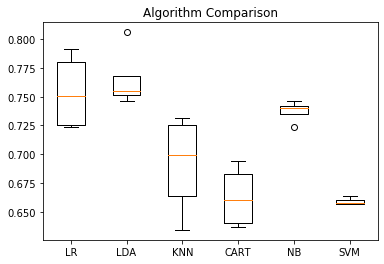

In [35]:
# compare algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# Load dataset
#url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['n_pregnant', 'glucose_concentration', 'blood_pressuer (mm Hg)', 'skin_thickness (mm)', 'serum_insulin (mu U/ml)',
        'BMI', 'pedigree_function', 'age', 'class']
dataset = read_csv("diabetes.csv", names = names)
# Split-out validation dataset
array = dataset.values
X = array[1:,0:8]
y = array[1:,8]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.30, random_state=1, shuffle=True)
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=4, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare different models
for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)
    # Evaluate predictions
    print('')
    print(name)
    print(accuracy_score(Y_validation, predictions))
    print(confusion_matrix(Y_validation, predictions))
    print(classification_report(Y_validation, predictions))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()